# Advance Linear regression assignment

Surprise Housing, a US-based housing company, has made the decision to enter the Australian market. The business buys homes for less than their actual value and sells them for more using data analytics. The business has gathered a set of data from Australian home sales for the same objective. The CSV file below contains the data.
In order to enter the market, the company is looking at potential properties to purchase. To determine the actual value of the potential properties and whether to invest in them or not, you must construct a regression model using regularisation.

# Business Goals

Modeling the cost of homes using the relevant independent variables is required. This model will then be used by the management to understand how exactly the prices fluctuate with the factors. As a result, they can influence the company's strategy and concentrate on areas that will provide large returns. The tool will also help management better understand how prices change in a new market.

# Process Flow Diagram

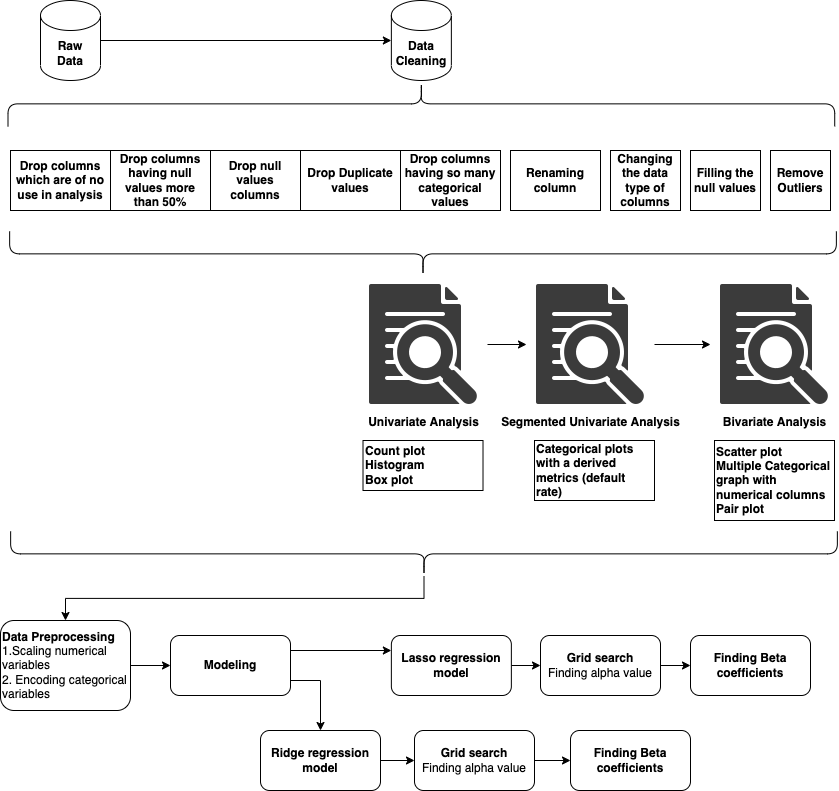

# Importing the libraries

In [79]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
import statsmodels.tsa.api as smt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

# Loading the data set

In [2]:
data = pd.read_csv("train.csv",low_memory=False)

# A look at the data

In [3]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

# Summary of the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [6]:
data.shape

(1460, 81)

### From the above summary data we can observe that 
1. There are a total of 81 columns and 1460 rows.
2. There are multiple null values in multiple columns need to check this columns.

# Data Cleaning

# -----------------------------------------------------------------------------------------

### Droping ID column as all values are distinct and are index of the dataset which is of no use to us.

In [7]:
data.drop(['Id'], axis=1, inplace=True)

### Checking null values

<AxesSubplot:>

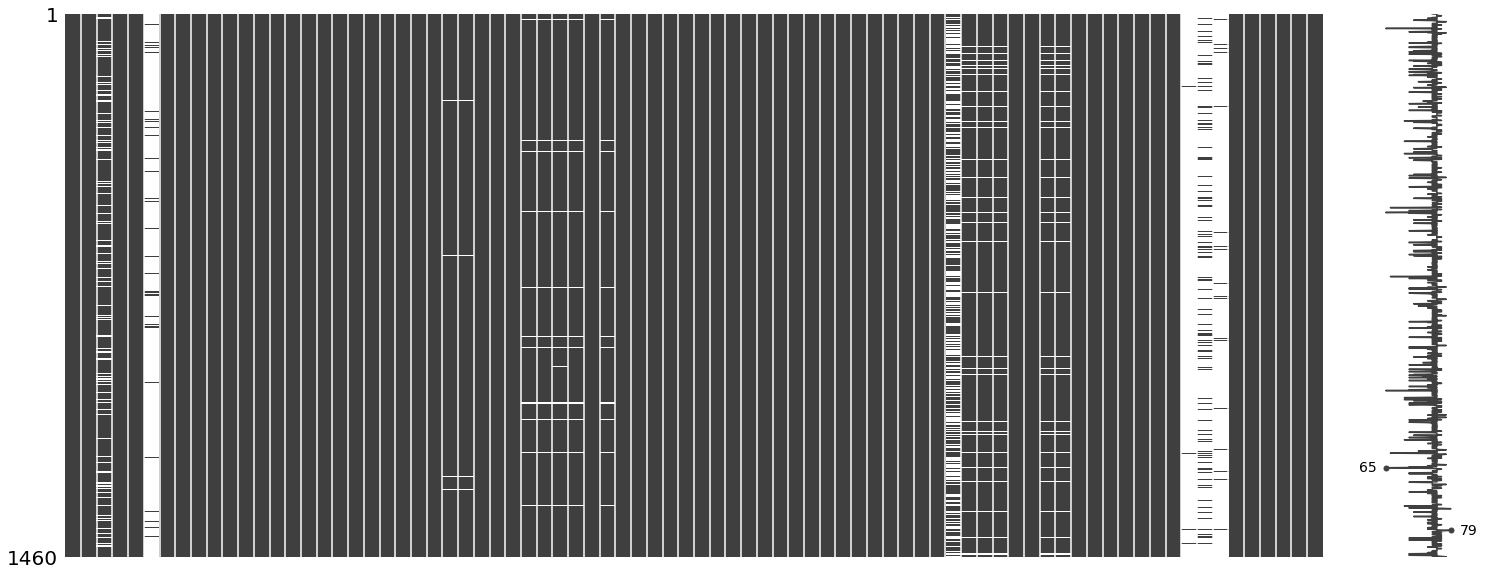

In [8]:
msno.matrix(data)

### Dropping the columns having Null or 0 values.
### Dropping the categorical columns who are having the extreme high % of any 1 particular category 
### (This will be of no use in our analysis).

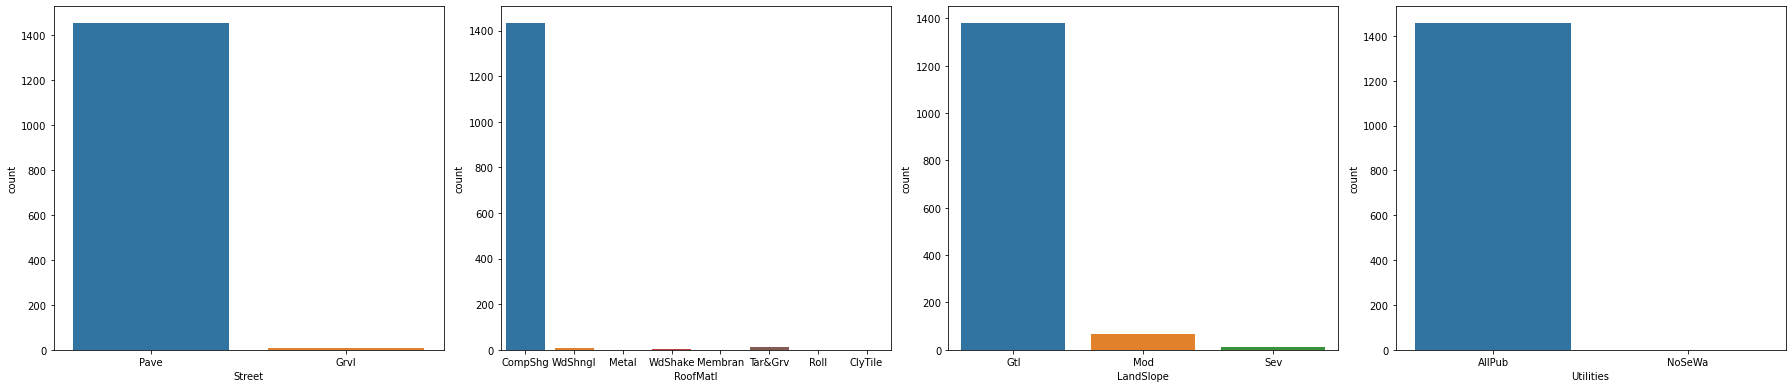

In [9]:
plt.rcParams["figure.figsize"] = [25.00, 5.50]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 4)
sns.color_palette("viridis", as_cmap=True)
sns.countplot(data['Street'],ax=axes[0])
sns.countplot(data['RoofMatl'],ax=axes[1])
sns.countplot(data['LandSlope'],ax=axes[2])
sns.countplot(data['Utilities'],ax=axes[3])
plt.show()

In [10]:
data.drop(['Street','Alley','LandContour','Utilities','LandSlope','Condition1','Condition2',
'BldgType','RoofMatl','MasVnrType','MasVnrArea','ExterCond','BsmtCond','BsmtExposure','BsmtFinType2',
'BsmtUnfSF','Heating','CentralAir','Electrical','LowQualFinSF','BsmtHalfBath','Functional', 'GarageYrBlt',
'FireplaceQu','GarageQual','GarageCond','PavedDrive','WoodDeckSF','OpenPorchSF','EnclosedPorch'
,'3SsnPorch','ScreenPorch','PoolArea','PoolQC','MiscVal','SaleType','SaleCondition', 'Fence', 'MiscFeature','LotConfig'], axis=1, inplace=True)

<AxesSubplot:>

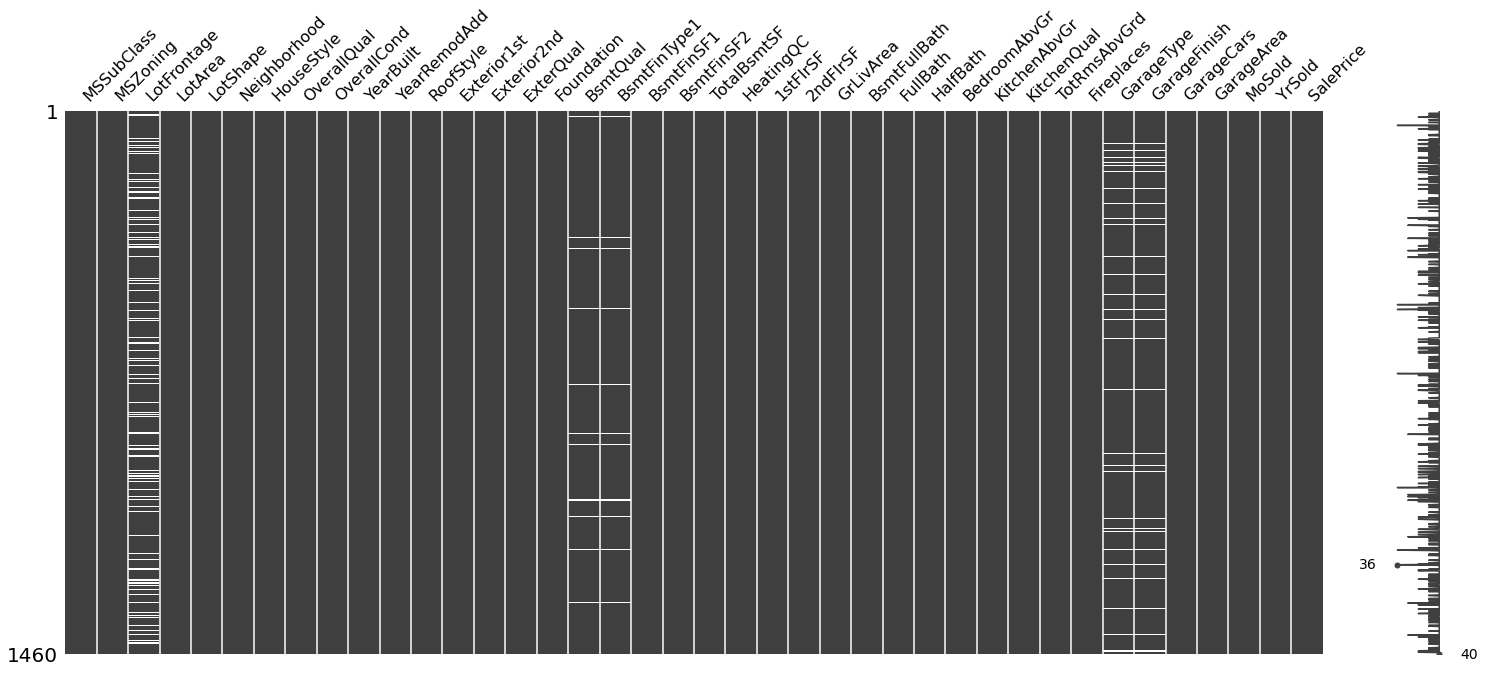

In [11]:
msno.matrix(data)

In [12]:
data.isnull().sum()

MSSubClass        0
MSZoning          0
LotFrontage     259
LotArea           0
LotShape          0
Neighborhood      0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
Exterior1st       0
Exterior2nd       0
ExterQual         0
Foundation        0
BsmtQual         37
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinSF2        0
TotalBsmtSF       0
HeatingQC         0
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
BsmtFullBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Fireplaces        0
GarageType       81
GarageFinish     81
GarageCars        0
GarageArea        0
MoSold            0
YrSold            0
SalePrice         0
dtype: int64

### Imputing the null values in LotFrontage column
We can replace the null values with the mean values as mean and 50% of the data are having value near to 70

In [13]:
print((data["LotFrontage"].isnull().sum()/data["LotFrontage"].count())*100,"%")

21.56536219816819 %


In [14]:
print(data['LotFrontage'].describe())

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


In [15]:
mean_value=data['LotFrontage'].mean()
data['LotFrontage'].fillna(value=mean_value, inplace=True)

### Imputing the null values in GarageType, GarageYrBlt, GarageFinish column

In [16]:
print((data["GarageType"].isnull().sum()/data["GarageType"].count())*100,"%")
#print((data["GarageYrBlt"].isnull().sum()/data["GarageYrBlt"].count())*100,"%")
print((data["GarageFinish"].isnull().sum()/data["GarageFinish"].count())*100,"%")

5.873821609862219 %
5.873821609862219 %


In [17]:
data.fillna({'GarageType': 'No Garage'}, inplace=True)
data.fillna({'GarageFinish': 'No Garage'}, inplace=True)
#data['GarageYrBlt'].fillna(value=0, inplace=True)

### Imputing the null values in GarageType, GarageYrBlt, GarageFinish column

In [18]:
print((data["BsmtQual"].isnull().sum()/data["BsmtQual"].count())*100,"%")
print((data["BsmtFinType1"].isnull().sum()/data["BsmtFinType1"].count())*100,"%")

2.600140548137737 %
2.600140548137737 %


In [19]:
data.fillna({'BsmtQual': 'No Basement'}, inplace=True)
data.fillna({'BsmtFinType1': 'No Basement'}, inplace=True)

<AxesSubplot:>

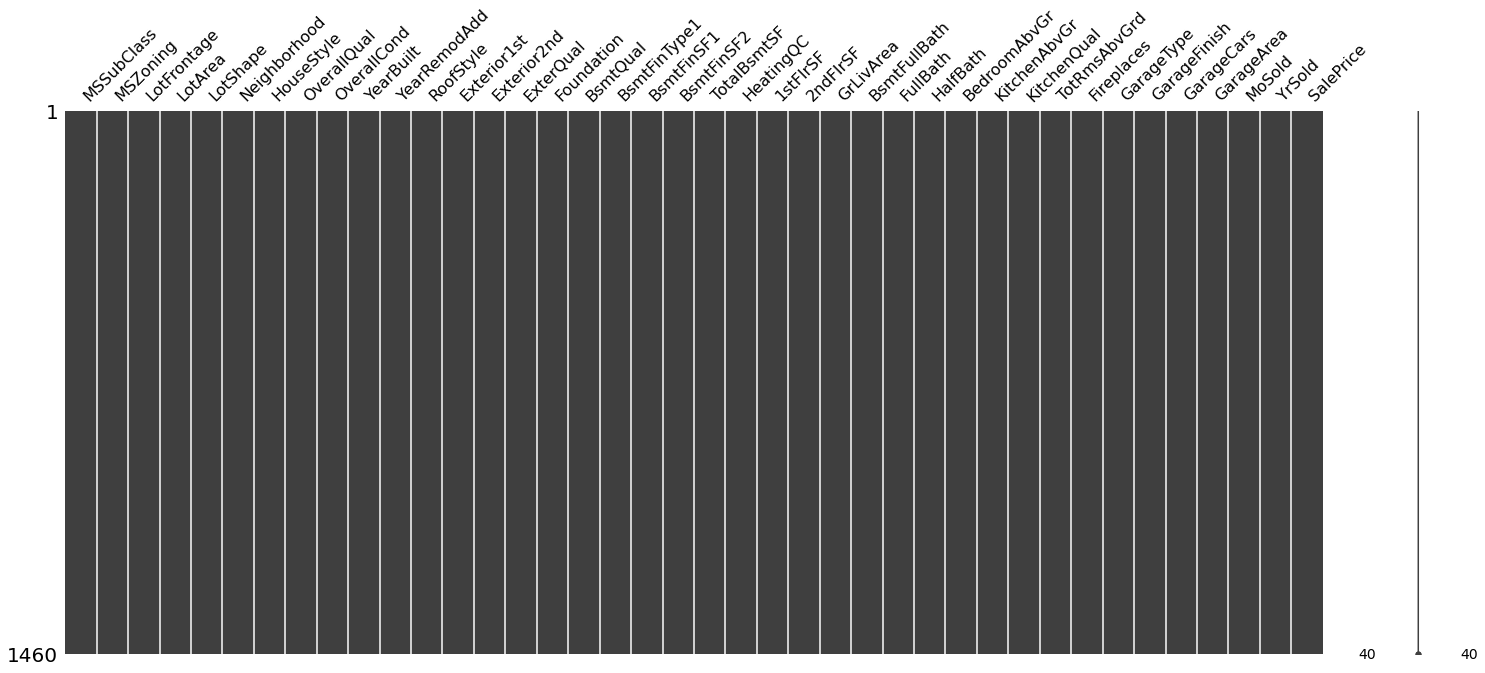

In [20]:
msno.matrix(data)

In [21]:
data.shape

(1460, 40)

### Dropping this 2 columns as we are having the total of both the columns in TotalBsmtSF column.

In [22]:
data.drop(['BsmtFinSF2','BsmtFinSF1'], axis=1, inplace=True)

### Dropping columns having so many categorical values.
### Columns like MSSubClass which can't help us in finding the insights.

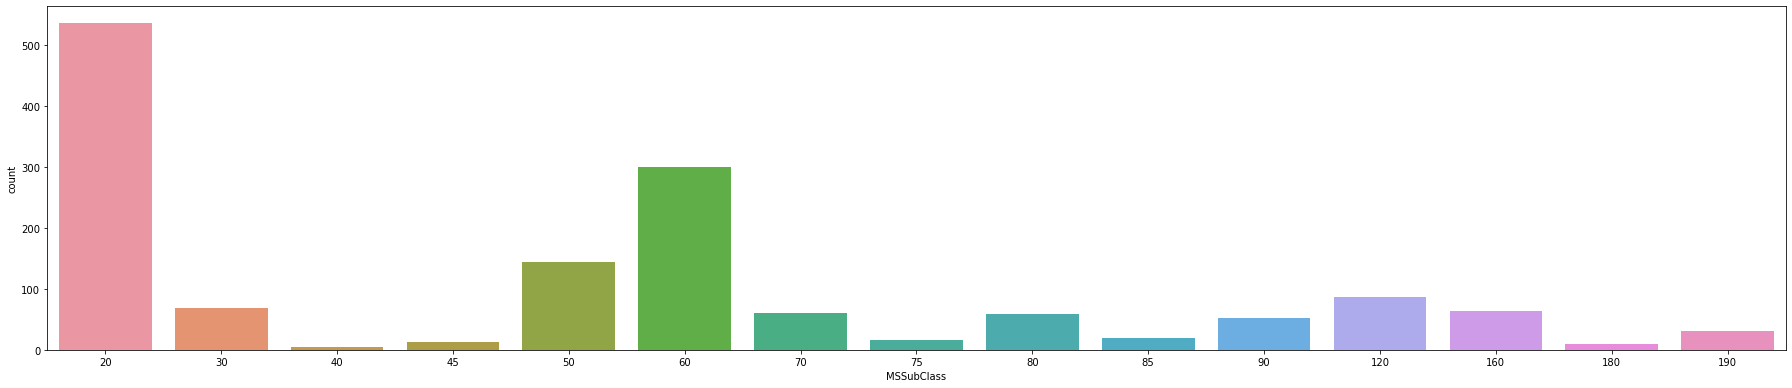

In [23]:
sns.countplot(data['MSSubClass'])
plt.show()

In [24]:
data.drop(['MSSubClass','Neighborhood', 'Exterior1st','Exterior2nd'], axis=1, inplace=True)

### Dropping KitchenAbvGr column.
### Majorly houses only have 1 kitchen it has been very rarly found that the no. of kutchen is more than 1.

In [25]:
data.drop(['KitchenAbvGr'], axis=1, inplace=True)       

### Changing the data type to date for the date columns

In [26]:
data['MoSold'] = pd.to_datetime(data['MoSold'], format='%M')

In [27]:
a = ['YearBuilt', 'YearRemodAdd', 'YrSold']
for i in a:
    data[i] = pd.to_datetime(data[i], format='%Y')

# Univariate Analysis and Segmented Analysis

### Checking for the outliers

### Columns in the dataset.

In [28]:
data.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtFinType1', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### This are the only columns for which we need to check the outliers.

### All the numerical columns in the data.

In [29]:
Numerical_columns = ['LotFrontage', 'LotArea','TotalBsmtSF','1stFlrSF', 
                     '2ndFlrSF','GrLivArea','GarageArea', 'SalePrice']

### Reviewing histogram, boxplot, and displot for better understanding and comparision.

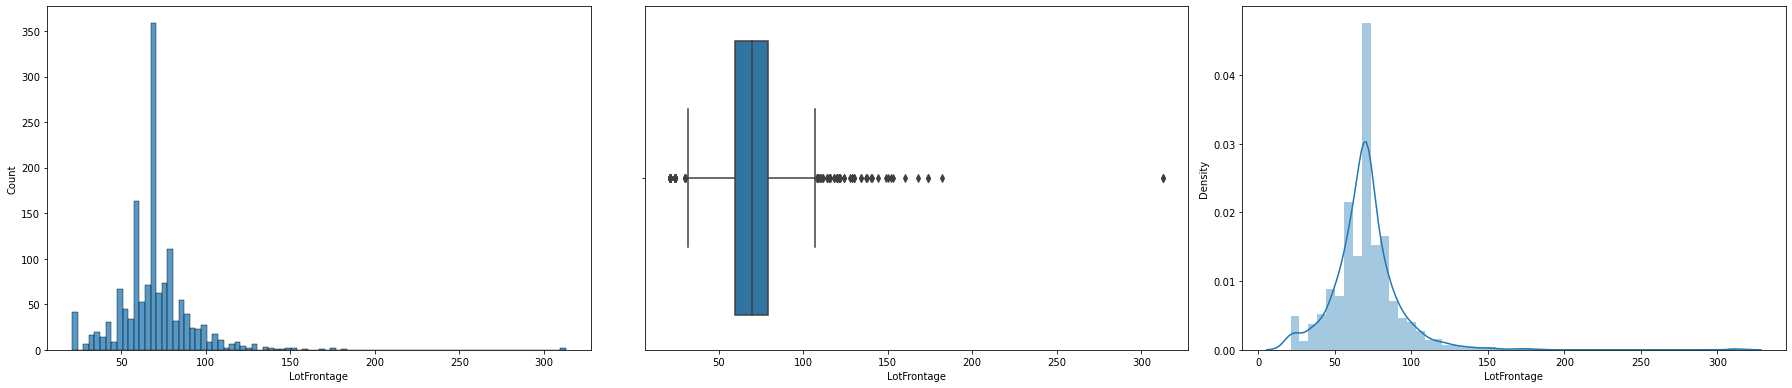

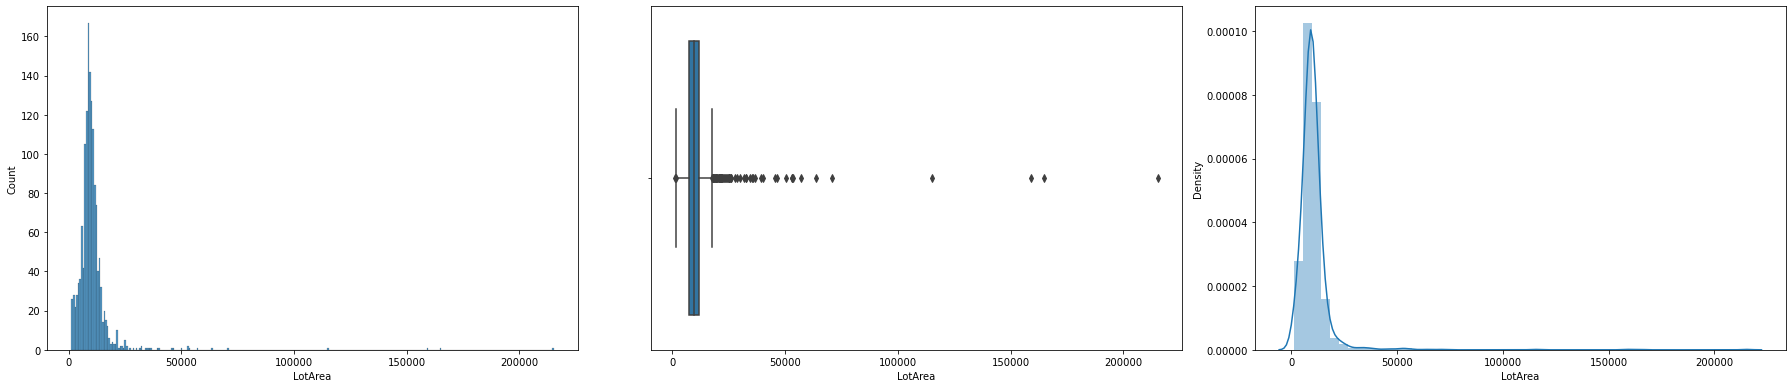

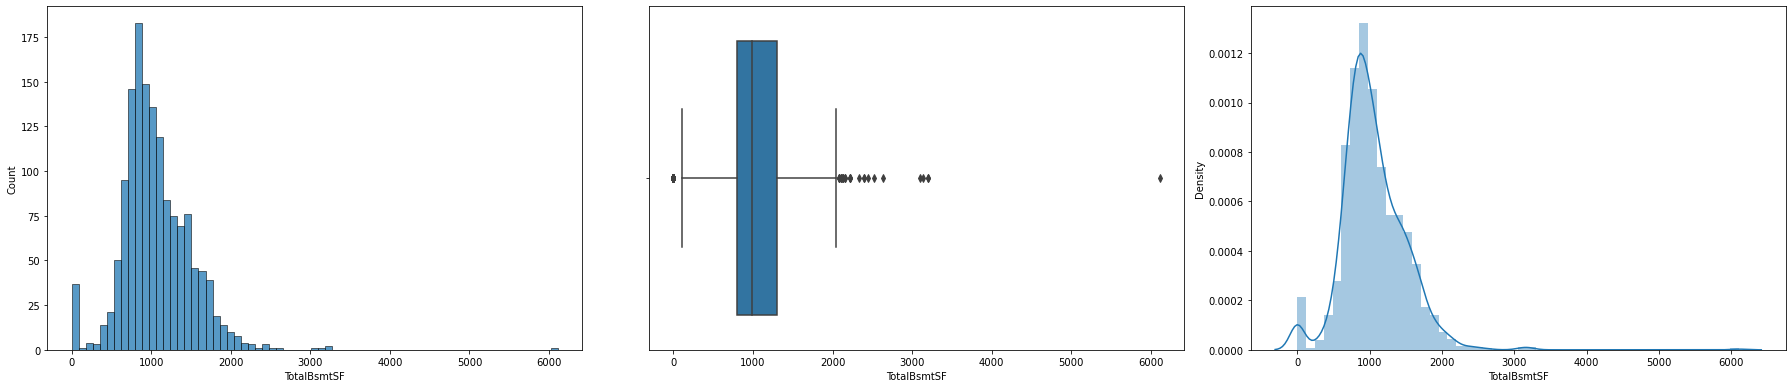

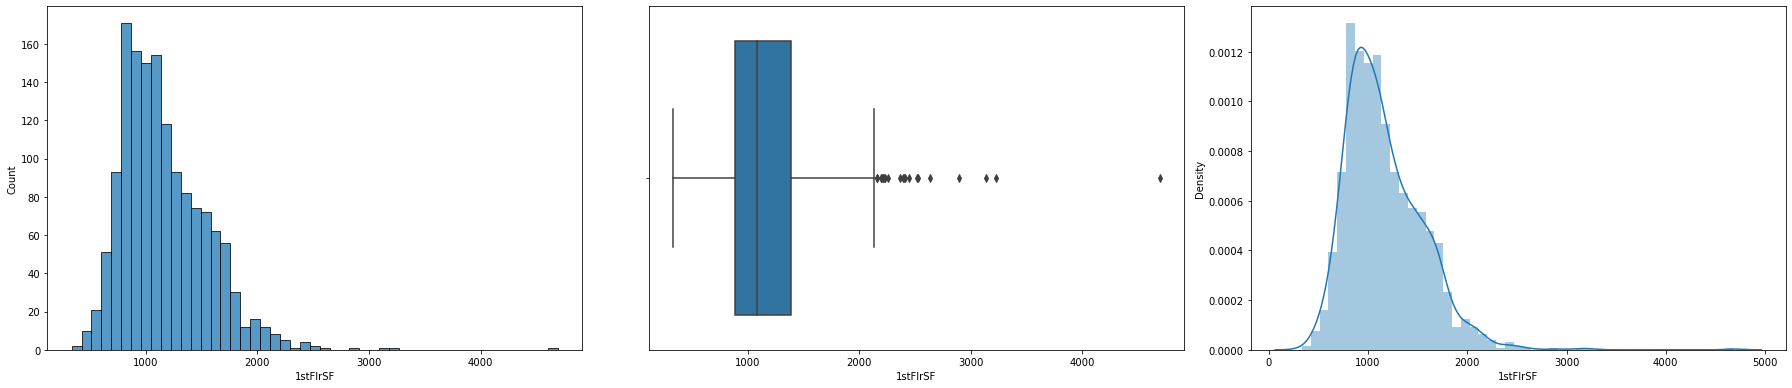

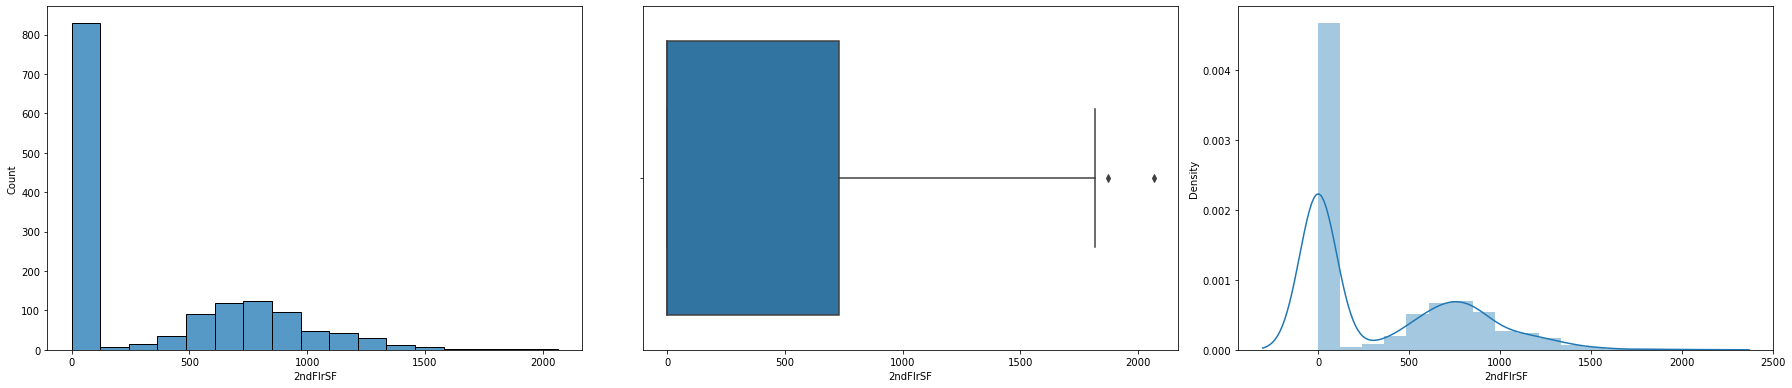

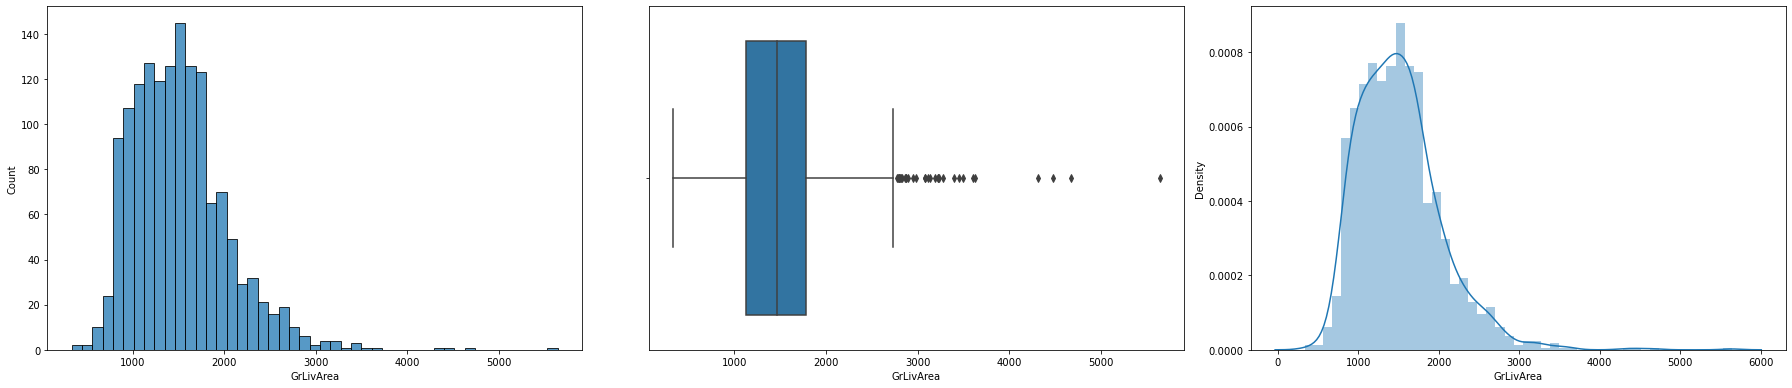

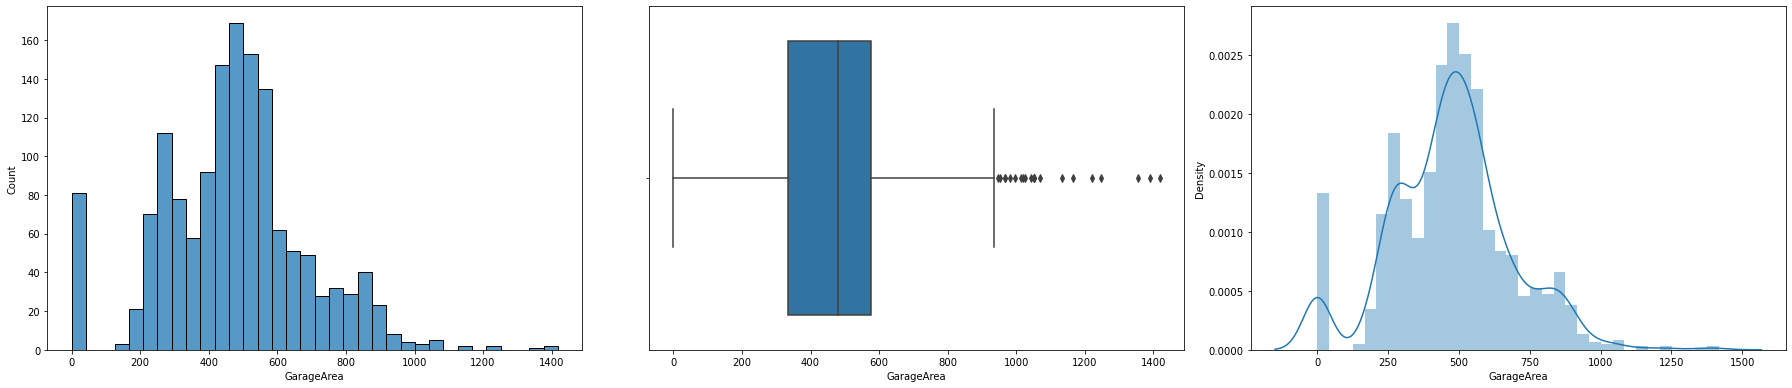

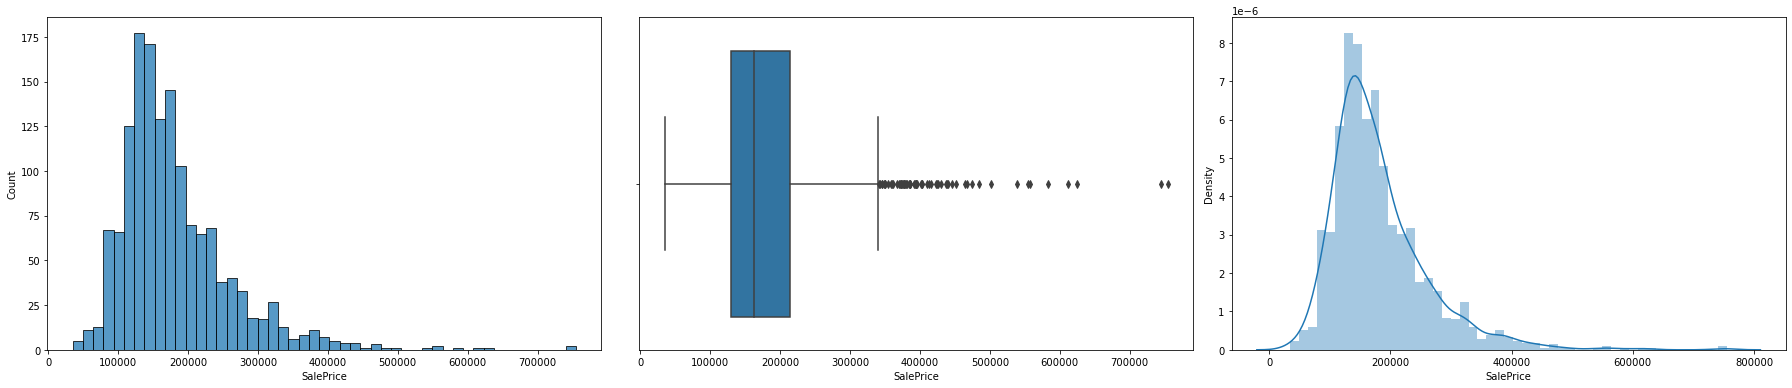

In [30]:
for i in Numerical_columns:
    plt.rcParams["figure.figsize"] = [25.00, 5.50]
    plt.rcParams["figure.autolayout"] = True
    f, axes = plt.subplots(1, 3)
    sns.color_palette("viridis", as_cmap=True)
    sns.histplot(data[i],ax=axes[0])
    sns.boxplot(data[i],ax=axes[1])
    sns.distplot(data[i],ax=axes[2])
    plt.show()

### Detailed box plot with ever quantile detail.

LotFrontage :
count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
25%        60.000000
50%        70.049958
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64


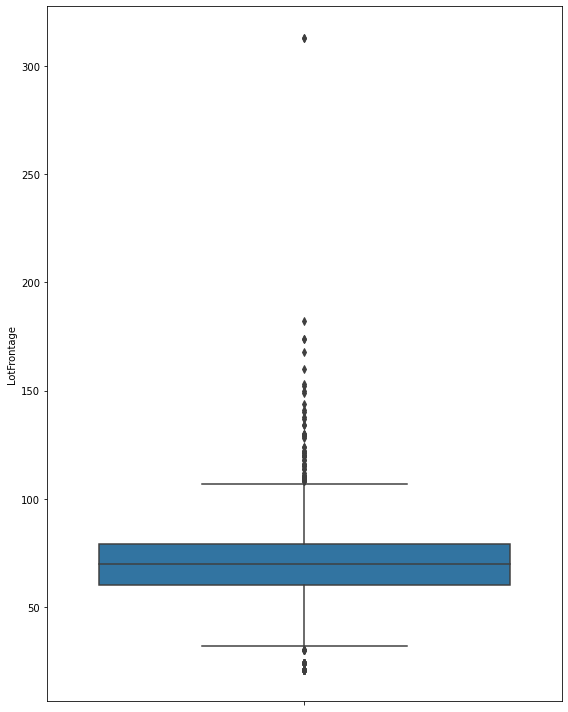

LotArea :
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64


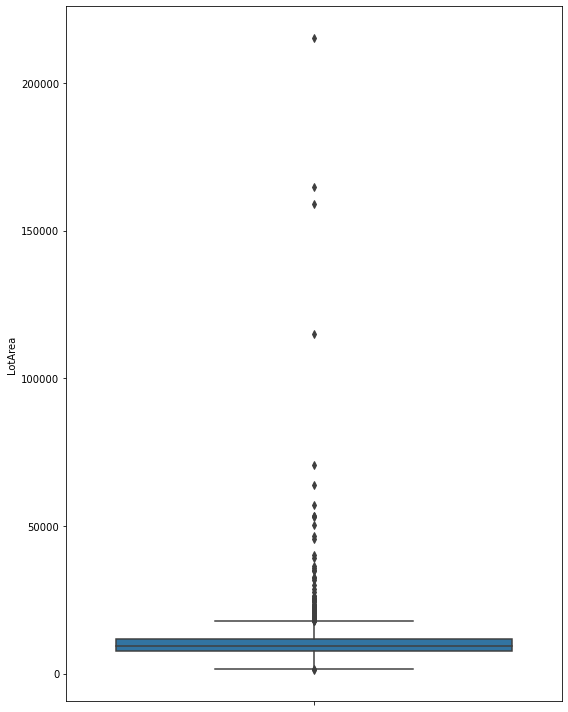

TotalBsmtSF :
count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


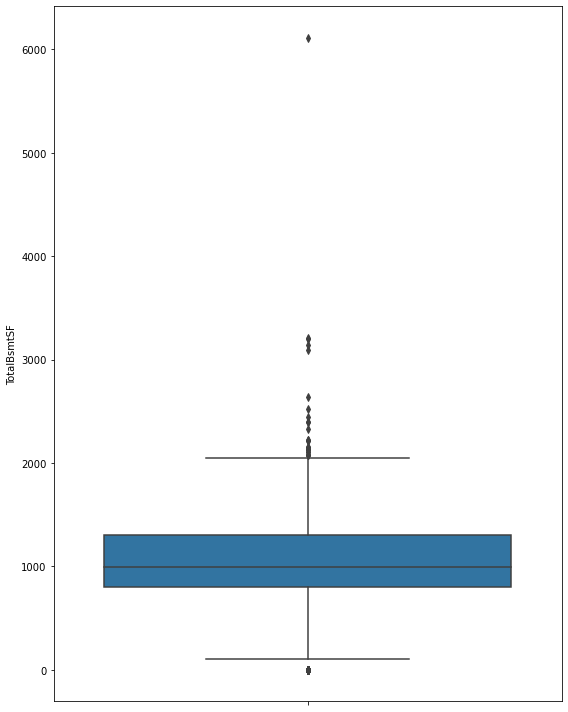

1stFlrSF :
count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64


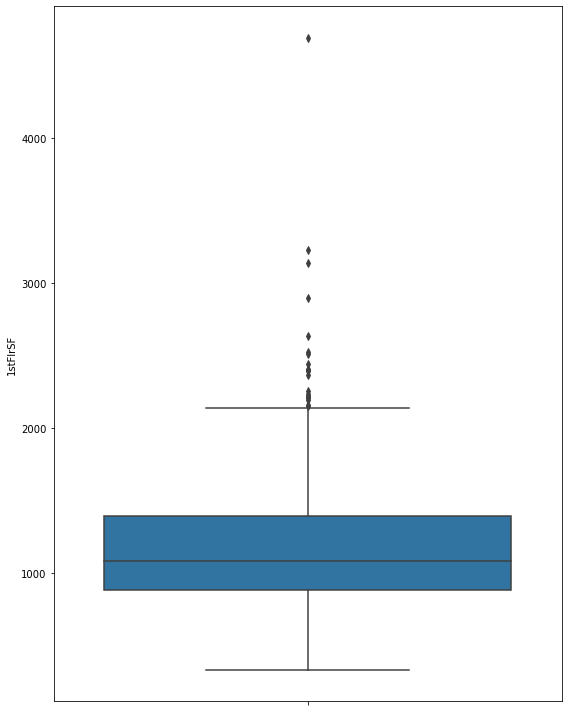

2ndFlrSF :
count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64


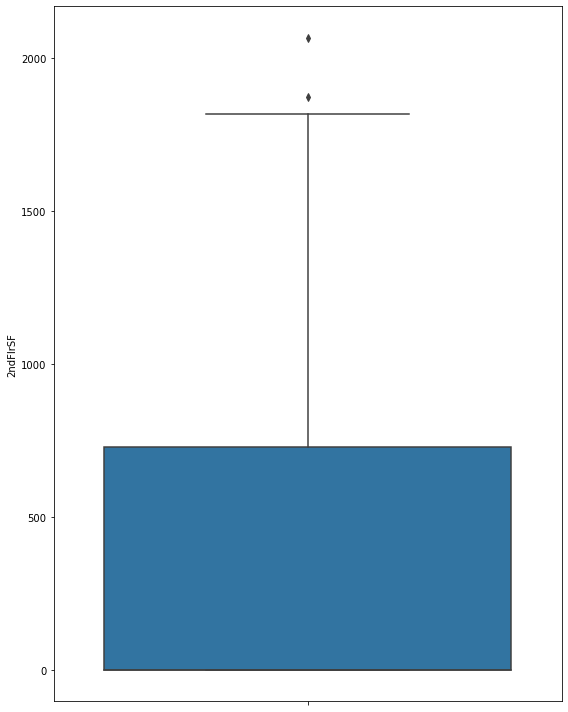

GrLivArea :
count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64


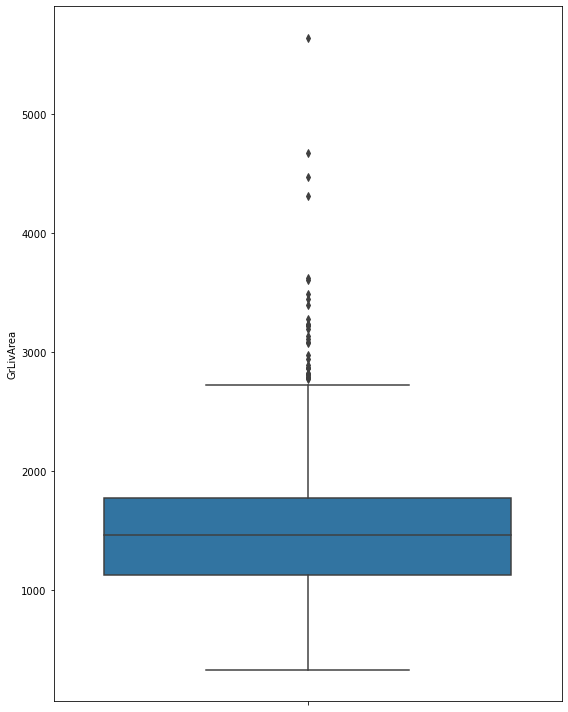

GarageArea :
count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64


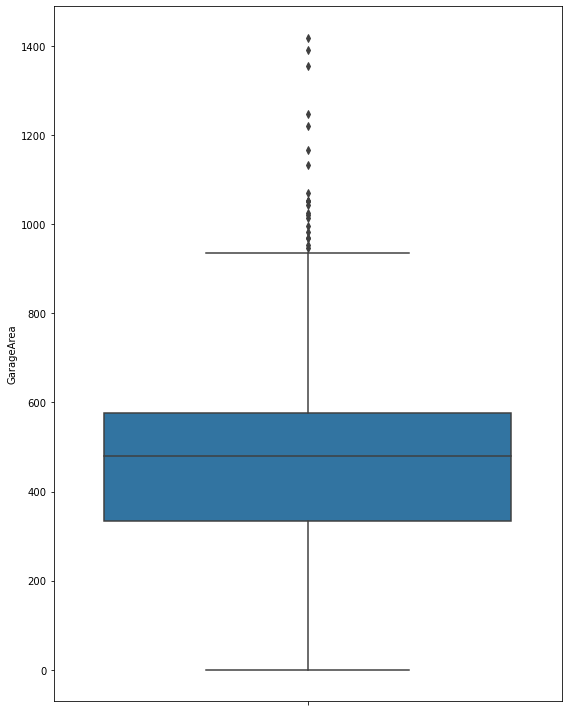

SalePrice :
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


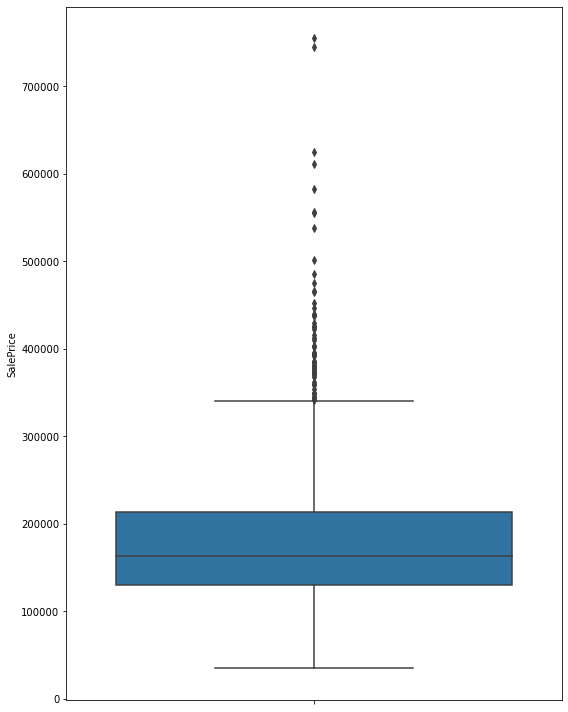

In [31]:
#detail box with all detail
for i in Numerical_columns:
    plt.figure(figsize=(8,10))
    sns.boxplot(y = data[i])
    print(i,":")
    print(data[i].describe())
    plt.show()

### Fixing the outliers

LotFrontage

In [32]:
data.LotFrontage.quantile([0.50,0.75,0.80,0.85,0.90, 0.95, 0.96, 0.97, 0.98, 0.98, 0.99])

0.50     70.049958
0.75     79.000000
0.80     80.000000
0.85     85.000000
0.90     92.000000
0.95    104.000000
0.96    107.000000
0.97    114.000000
0.98    120.820000
0.98    120.820000
0.99    137.410000
Name: LotFrontage, dtype: float64

In [33]:
data[data.LotFrontage >= 92.000000].count()

MSZoning        152
LotFrontage     152
LotArea         152
LotShape        152
HouseStyle      152
OverallQual     152
OverallCond     152
YearBuilt       152
YearRemodAdd    152
RoofStyle       152
ExterQual       152
Foundation      152
BsmtQual        152
BsmtFinType1    152
TotalBsmtSF     152
HeatingQC       152
1stFlrSF        152
2ndFlrSF        152
GrLivArea       152
BsmtFullBath    152
FullBath        152
HalfBath        152
BedroomAbvGr    152
KitchenQual     152
TotRmsAbvGrd    152
Fireplaces      152
GarageType      152
GarageFinish    152
GarageCars      152
GarageArea      152
MoSold          152
YrSold          152
SalePrice       152
dtype: int64

In [34]:
data = data[data.LotFrontage<92.000000]

GrLivArea

In [35]:
data.GrLivArea.quantile([0.50,0.75,0.80,0.85,0.90, 0.95, 0.96, 0.97, 0.98, 0.98, 0.99])

0.50    1426.00
0.75    1721.00
0.80    1800.00
0.85    1928.00
0.90    2084.90
0.95    2344.65
0.96    2467.12
0.97    2554.79
0.98    2652.88
0.98    2652.88
0.99    2865.20
Name: GrLivArea, dtype: float64

In [36]:
data[data.GrLivArea >= 2374.30].count()

MSZoning        61
LotFrontage     61
LotArea         61
LotShape        61
HouseStyle      61
OverallQual     61
OverallCond     61
YearBuilt       61
YearRemodAdd    61
RoofStyle       61
ExterQual       61
Foundation      61
BsmtQual        61
BsmtFinType1    61
TotalBsmtSF     61
HeatingQC       61
1stFlrSF        61
2ndFlrSF        61
GrLivArea       61
BsmtFullBath    61
FullBath        61
HalfBath        61
BedroomAbvGr    61
KitchenQual     61
TotRmsAbvGrd    61
Fireplaces      61
GarageType      61
GarageFinish    61
GarageCars      61
GarageArea      61
MoSold          61
YrSold          61
SalePrice       61
dtype: int64

In [37]:
data = data[data.GrLivArea<2374.30]

SalePrice

In [38]:
data.SalePrice.quantile([0.50,0.75,0.80,0.85,0.90, 0.95, 0.96, 0.97, 0.98, 0.98, 0.99])

0.50    155000.00
0.75    196000.00
0.80    211800.00
0.85    226000.00
0.90    244240.00
0.95    277000.00
0.96    287014.40
0.97    310930.00
0.98    320320.00
0.98    320320.00
0.99    370428.12
Name: SalePrice, dtype: float64

In [39]:
data[data.SalePrice >= 250522.00].count()

MSZoning        111
LotFrontage     111
LotArea         111
LotShape        111
HouseStyle      111
OverallQual     111
OverallCond     111
YearBuilt       111
YearRemodAdd    111
RoofStyle       111
ExterQual       111
Foundation      111
BsmtQual        111
BsmtFinType1    111
TotalBsmtSF     111
HeatingQC       111
1stFlrSF        111
2ndFlrSF        111
GrLivArea       111
BsmtFullBath    111
FullBath        111
HalfBath        111
BedroomAbvGr    111
KitchenQual     111
TotRmsAbvGrd    111
Fireplaces      111
GarageType      111
GarageFinish    111
GarageCars      111
GarageArea      111
MoSold          111
YrSold          111
SalePrice       111
dtype: int64

In [40]:
data = data[data.SalePrice<250522.00]

LotArea

In [41]:
data.LotArea.quantile([0.50,0.75,0.80,0.85,0.90, 0.95, 0.96, 0.97, 0.98, 0.98, 0.99])

0.50     8874.50
0.75    10608.25
0.80    11096.00
0.85    11792.50
0.90    12893.00
0.95    14766.00
0.96    15694.40
0.97    16658.40
0.98    18149.70
0.98    18149.70
0.99    25253.60
Name: LotArea, dtype: float64

In [42]:
data[data.LotArea >= 14002.40].count()

MSZoning        73
LotFrontage     73
LotArea         73
LotShape        73
HouseStyle      73
OverallQual     73
OverallCond     73
YearBuilt       73
YearRemodAdd    73
RoofStyle       73
ExterQual       73
Foundation      73
BsmtQual        73
BsmtFinType1    73
TotalBsmtSF     73
HeatingQC       73
1stFlrSF        73
2ndFlrSF        73
GrLivArea       73
BsmtFullBath    73
FullBath        73
HalfBath        73
BedroomAbvGr    73
KitchenQual     73
TotRmsAbvGrd    73
Fireplaces      73
GarageType      73
GarageFinish    73
GarageCars      73
GarageArea      73
MoSold          73
YrSold          73
SalePrice       73
dtype: int64

In [43]:
data = data[data.LotArea<14002.40]

In [44]:
data.shape

(1063, 33)

### All the categorical columns in the data.

In [45]:
Categorical_columns= [ 'MSZoning','LotShape',  'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtFinType1', 'HeatingQC', 
        'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageType',  'GarageFinish', 'GarageCars',
       'MoSold', 'YrSold']

## Bar plot (Counting all the categorical variables)

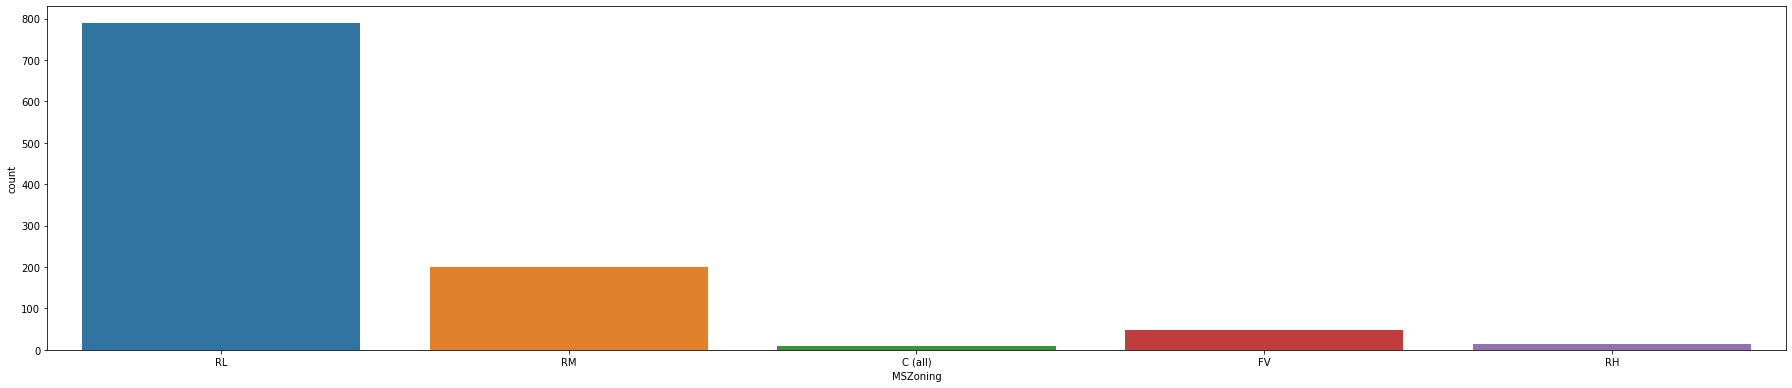

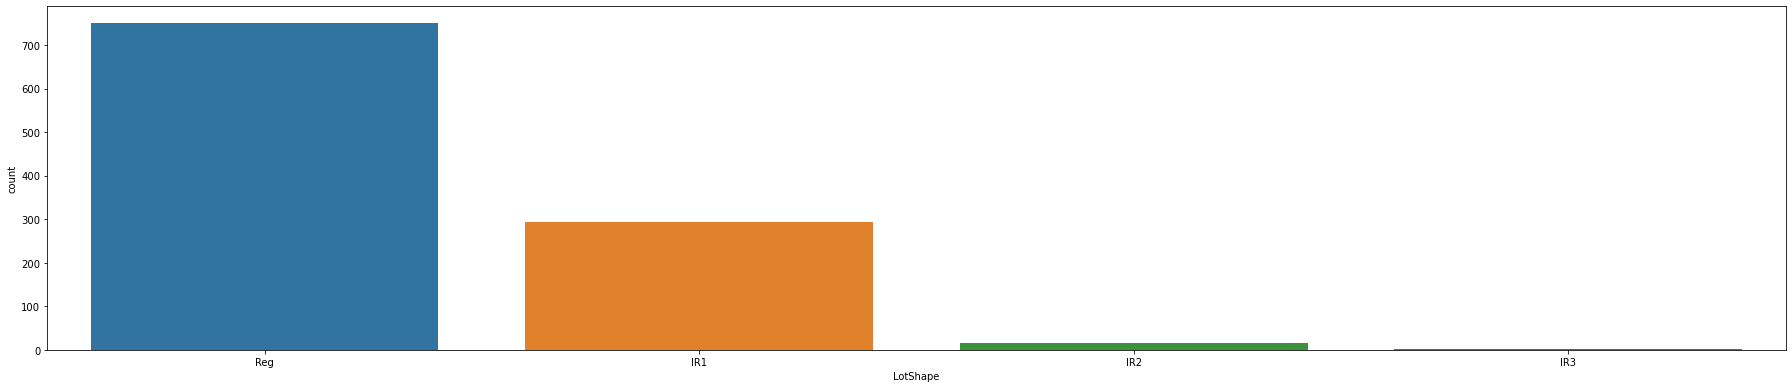

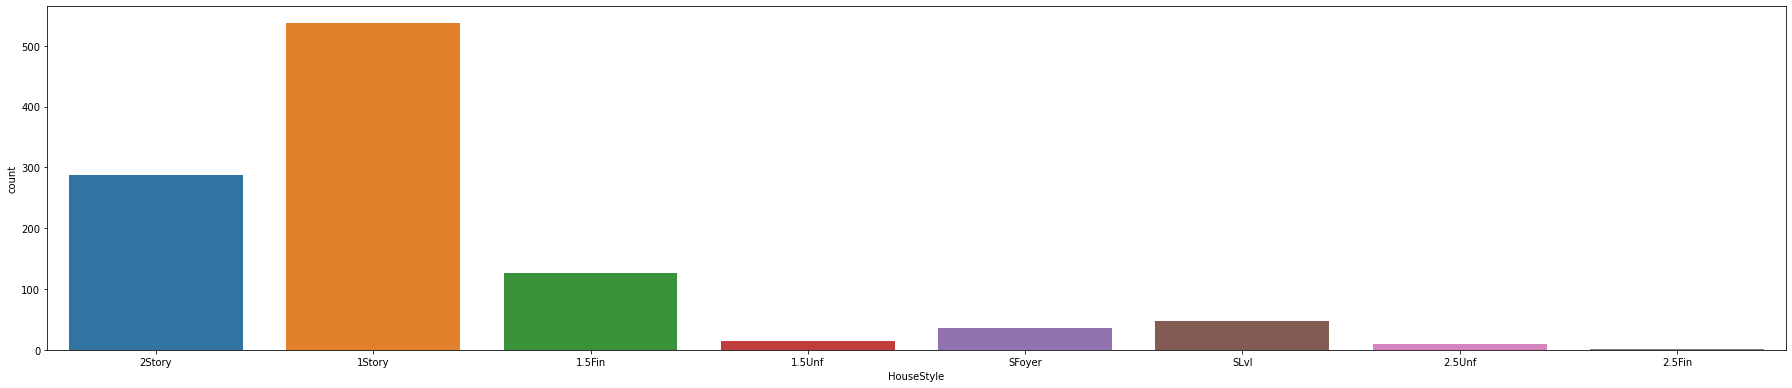

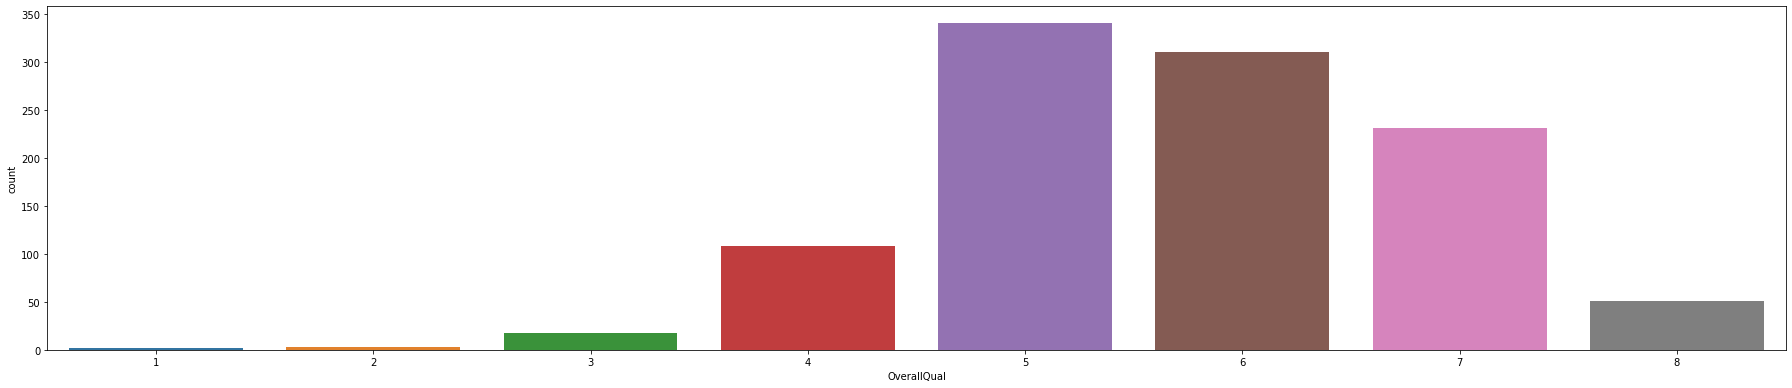

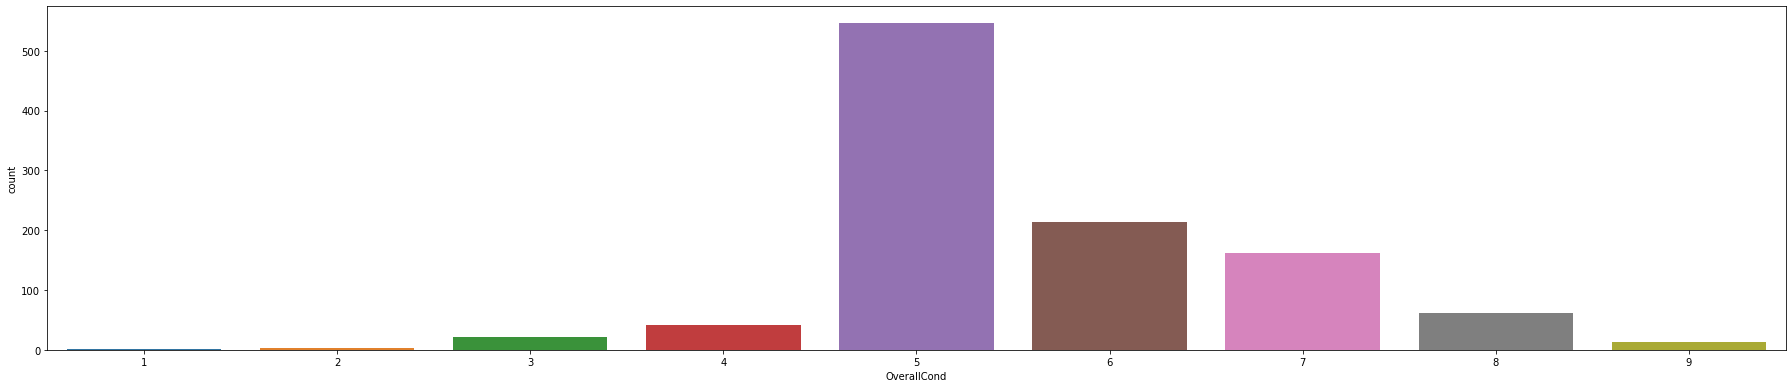

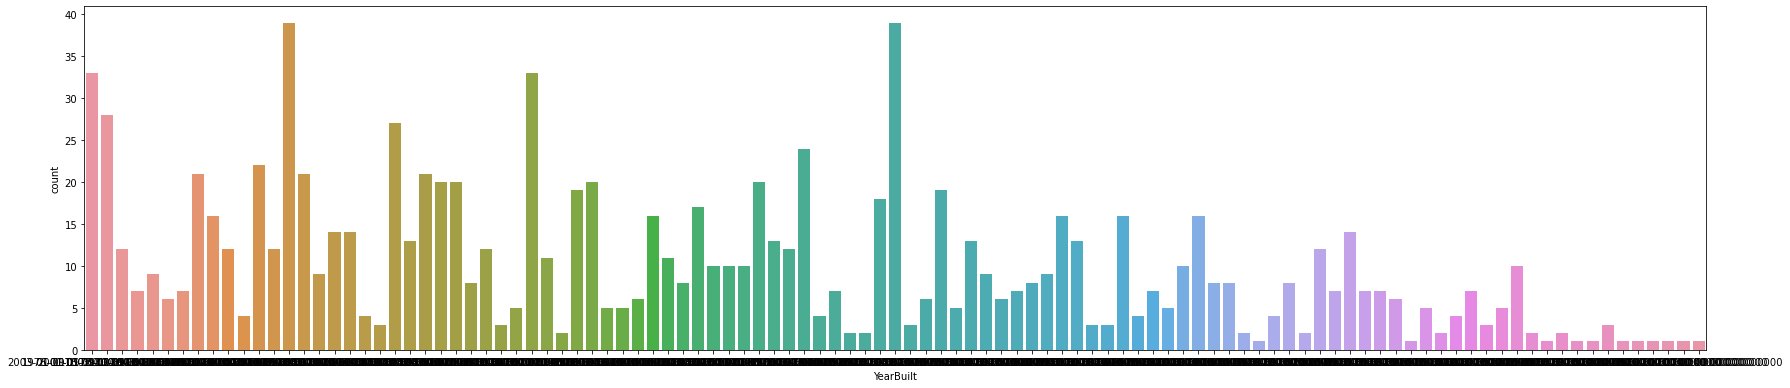

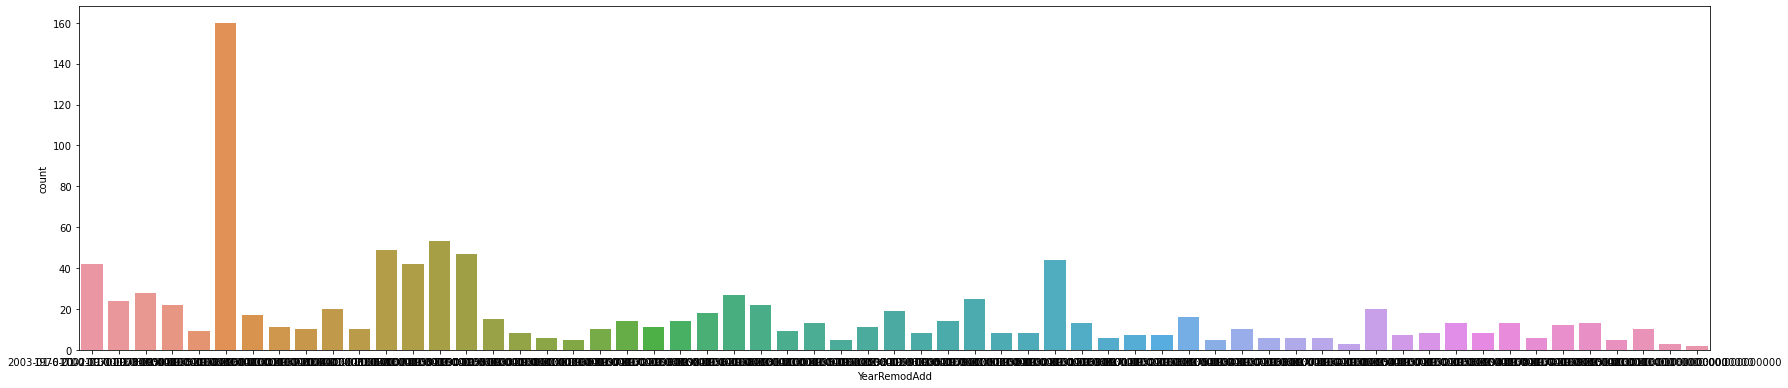

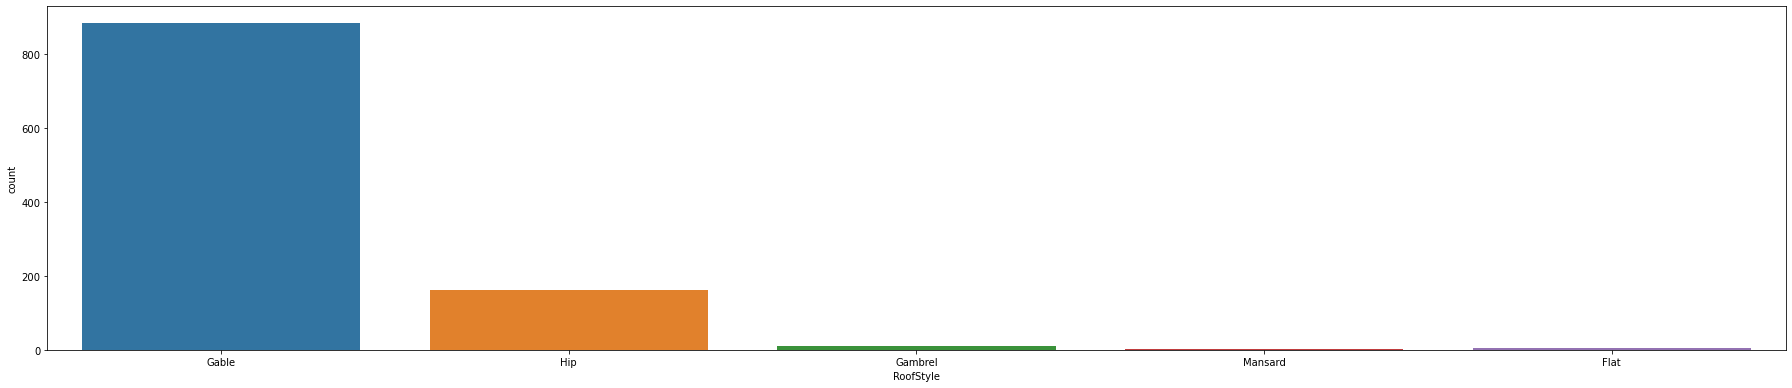

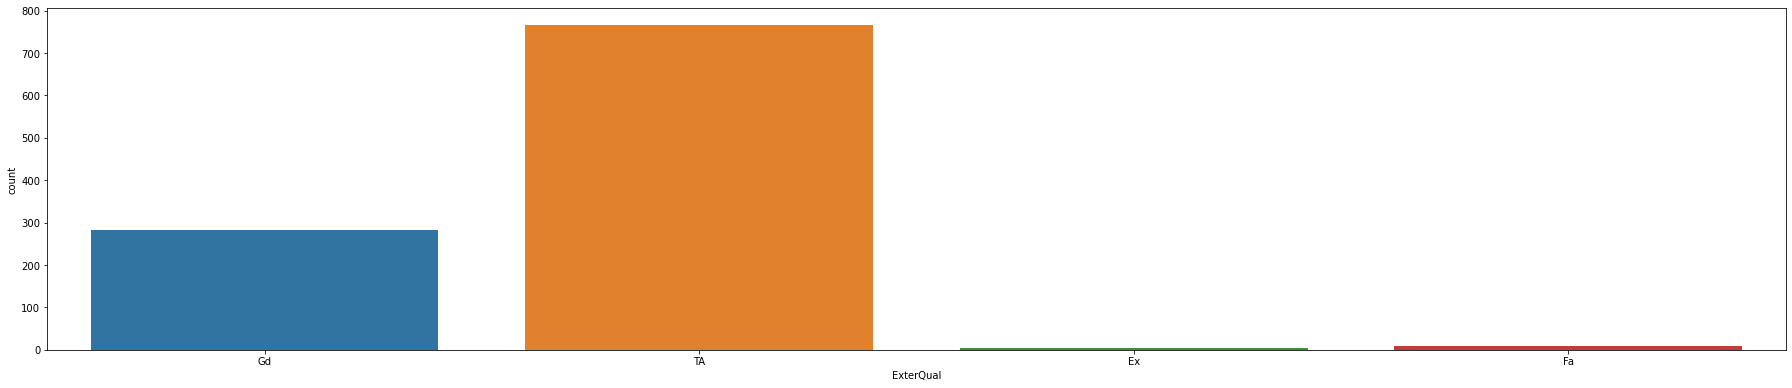

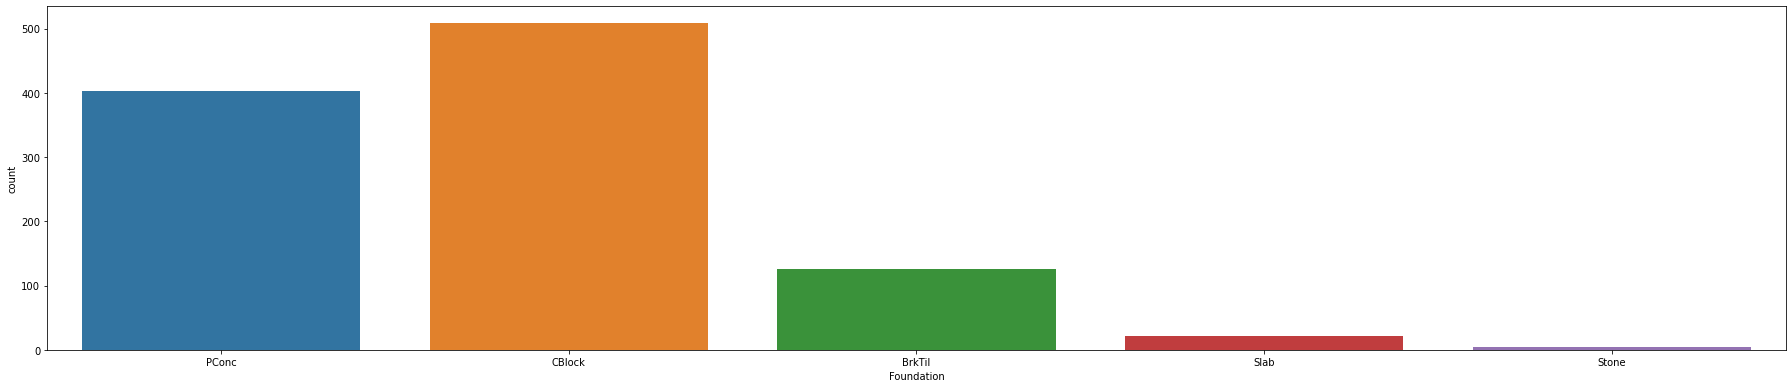

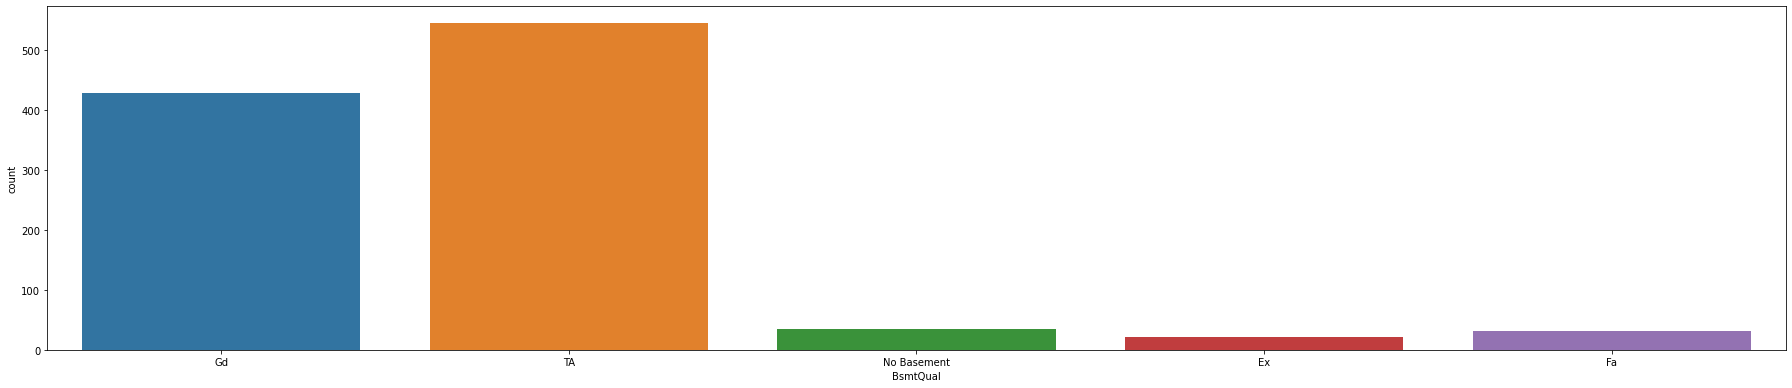

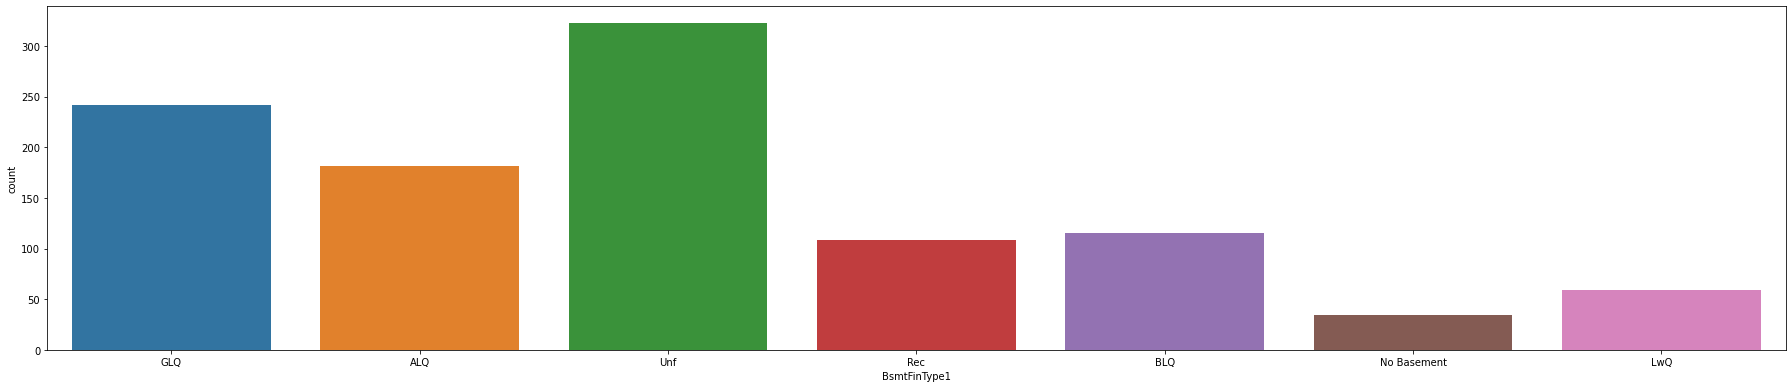

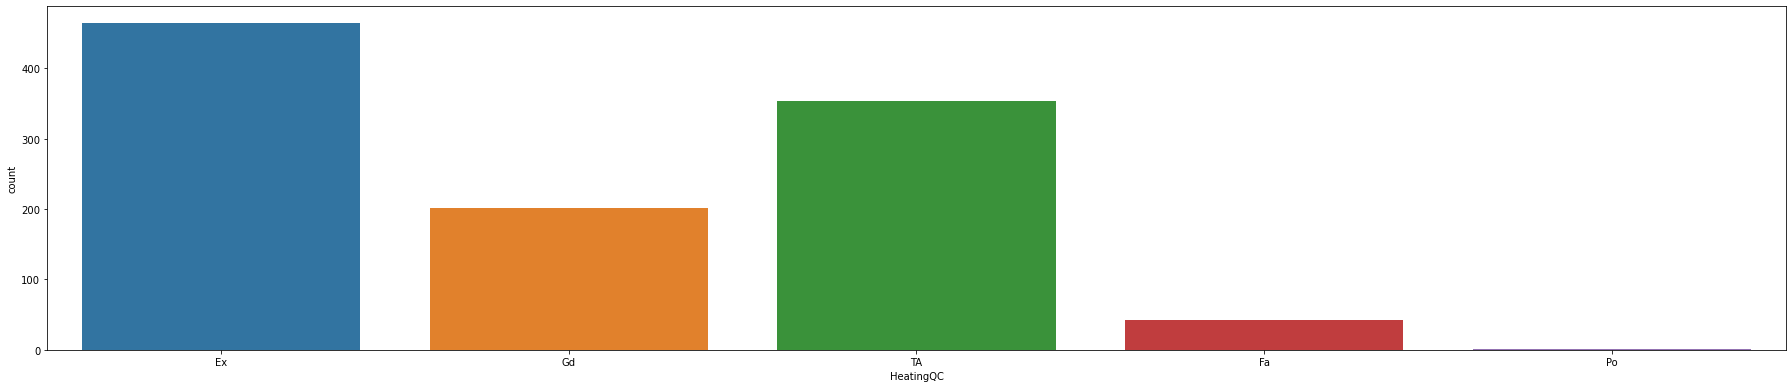

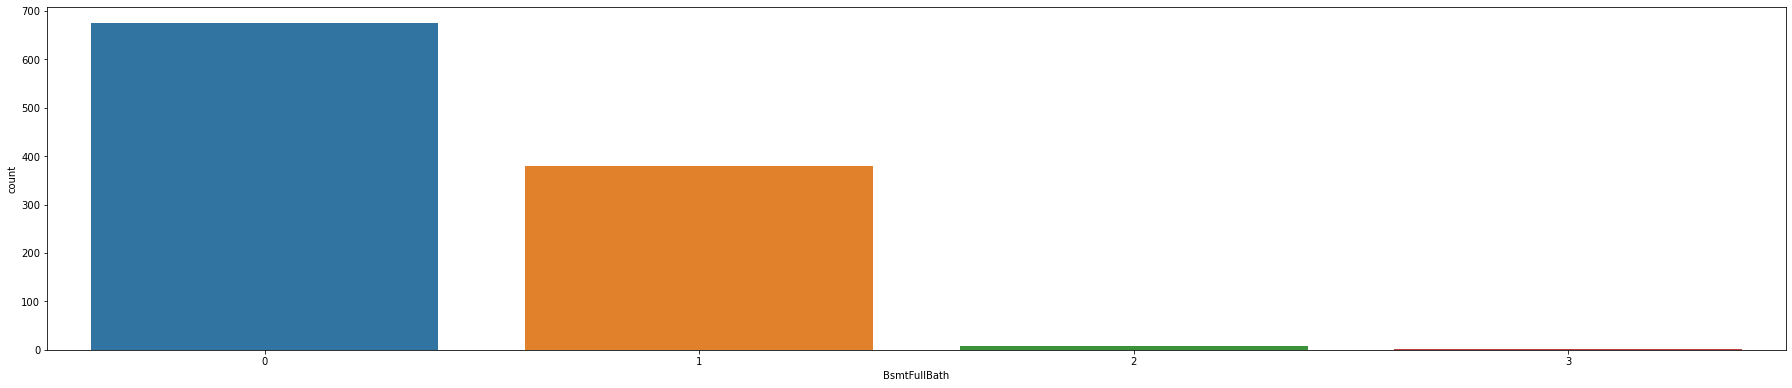

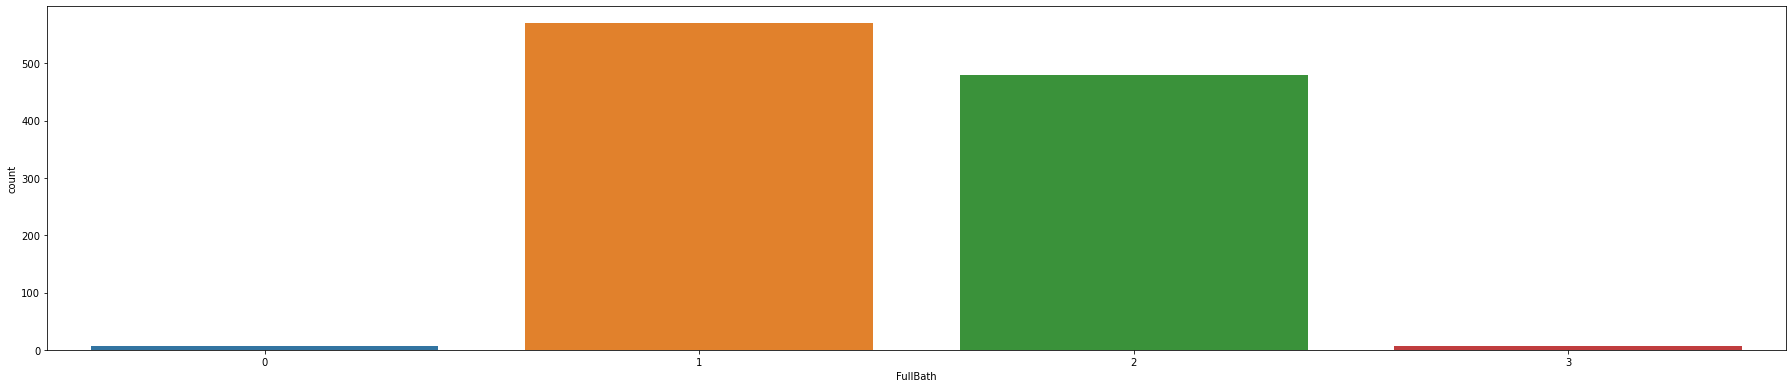

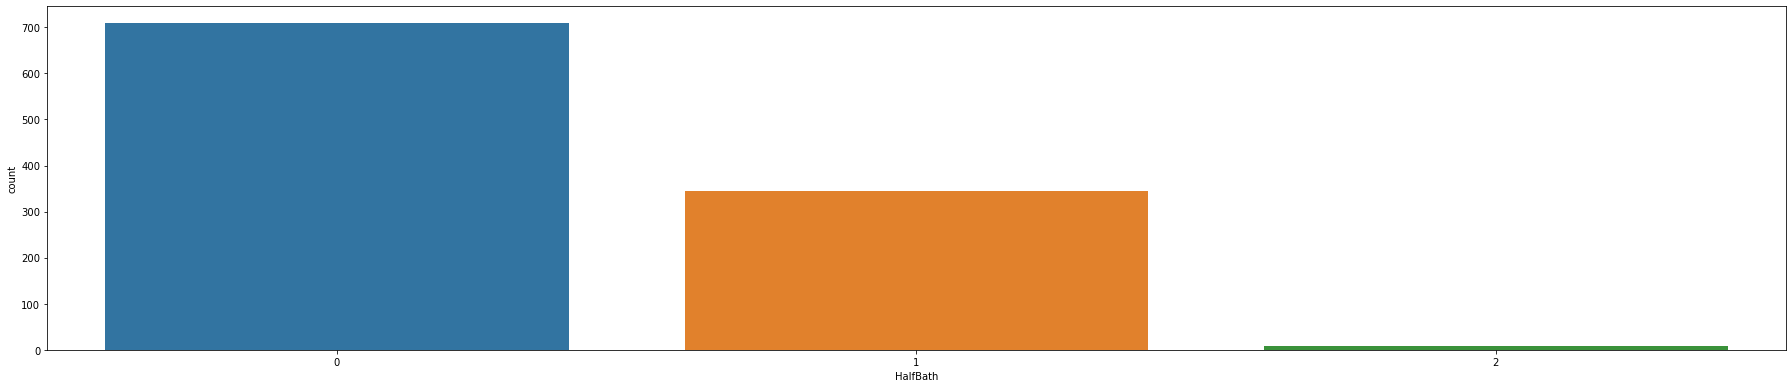

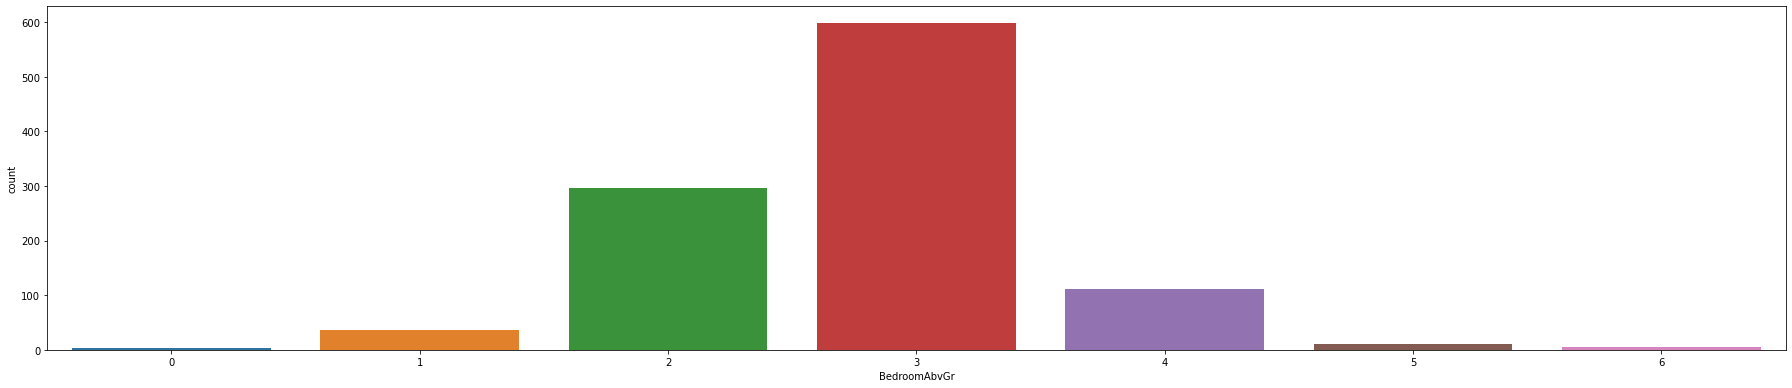

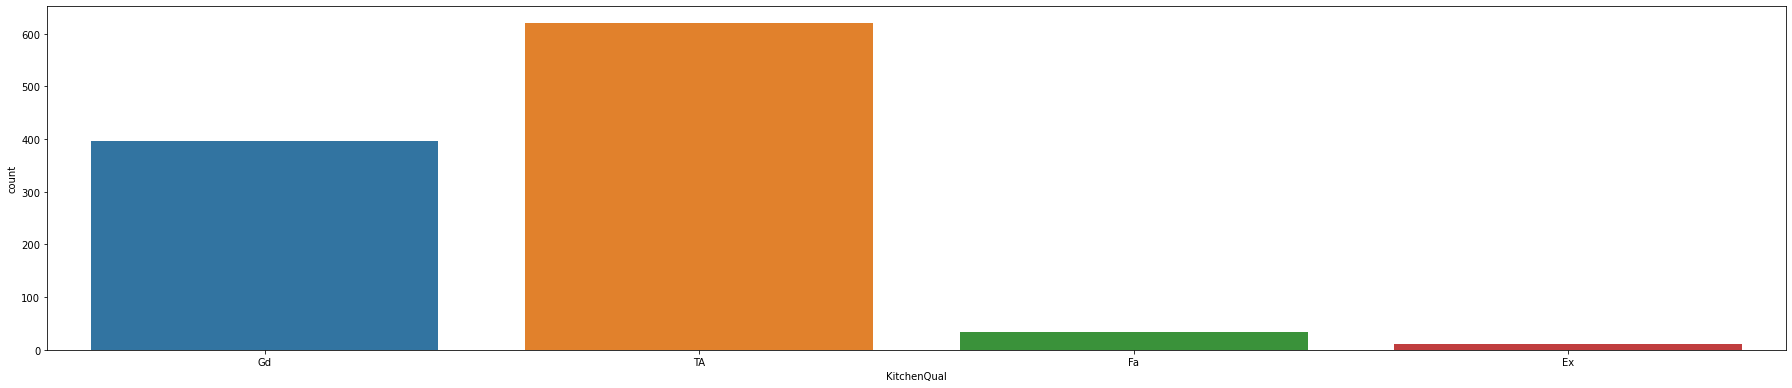

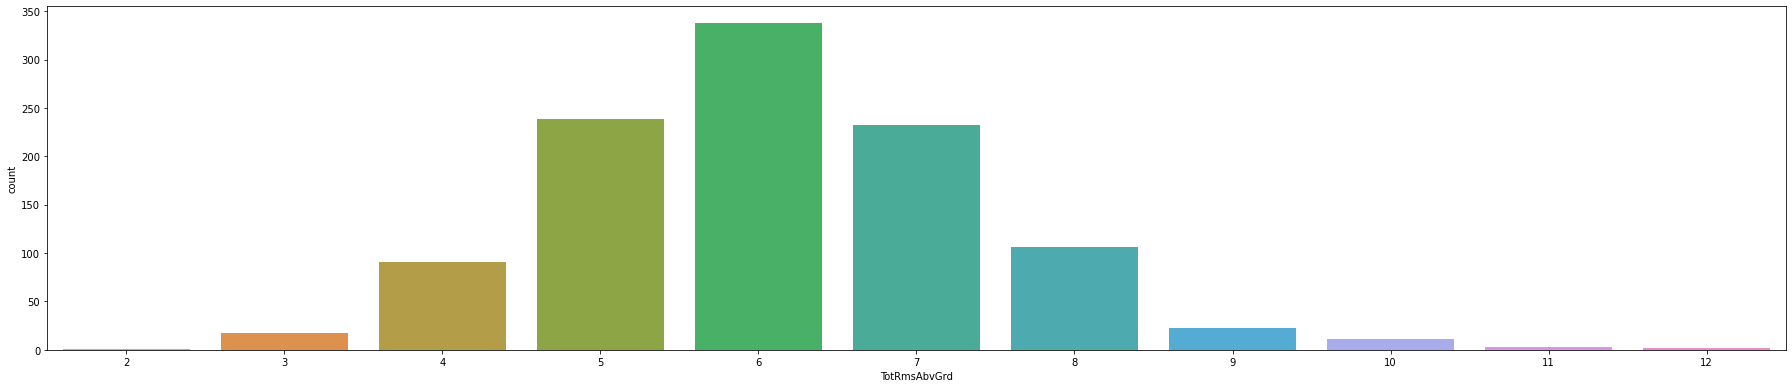

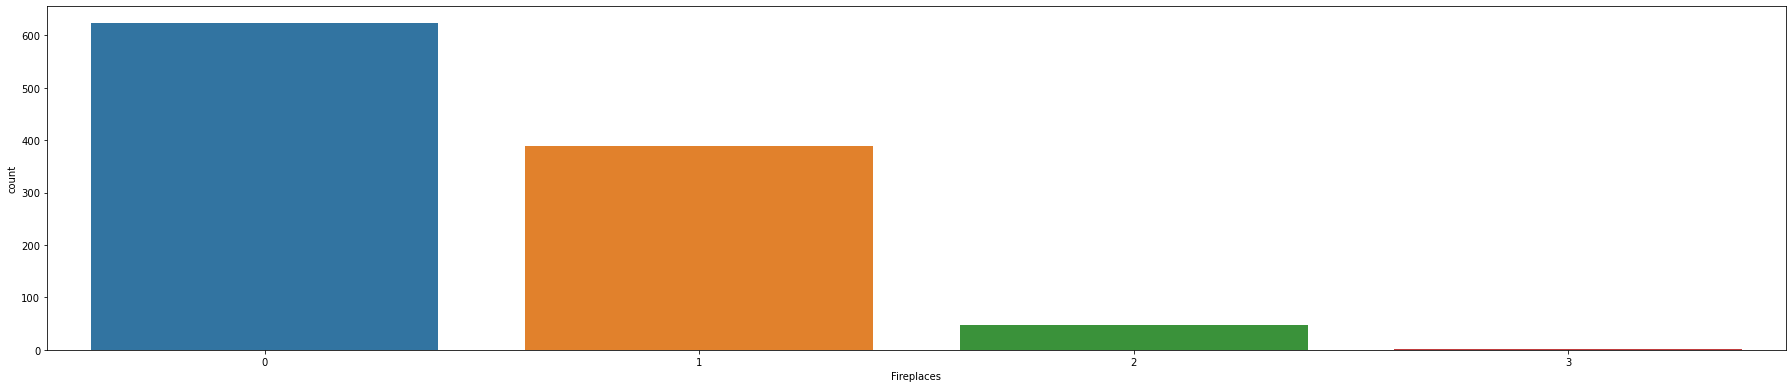

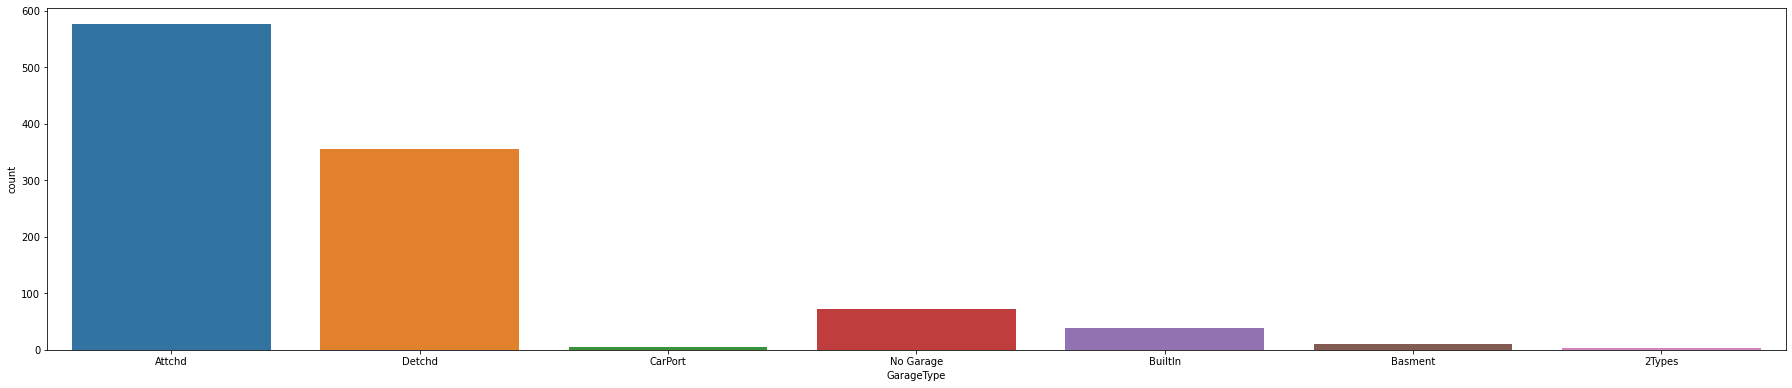

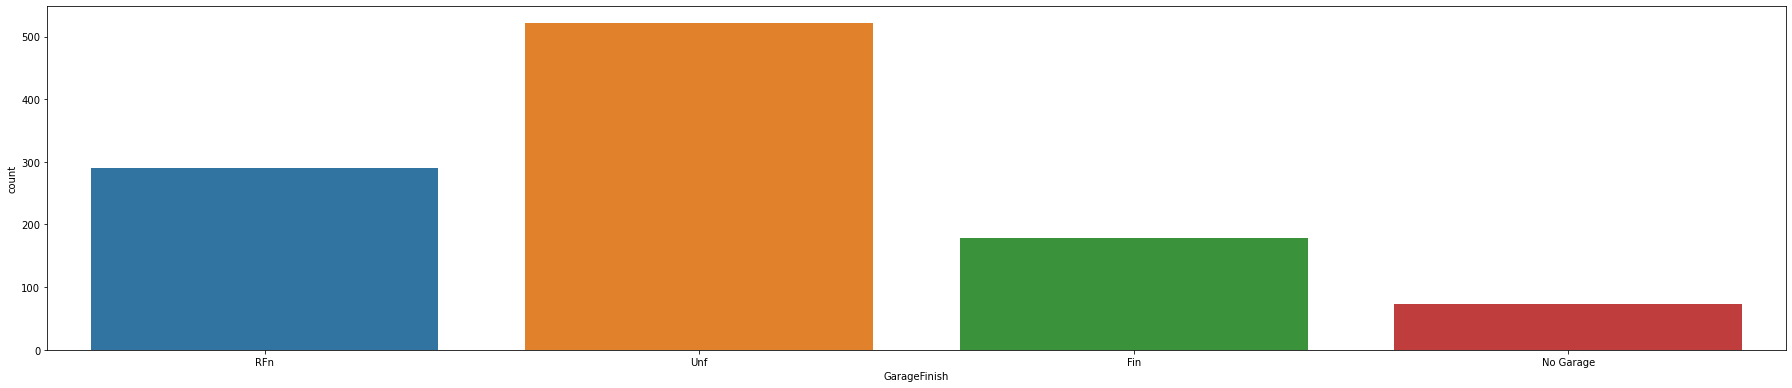

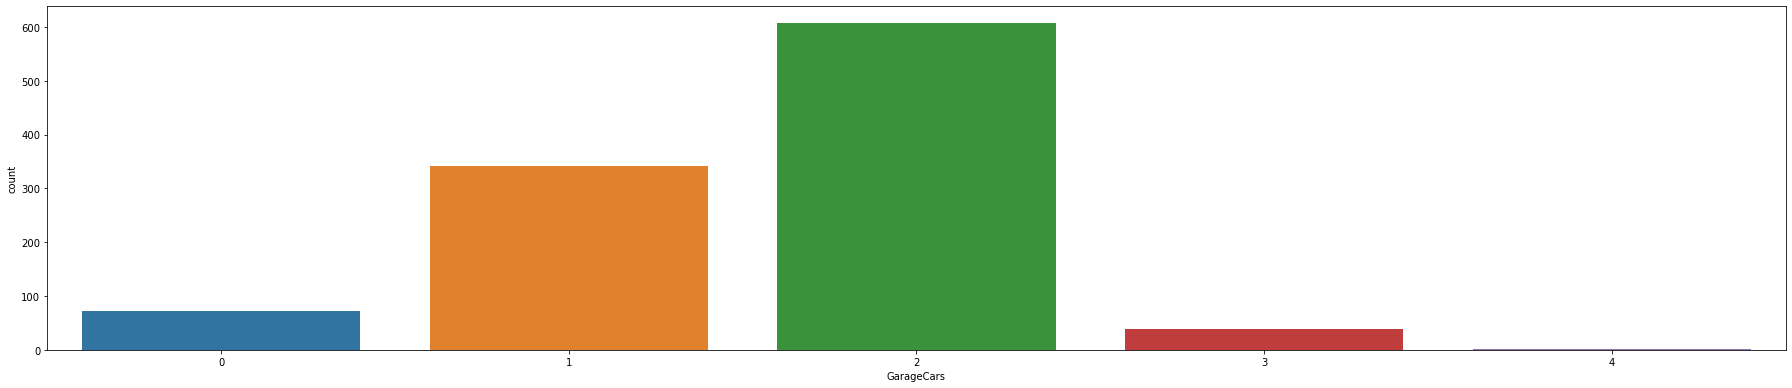

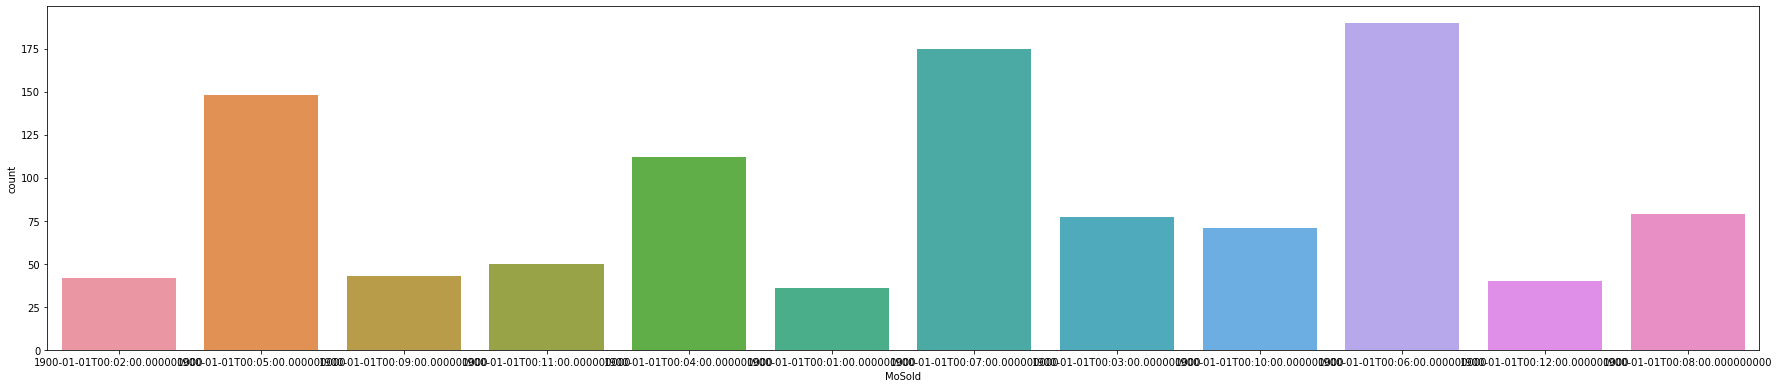

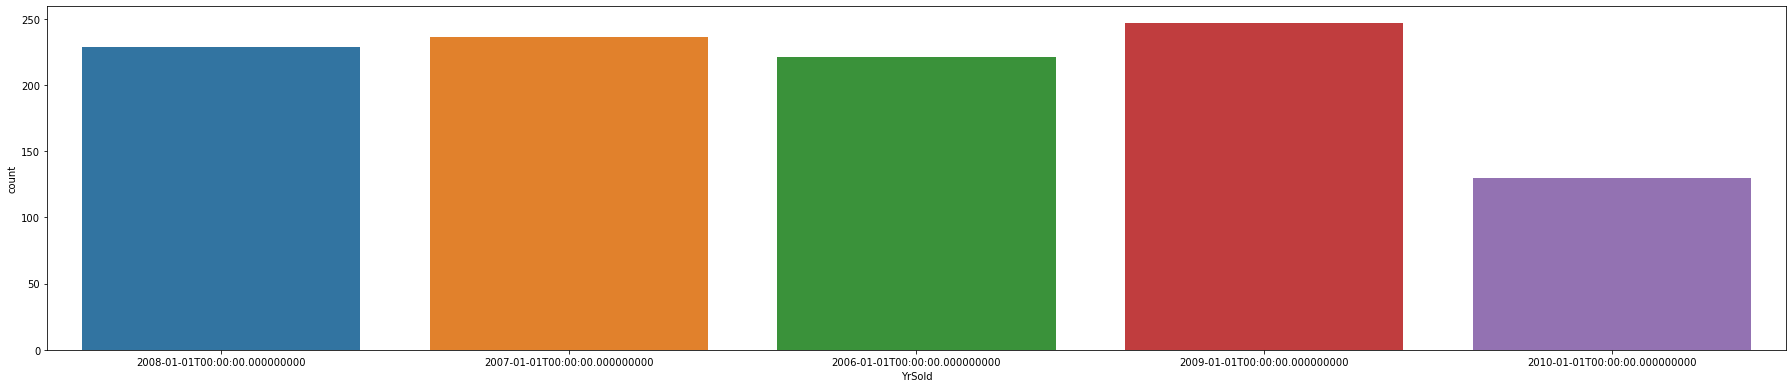

In [46]:
for i in Categorical_columns:
    sns.countplot(data[i])
    plt.show()

# Bivariate and Extended Segmented Univariate Analysis

### Bar plot between the categories and the target variable (sales price) with every detail {category - avg(cnt)}

In [119]:
"""
#avg of sale price for all cats
for i in Categorical_columns:
    sns.countplot()
    b = data.filter([i,'SalePrice'])
    group_1 = b.groupby(i).mean()
    print(group_1)
    g=sns.barplot(x=group_1.index,y='SalePrice',data=group_1,estimator= np.sum)
    plt.show()
"""

"\n#avg of sale price for all cats\nfor i in Categorical_columns:\n    sns.countplot()\n    b = data.filter([i,'SalePrice'])\n    group_1 = b.groupby(i).mean()\n    print(group_1)\n    g=sns.barplot(x=group_1.index,y='SalePrice',data=group_1,estimator= np.sum)\n    plt.show()\n"

### Bar plot between categories and the target (SalePrice) with each category as a sub-category (to see data in depth)

In [120]:
"""
for j in Categorical_columns:
    for i in Categorical_columns:
        if i != j:
            sns.countplot()
            b = data.filter([i,j,'SalePrice'])
            group_1 = b.groupby([j,i]).mean()
            group_1 = group_1.reset_index()
            print(group_1)
            
            g=sns.barplot(x=i,y='SalePrice',data=group_1,estimator= np.mean,hue = j)
        

            plt.show()
"""

"\nfor j in Categorical_columns:\n    for i in Categorical_columns:\n        if i != j:\n            sns.countplot()\n            b = data.filter([i,j,'SalePrice'])\n            group_1 = b.groupby([j,i]).mean()\n            group_1 = group_1.reset_index()\n            print(group_1)\n            \n            g=sns.barplot(x=i,y='SalePrice',data=group_1,estimator= np.mean,hue = j)\n        \n\n            plt.show()\n"

### Scatter plot between the numrical variables having categorical valriables in hue

In [121]:
"""
for j in Numerical_columns:
    for i in Categorical_columns:
        if i != j:
            plt.figure(figsize=(12,8))
            sns.scatterplot(y = data.SalePrice,x = data[j],hue=data[i])
            plt.show()
"""

'\nfor j in Numerical_columns:\n    for i in Categorical_columns:\n        if i != j:\n            plt.figure(figsize=(12,8))\n            sns.scatterplot(y = data.SalePrice,x = data[j],hue=data[i])\n            plt.show()\n'

### Creating lmplot between numrical variables to see the trend and correlation of each of them with each other.

In [122]:
"""
for j in Numerical_columns:
    for i in Numerical_columns:
        if i != j:
            plt.figure(figsize=(12,8))
            sns.lmplot(x=i,y=j,data=data)
"""

'\nfor j in Numerical_columns:\n    for i in Numerical_columns:\n        if i != j:\n            plt.figure(figsize=(12,8))\n            sns.lmplot(x=i,y=j,data=data)\n'

### Creating lmplot between numrical variables  having categorical values in hue to see the trend and correlation of each of them with each category.

In [123]:
"""
for j in Categorical_columns:
    for i in Numerical_columns:
        plt.figure(figsize=(12,8))
        sns.lmplot(x=i,y='SalePrice',data=data,hue= j)
"""

"\nfor j in Categorical_columns:\n    for i in Numerical_columns:\n        plt.figure(figsize=(12,8))\n        sns.lmplot(x=i,y='SalePrice',data=data,hue= j)\n"

### Creating pair plot 

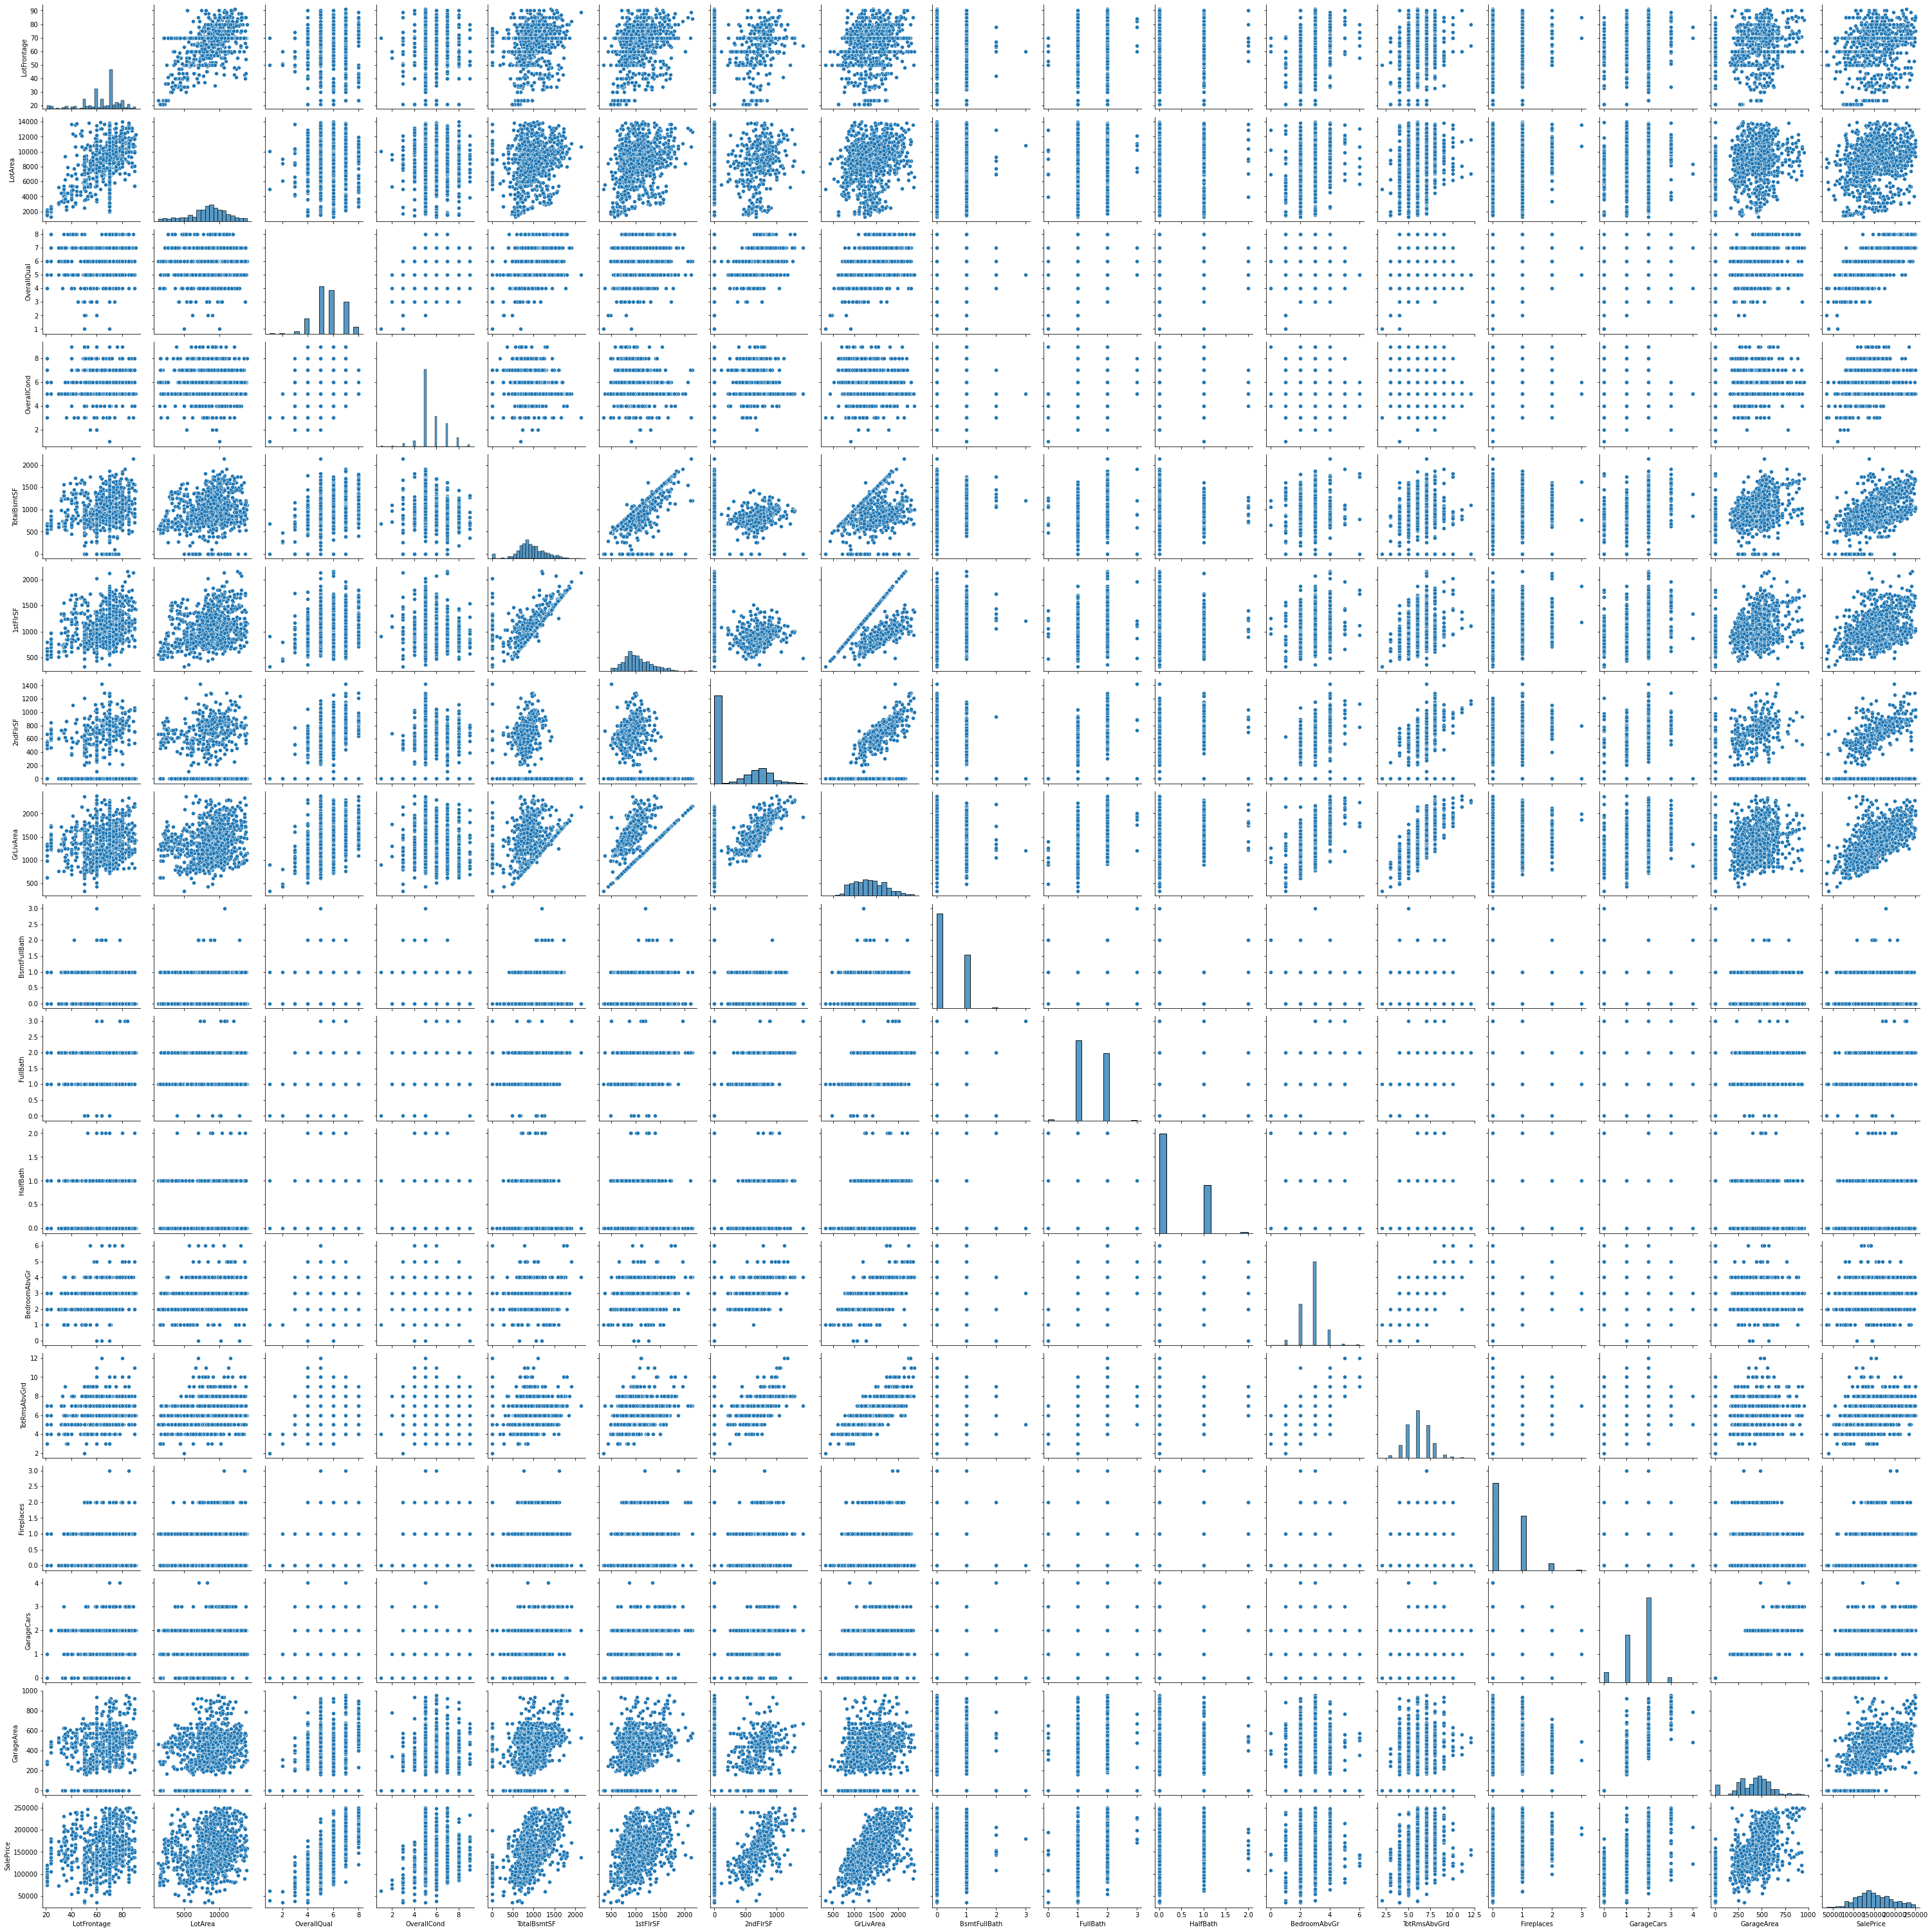

In [52]:
sns.pairplot(data)

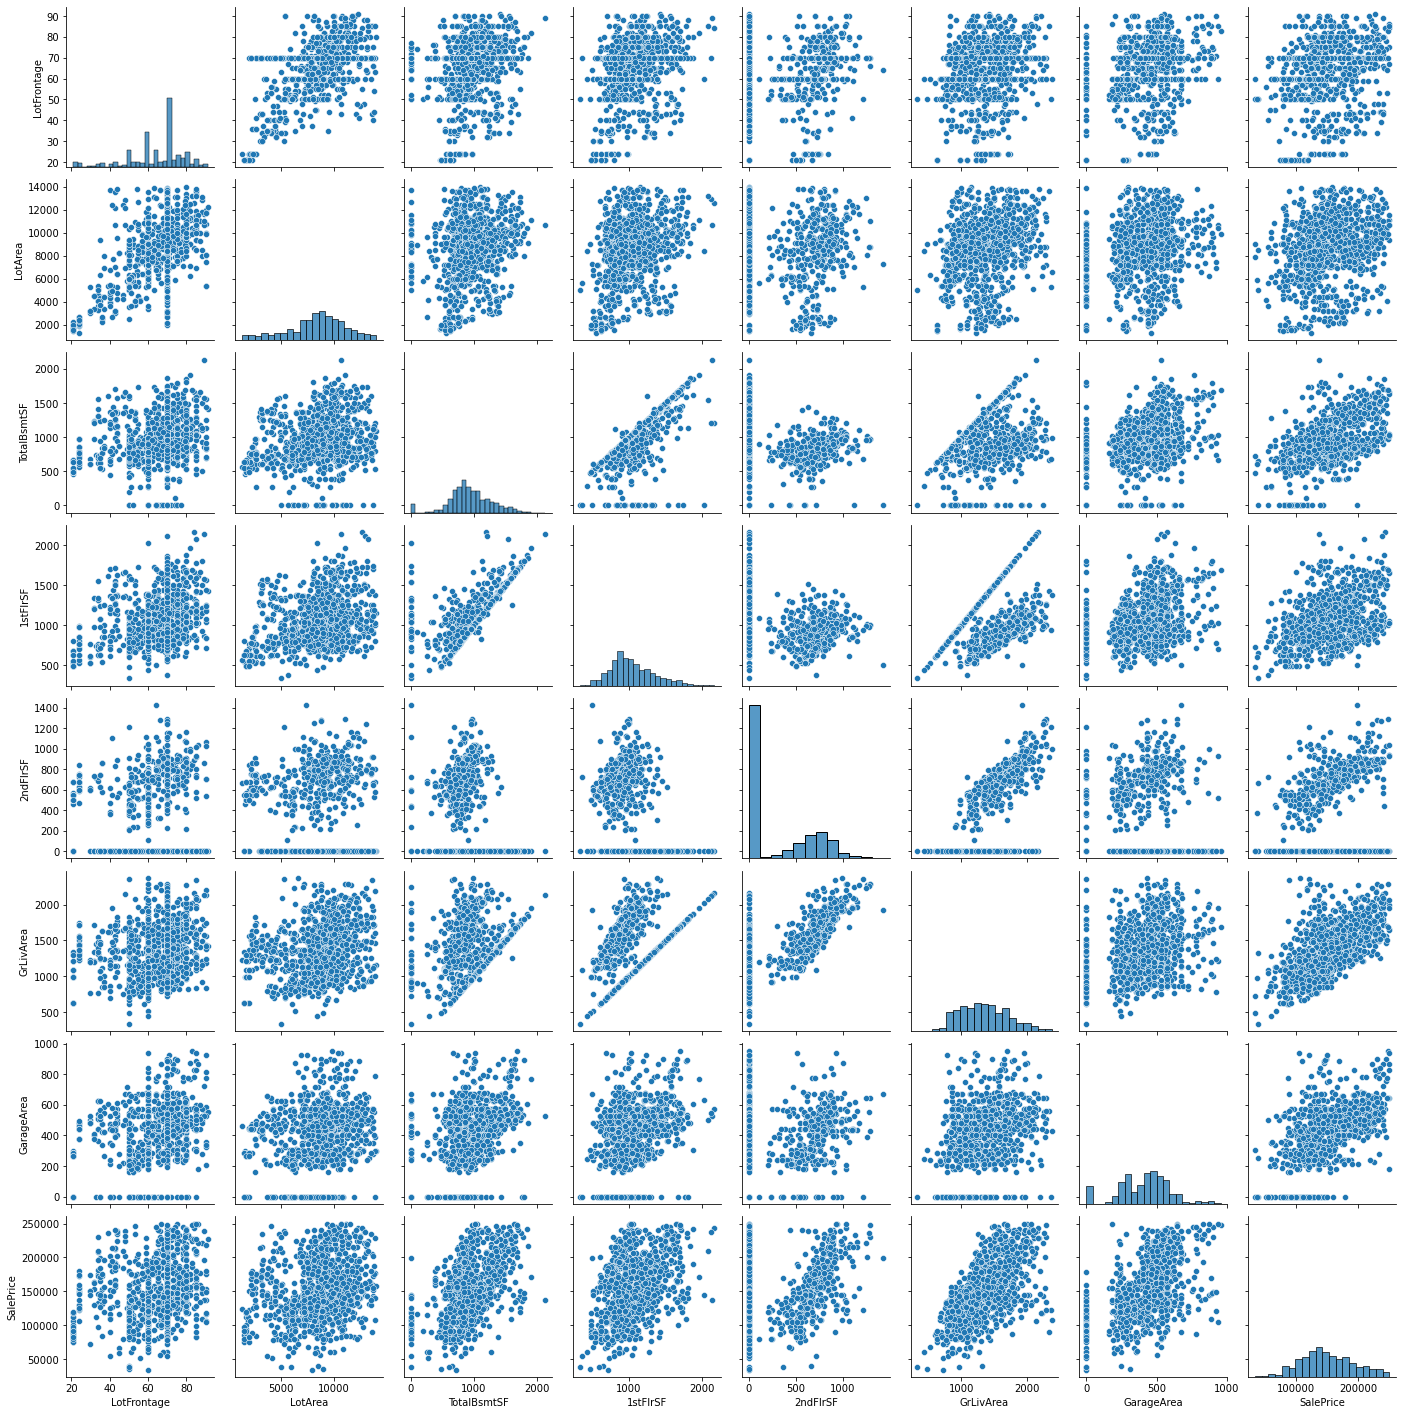

In [53]:
sns.pairplot(data[Numerical_columns])

### Creating box plot between every categorical variable and numrical variable.

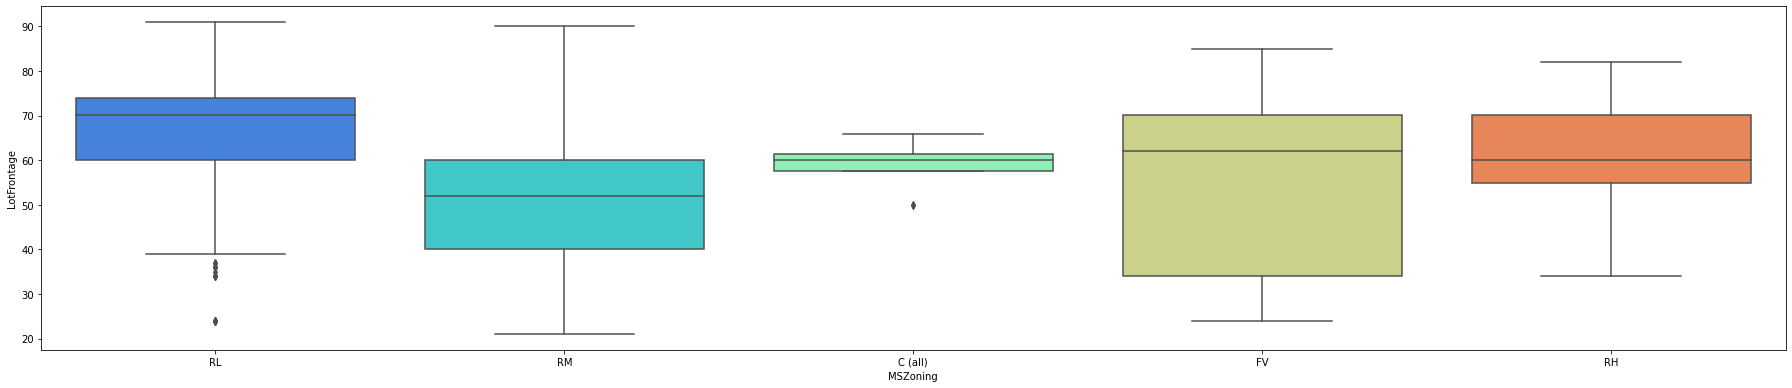

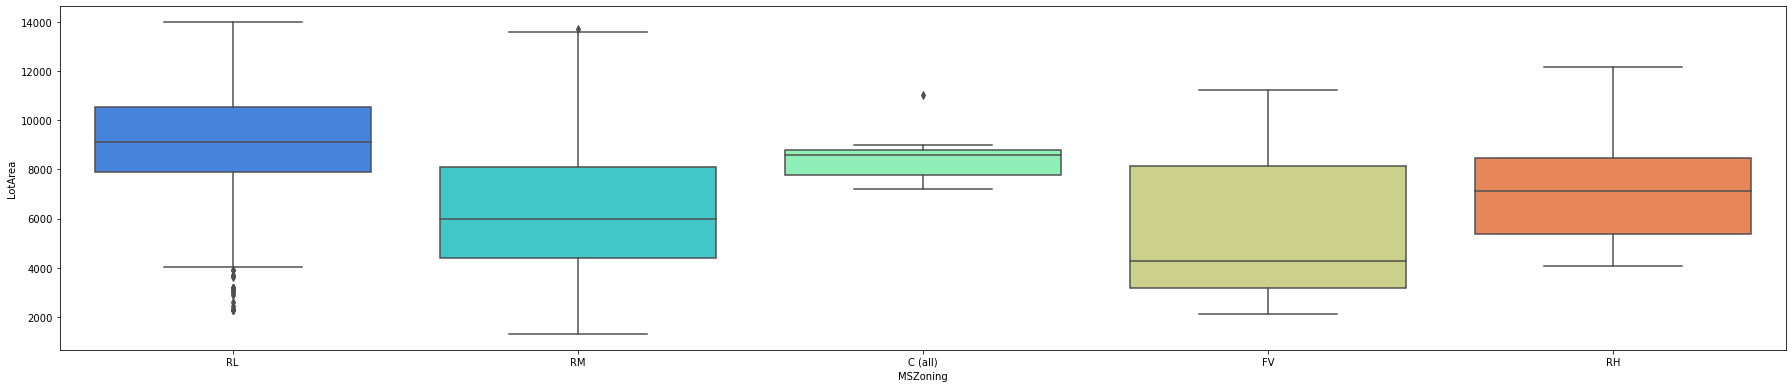

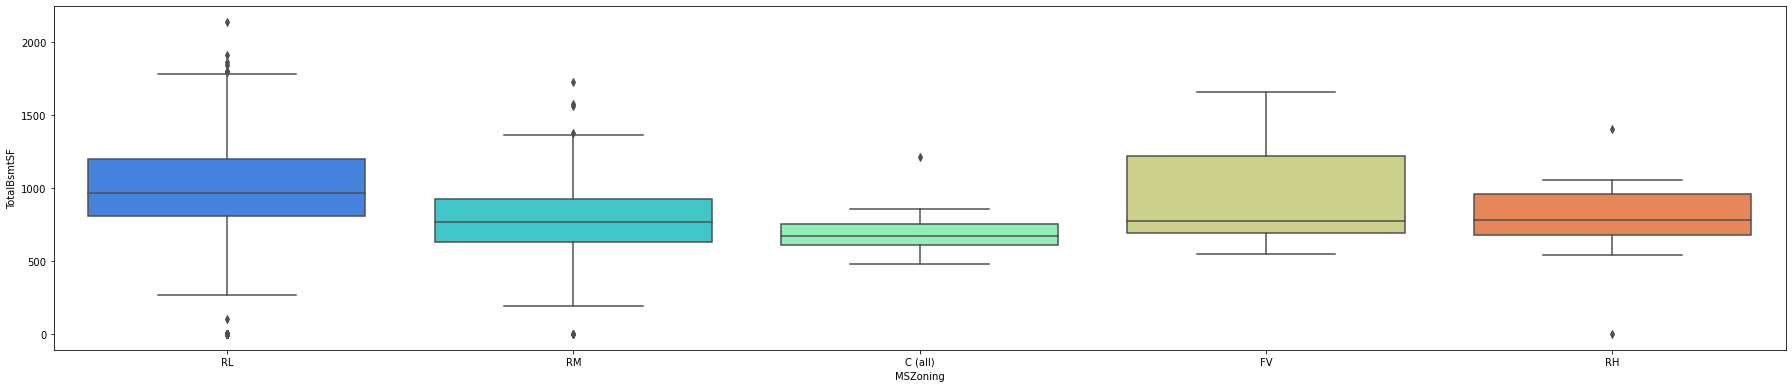

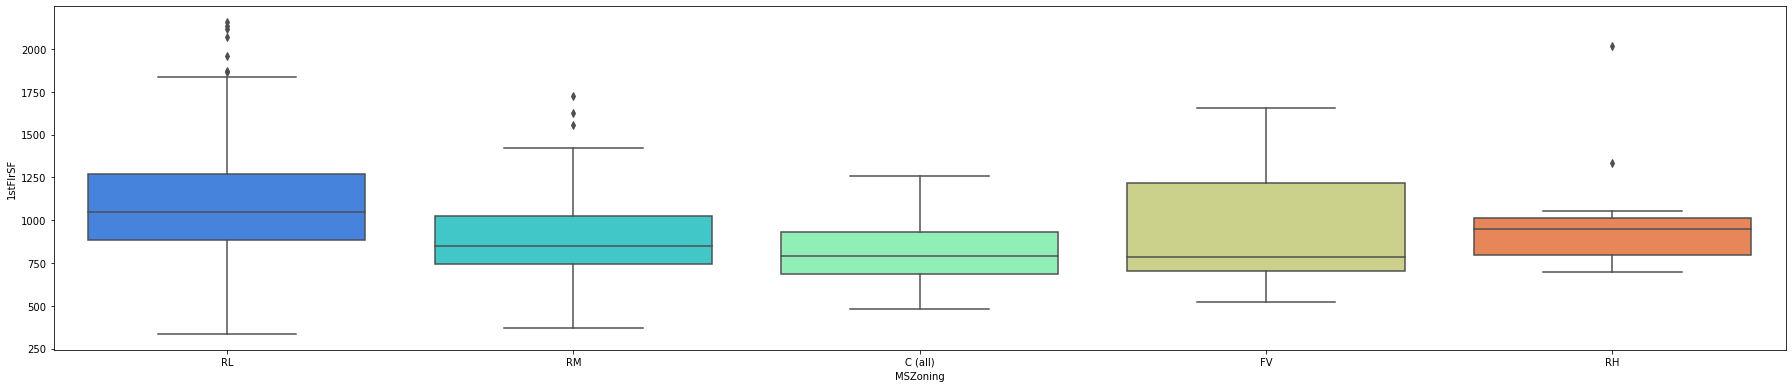

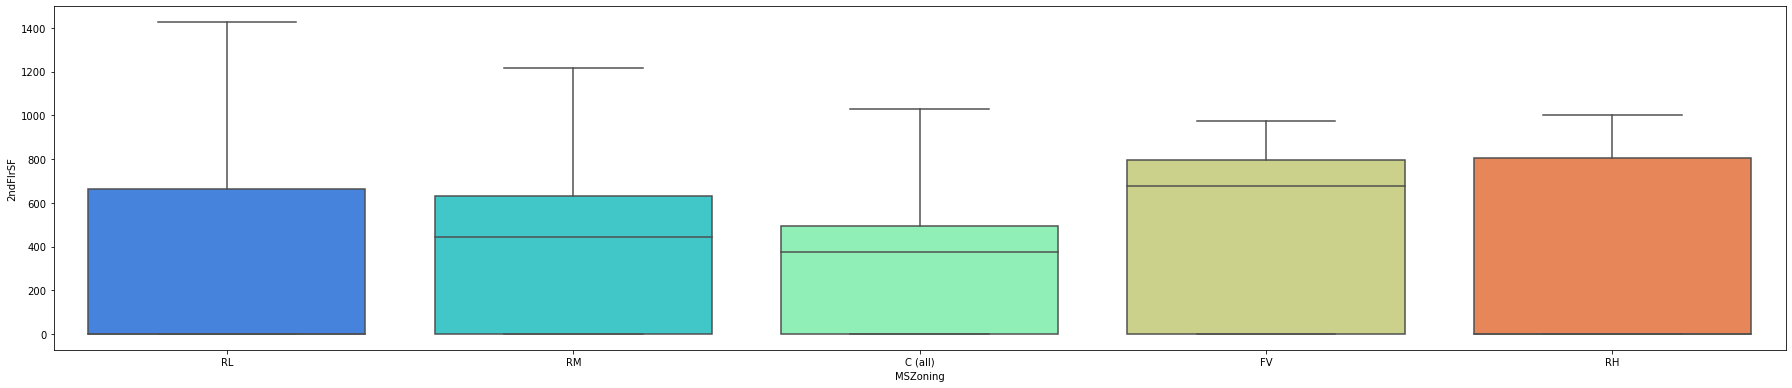

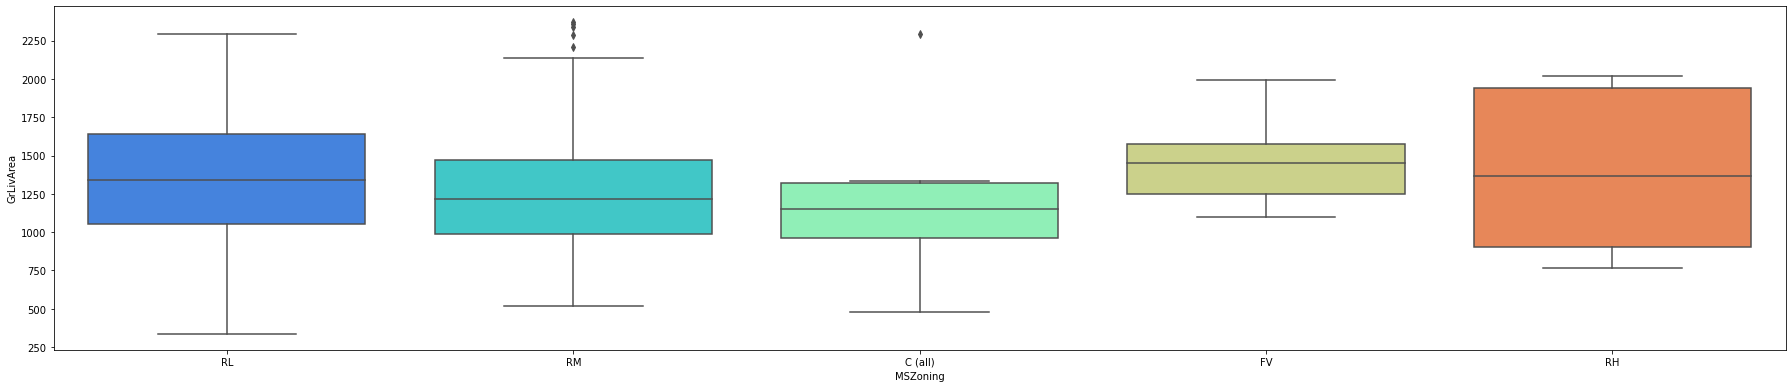

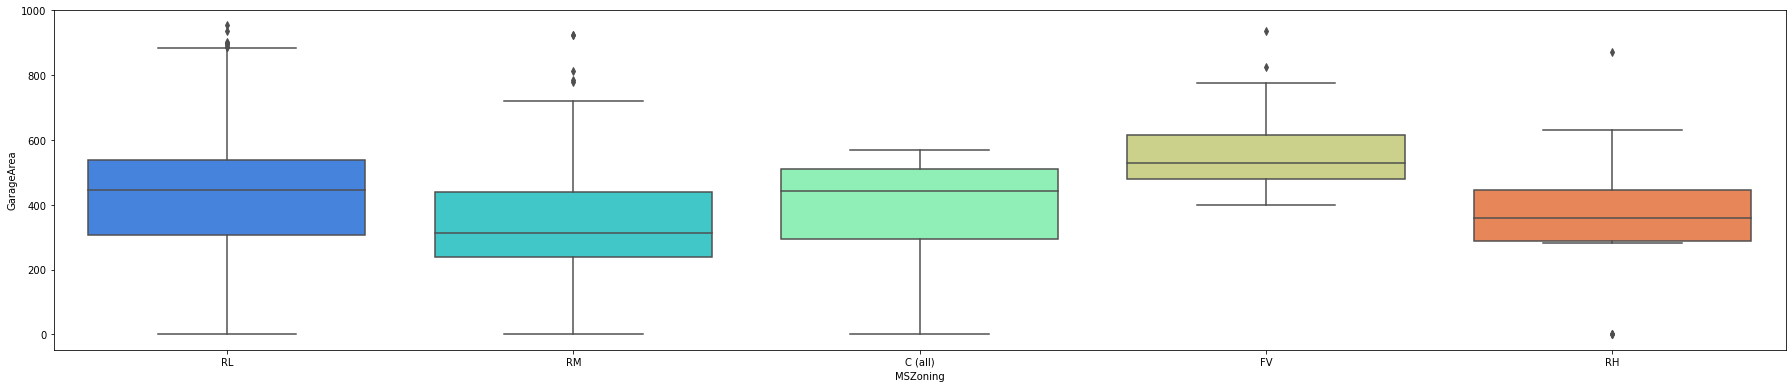

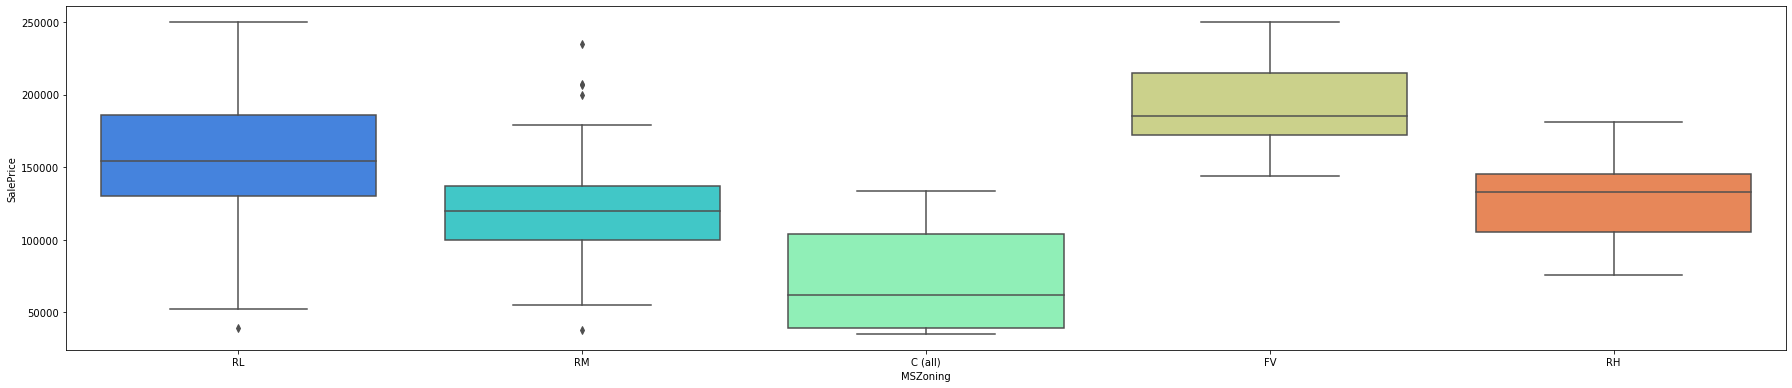

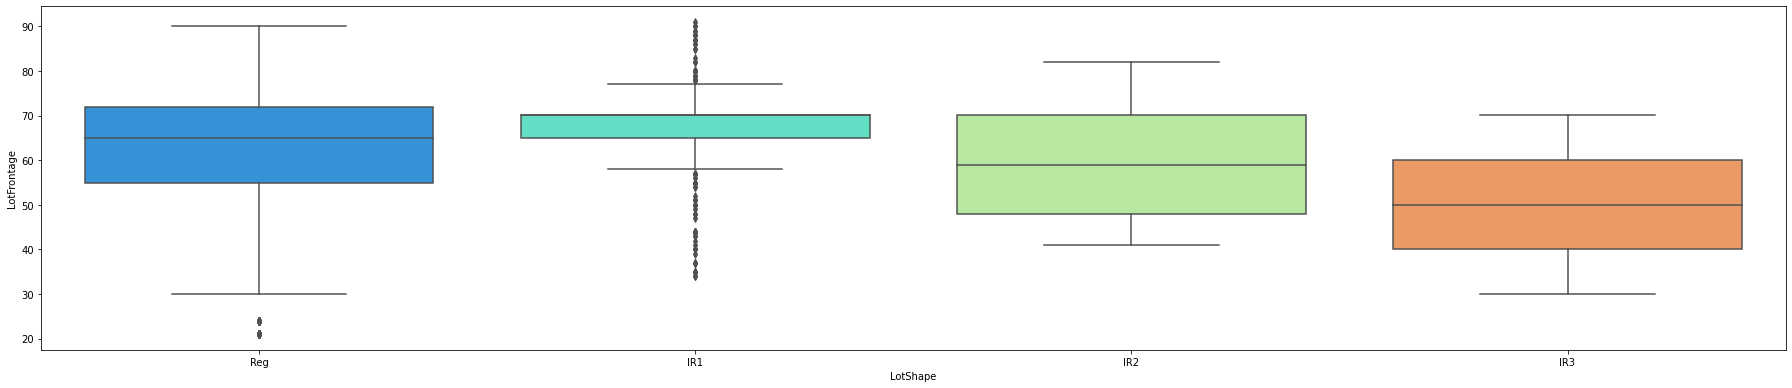

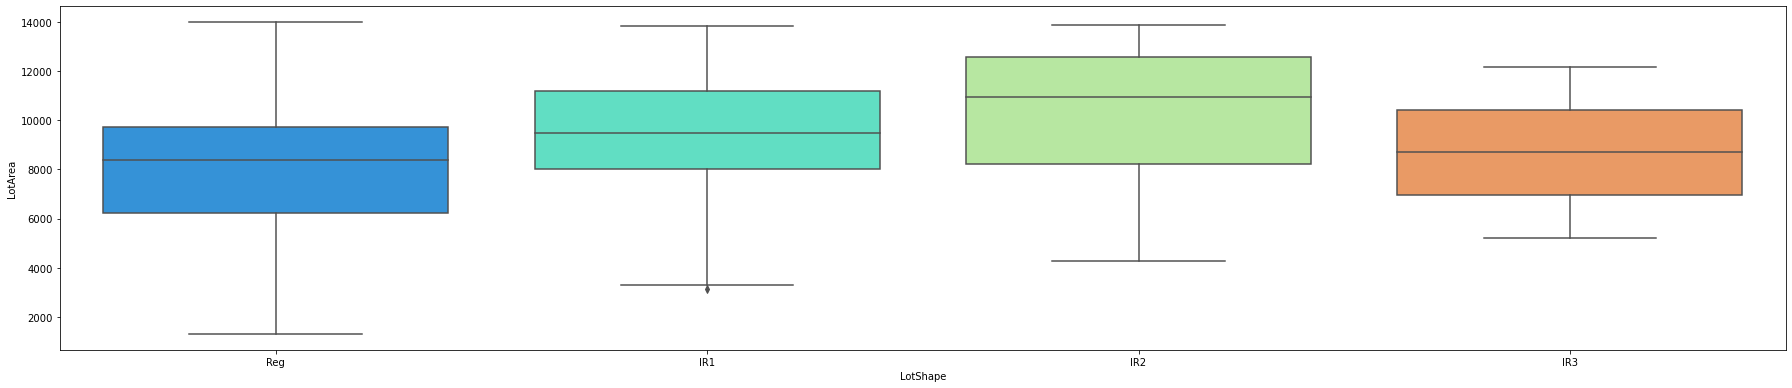

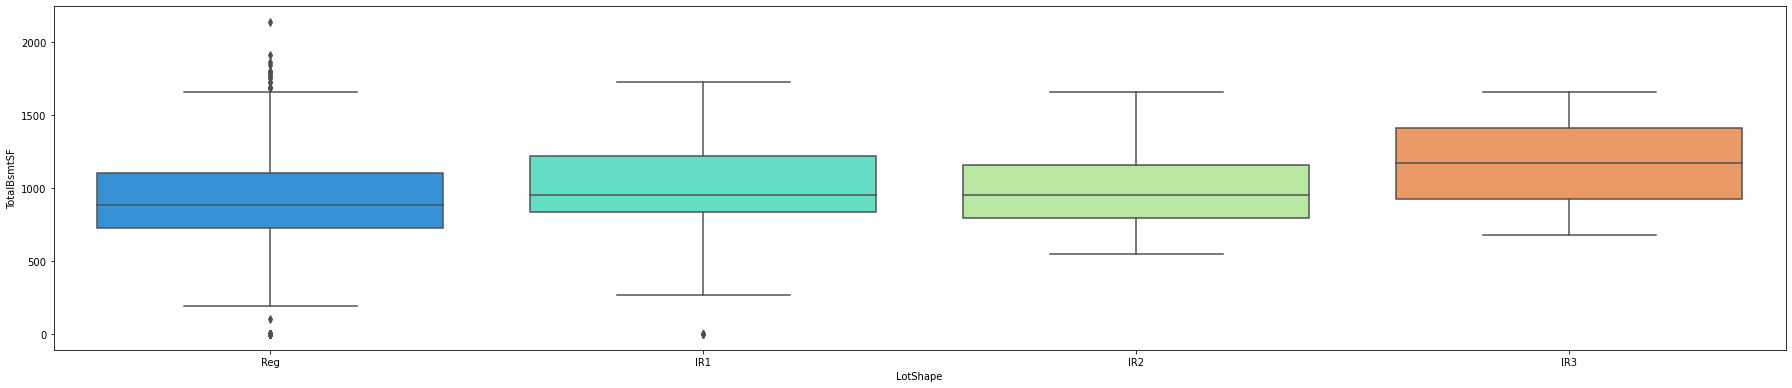

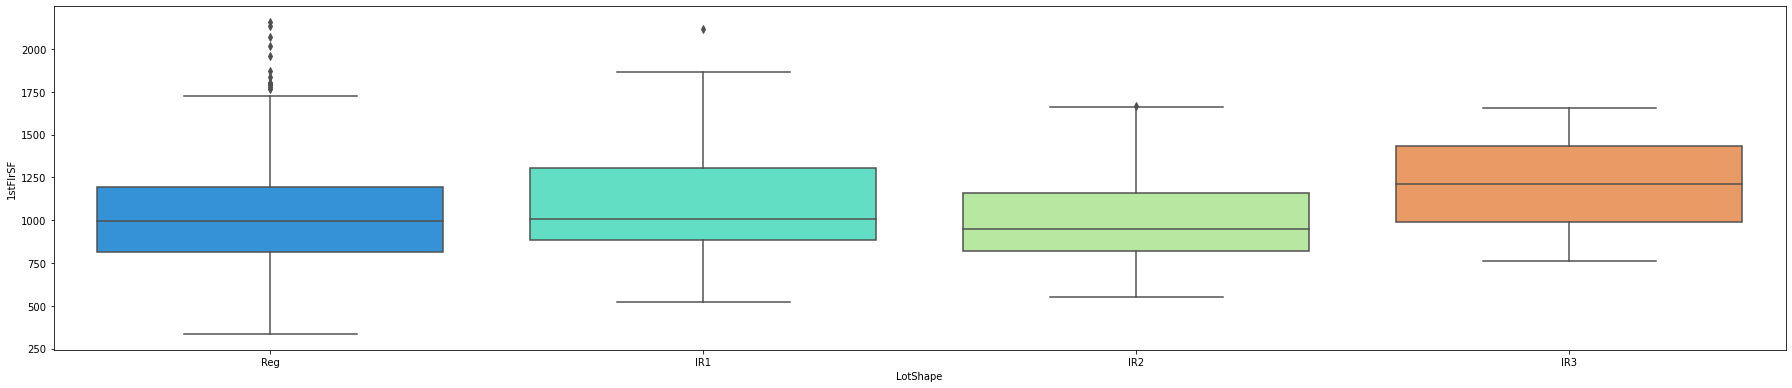

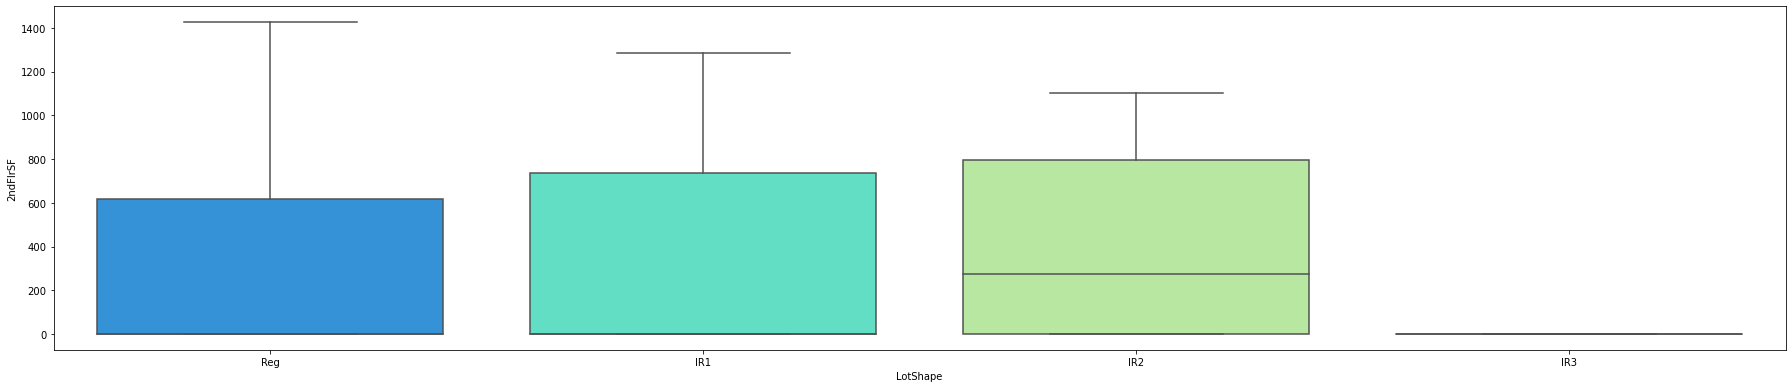

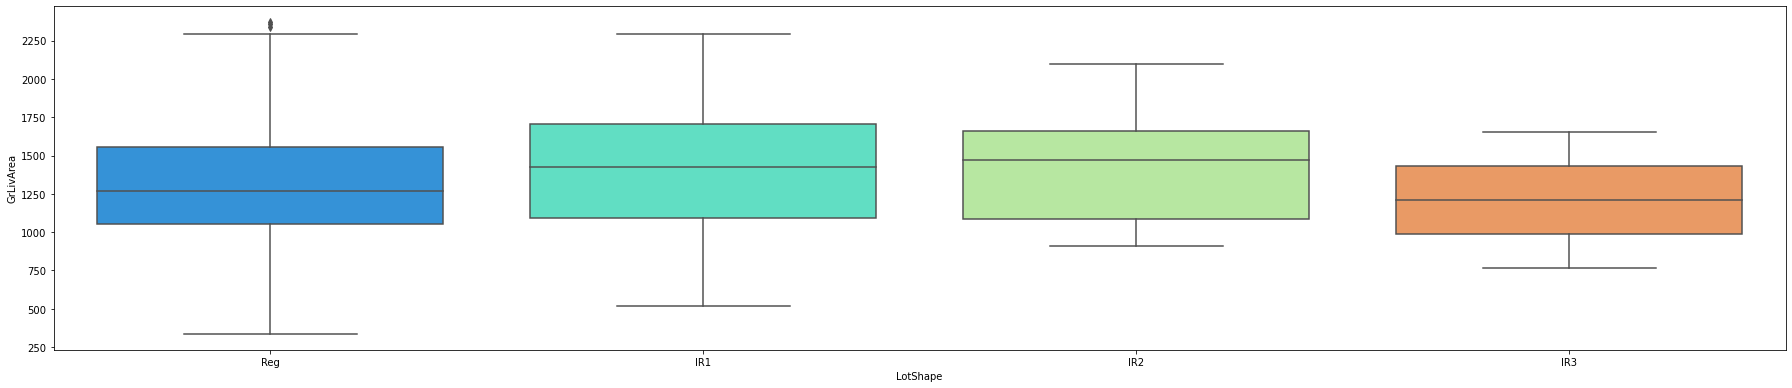

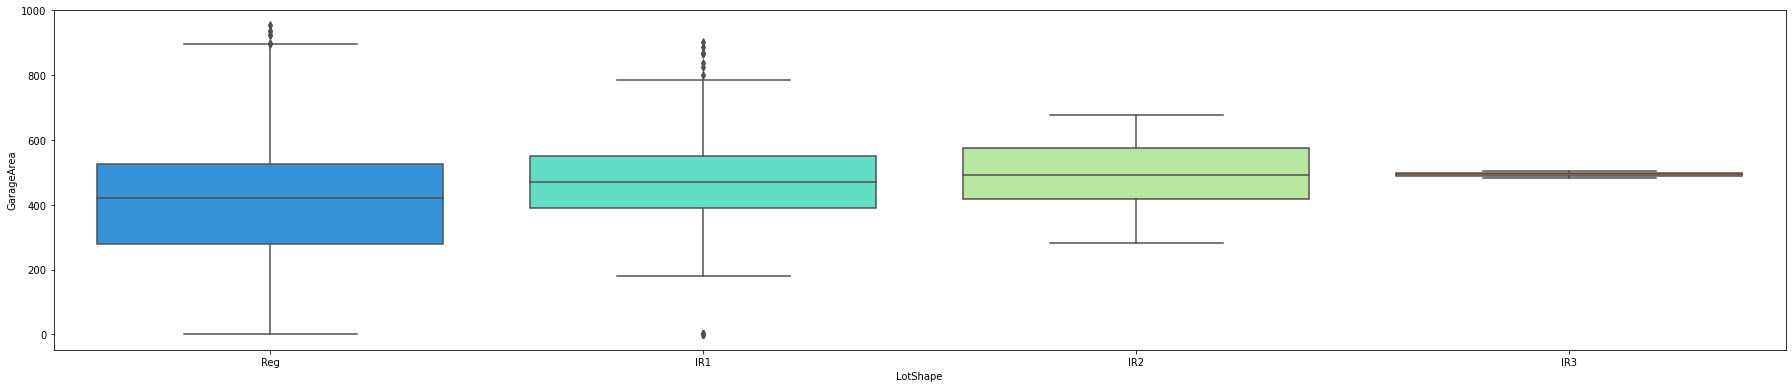

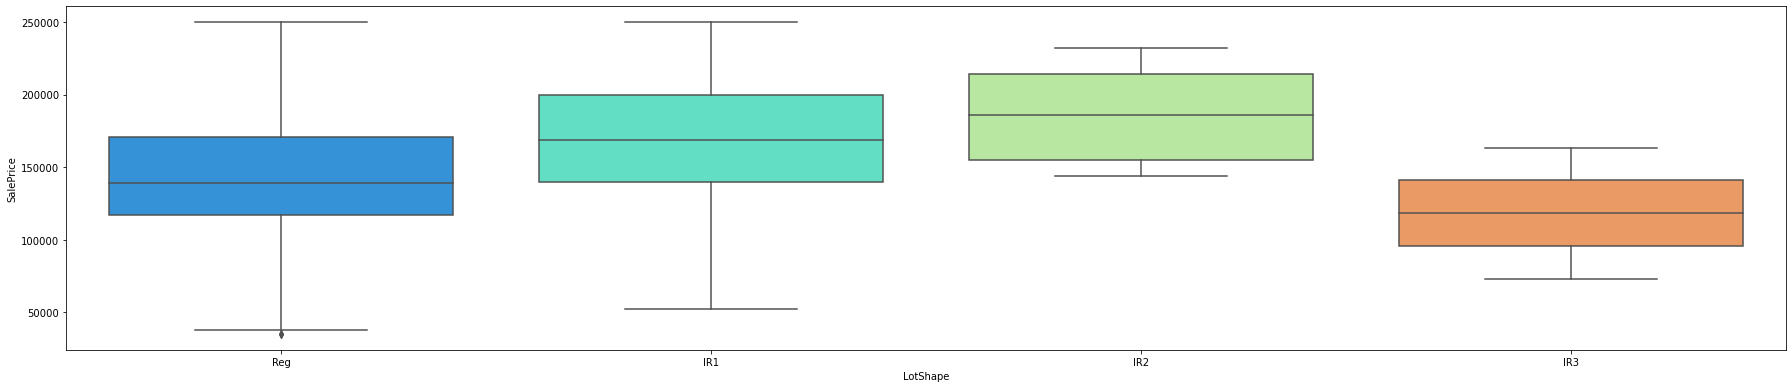

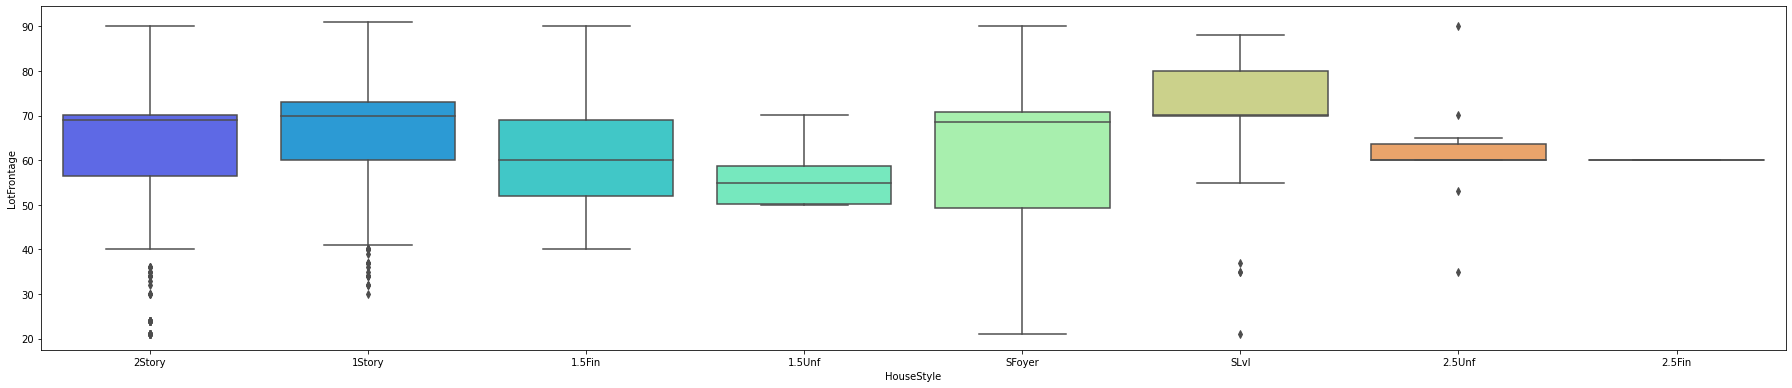

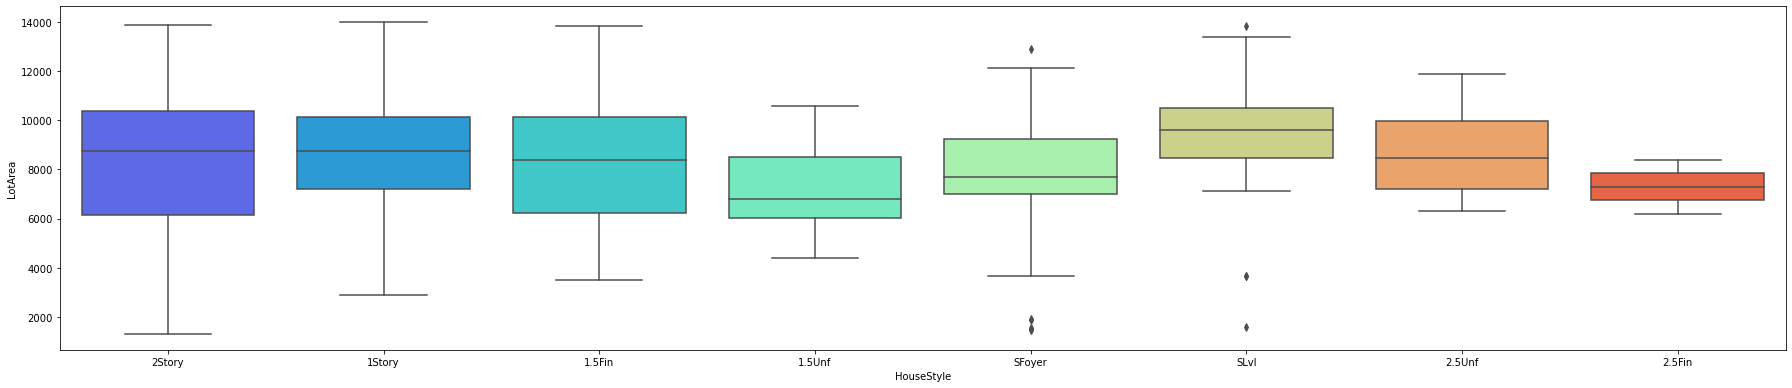

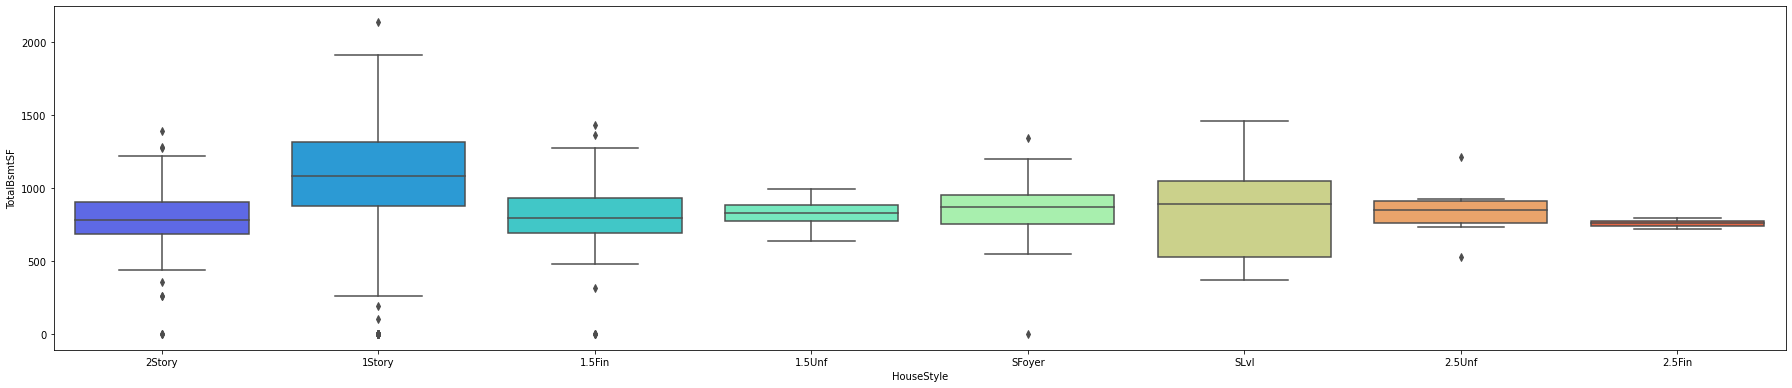

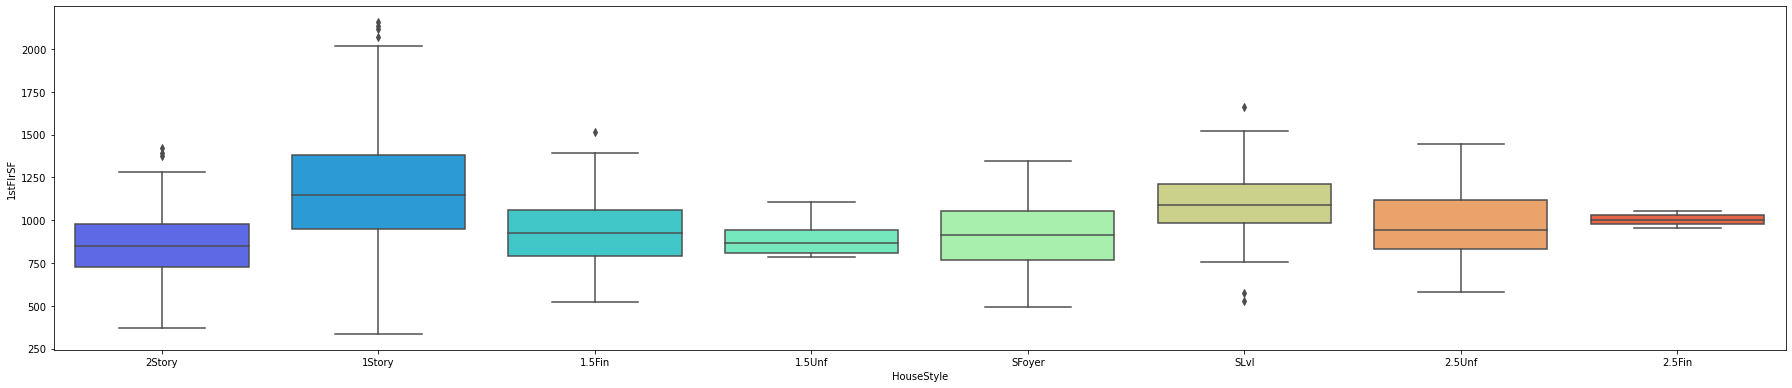

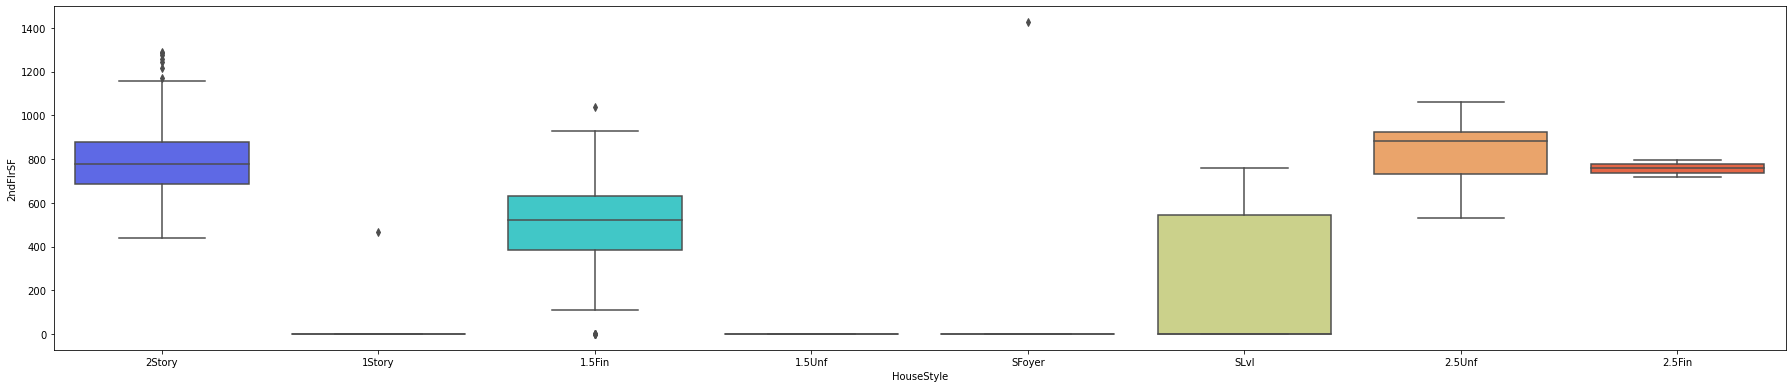

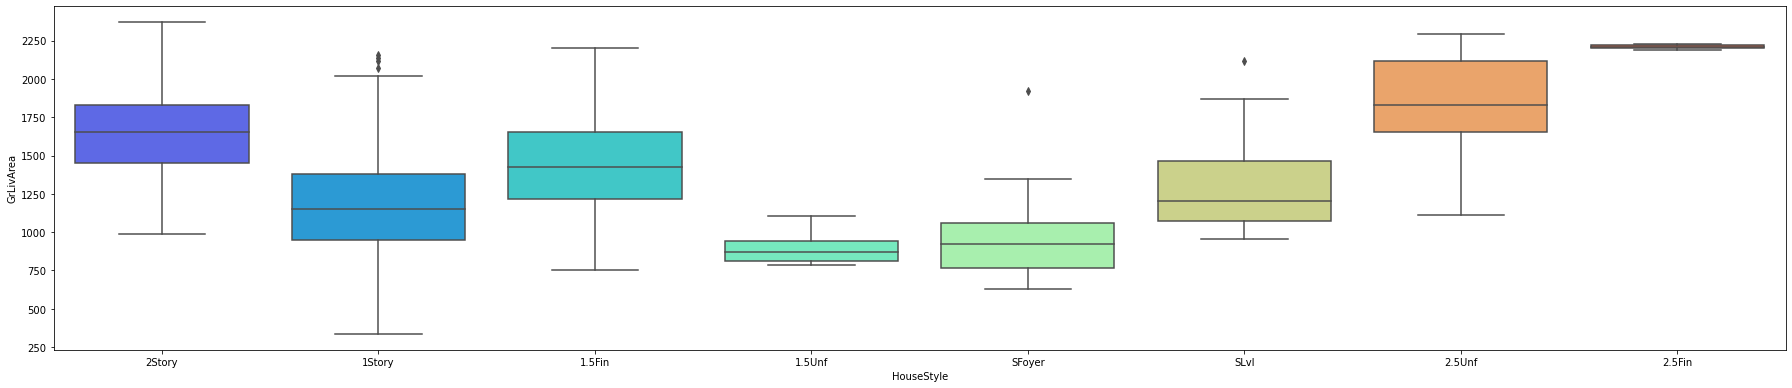

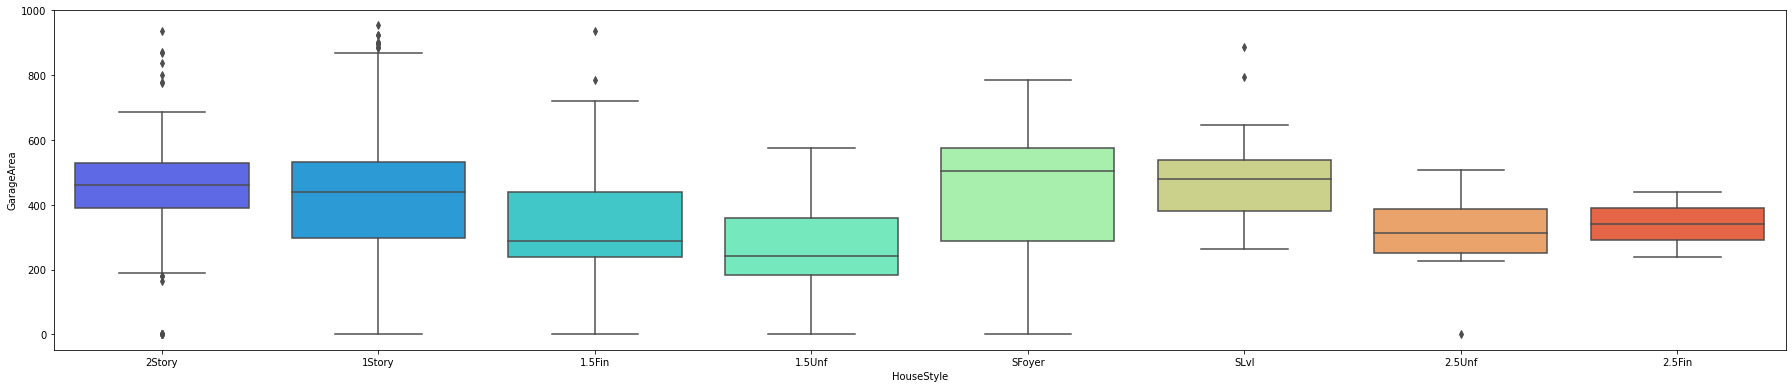

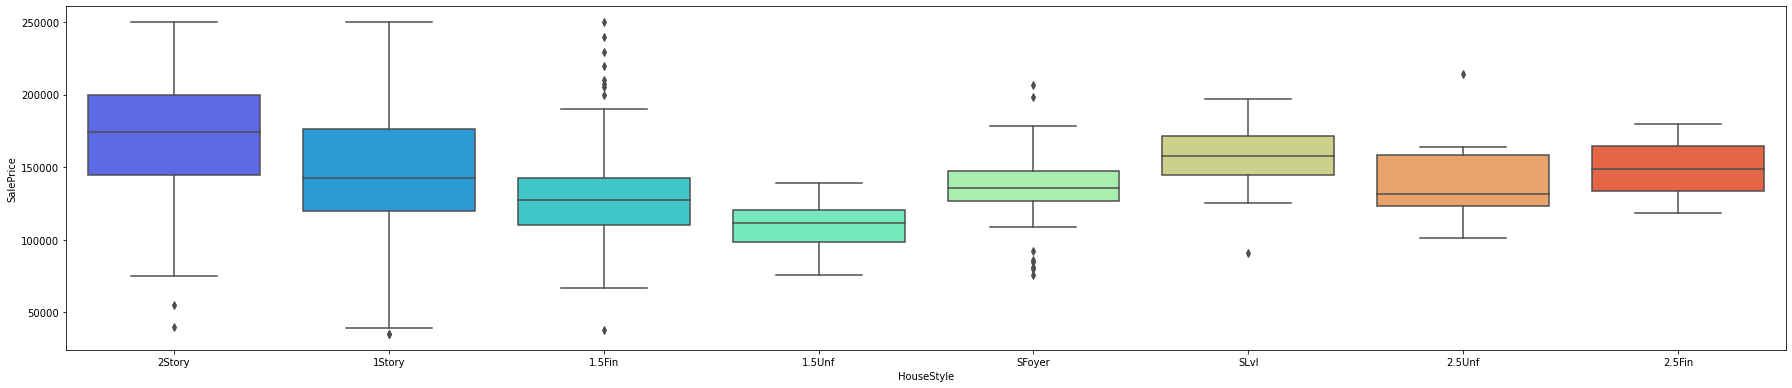

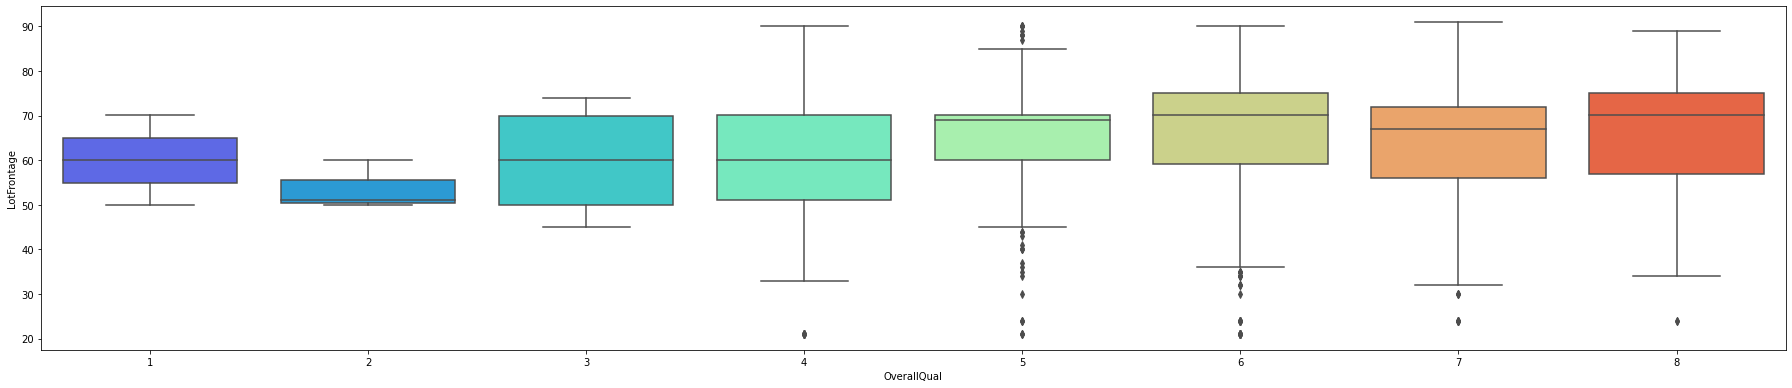

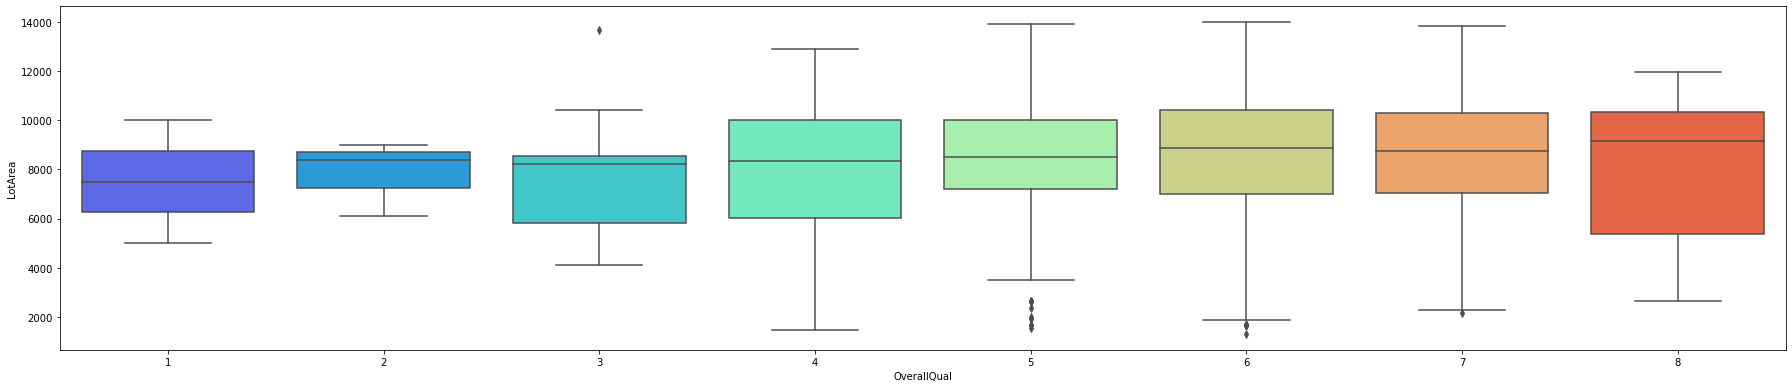

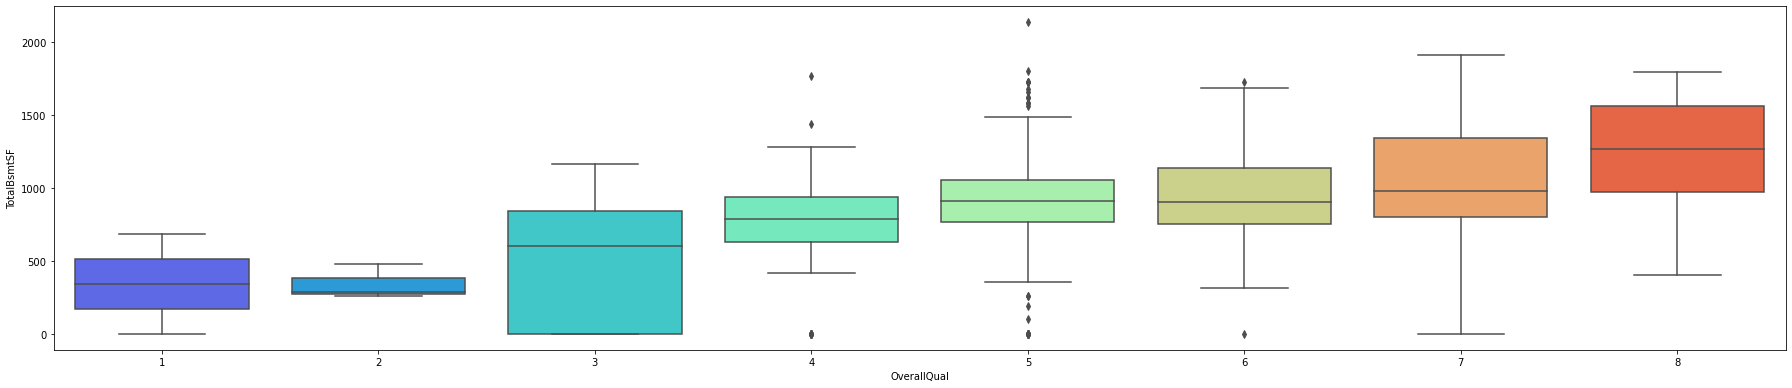

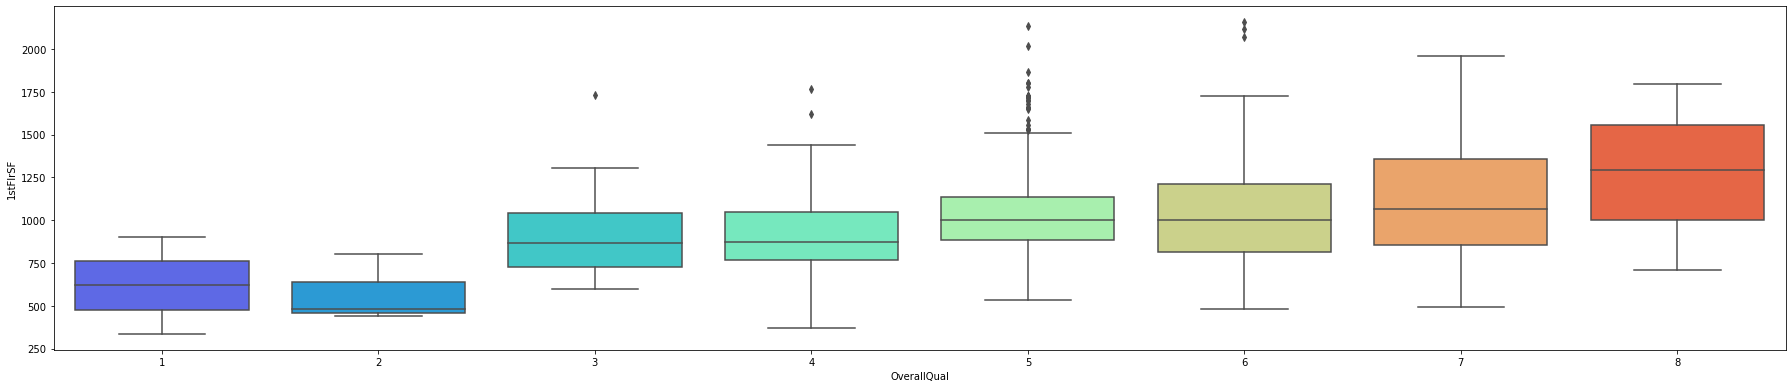

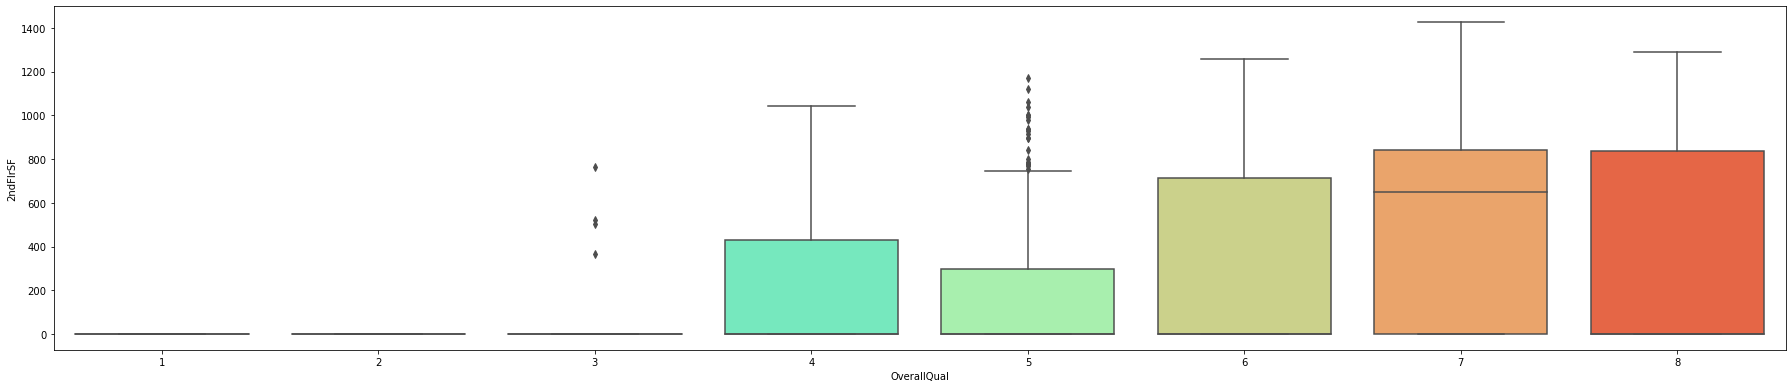

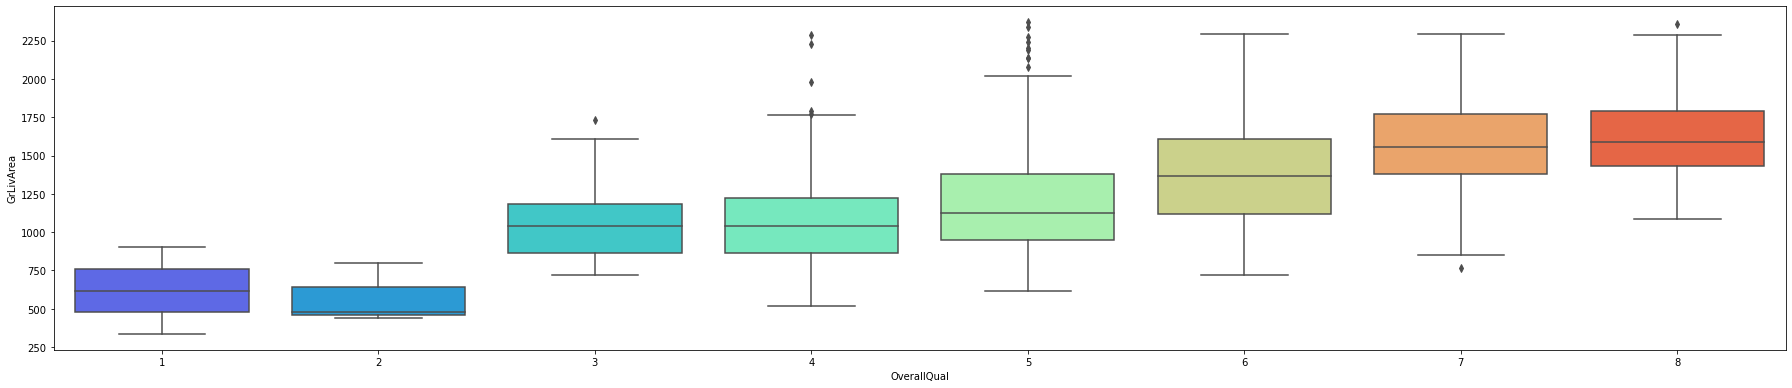

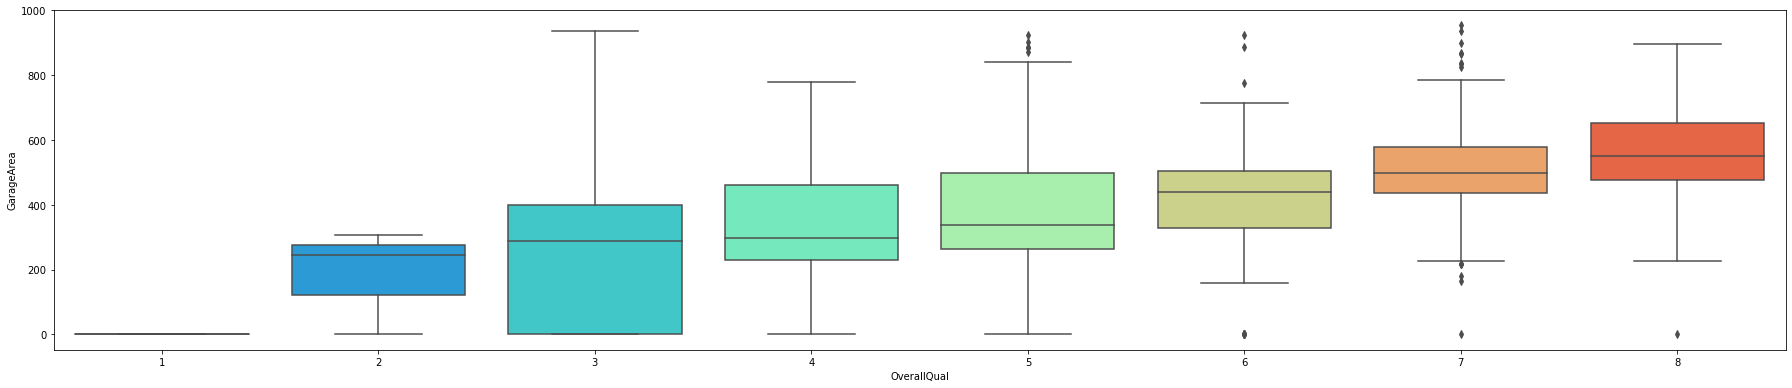

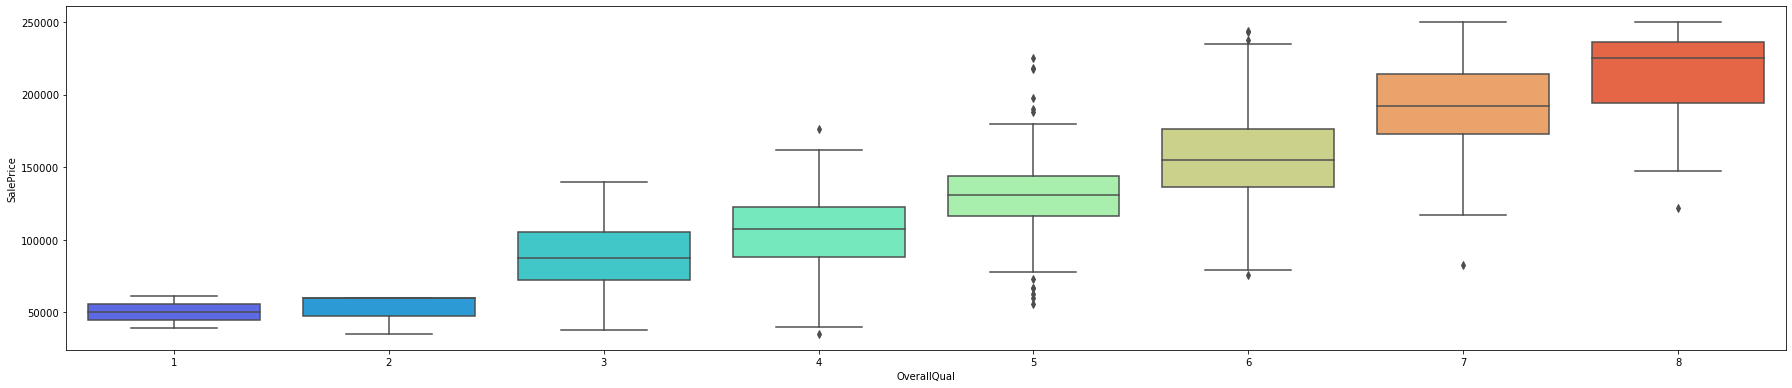

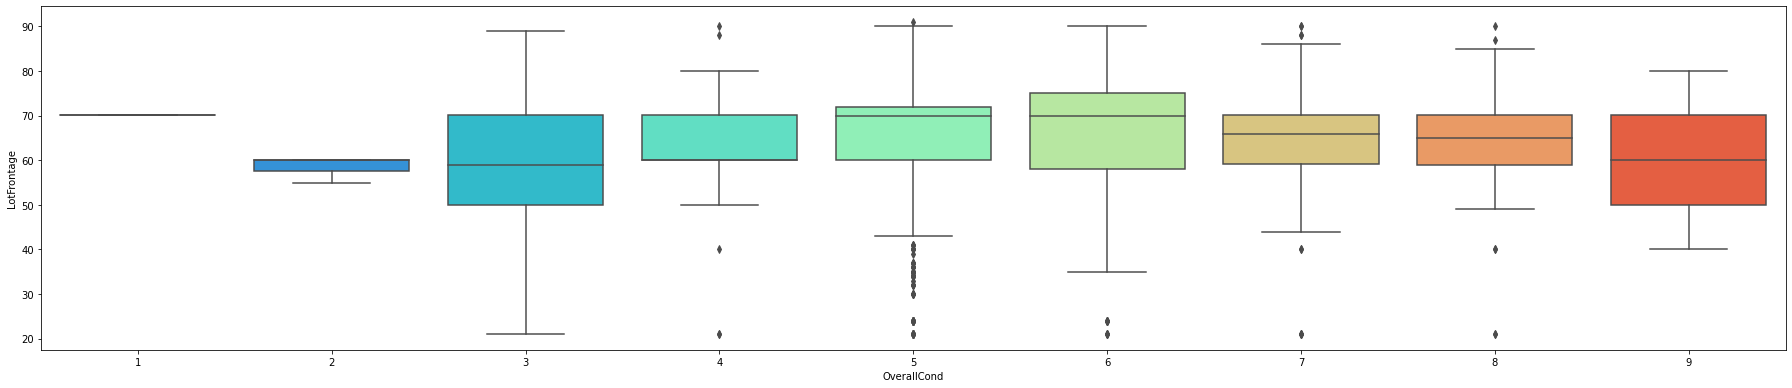

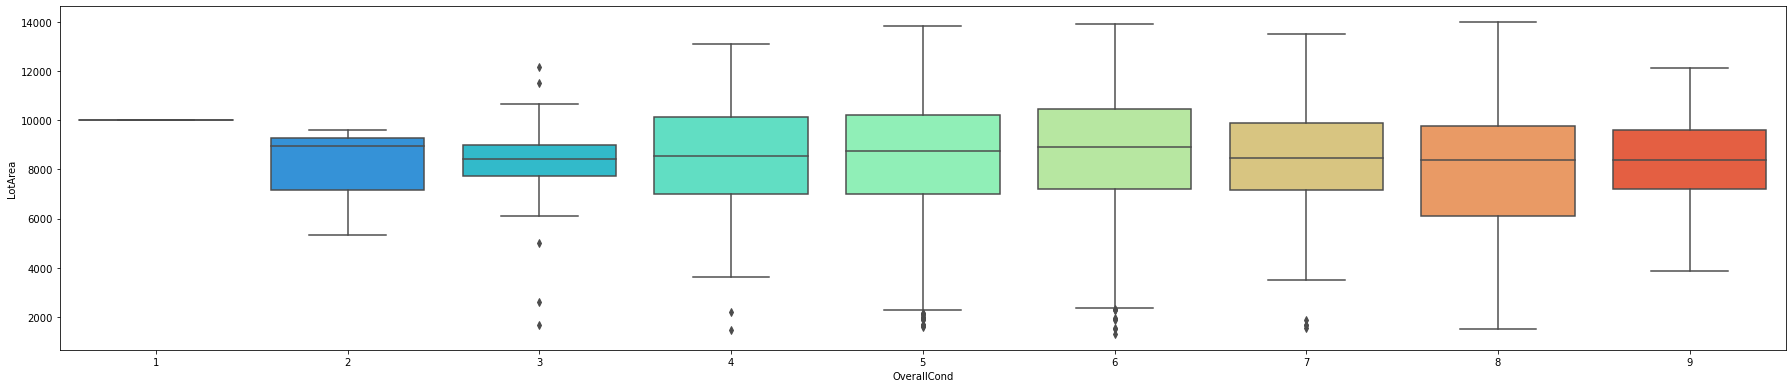

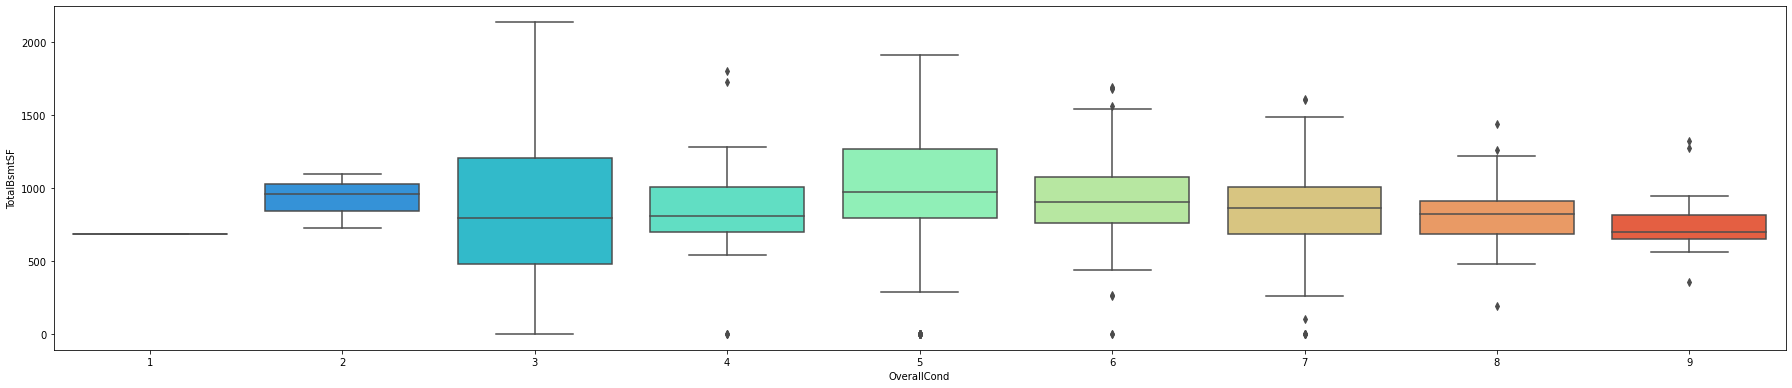

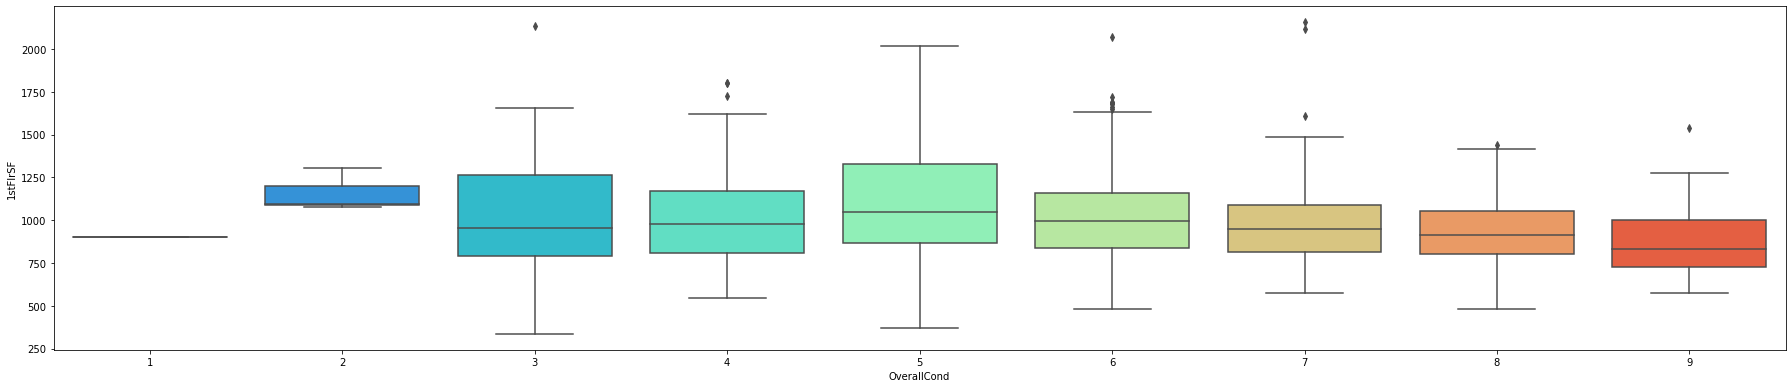

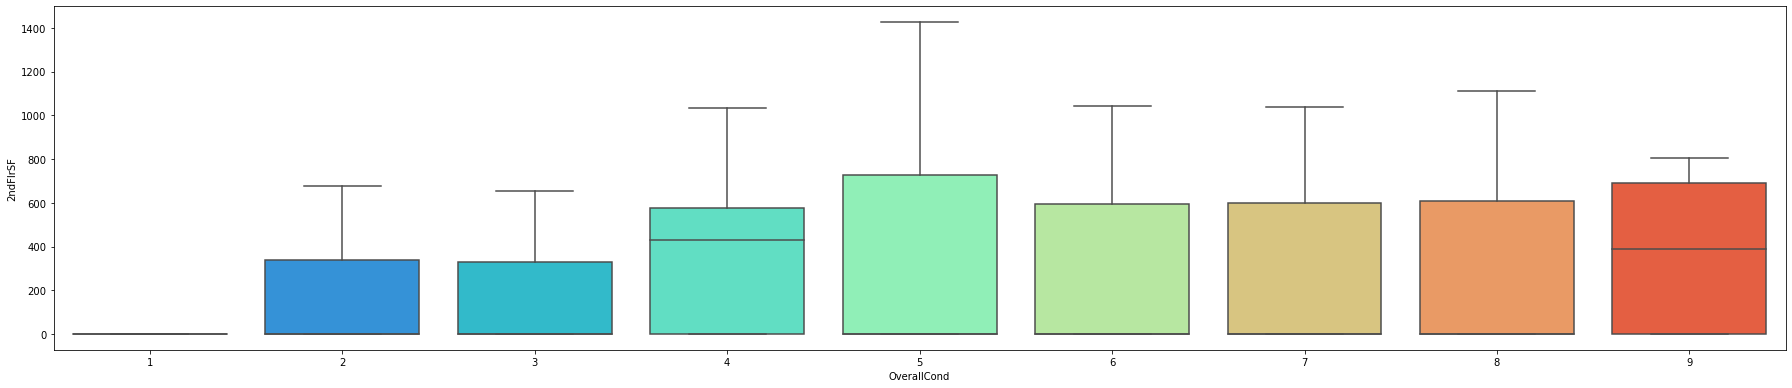

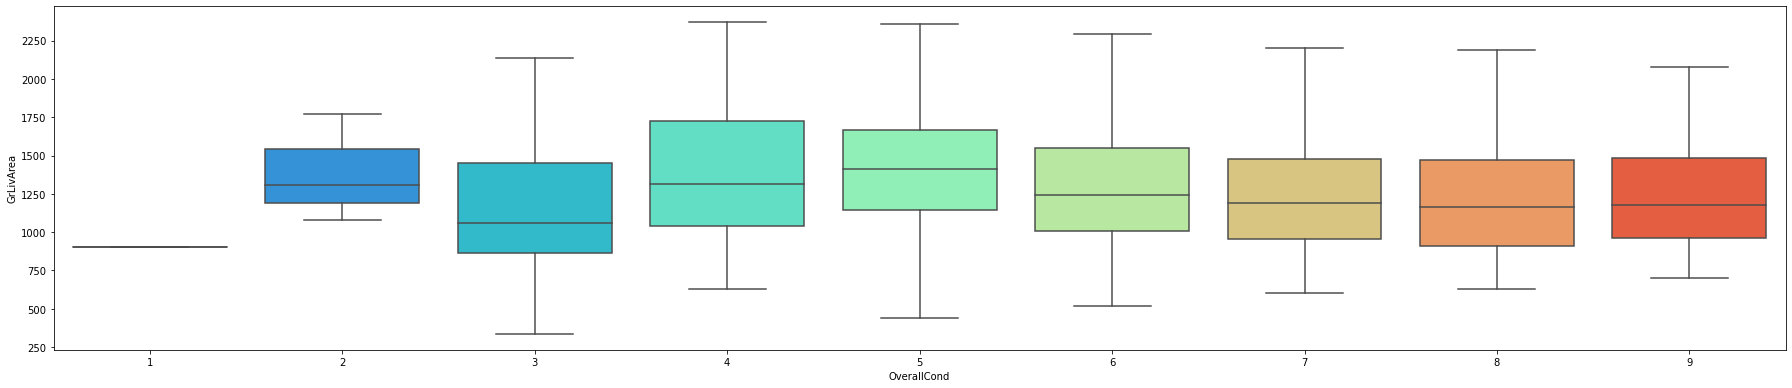

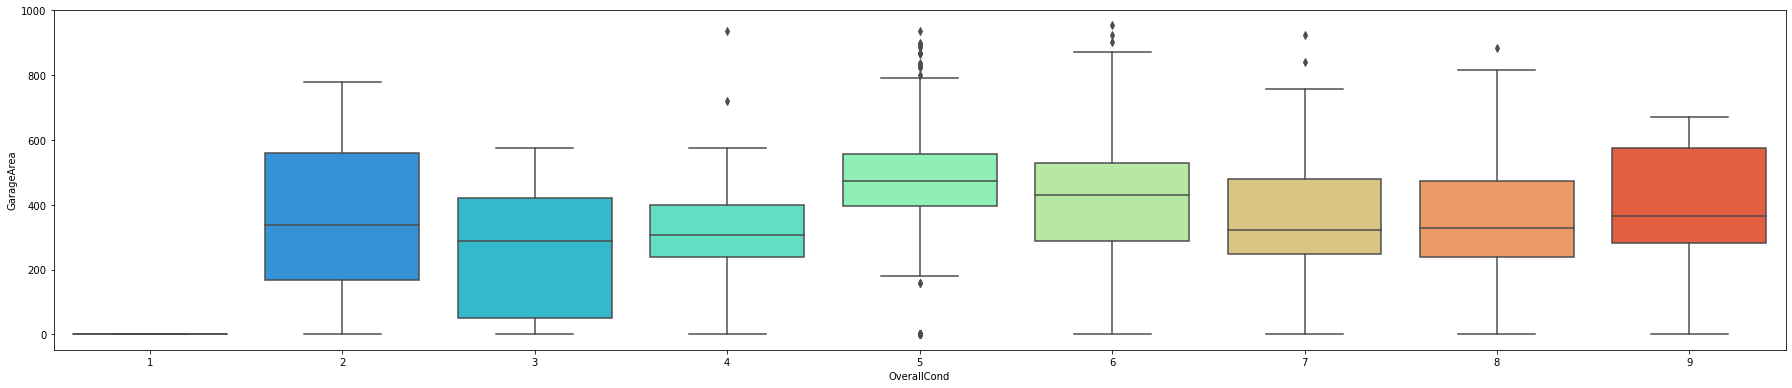

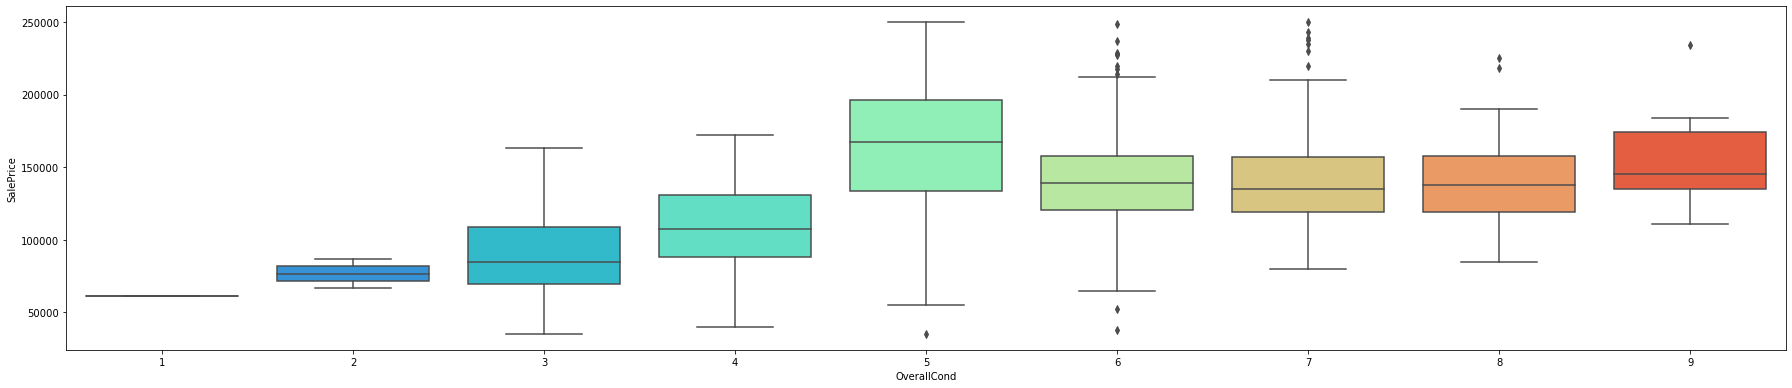

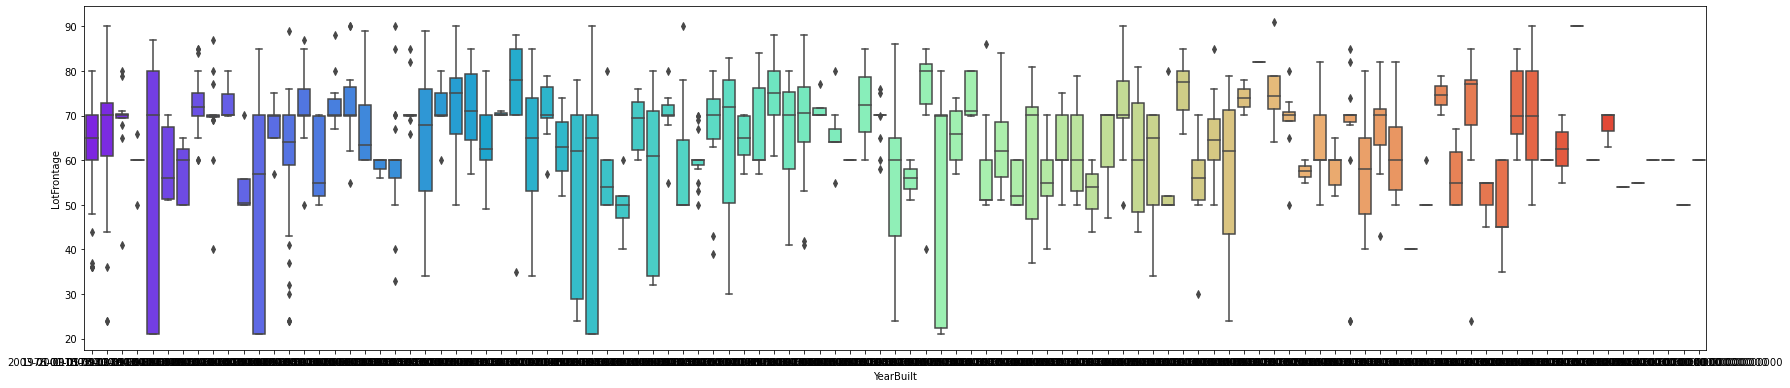

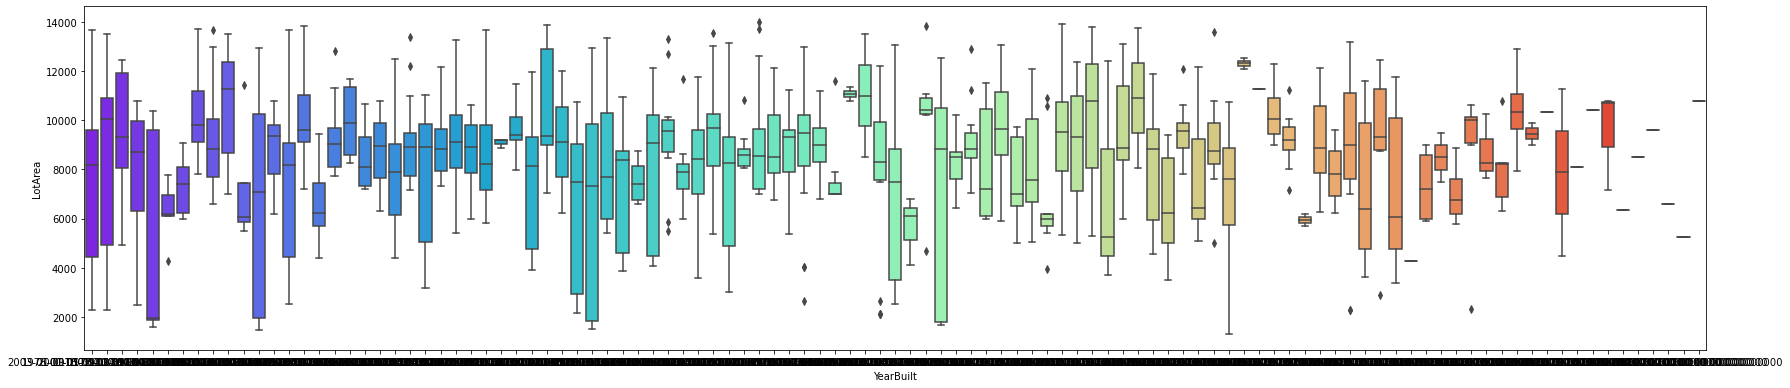

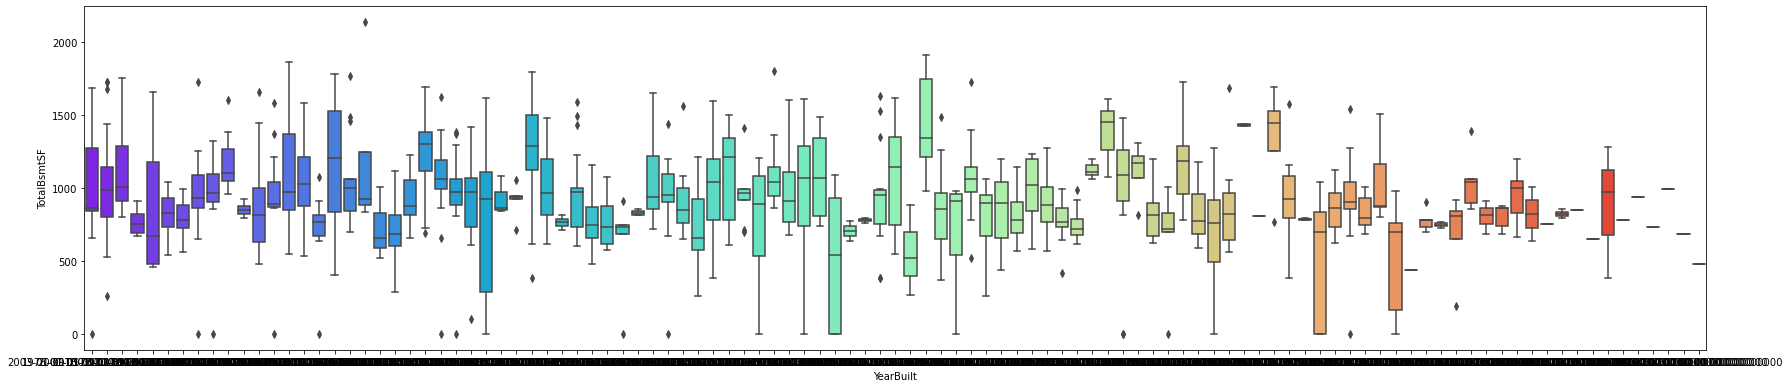

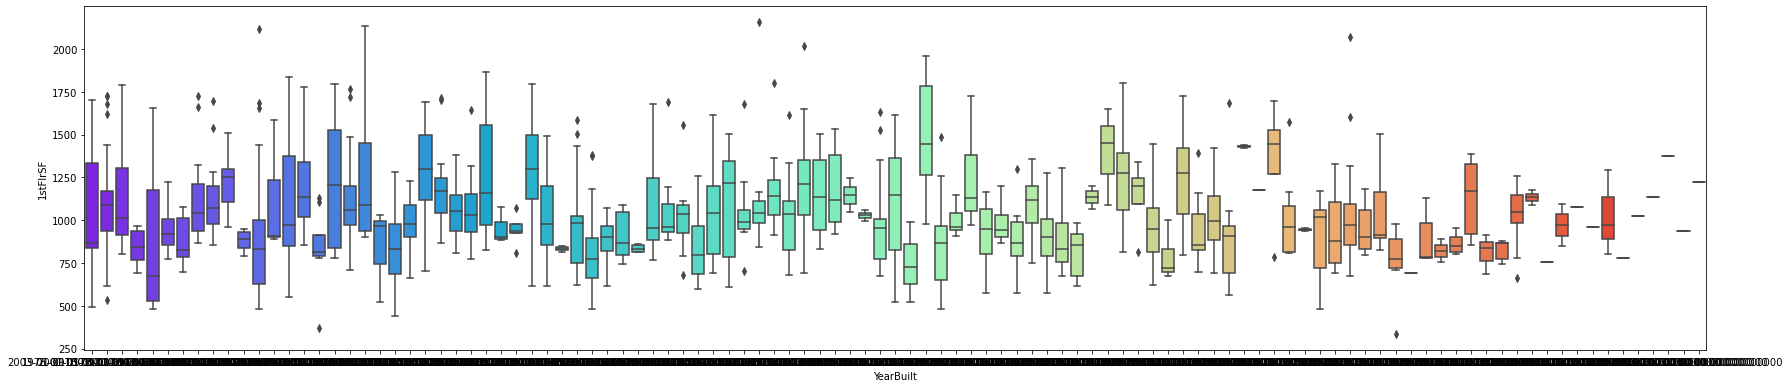

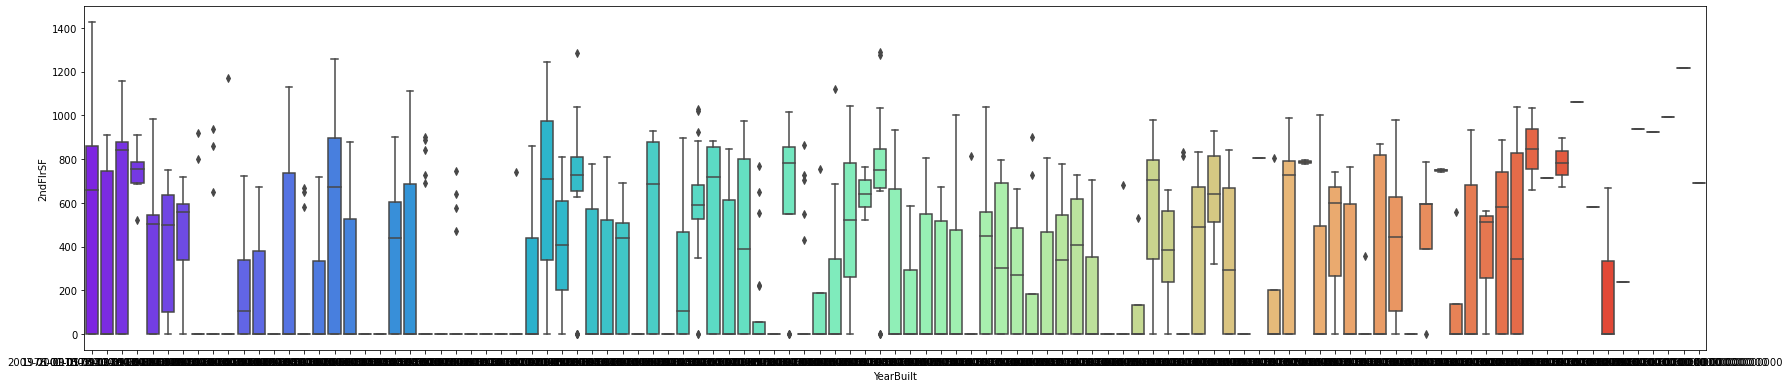

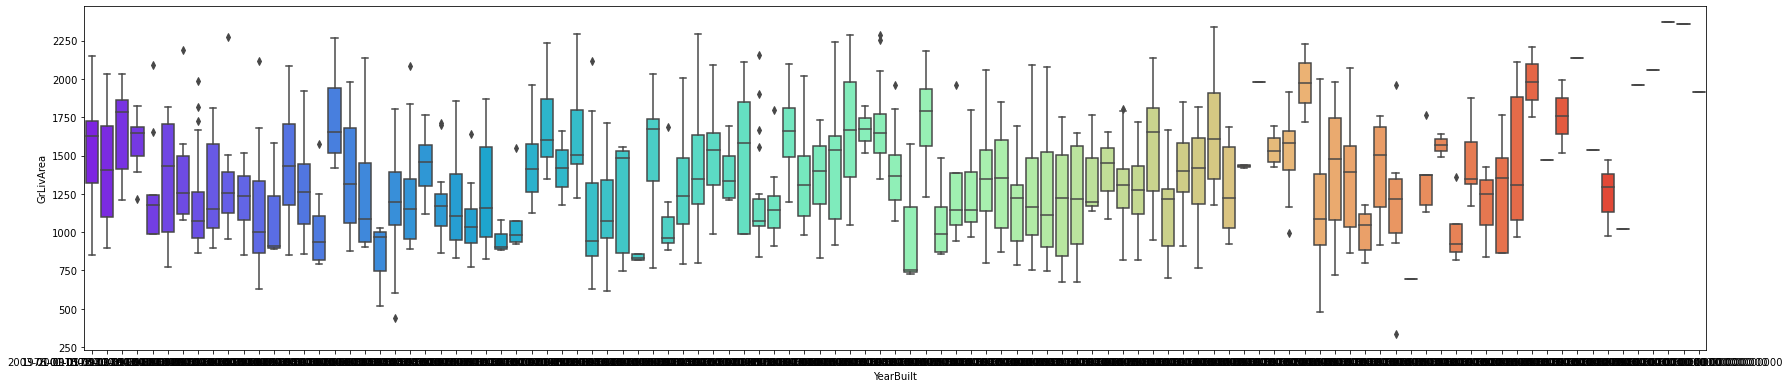

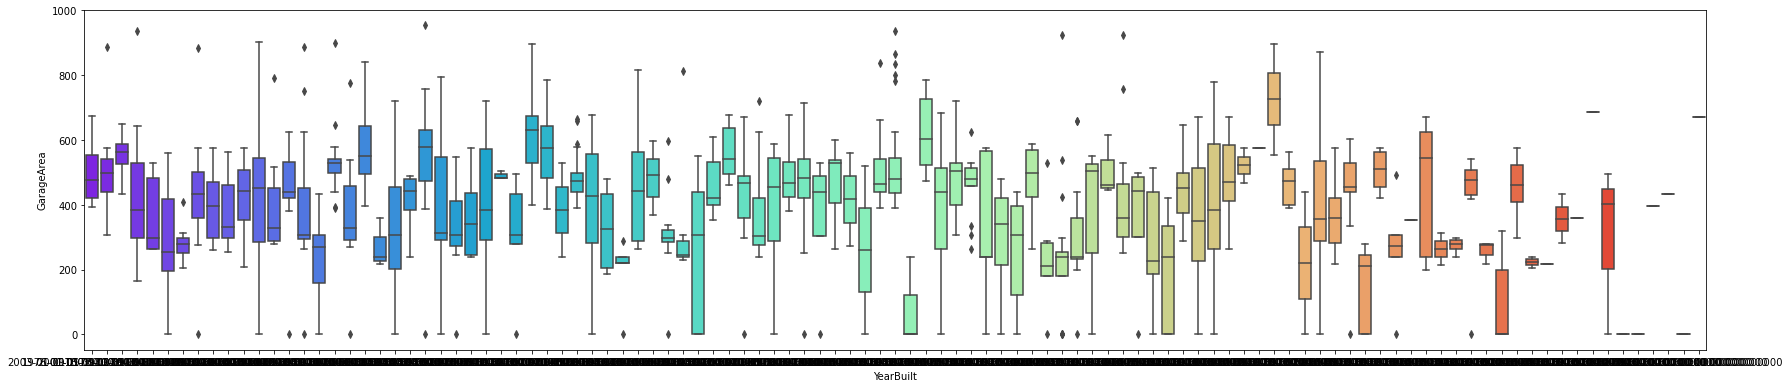

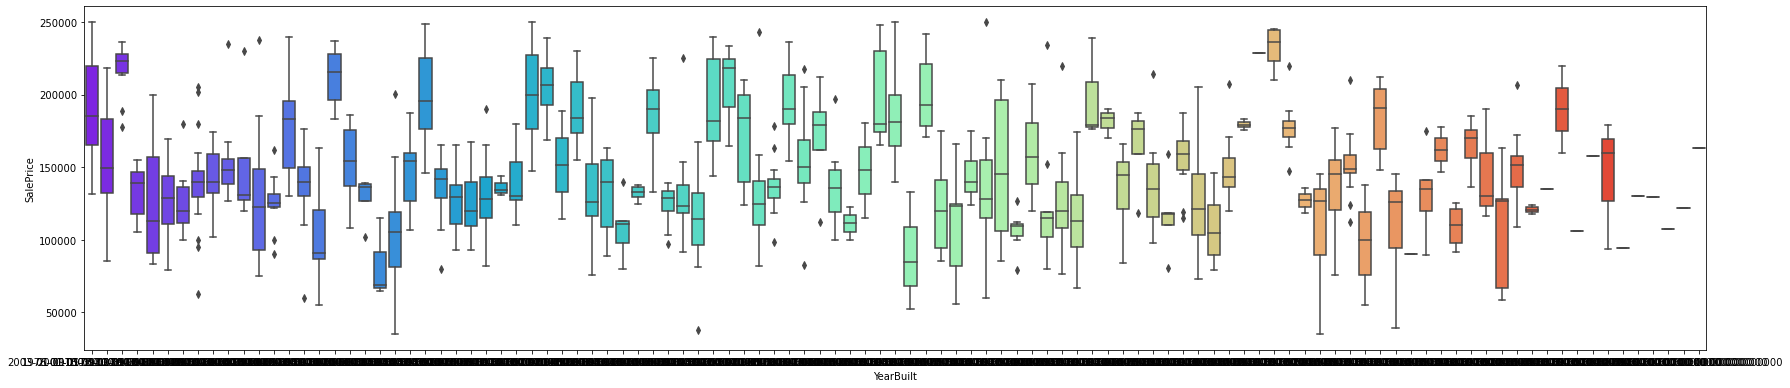

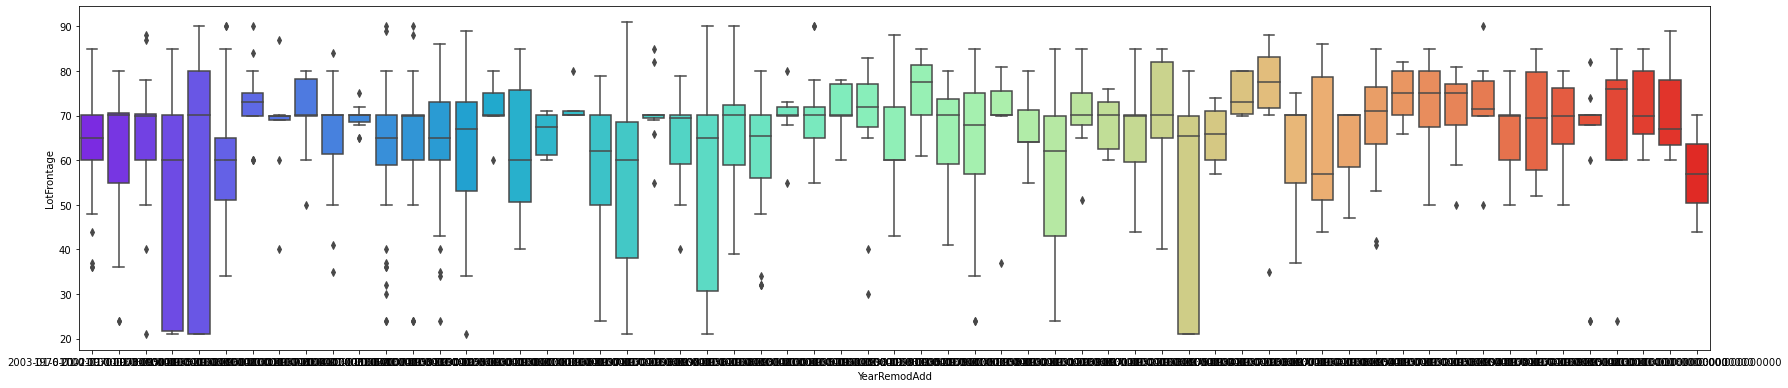

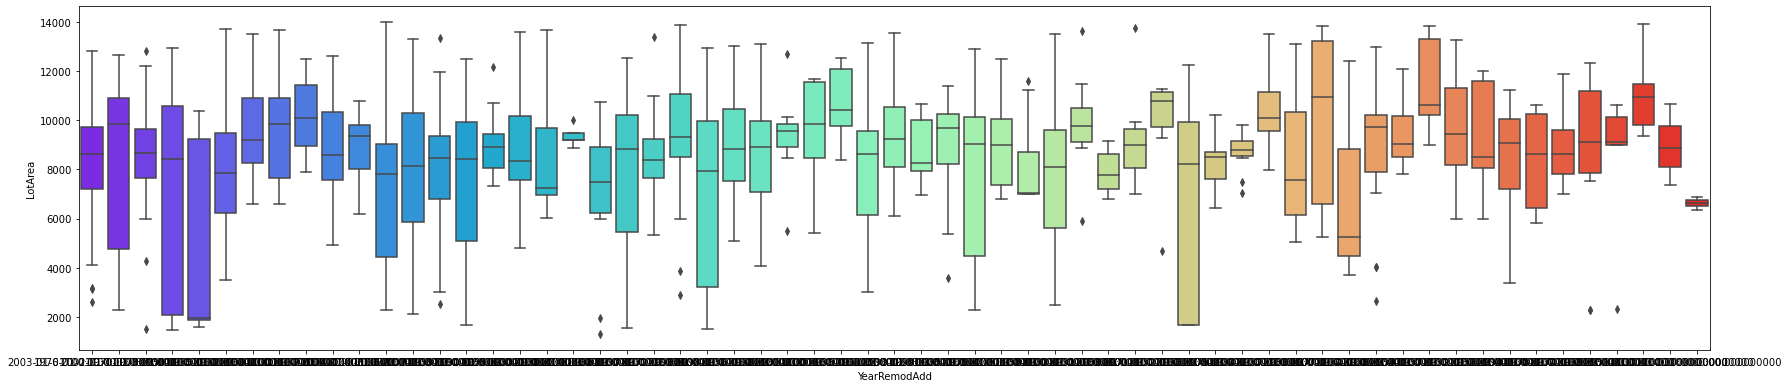

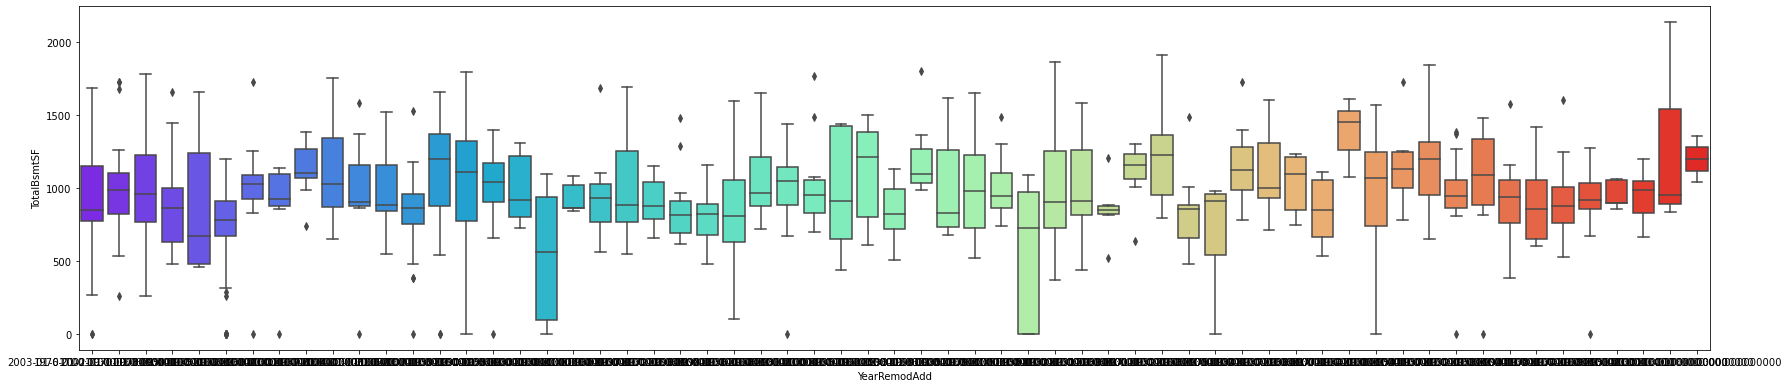

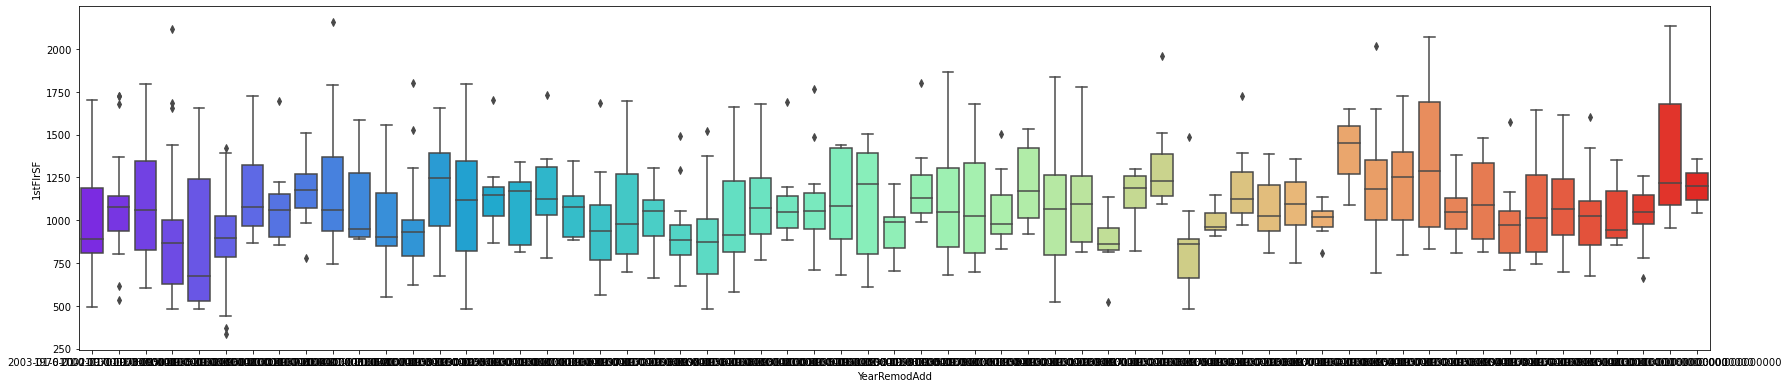

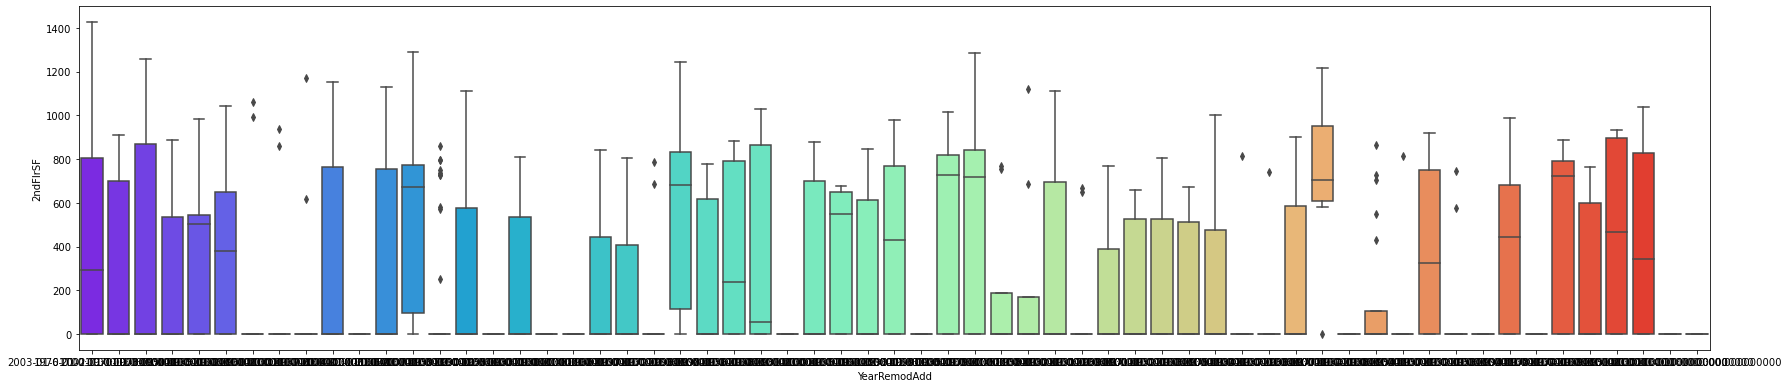

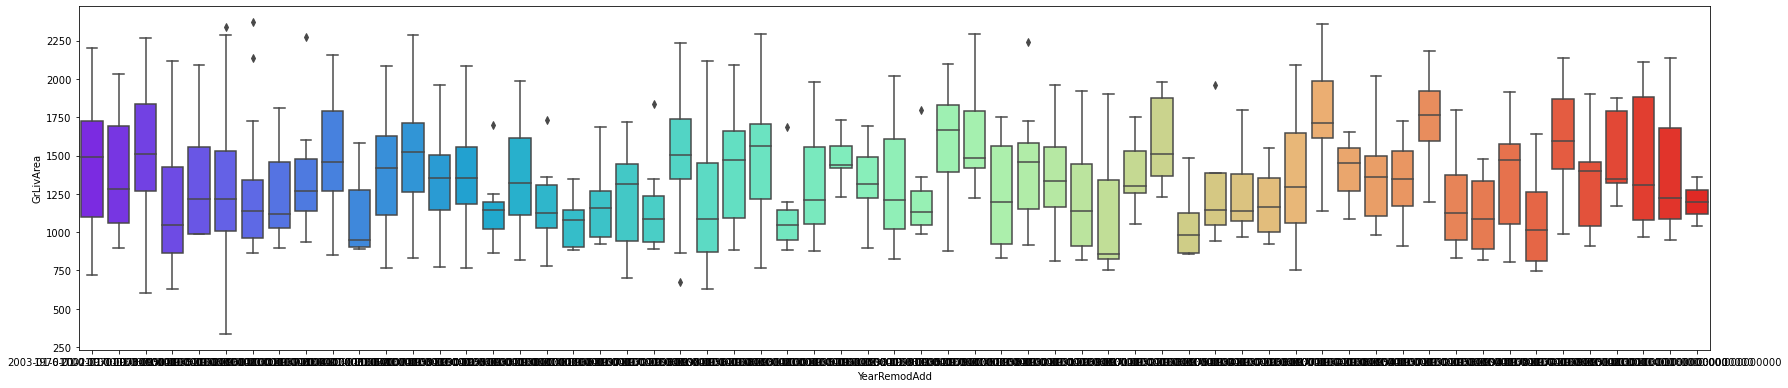

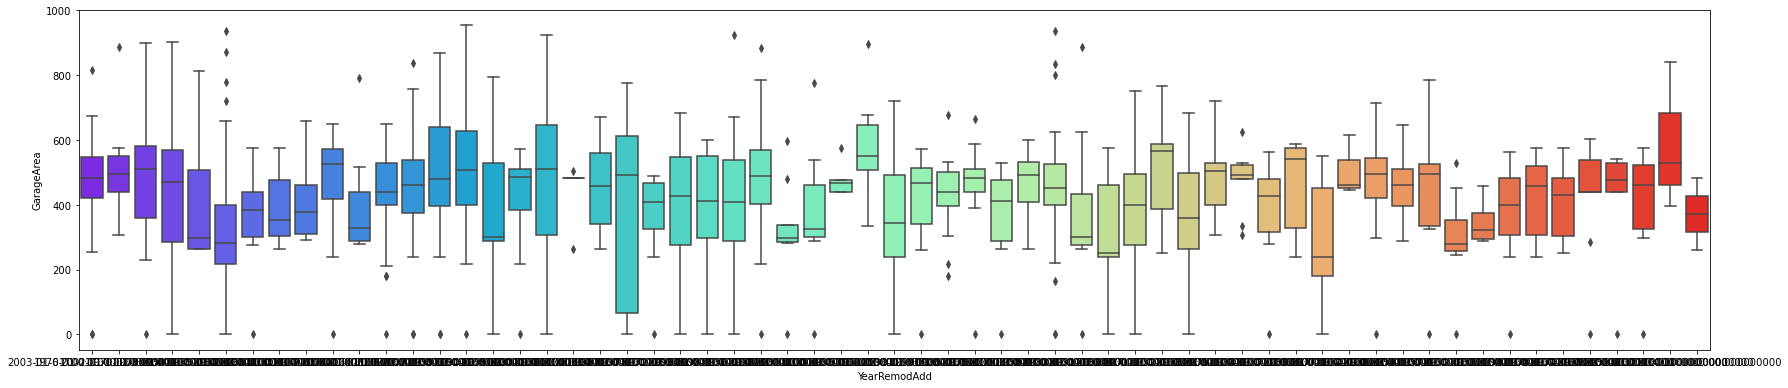

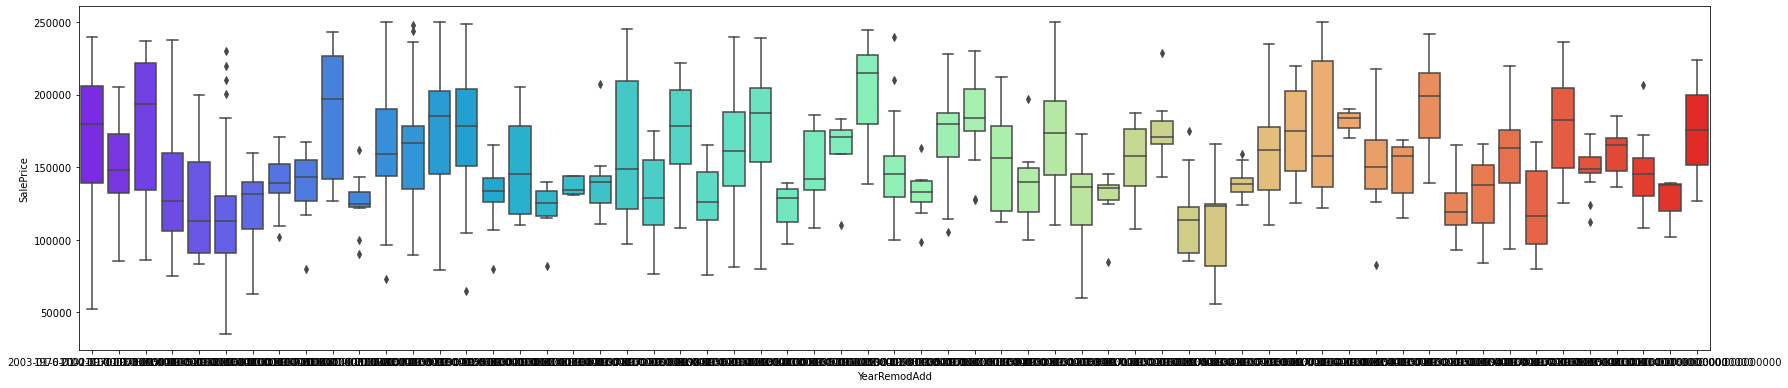

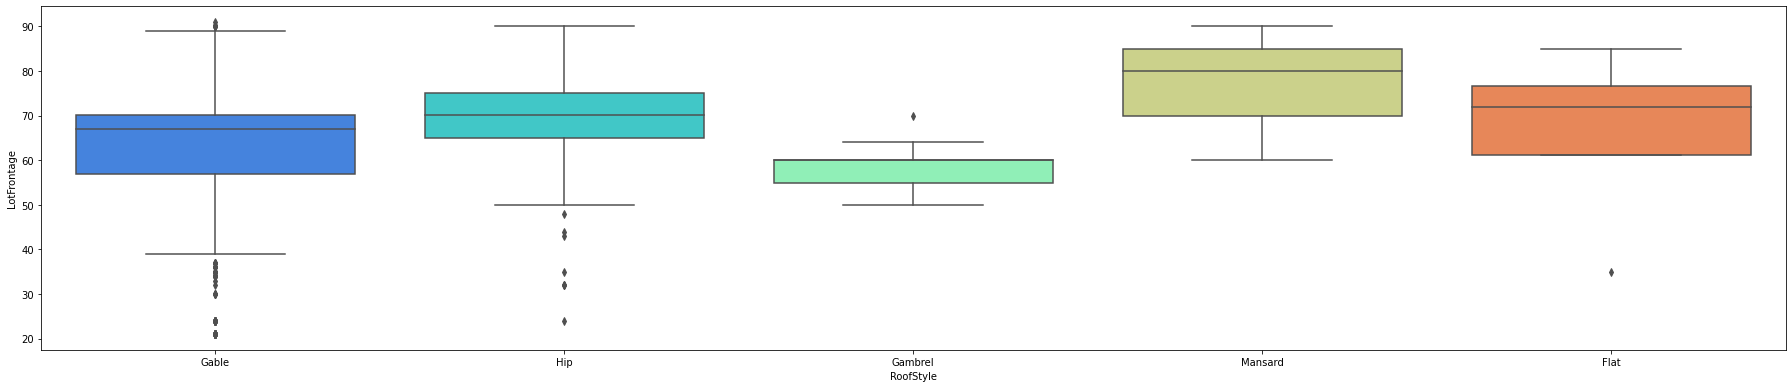

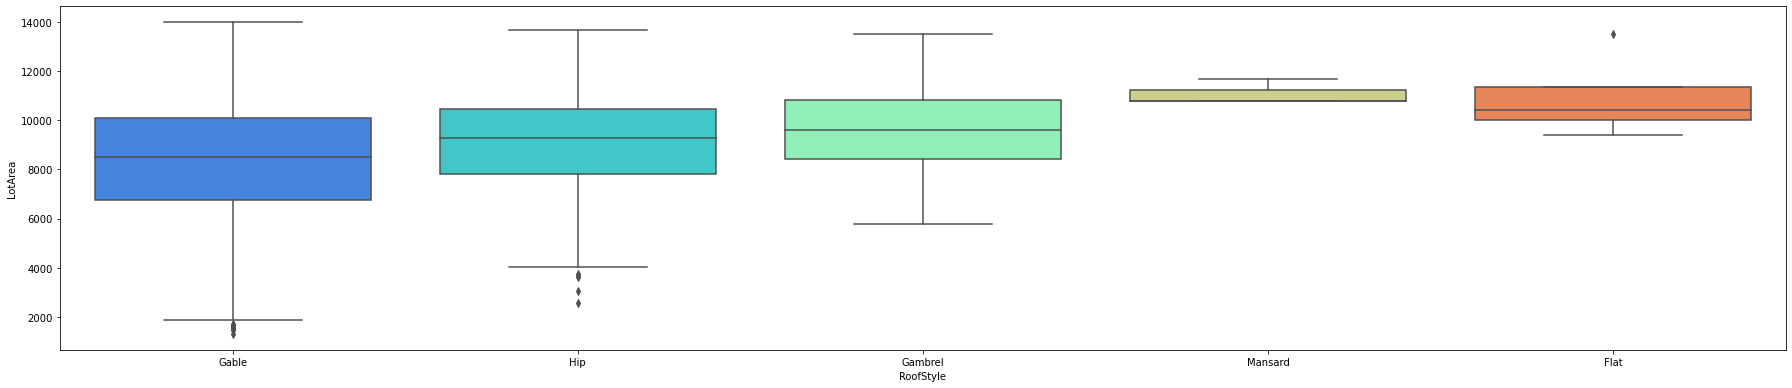

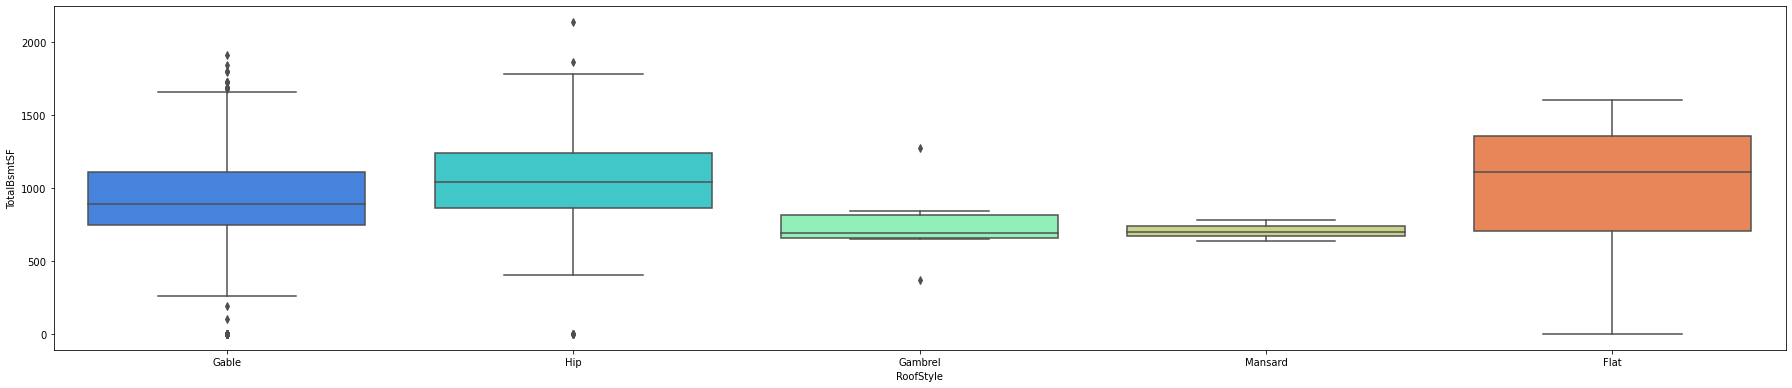

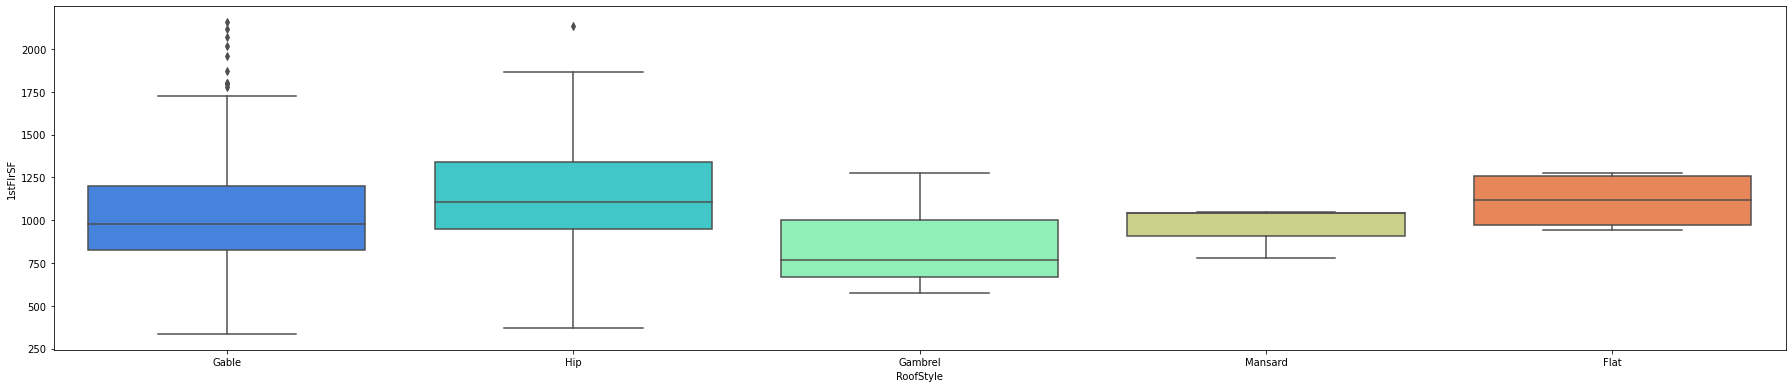

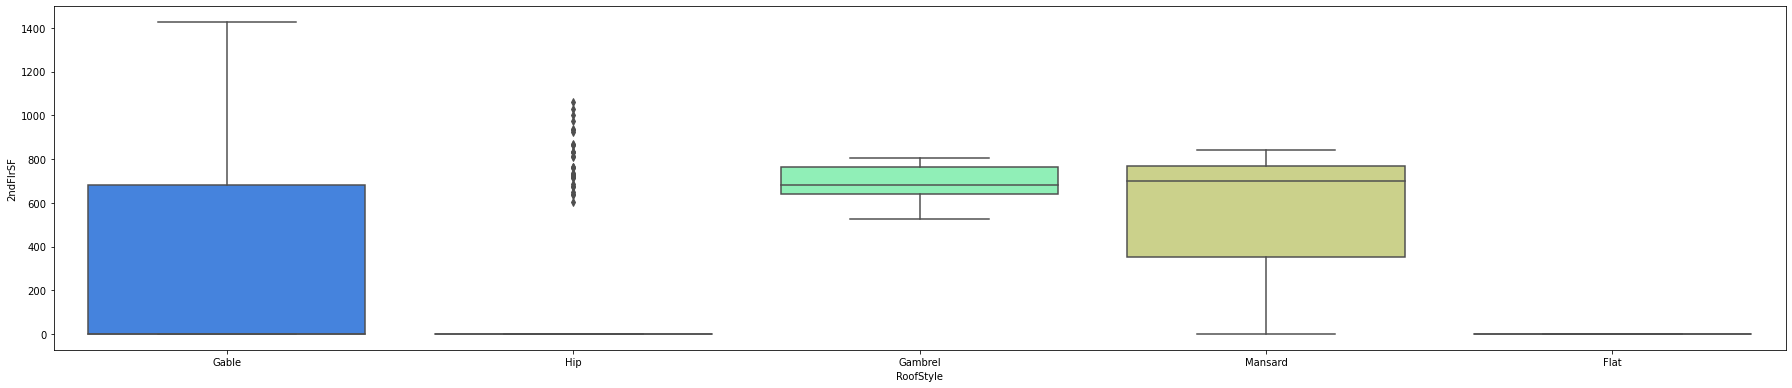

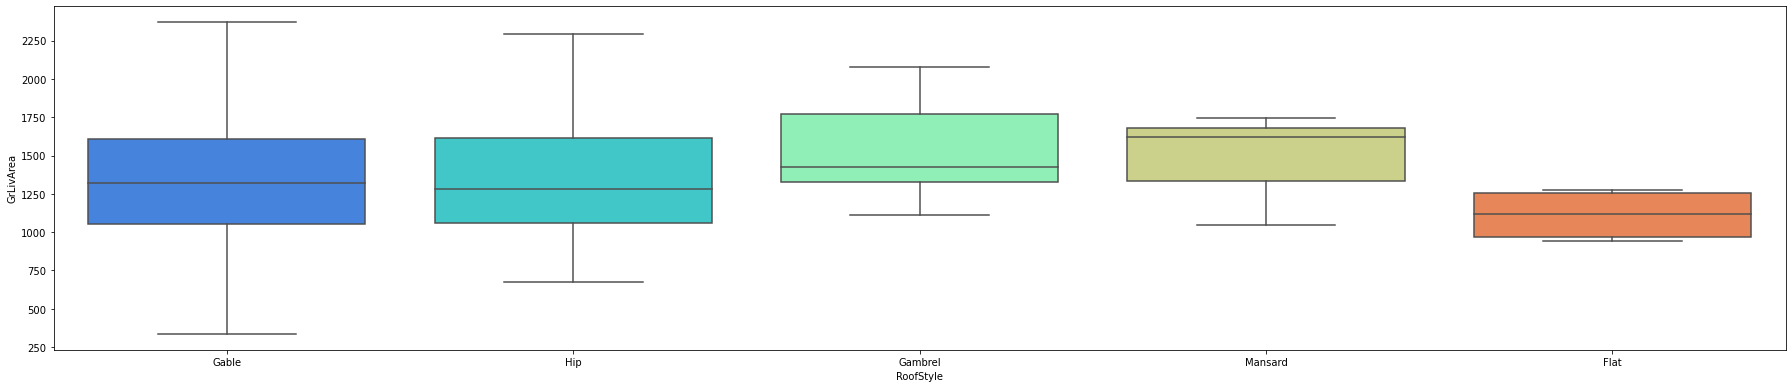

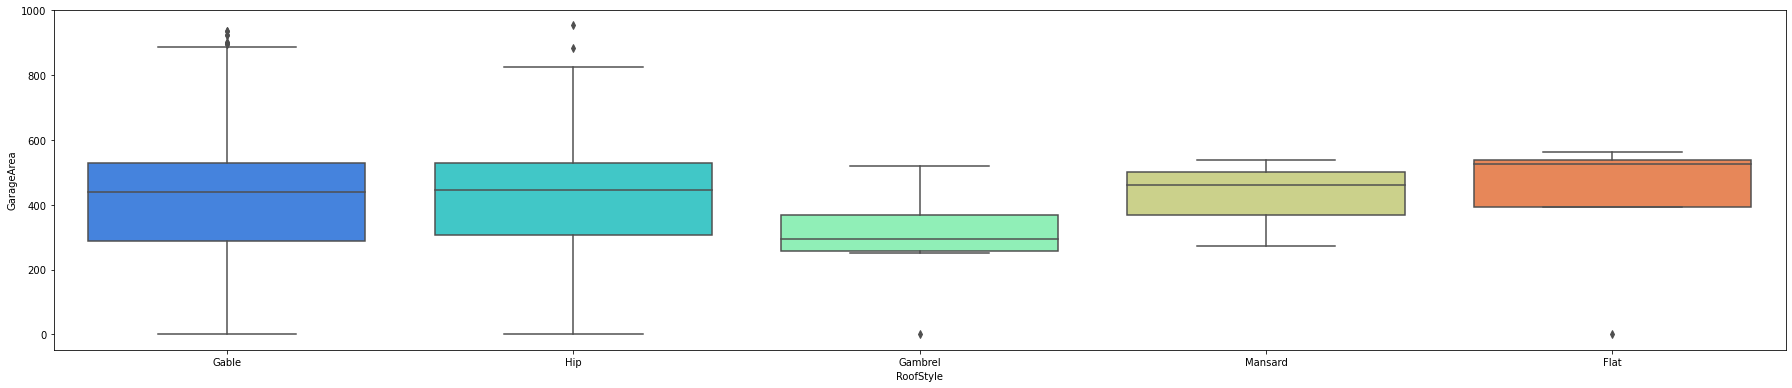

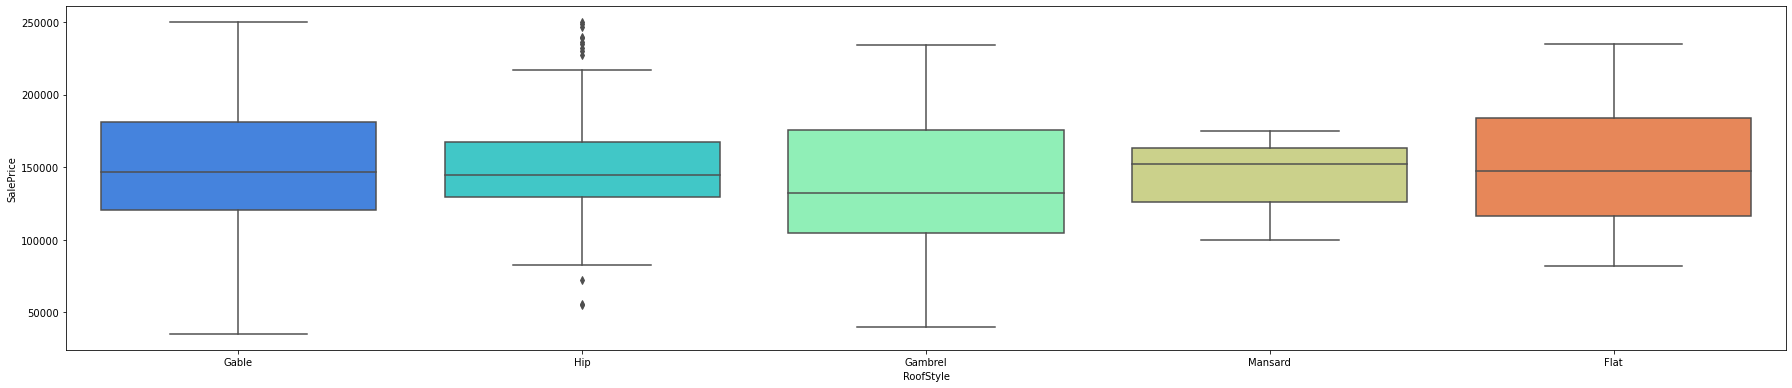

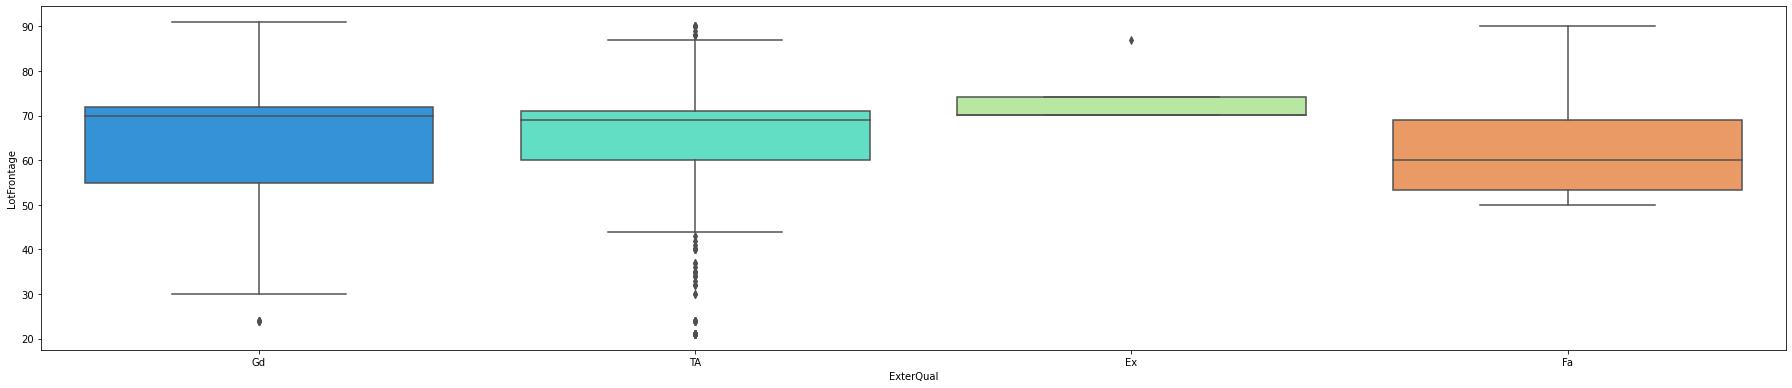

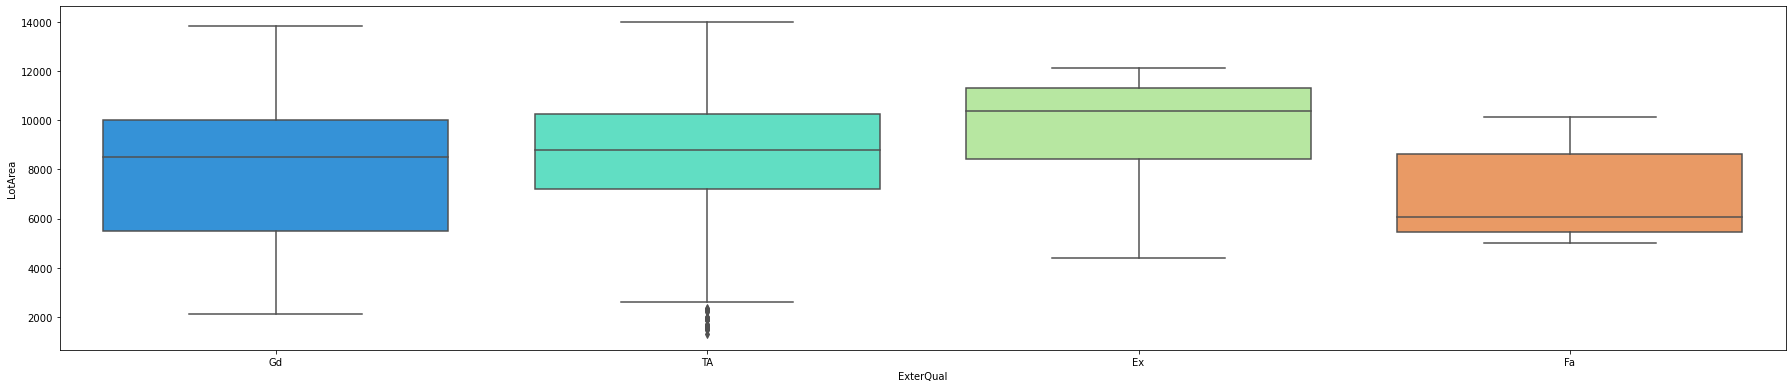

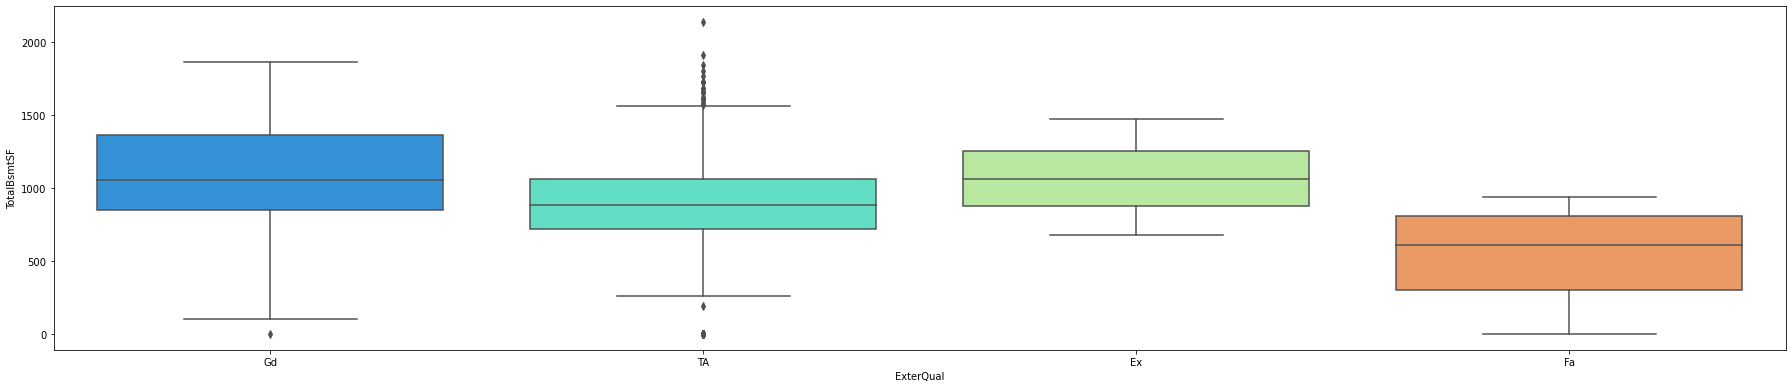

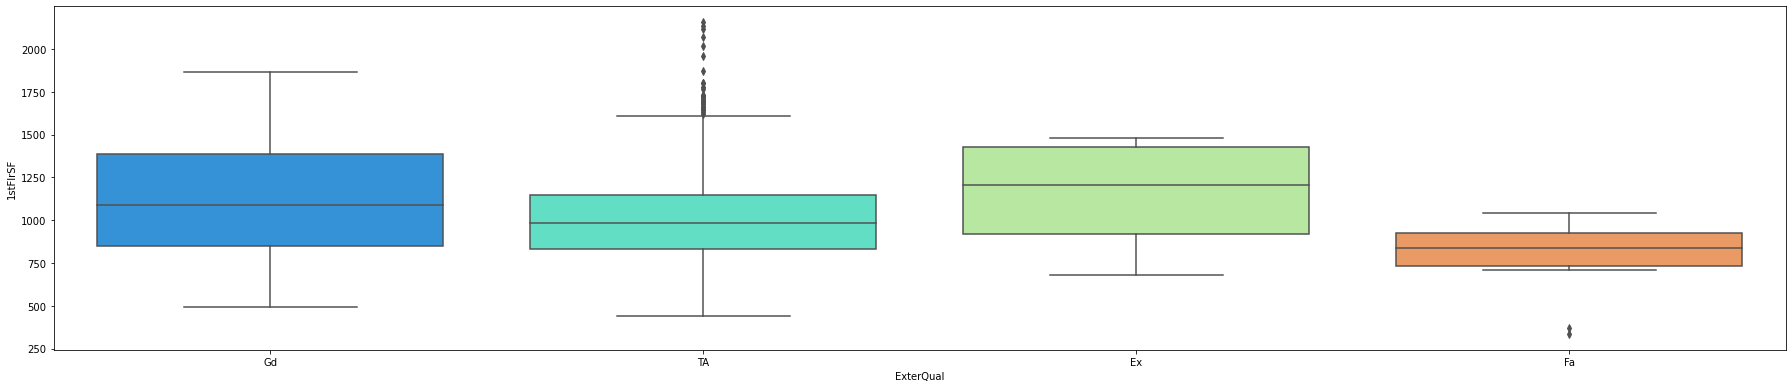

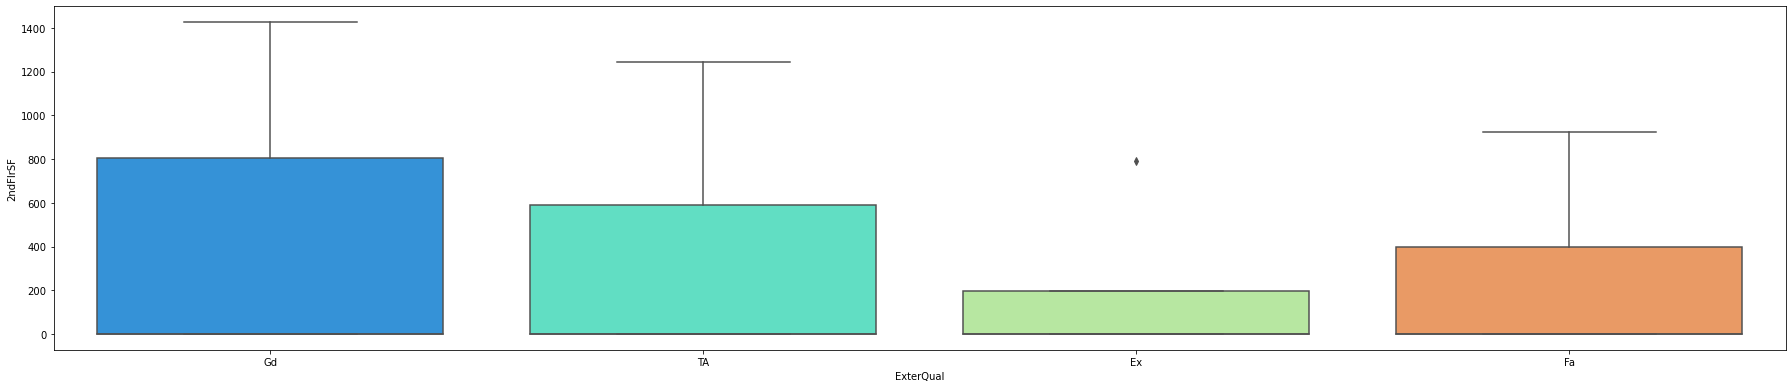

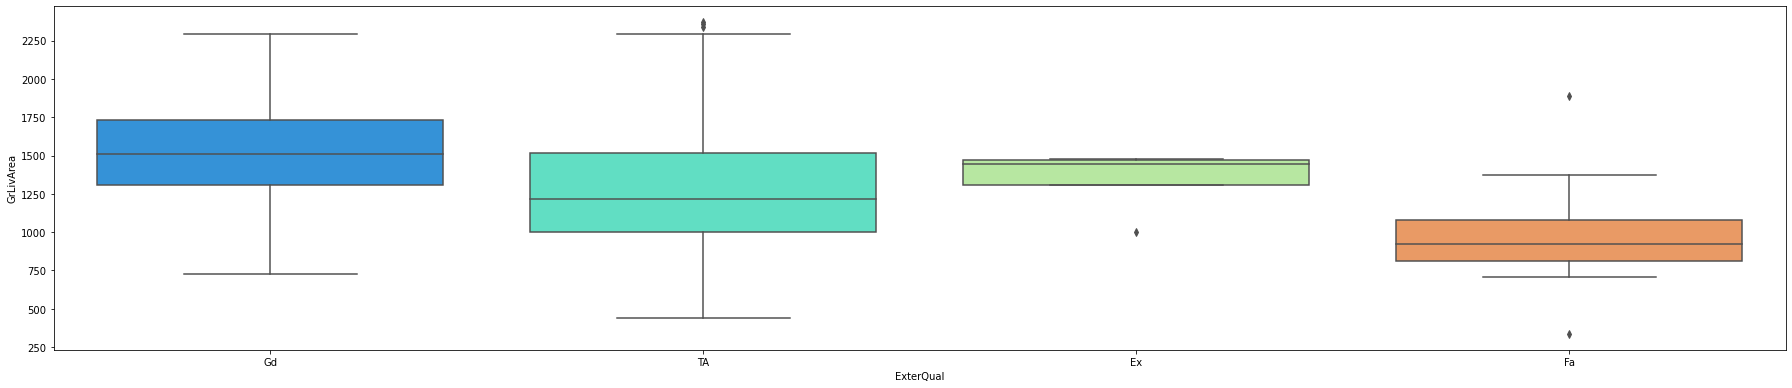

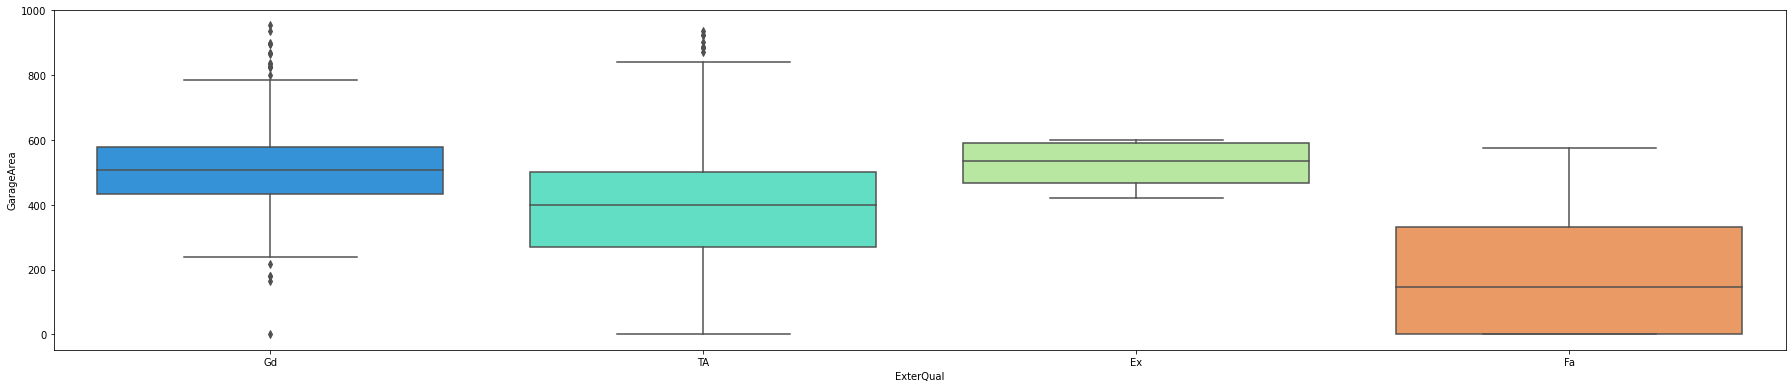

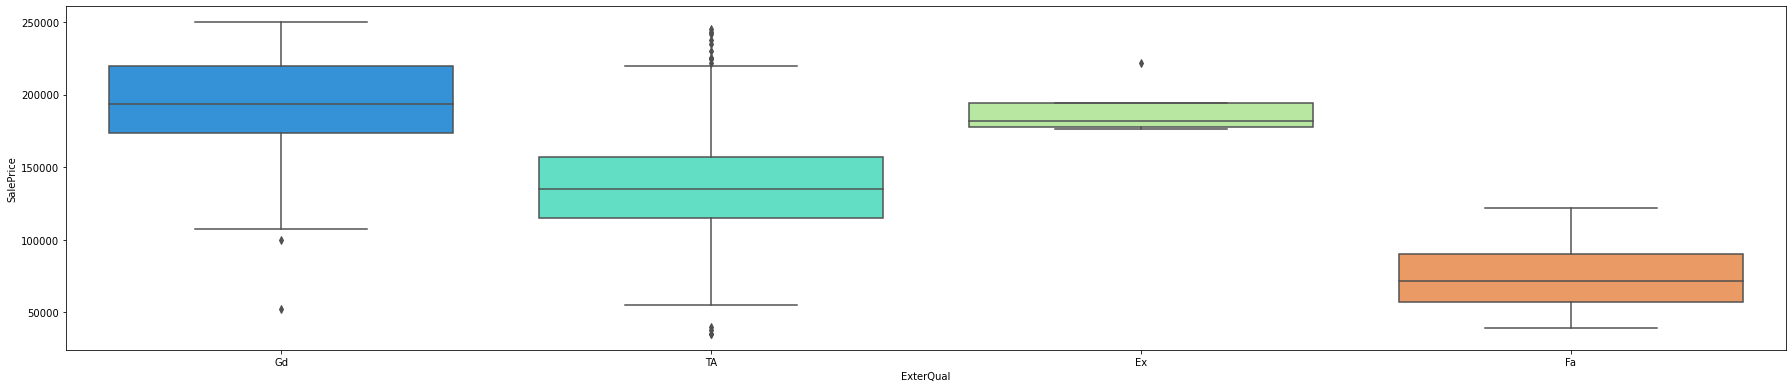

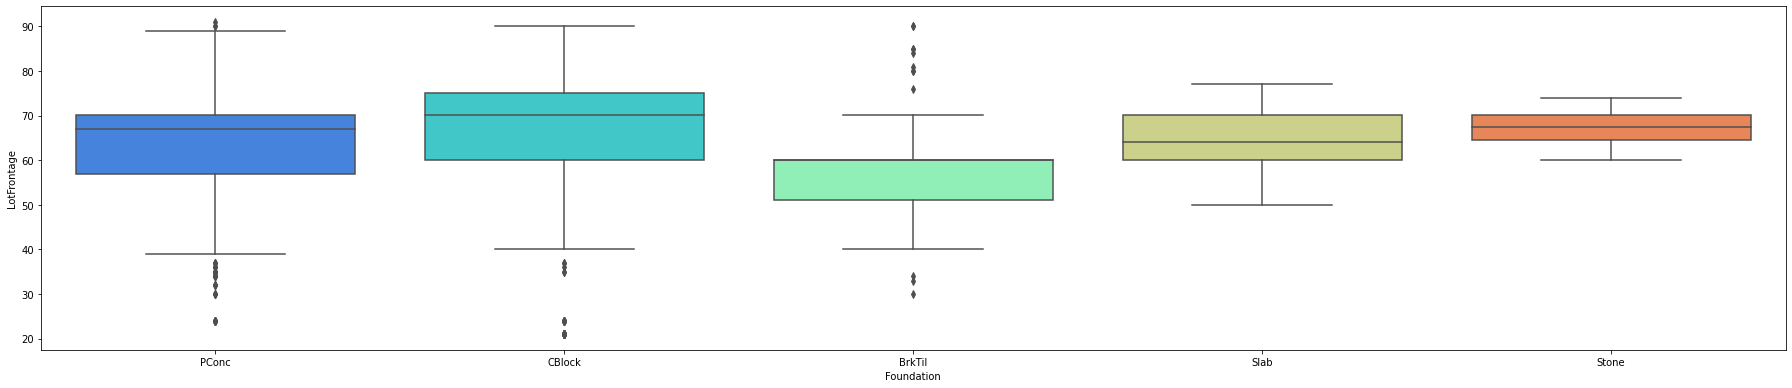

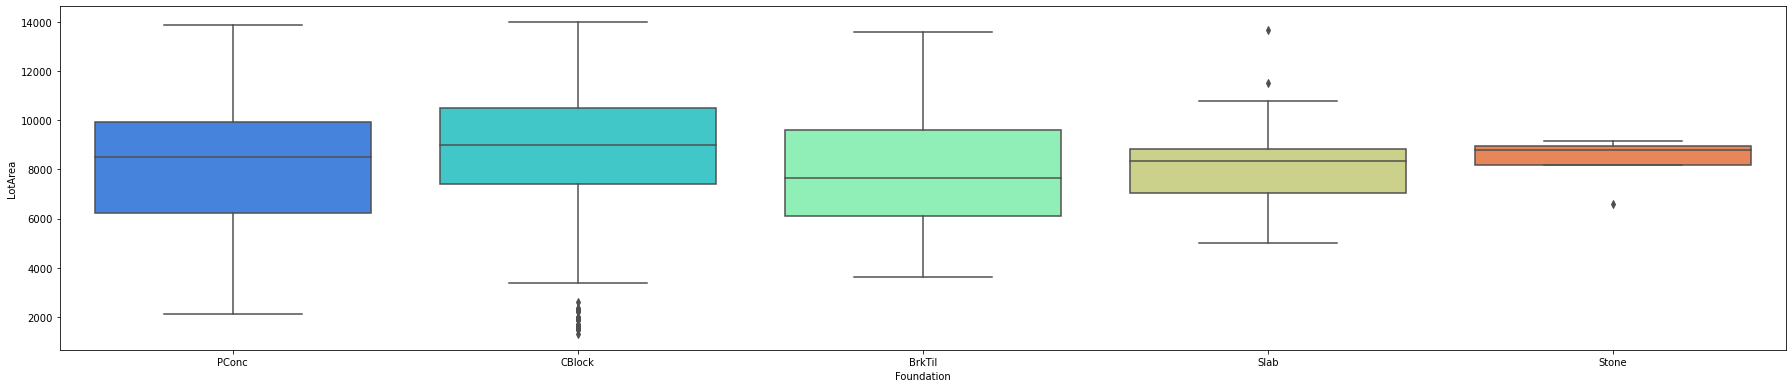

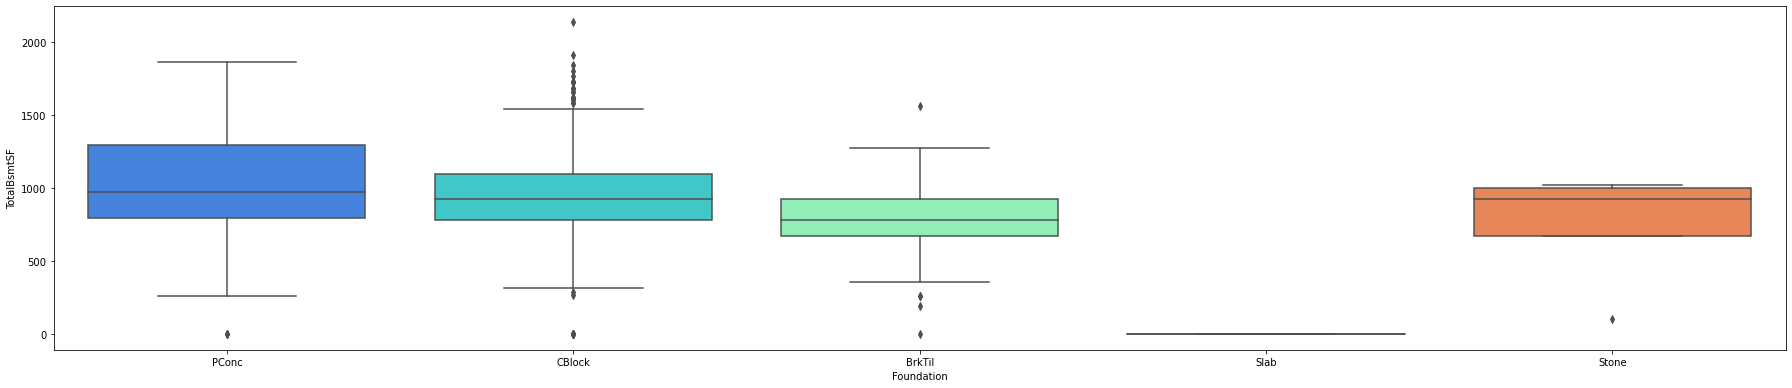

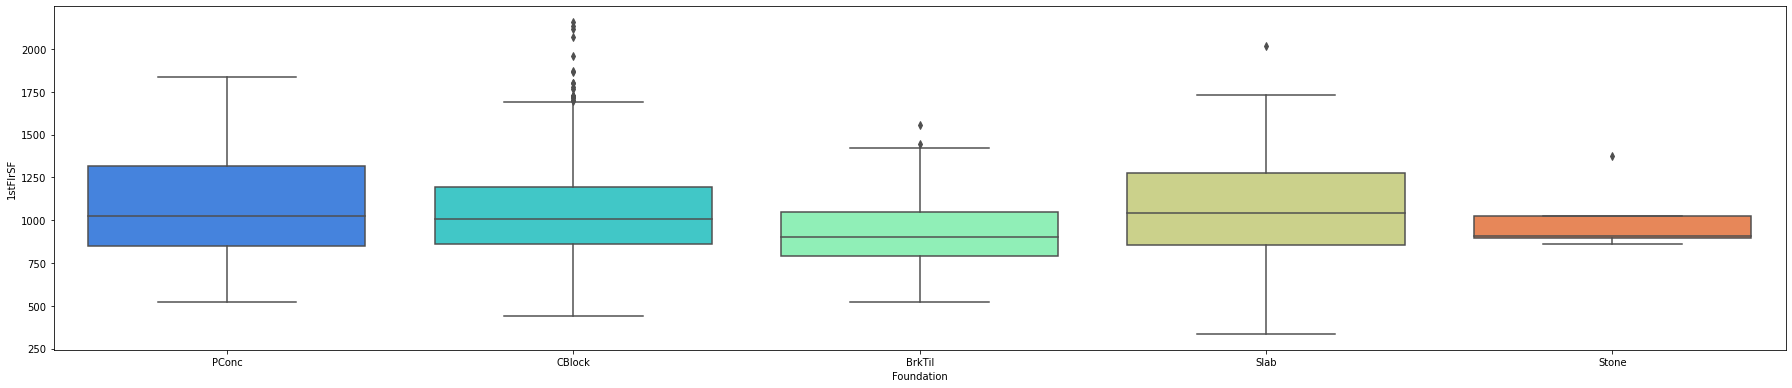

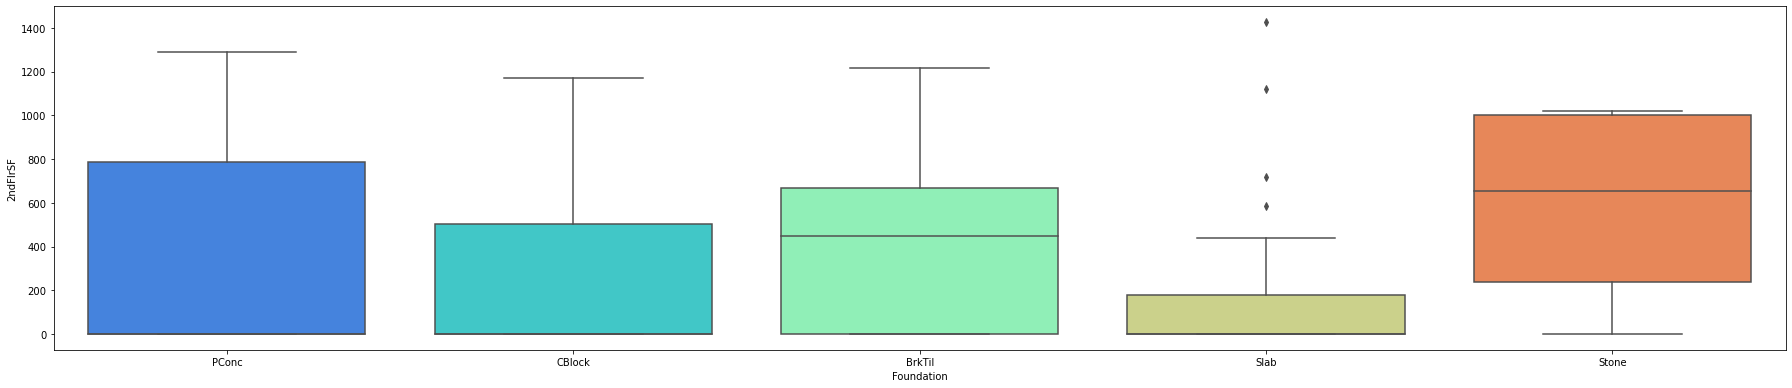

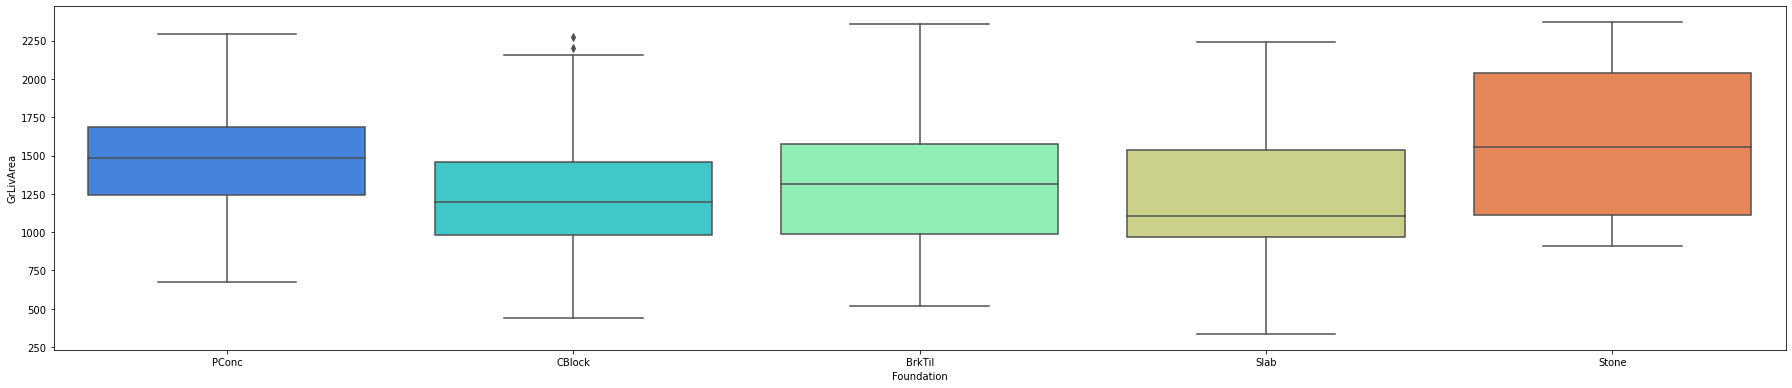

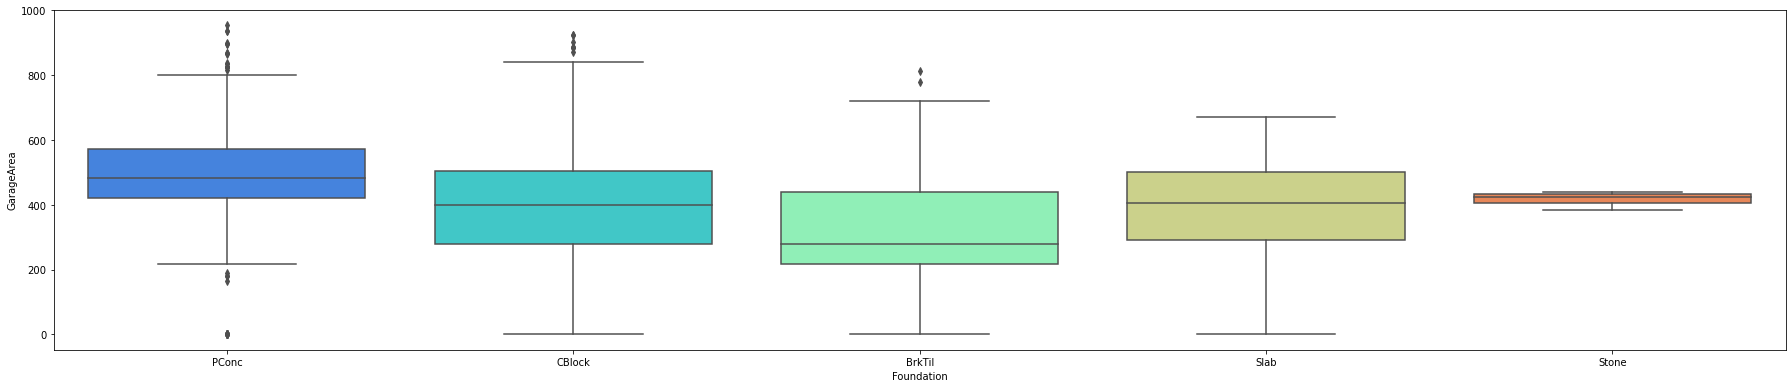

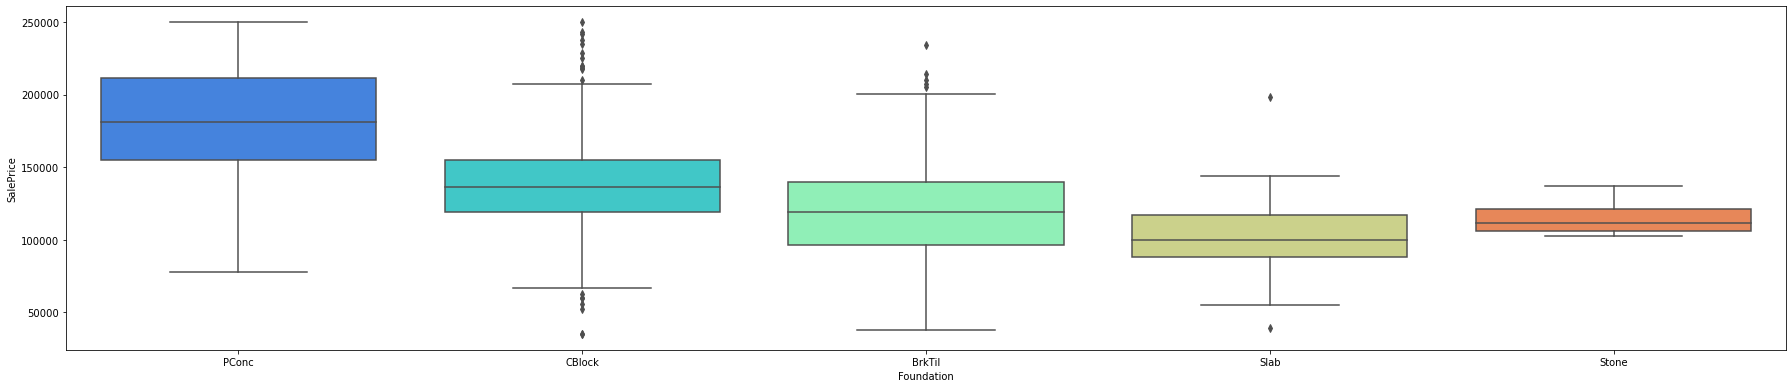

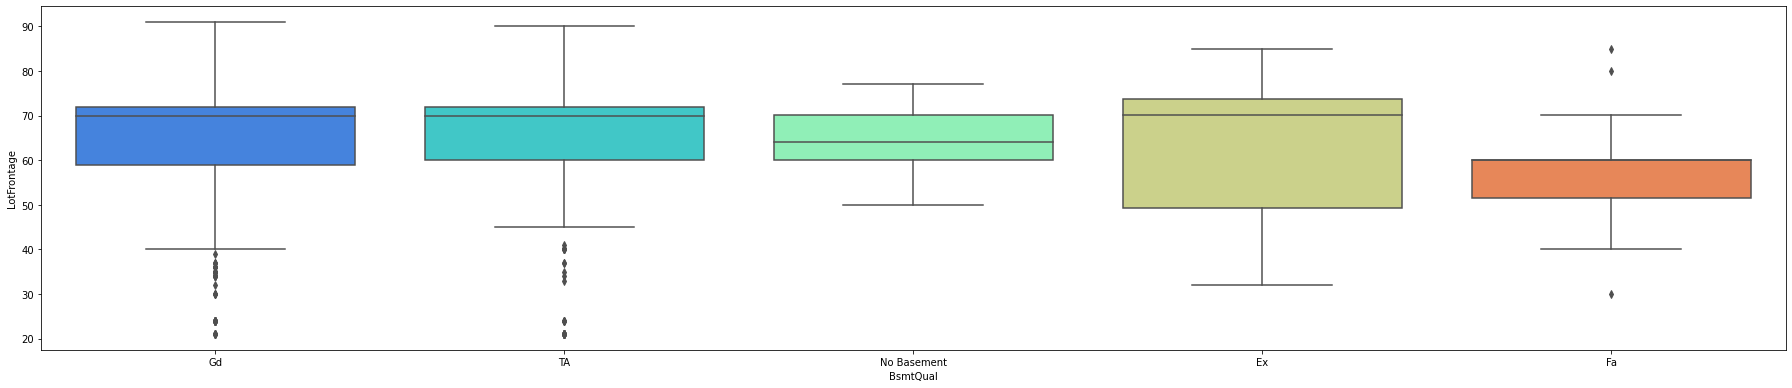

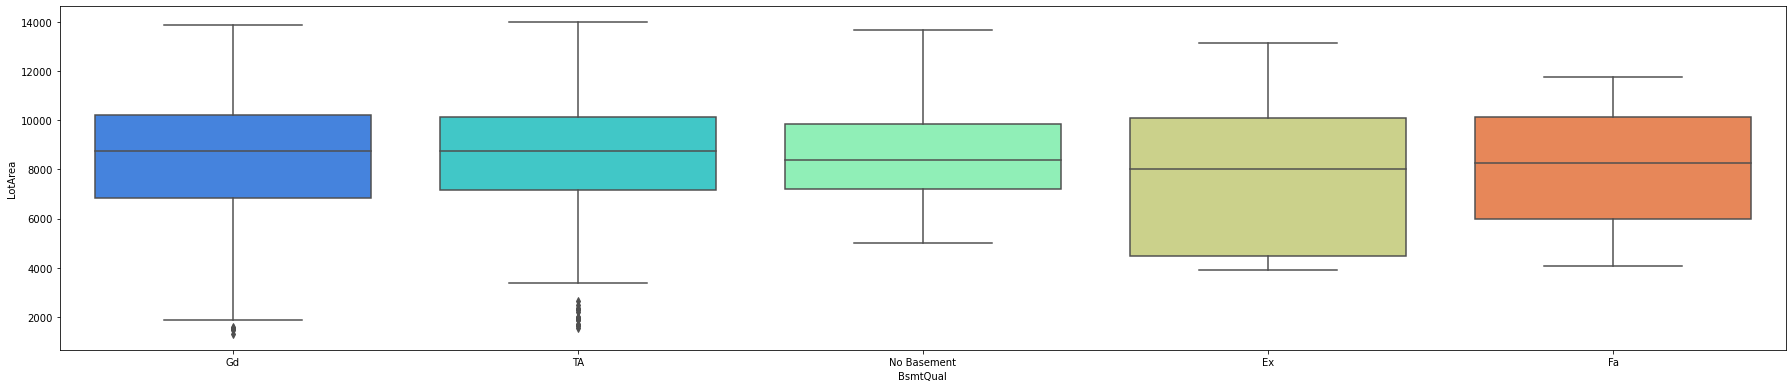

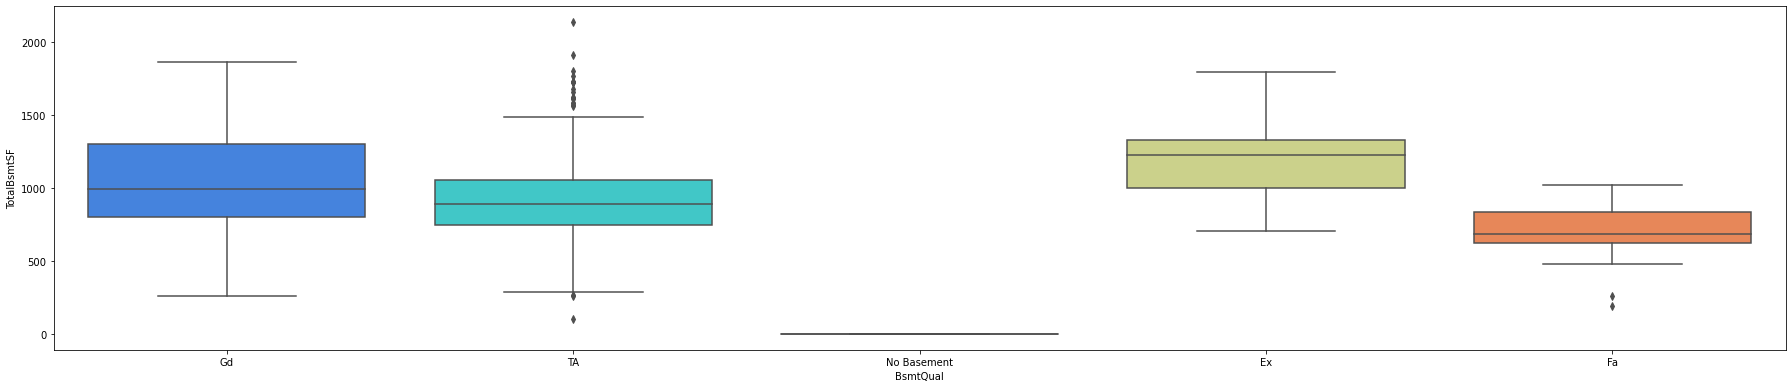

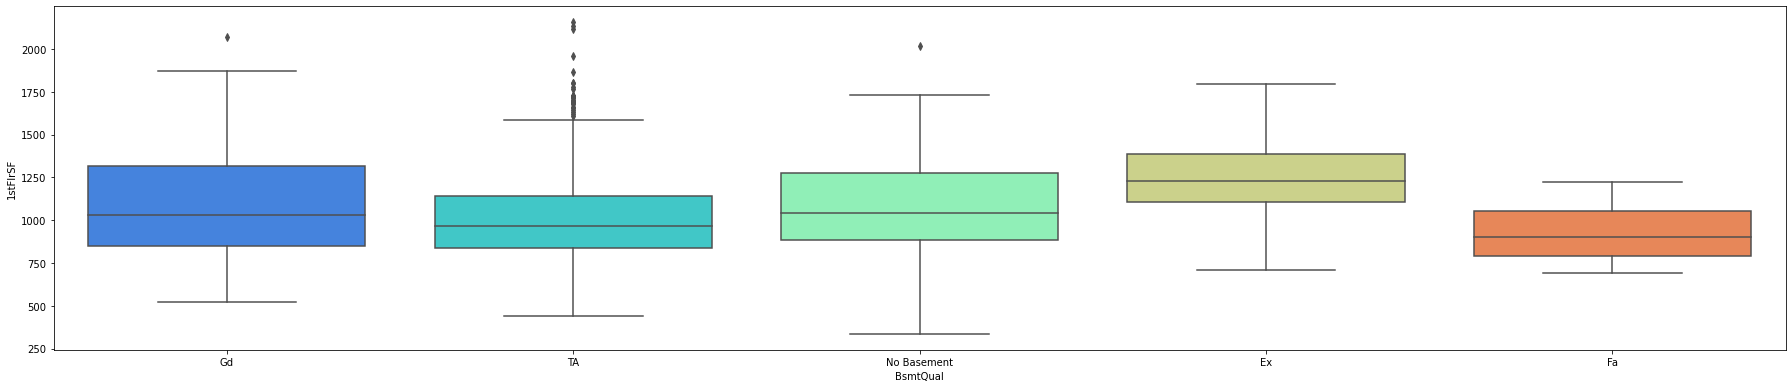

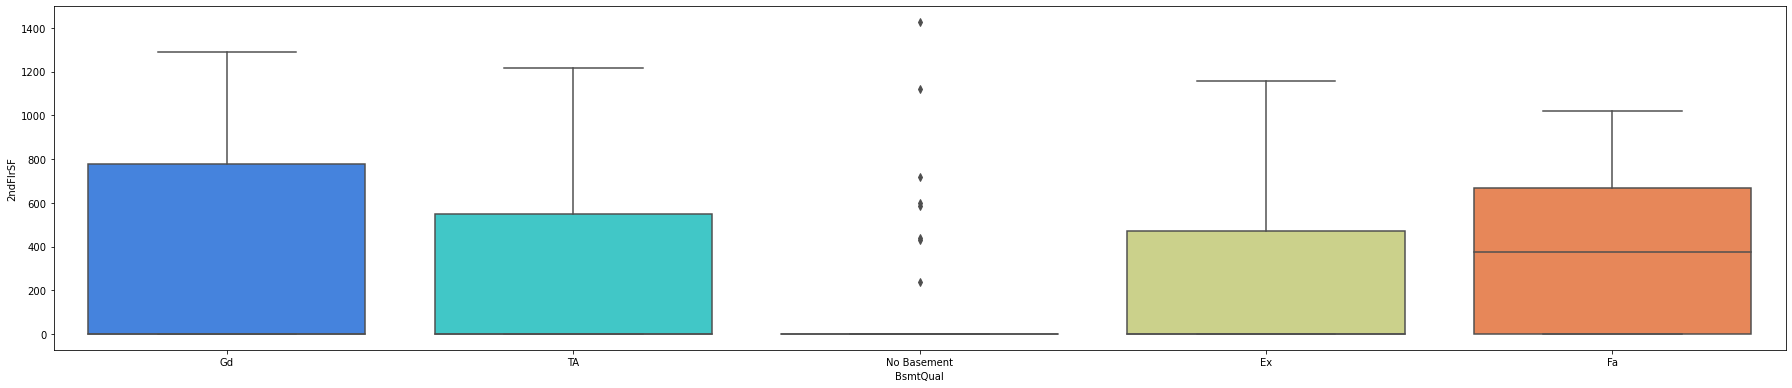

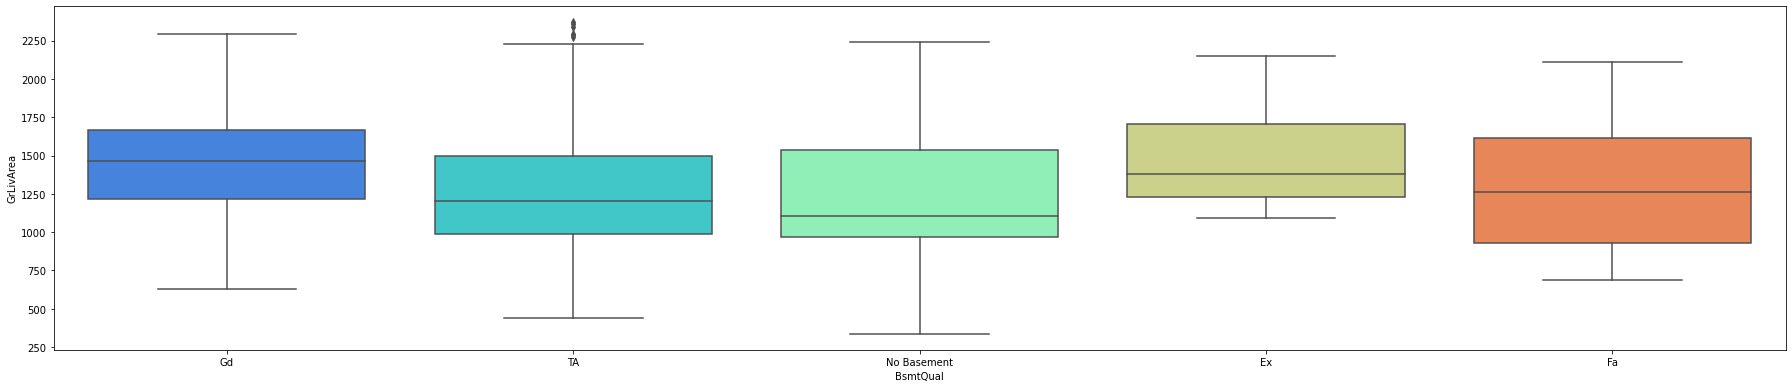

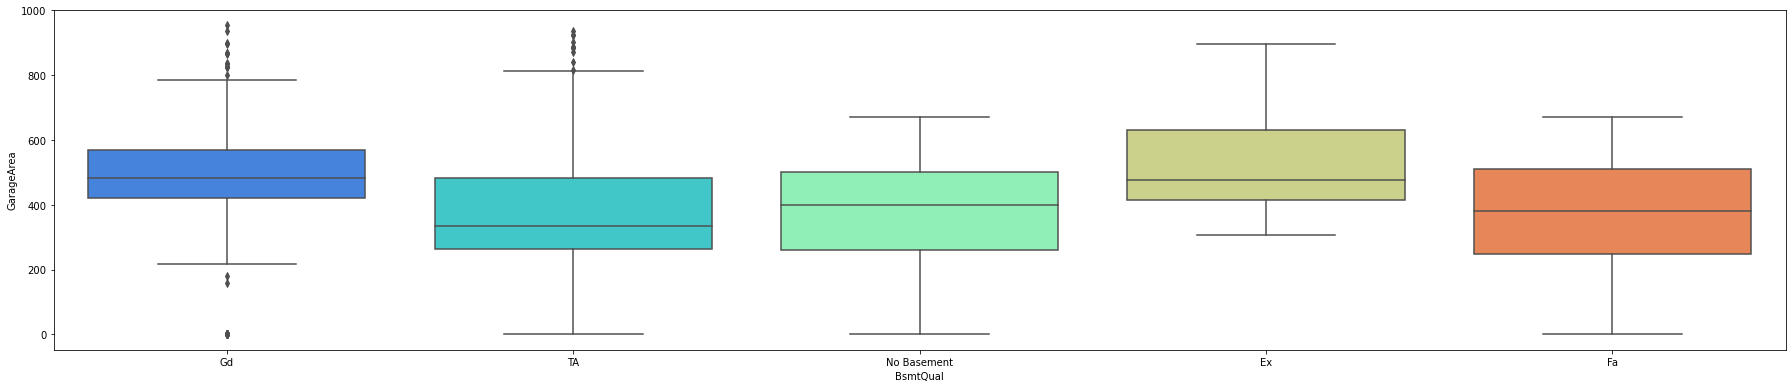

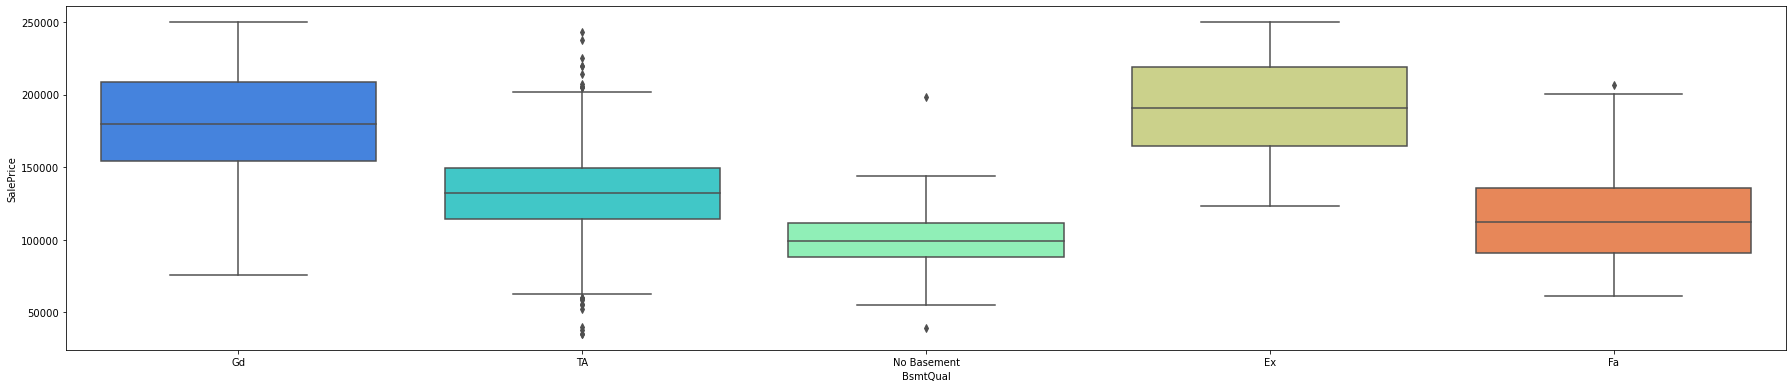

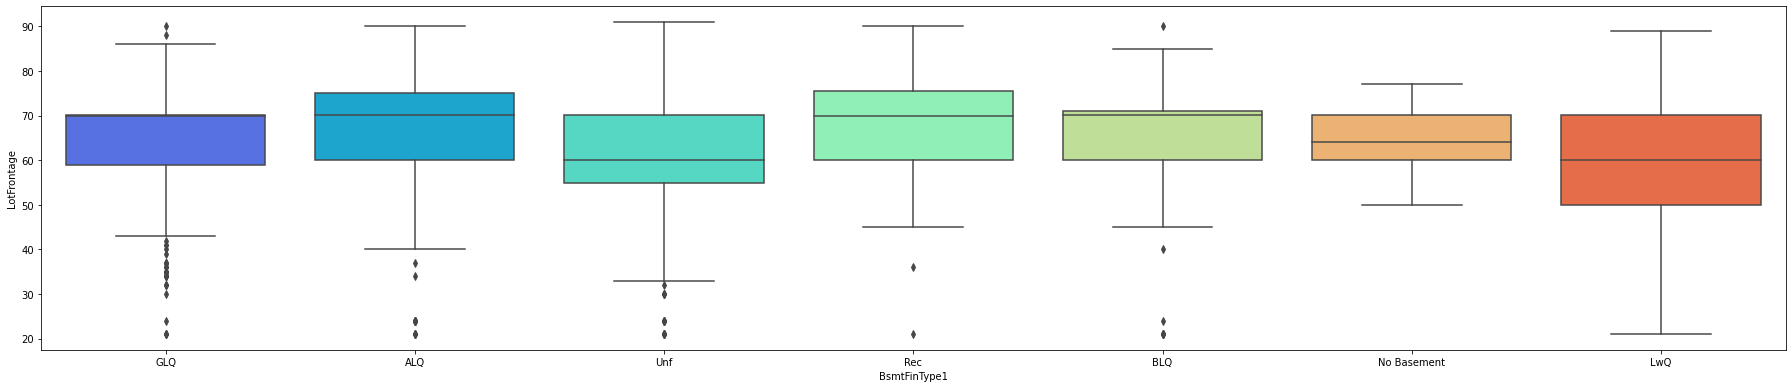

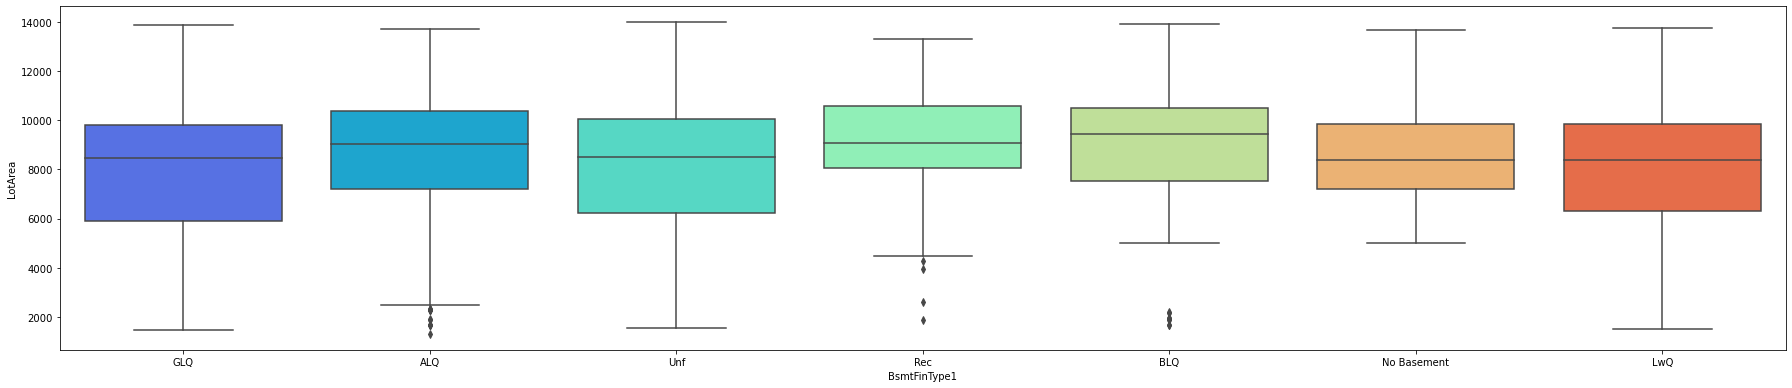

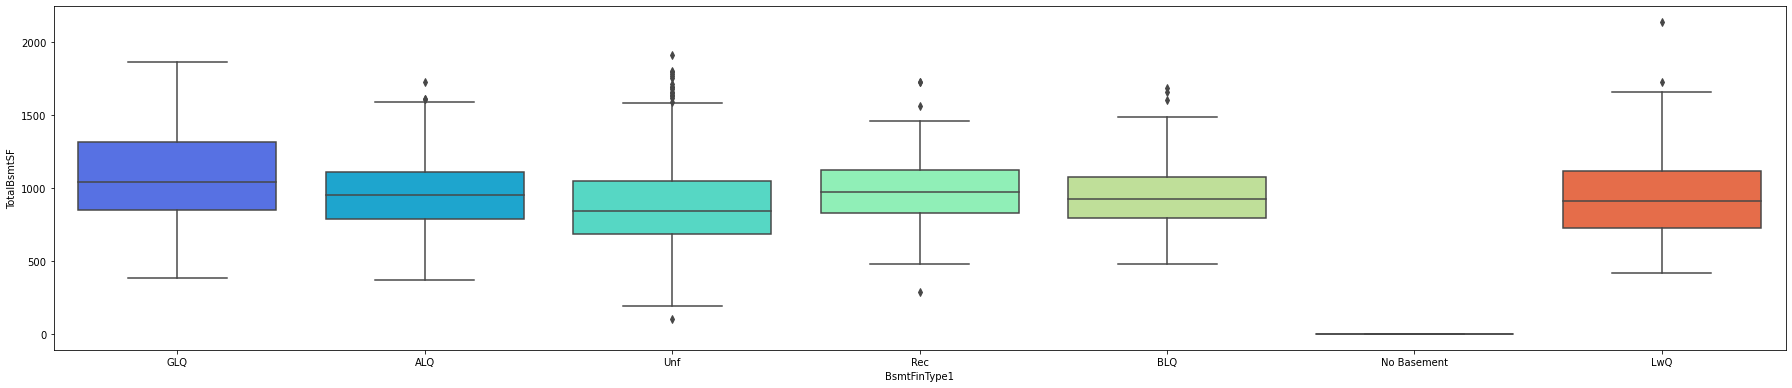

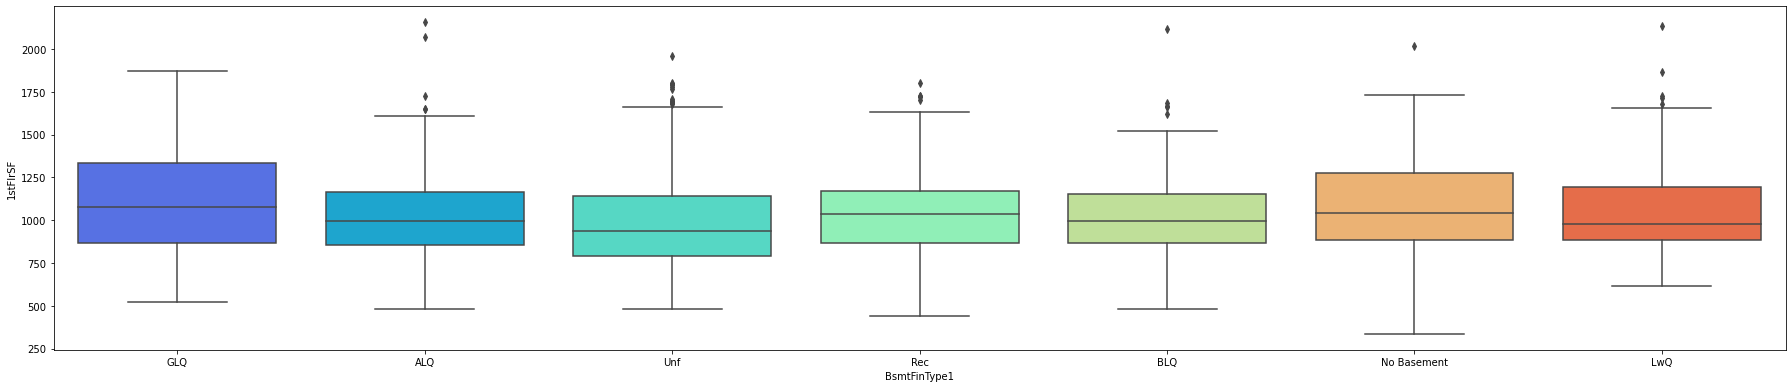

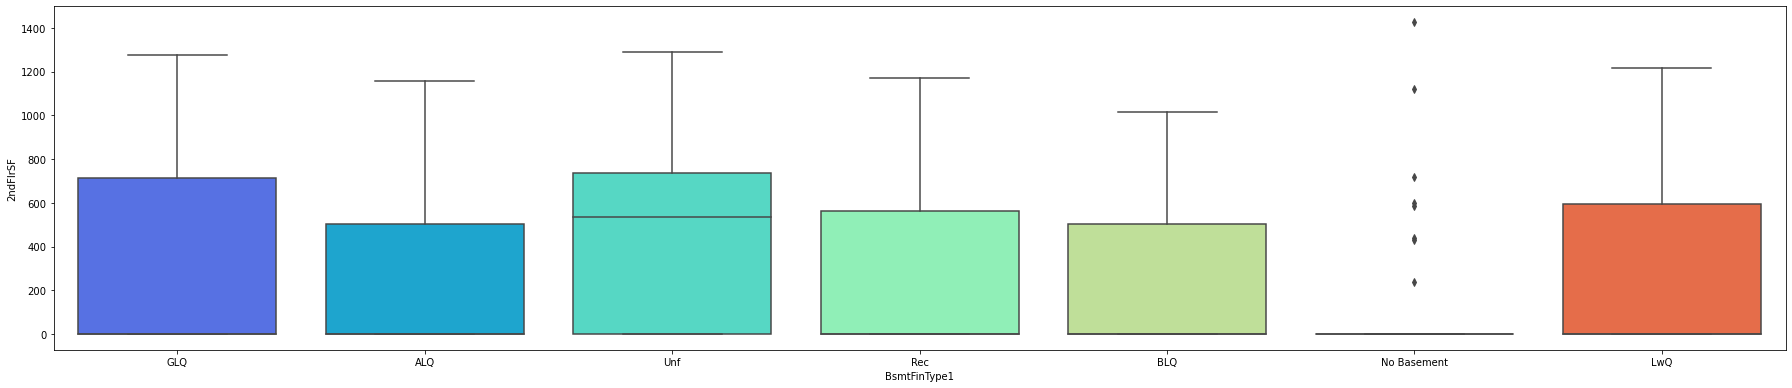

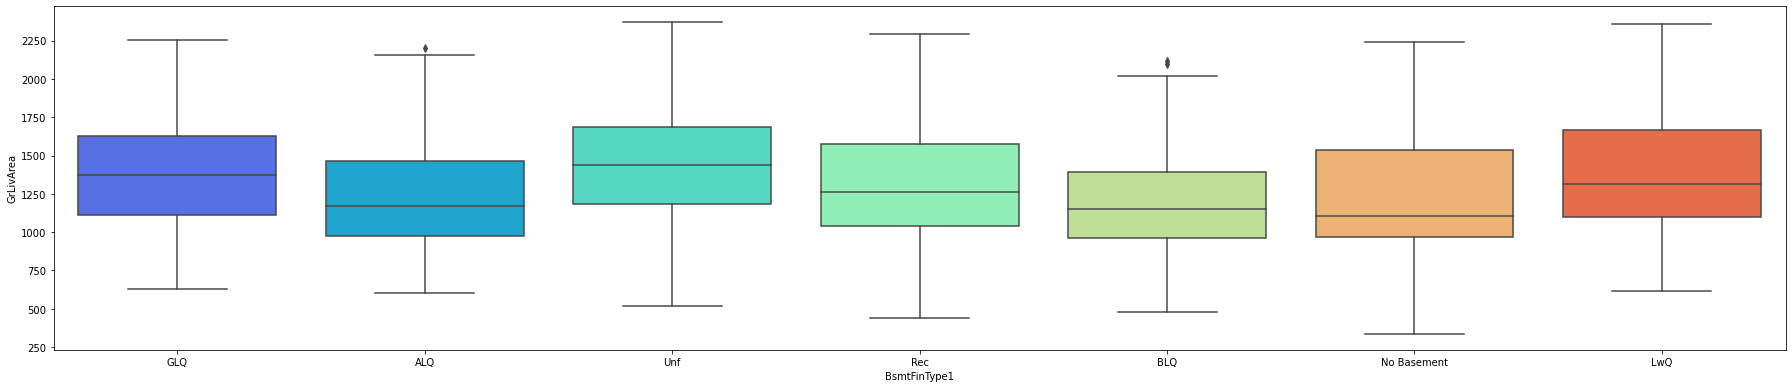

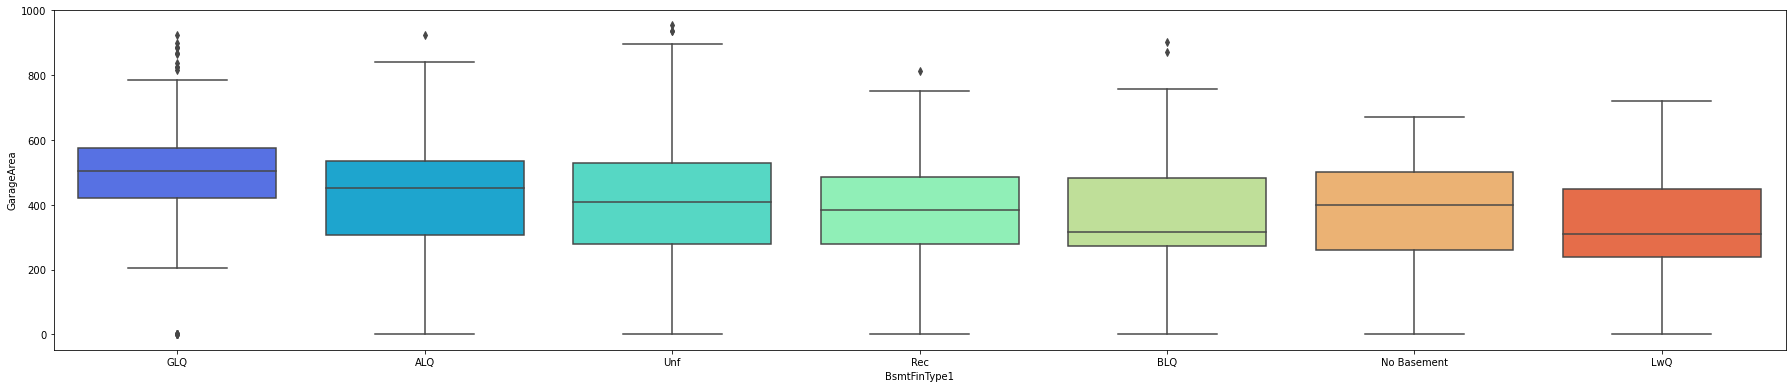

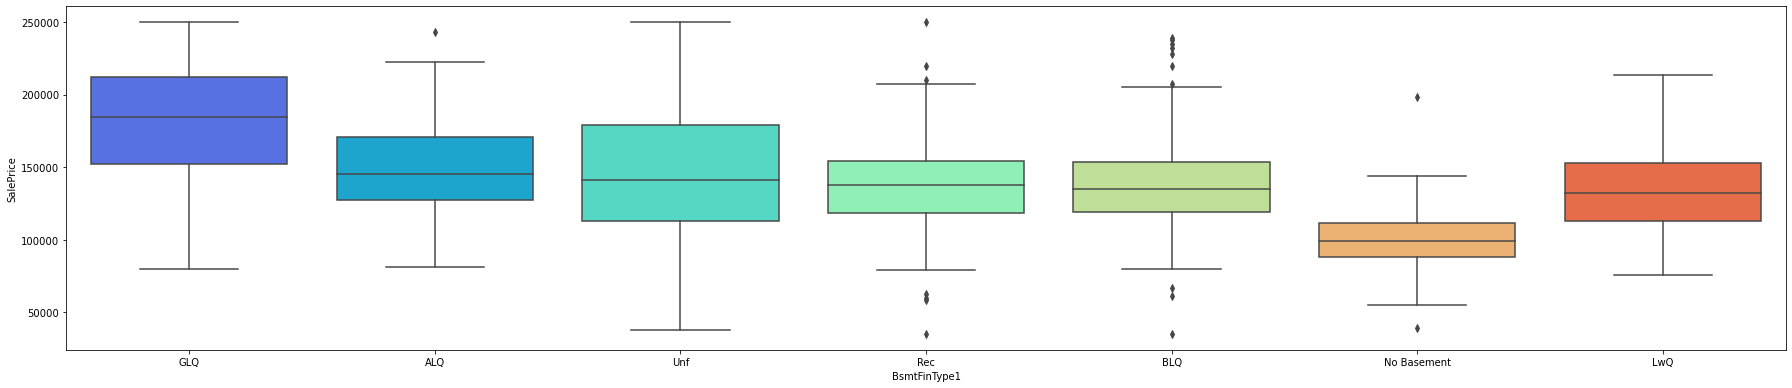

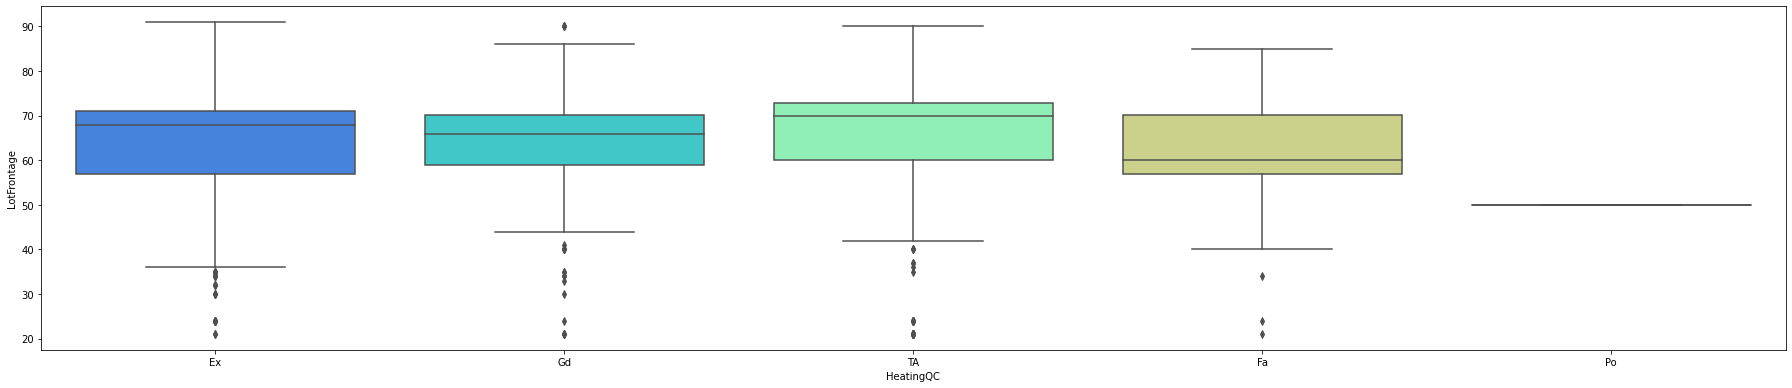

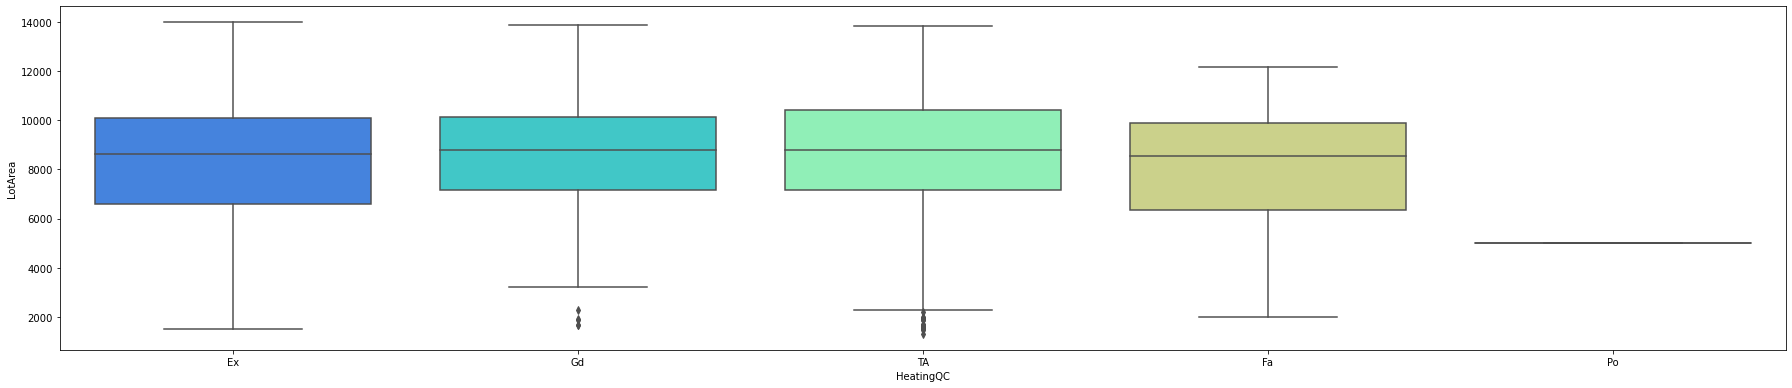

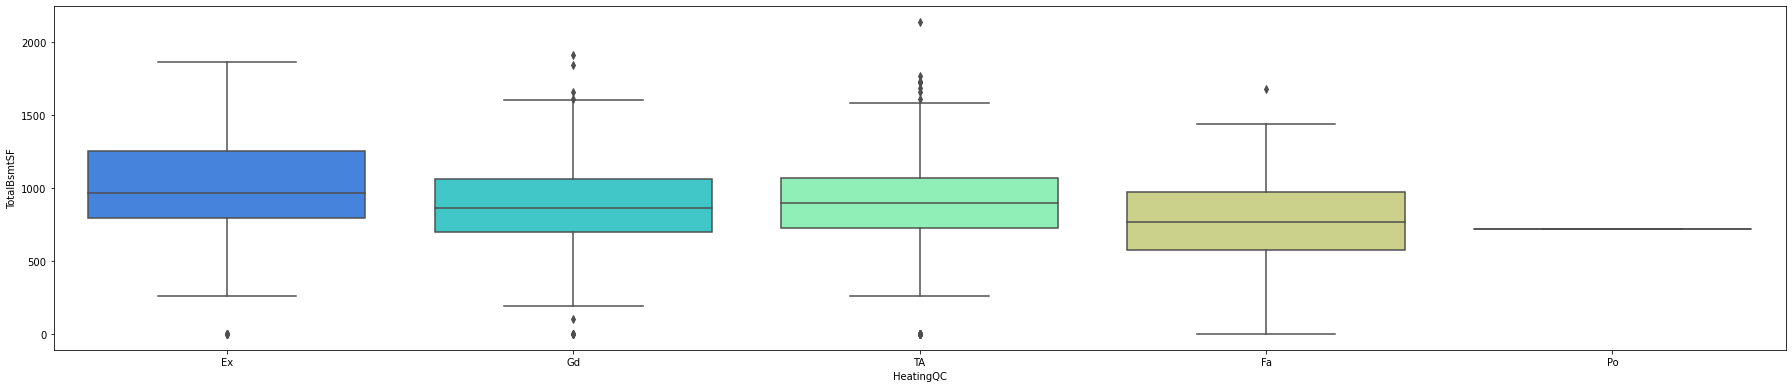

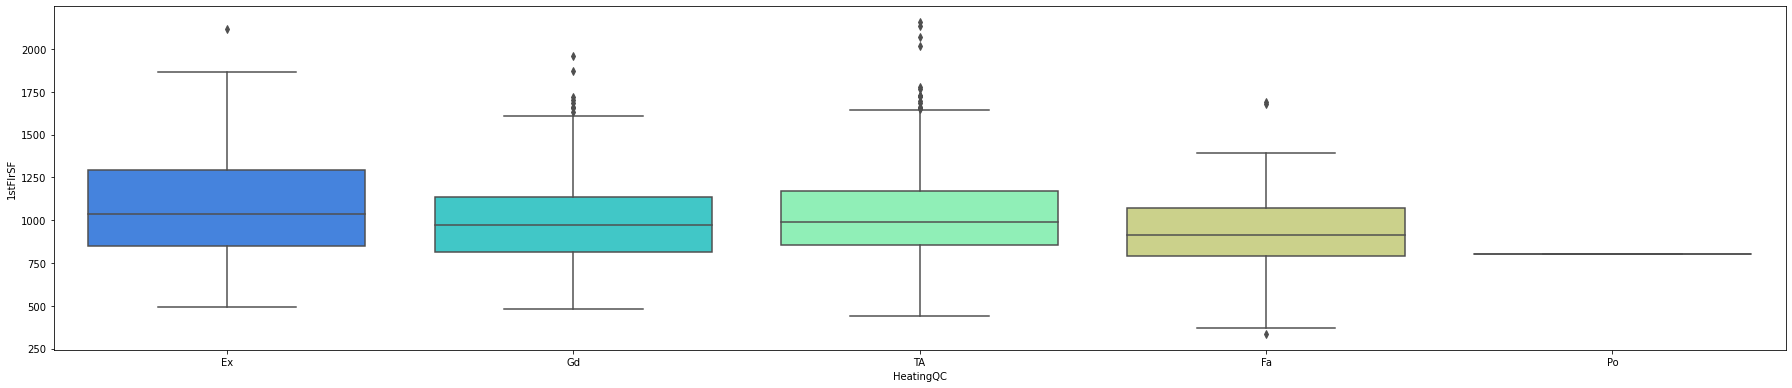

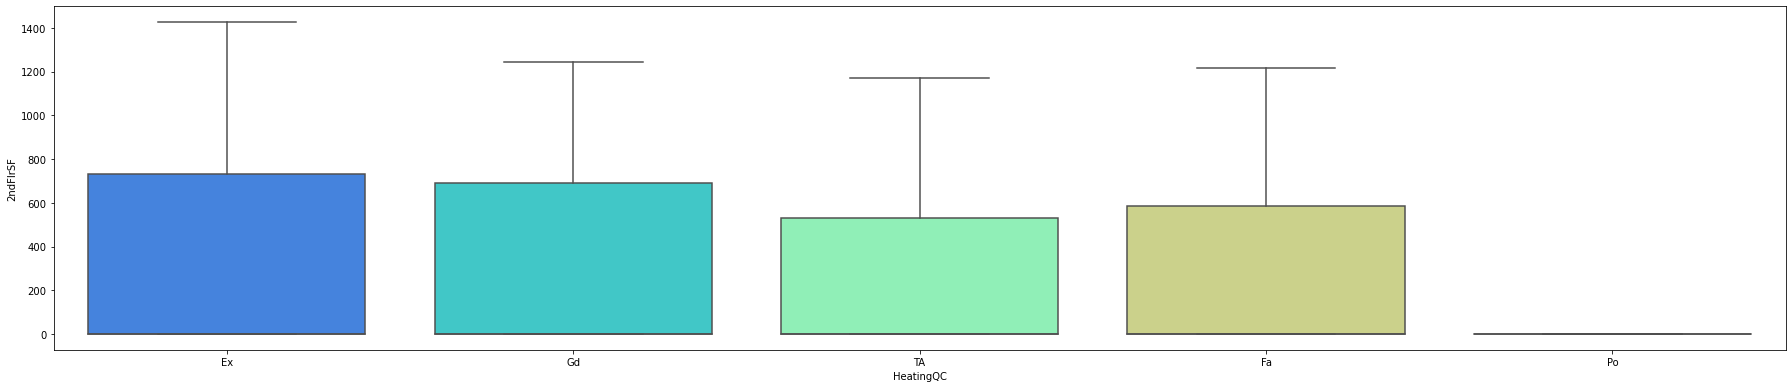

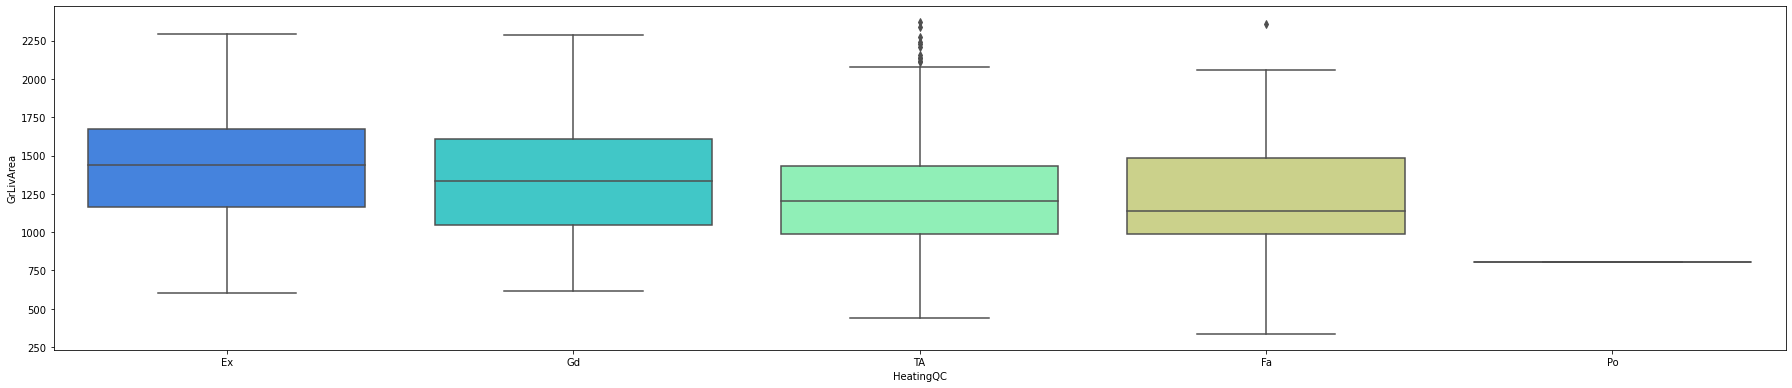

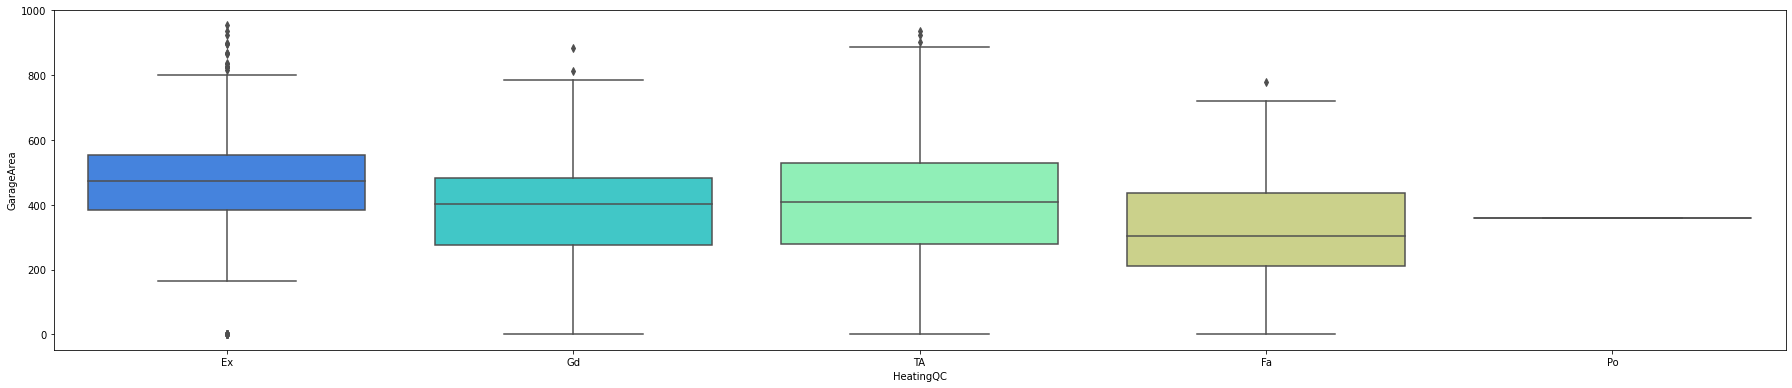

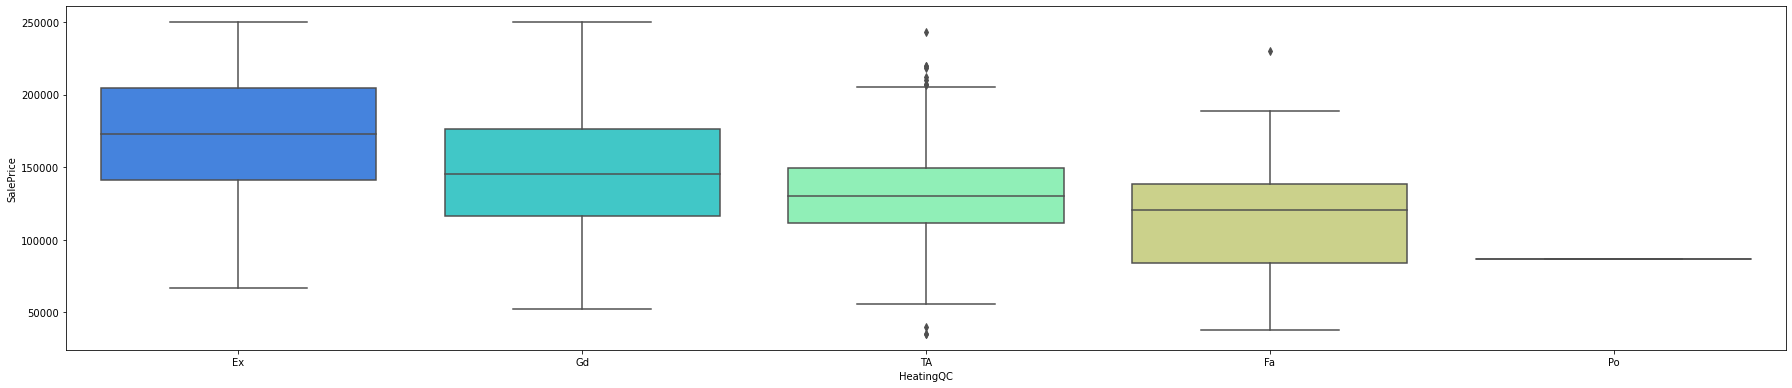

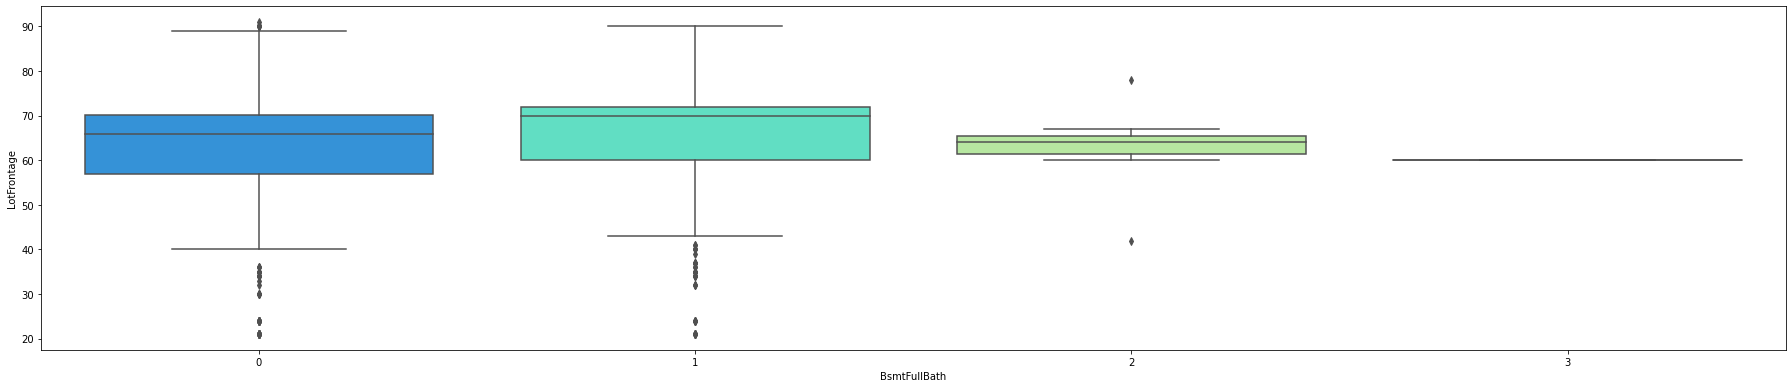

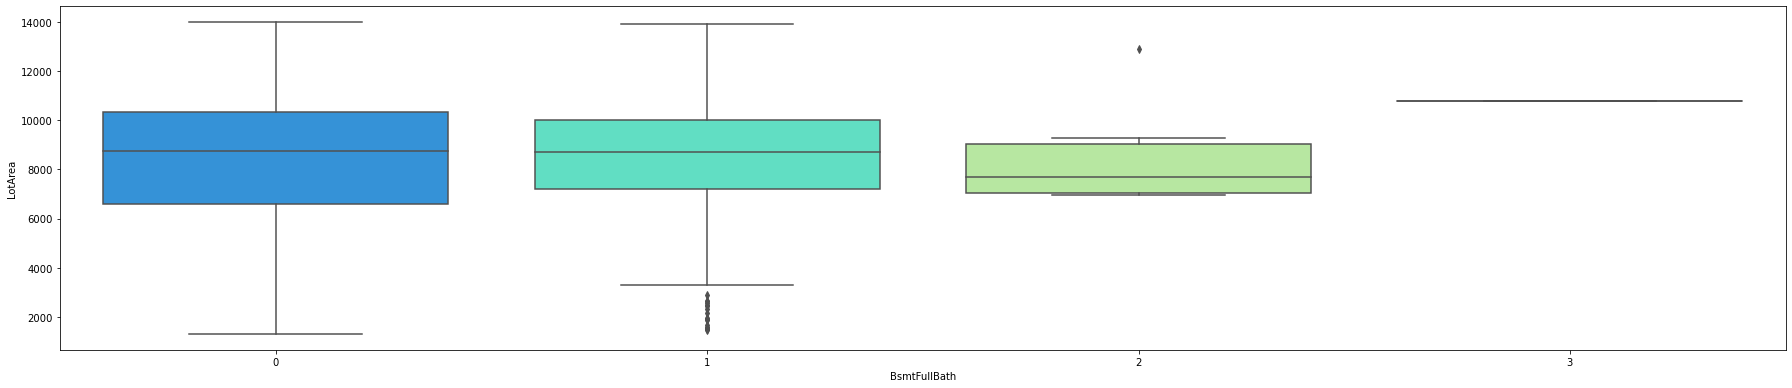

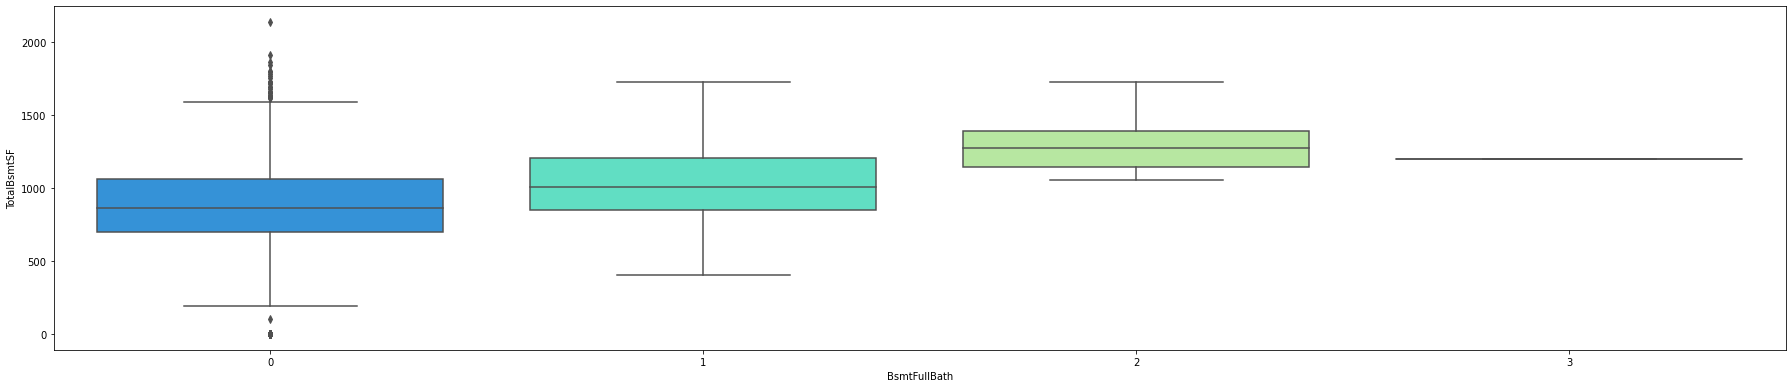

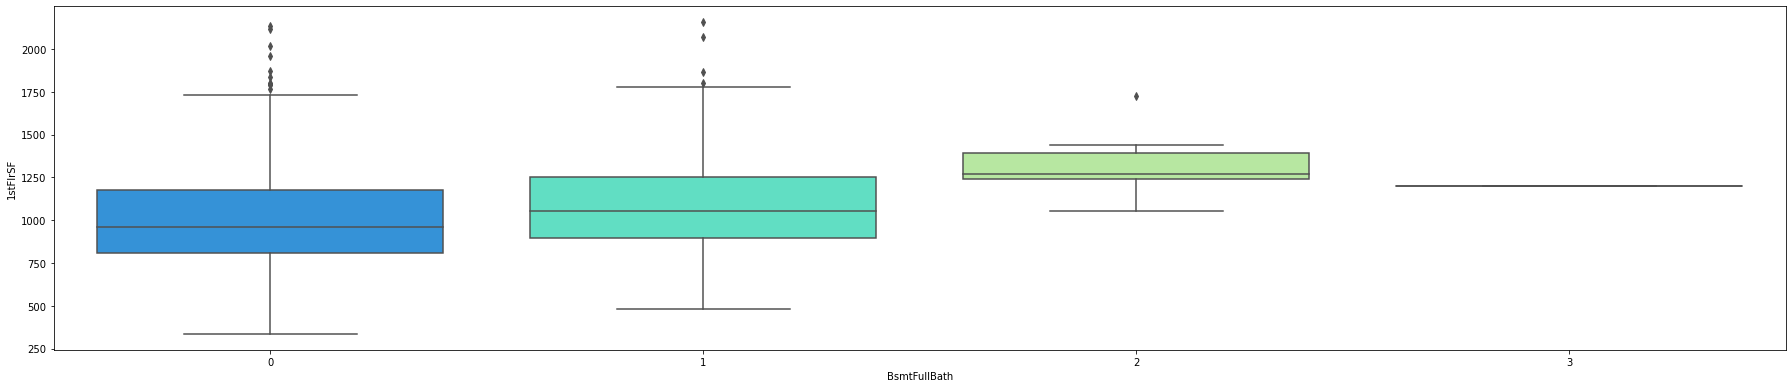

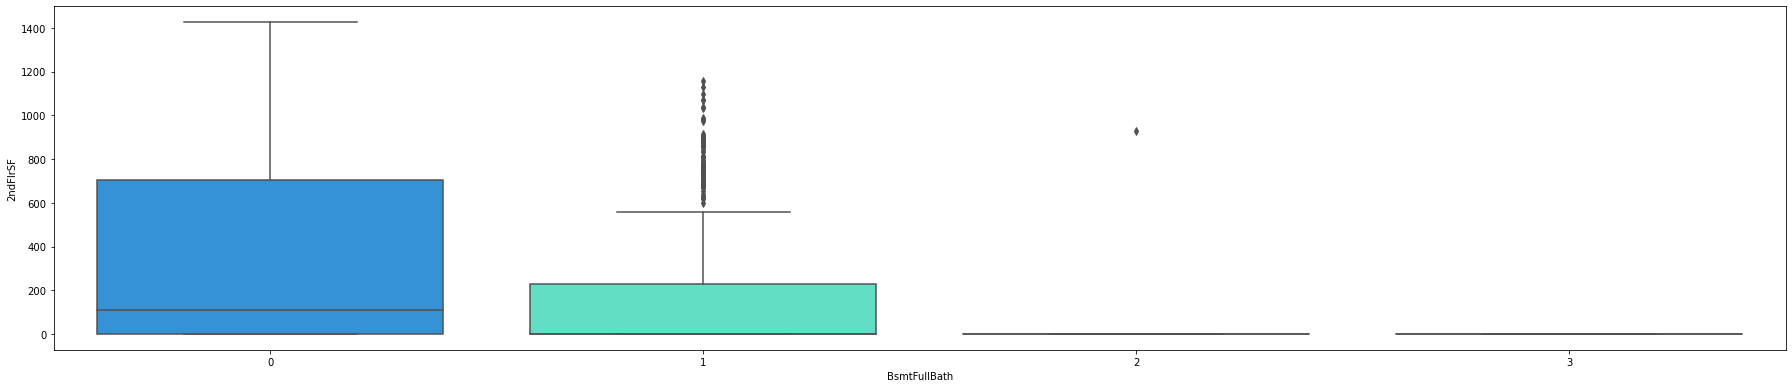

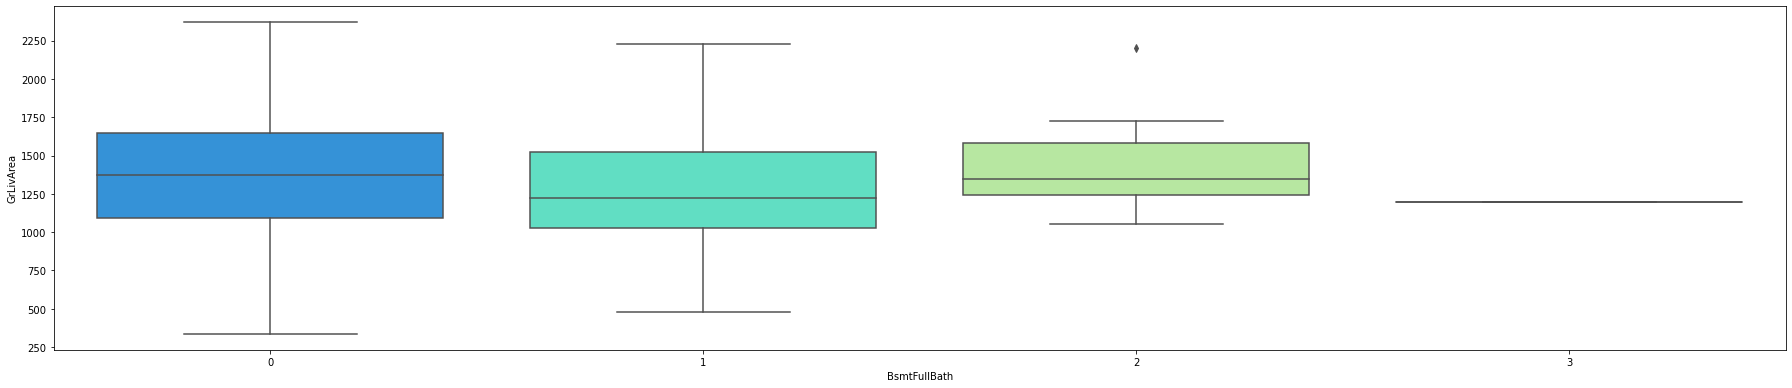

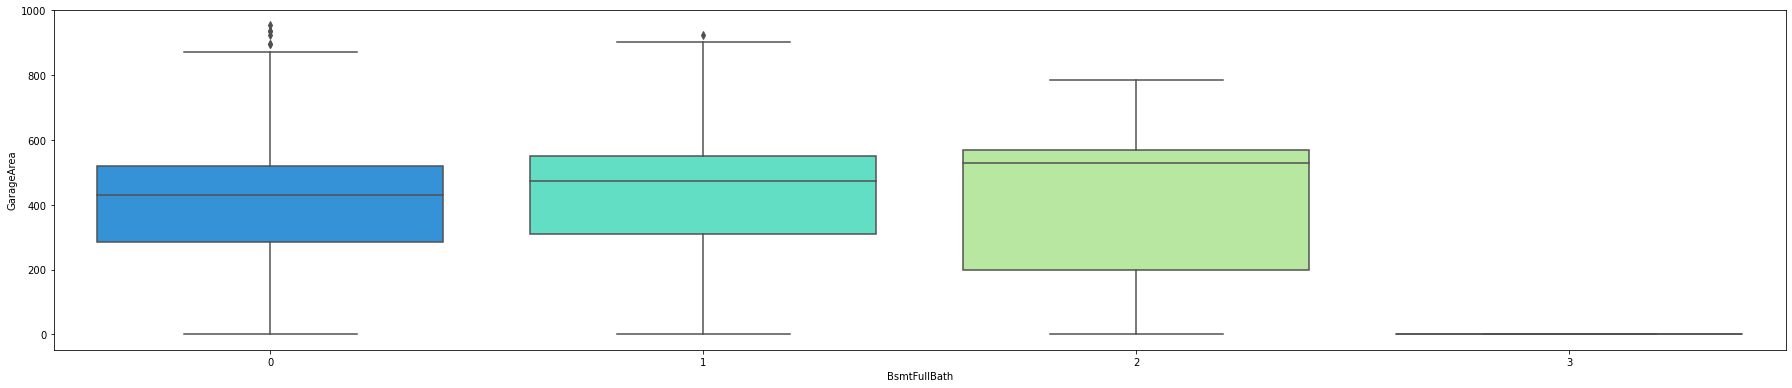

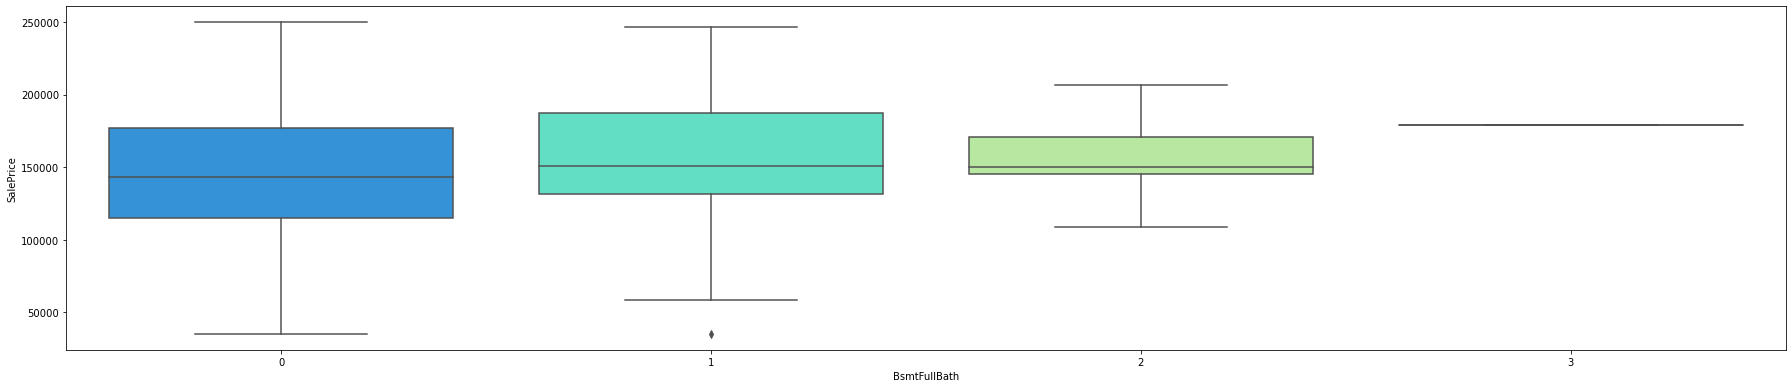

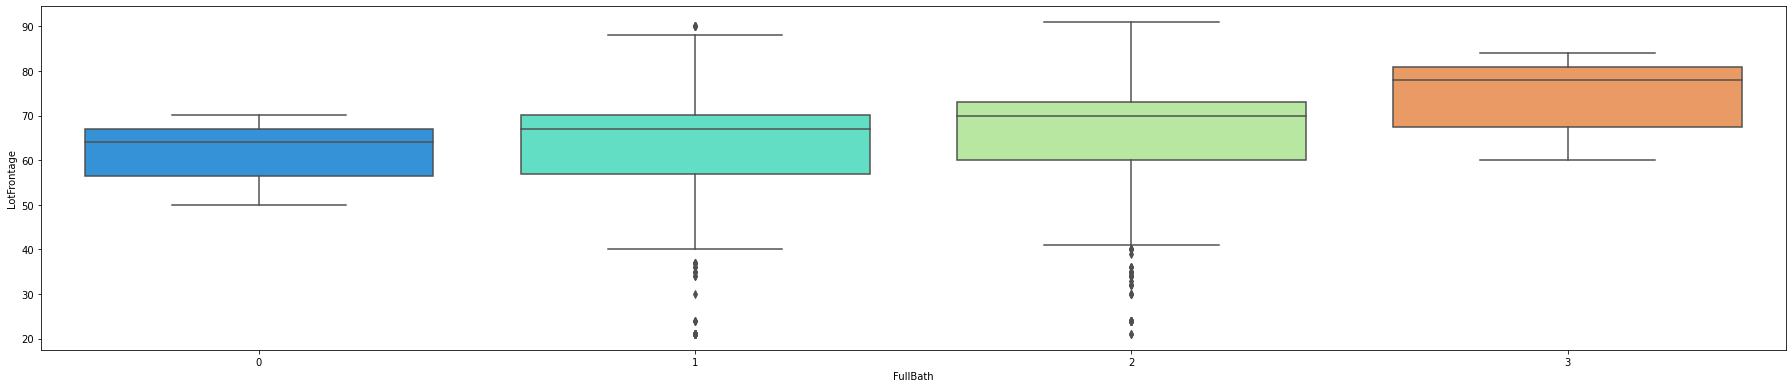

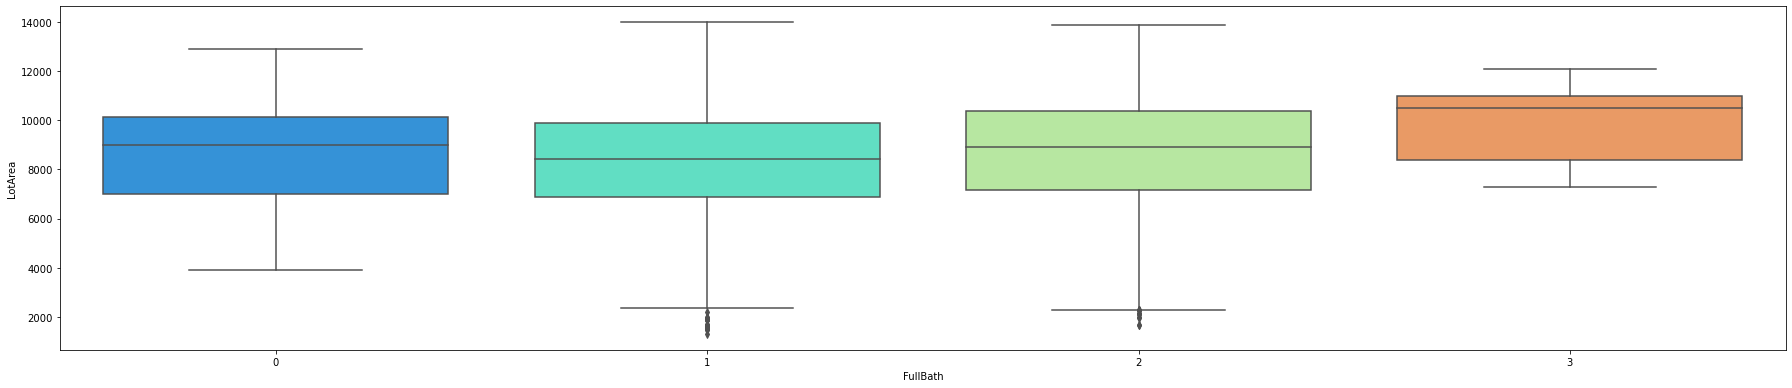

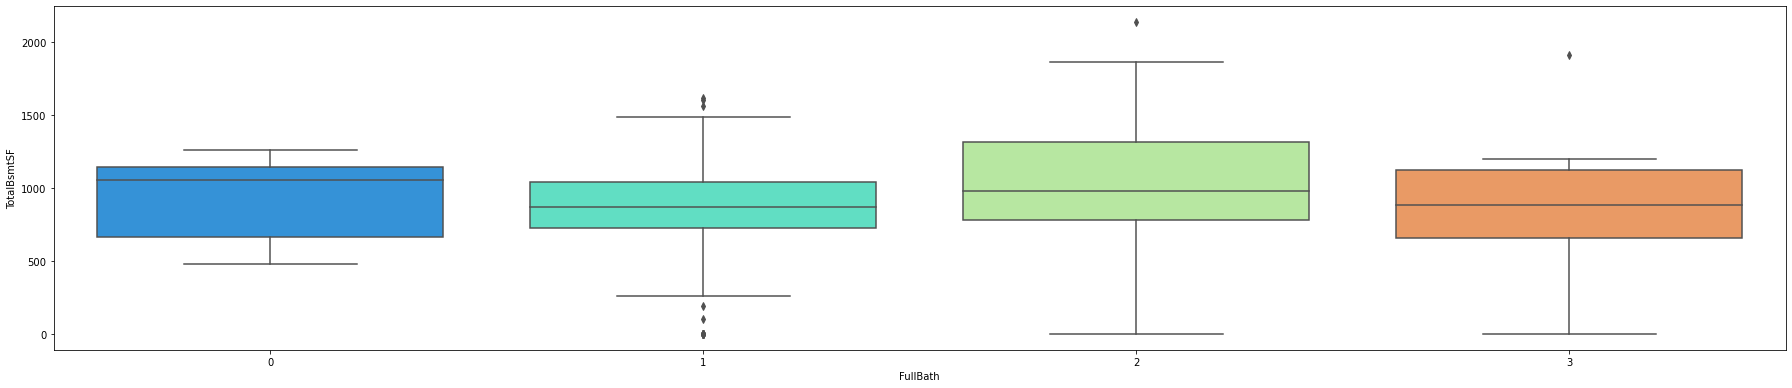

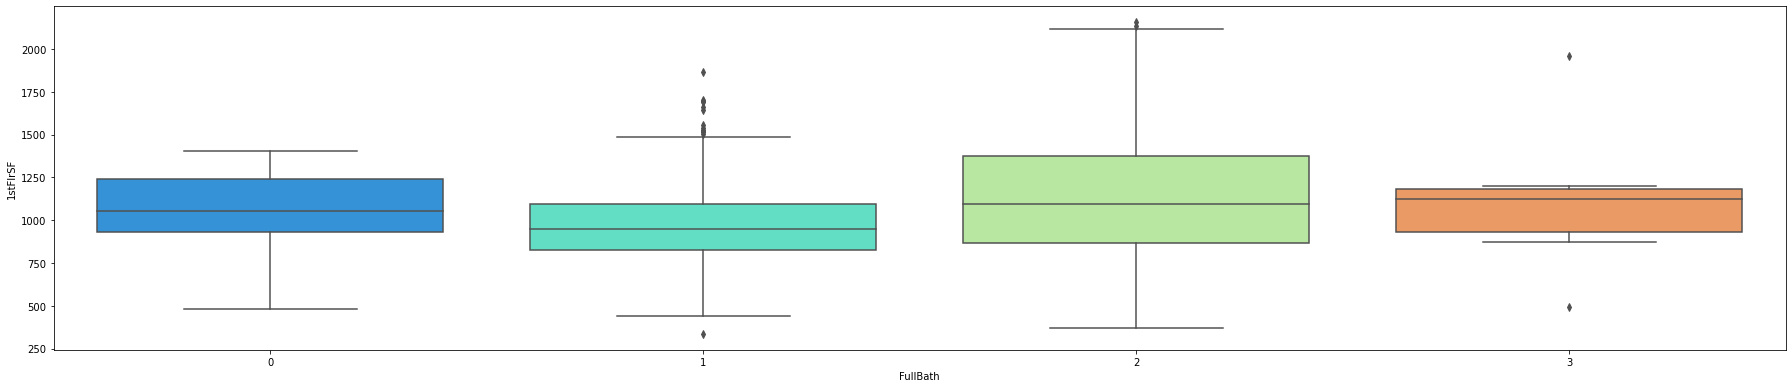

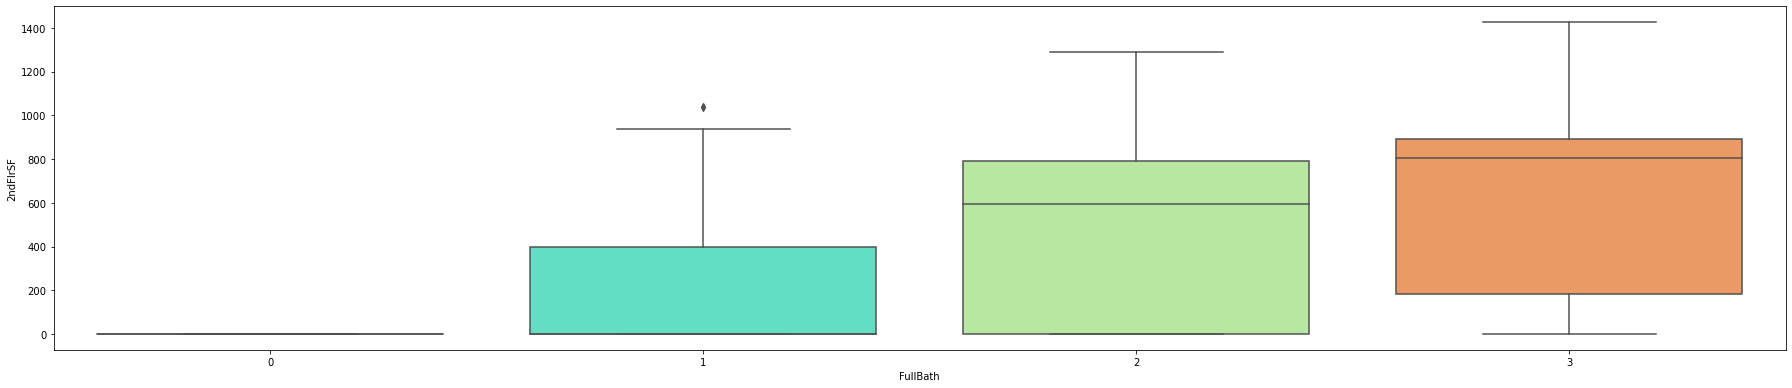

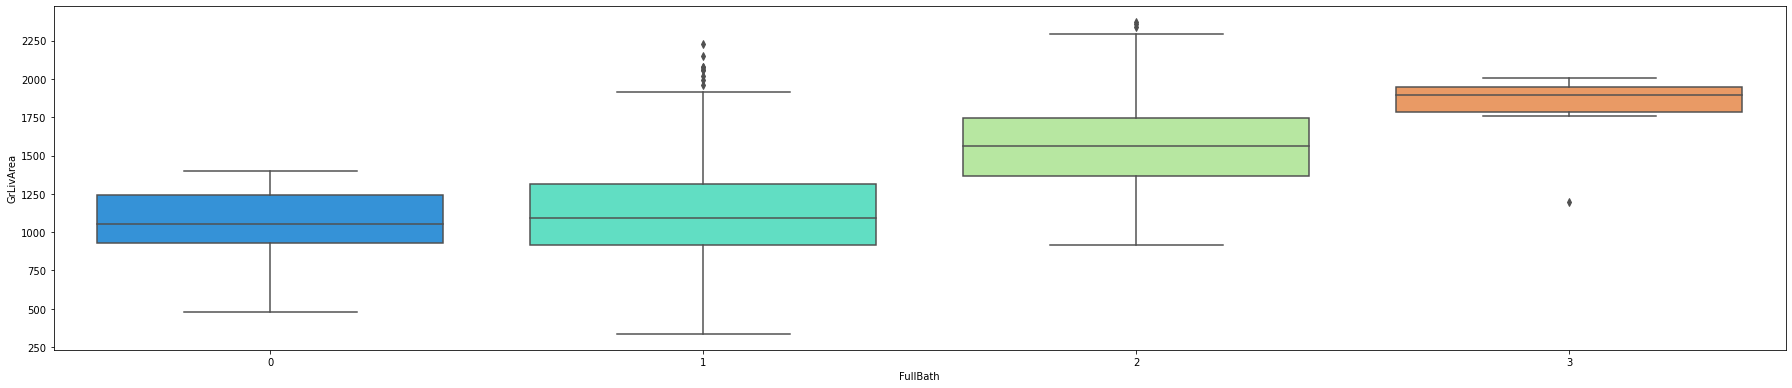

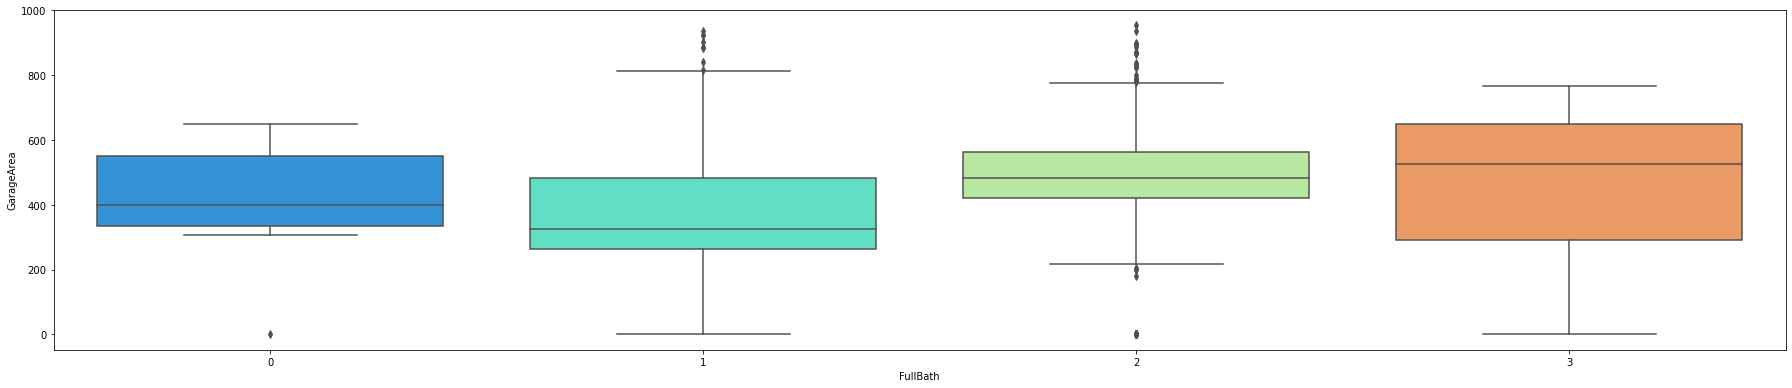

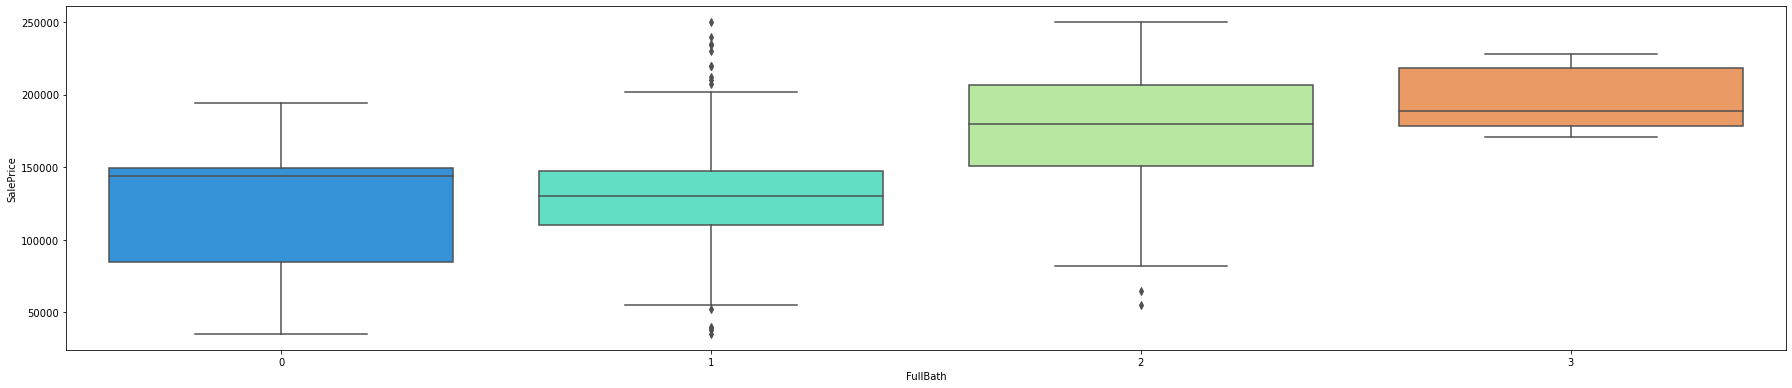

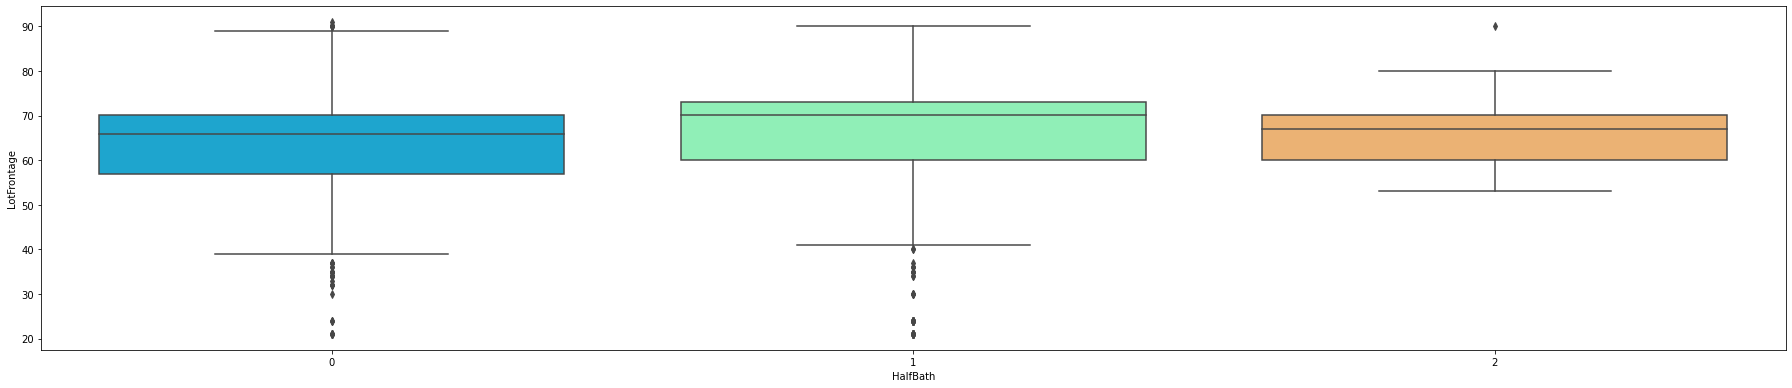

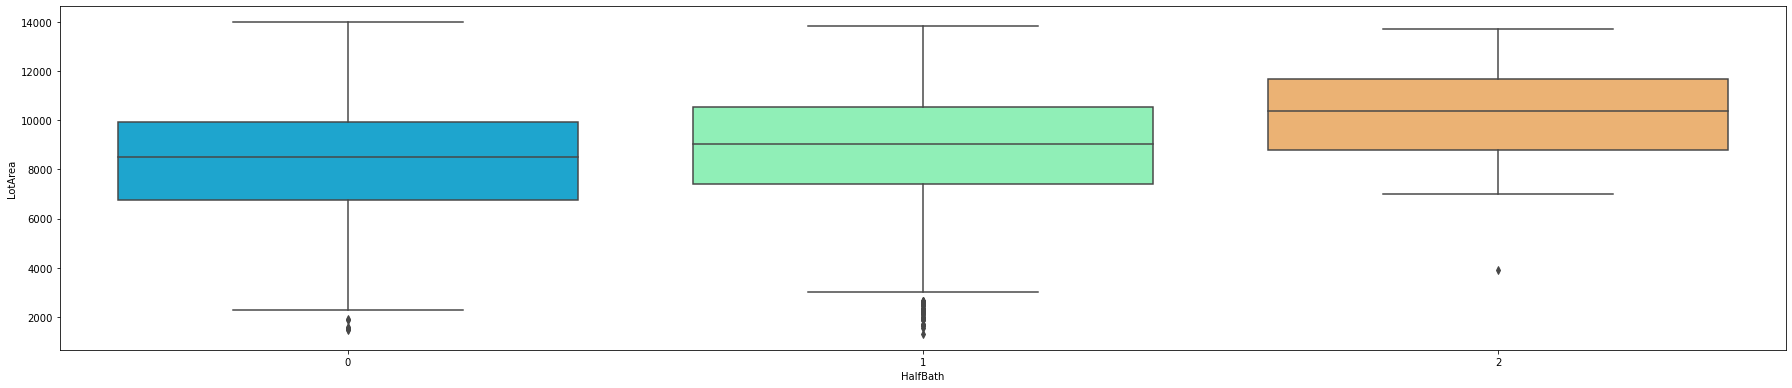

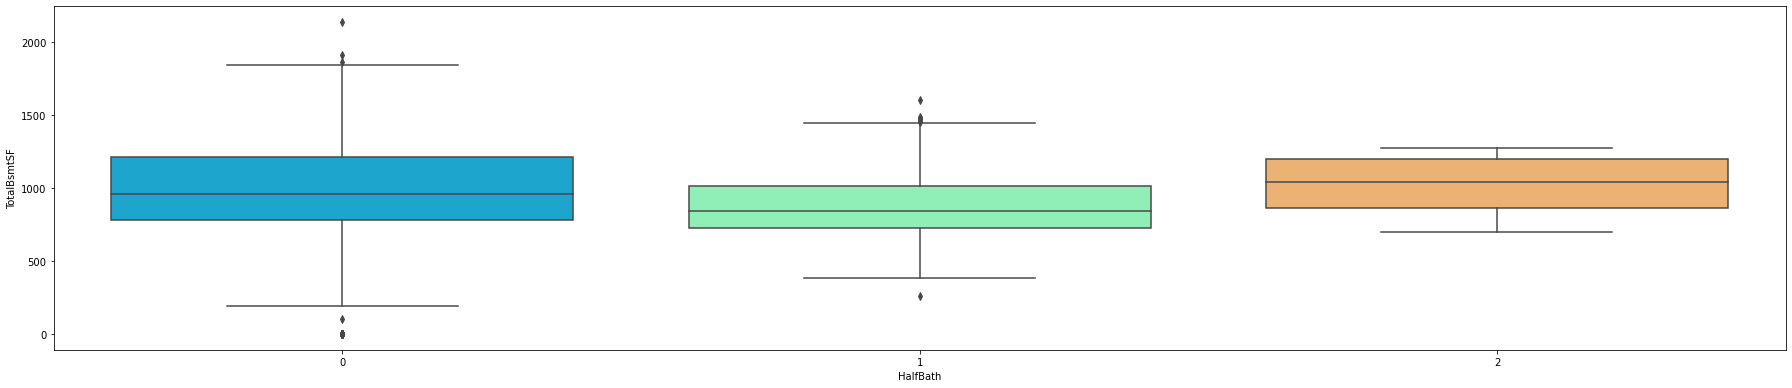

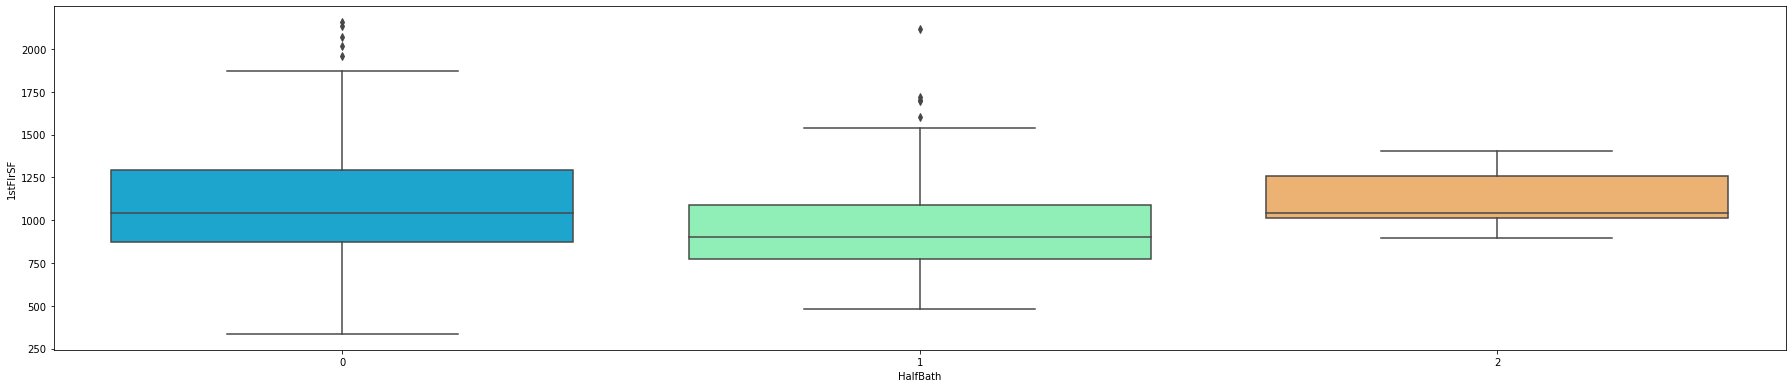

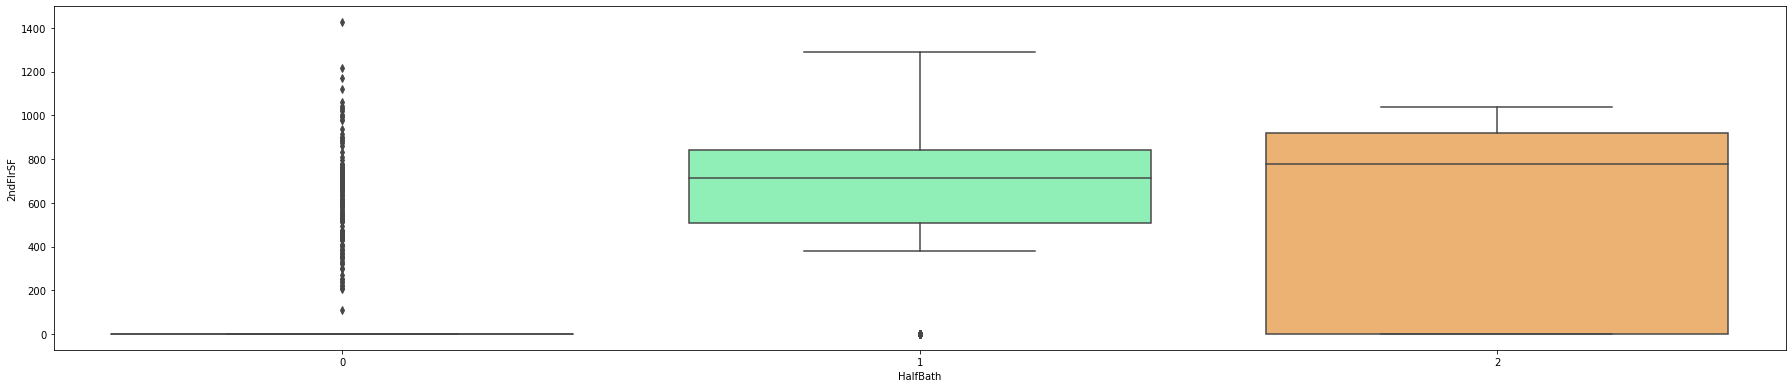

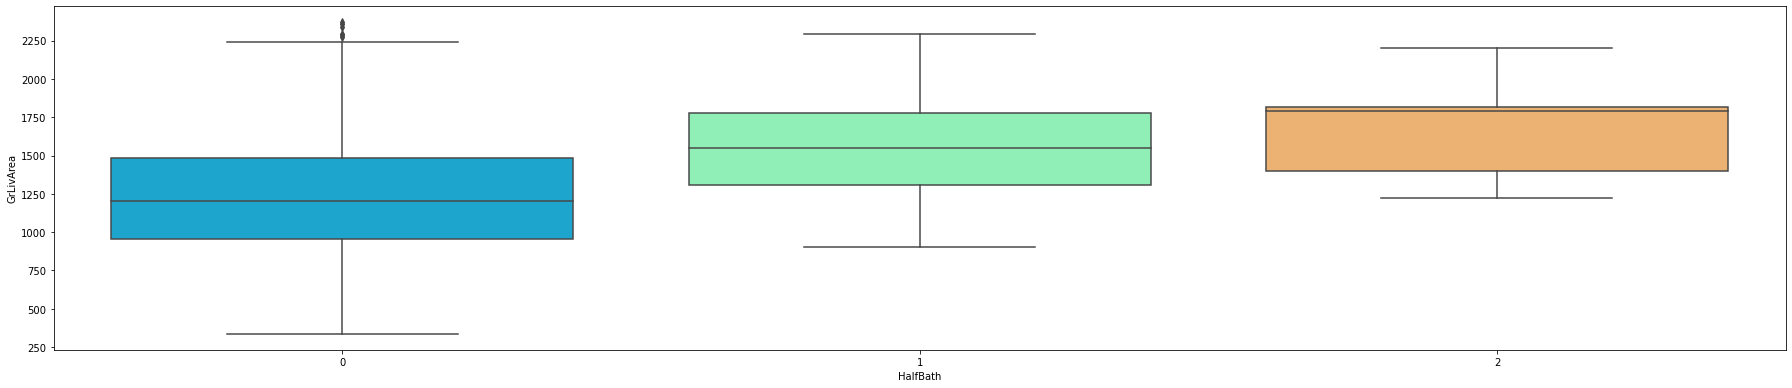

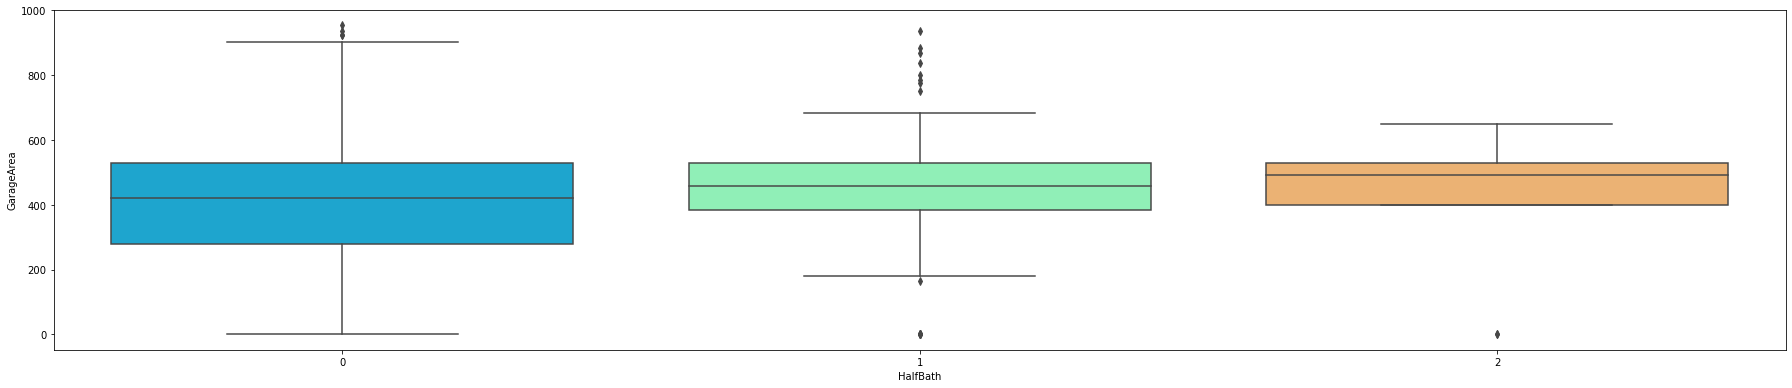

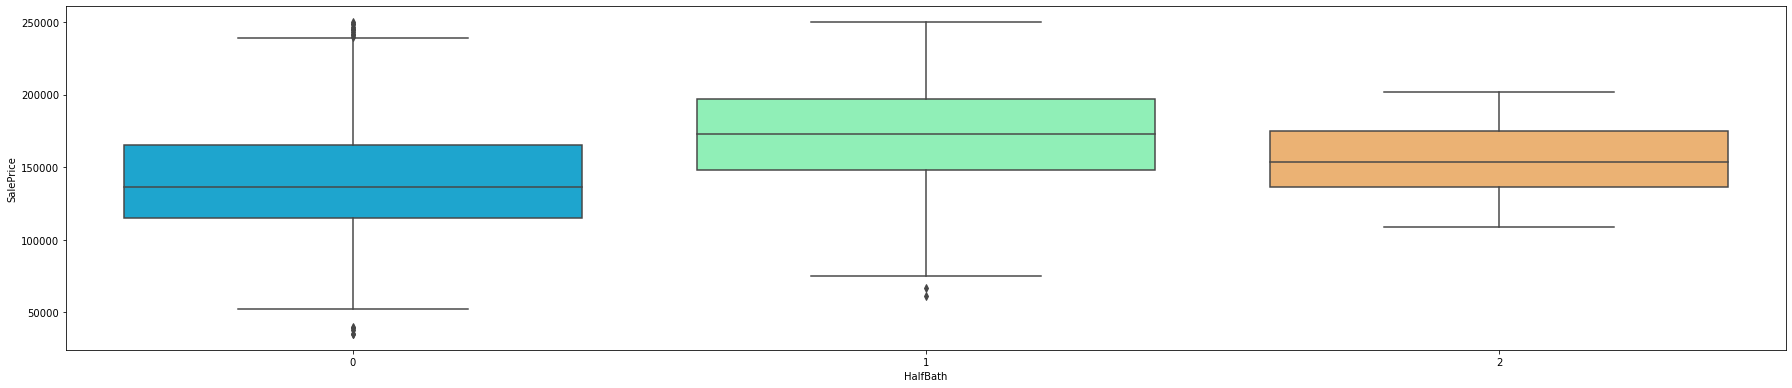

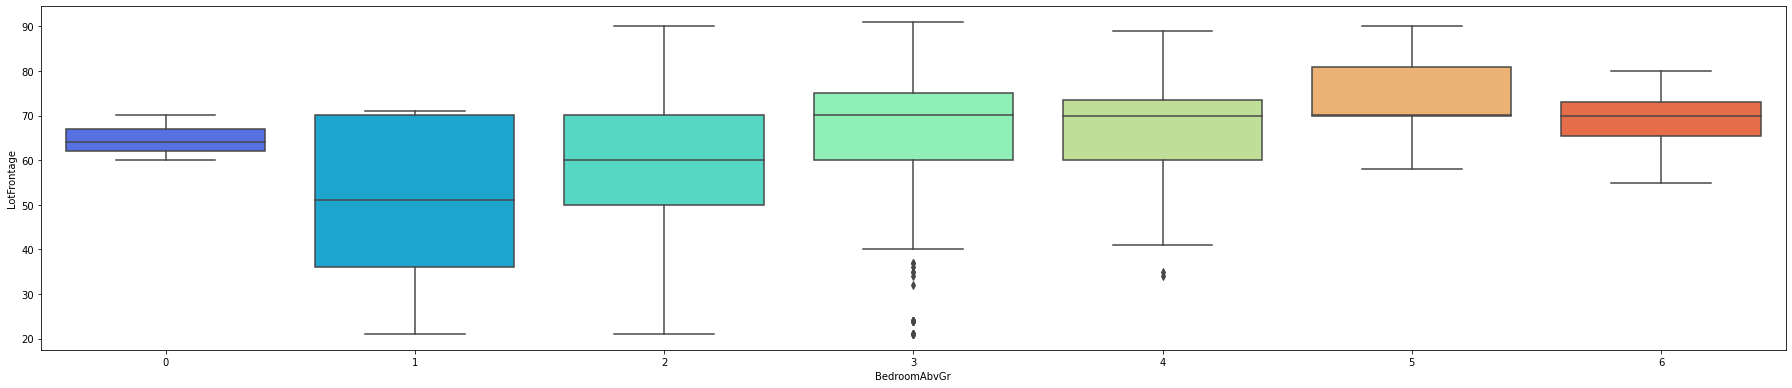

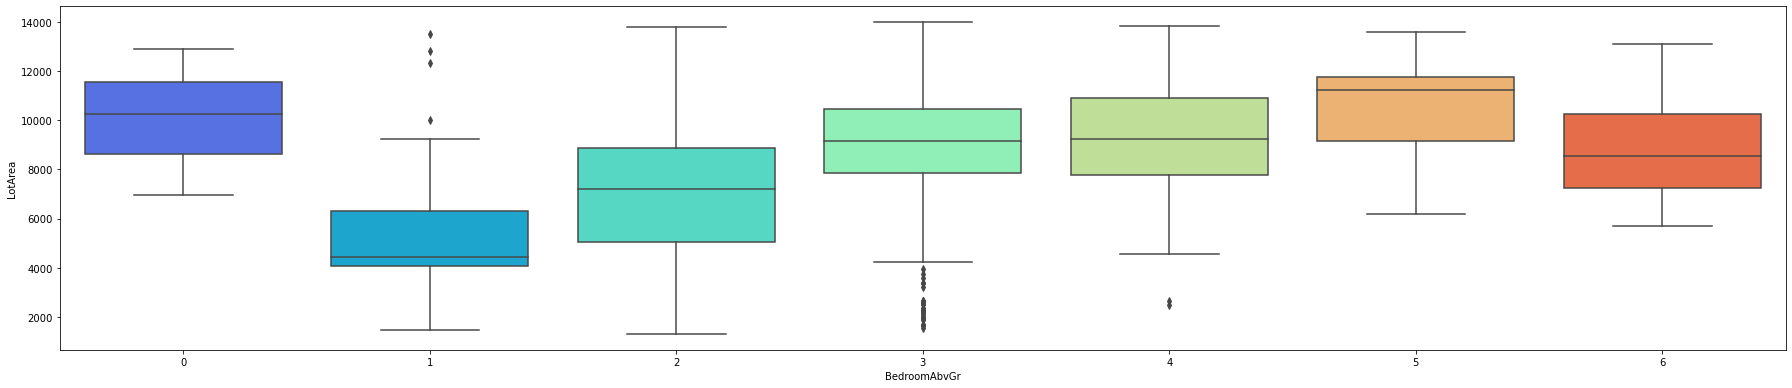

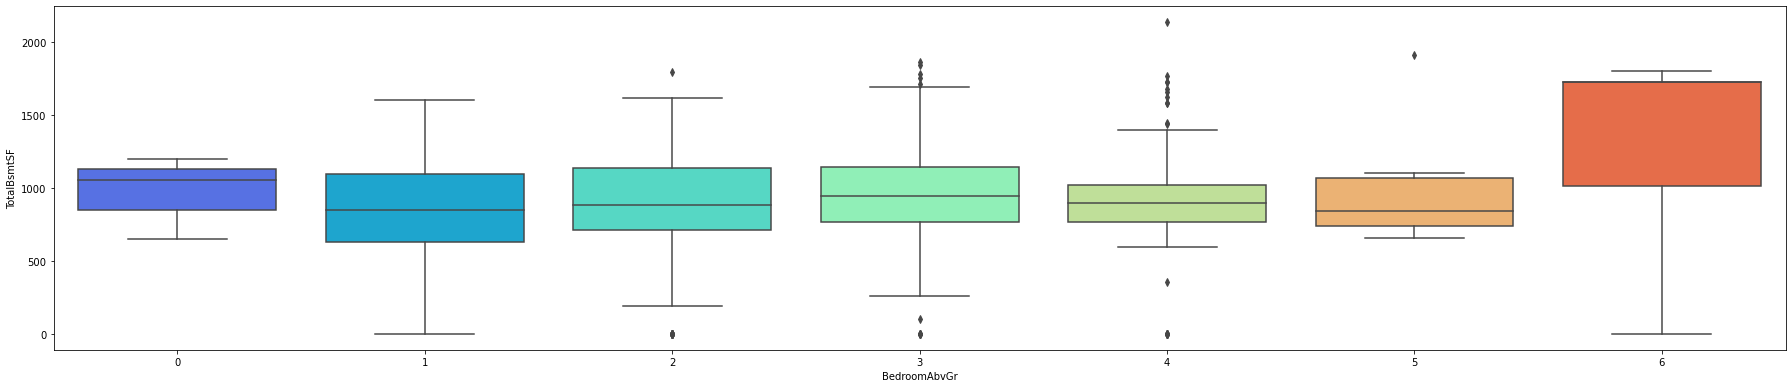

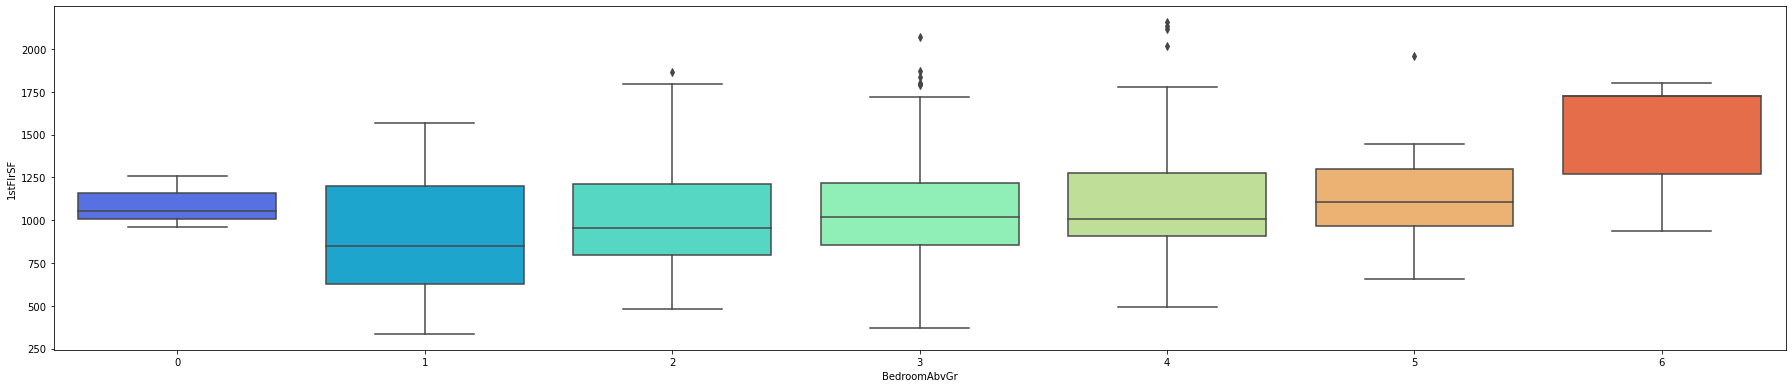

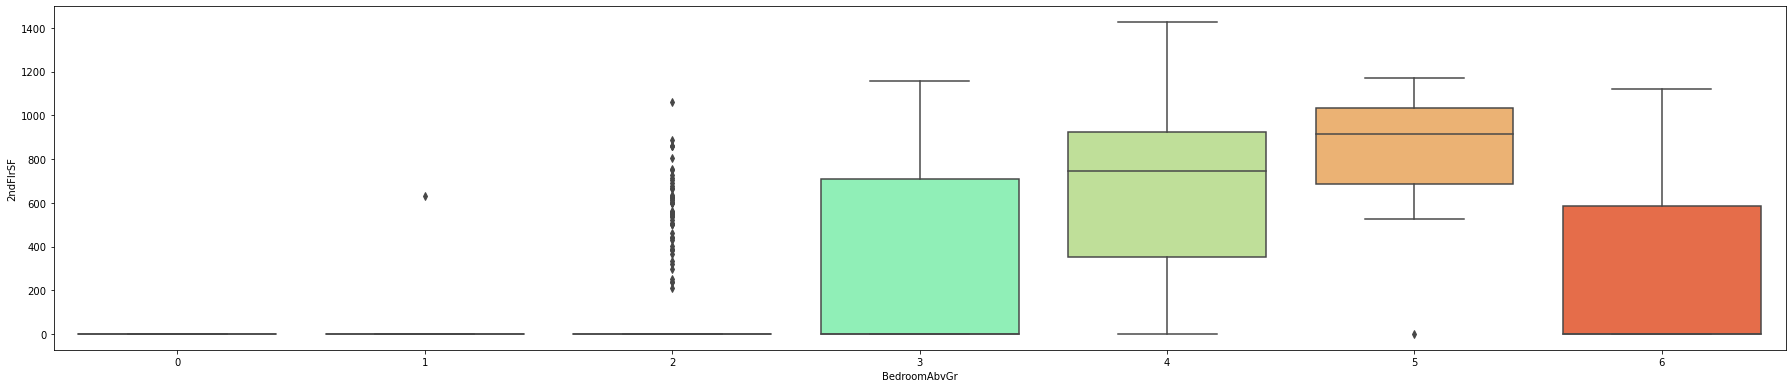

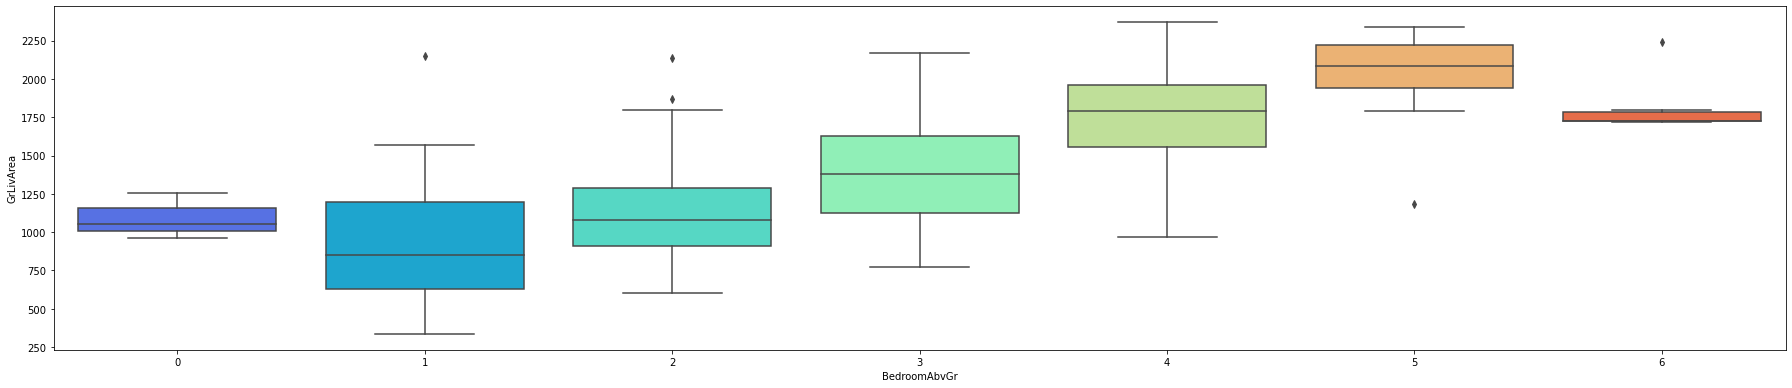

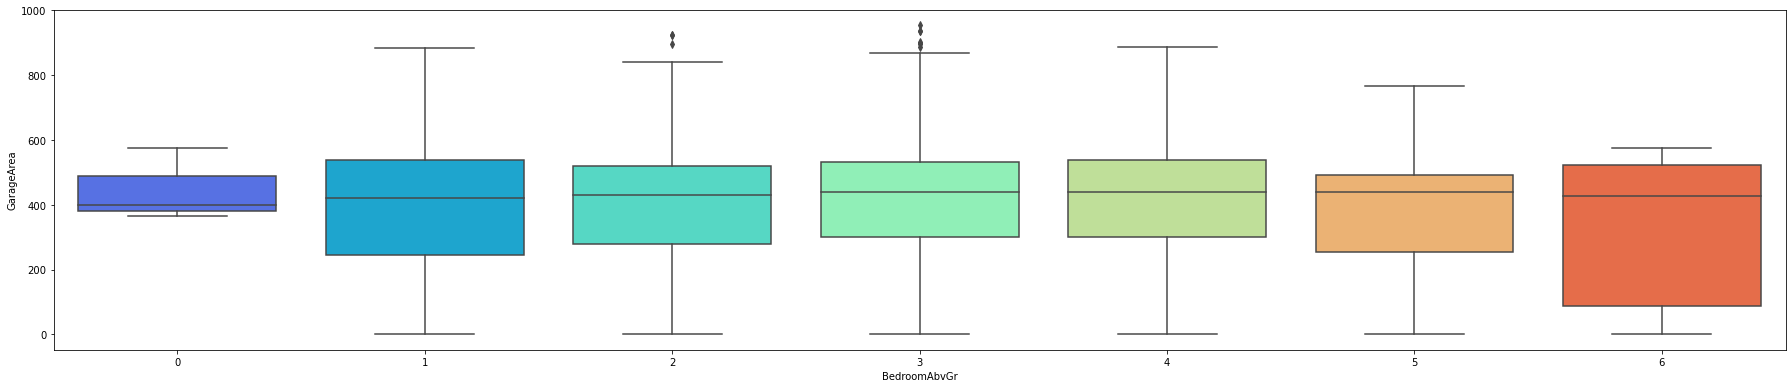

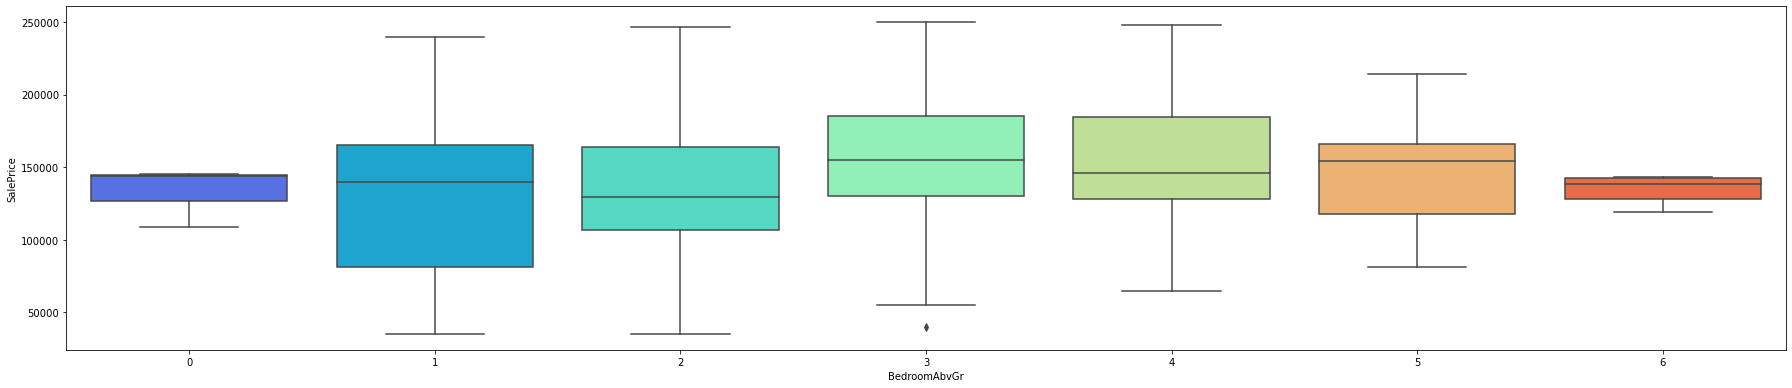

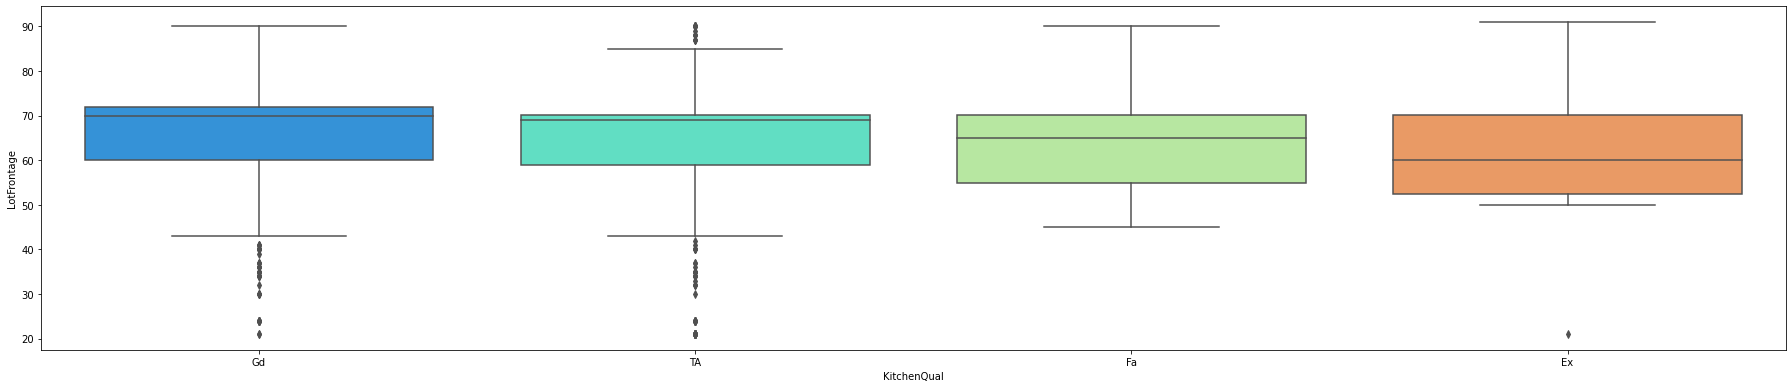

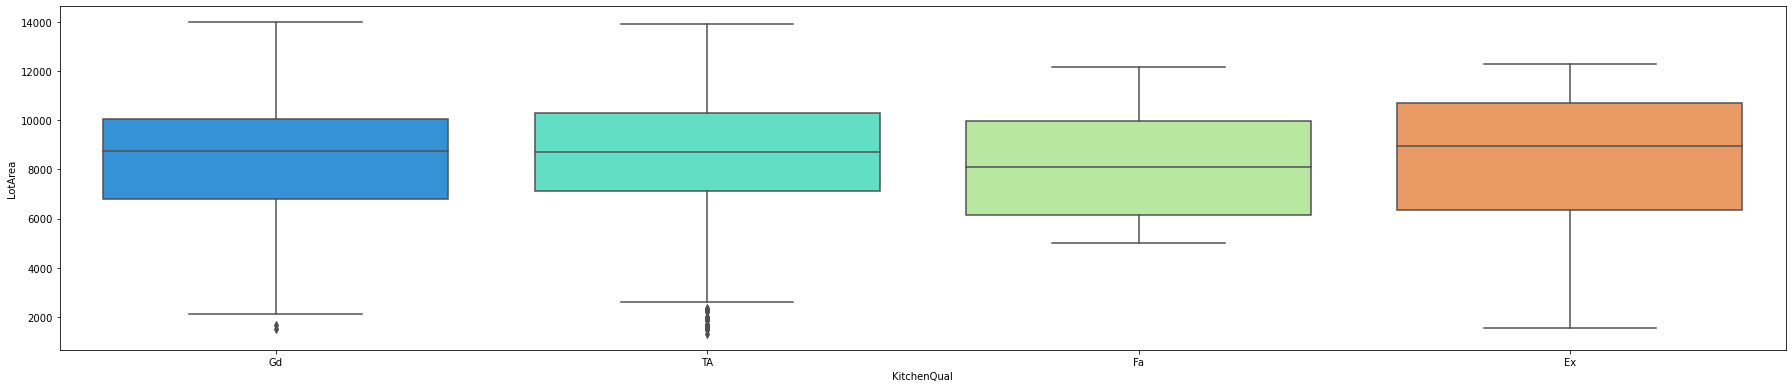

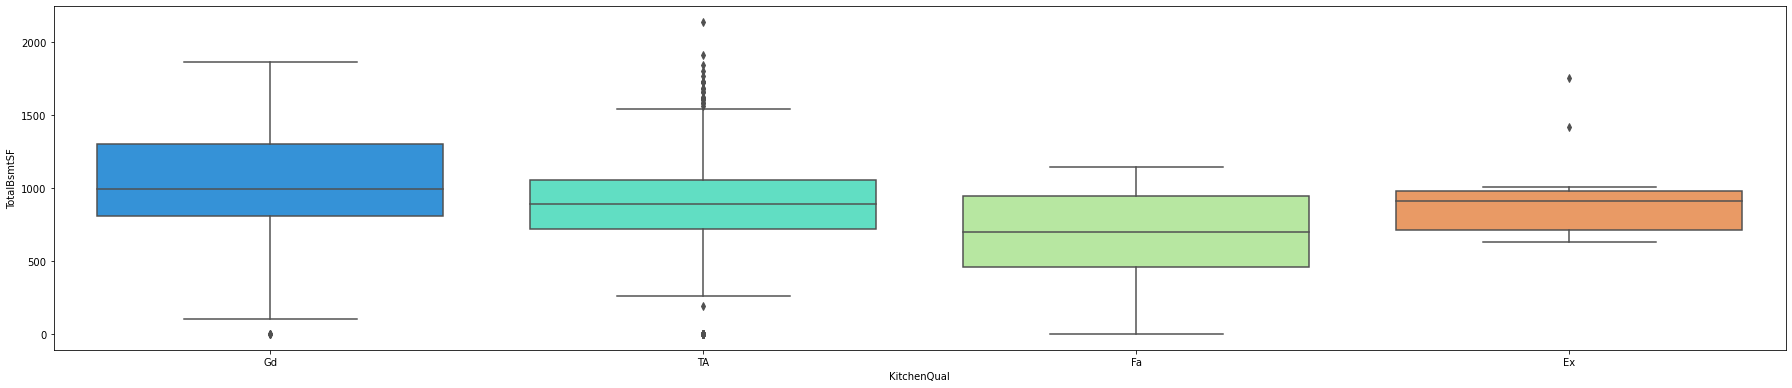

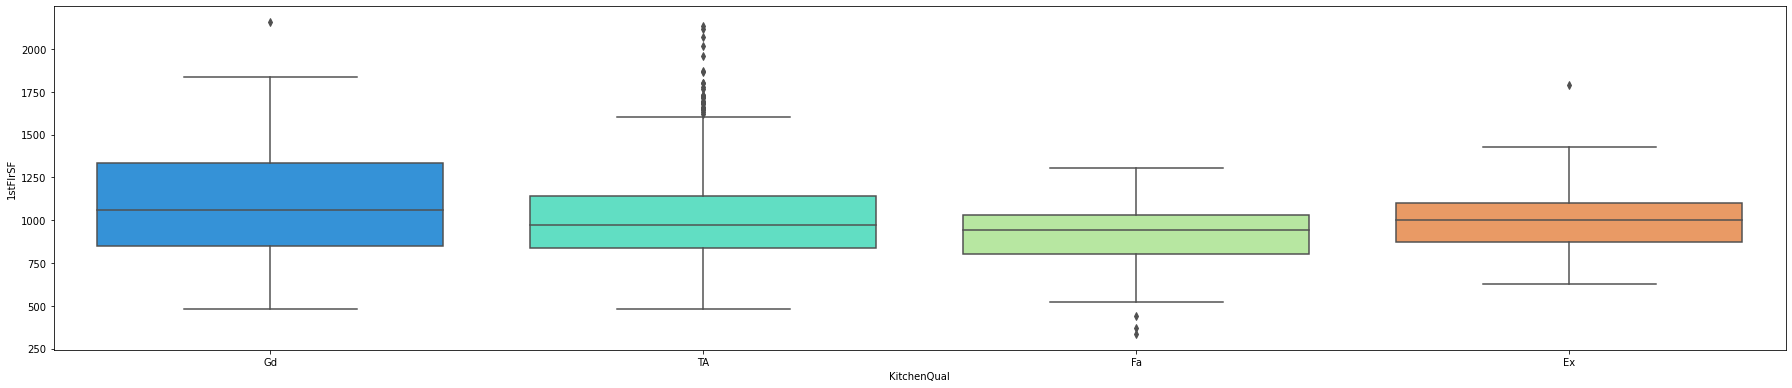

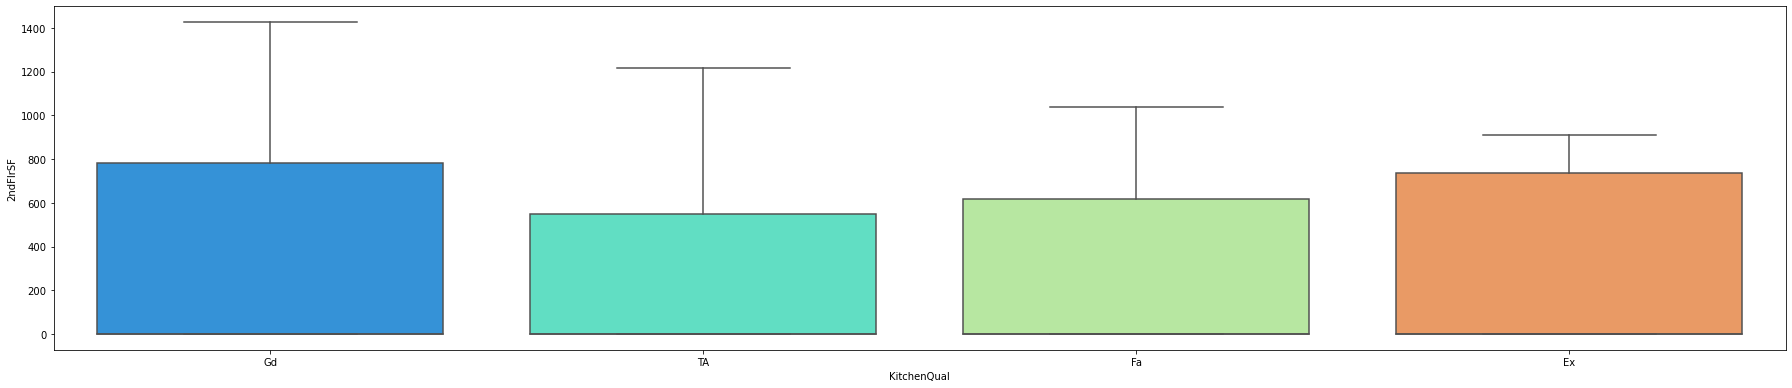

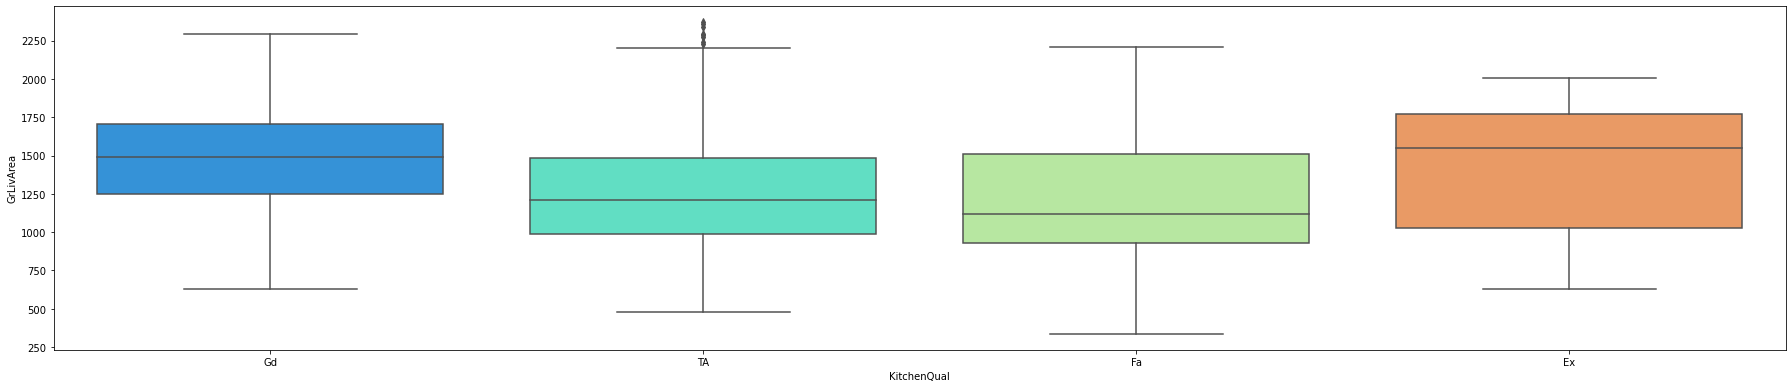

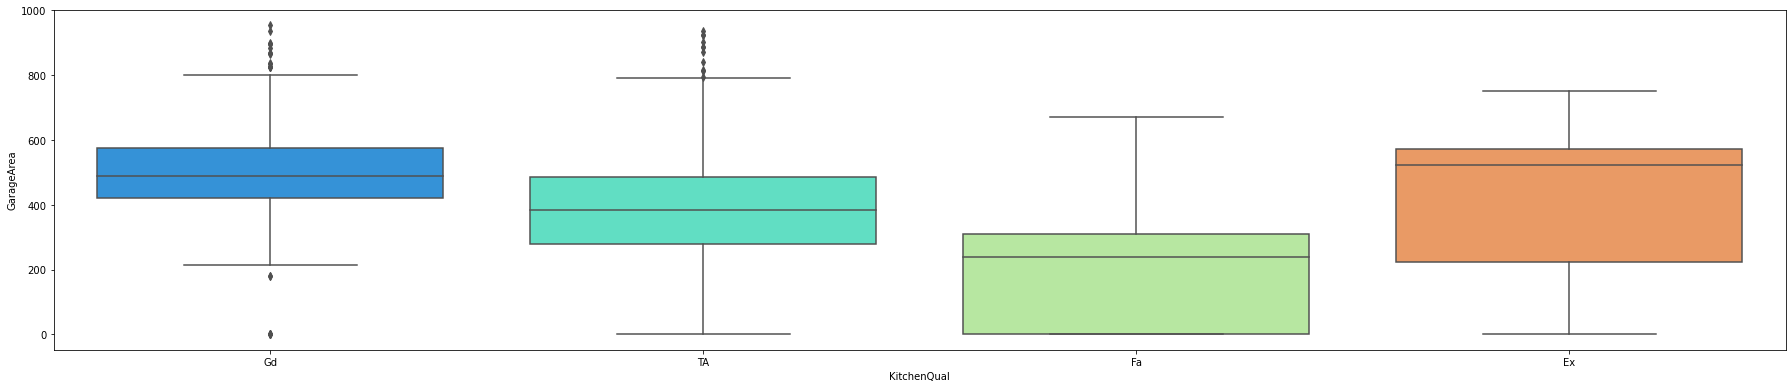

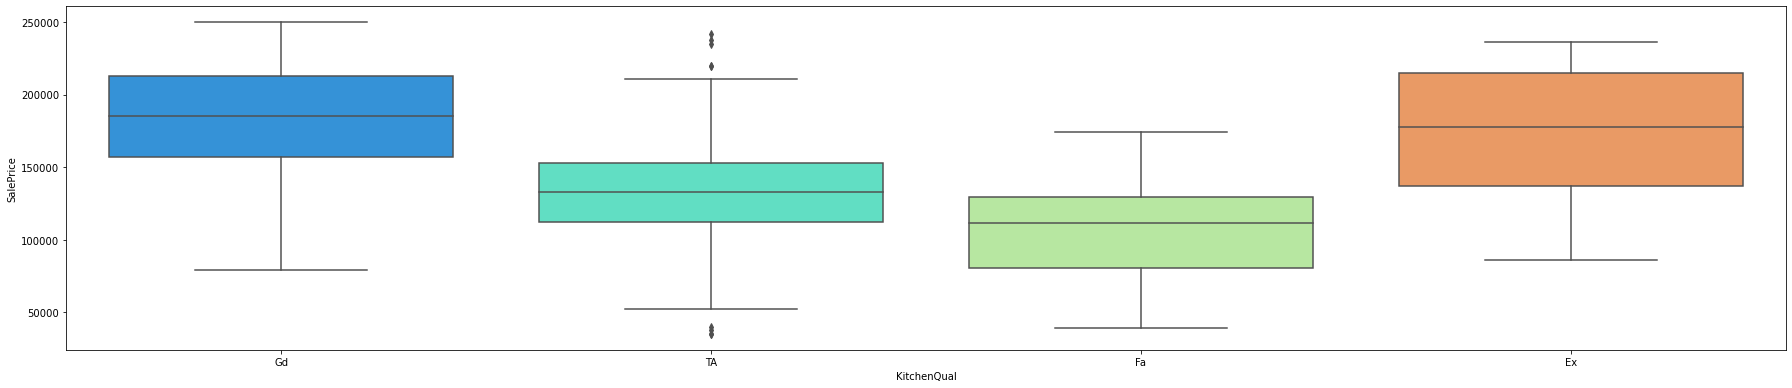

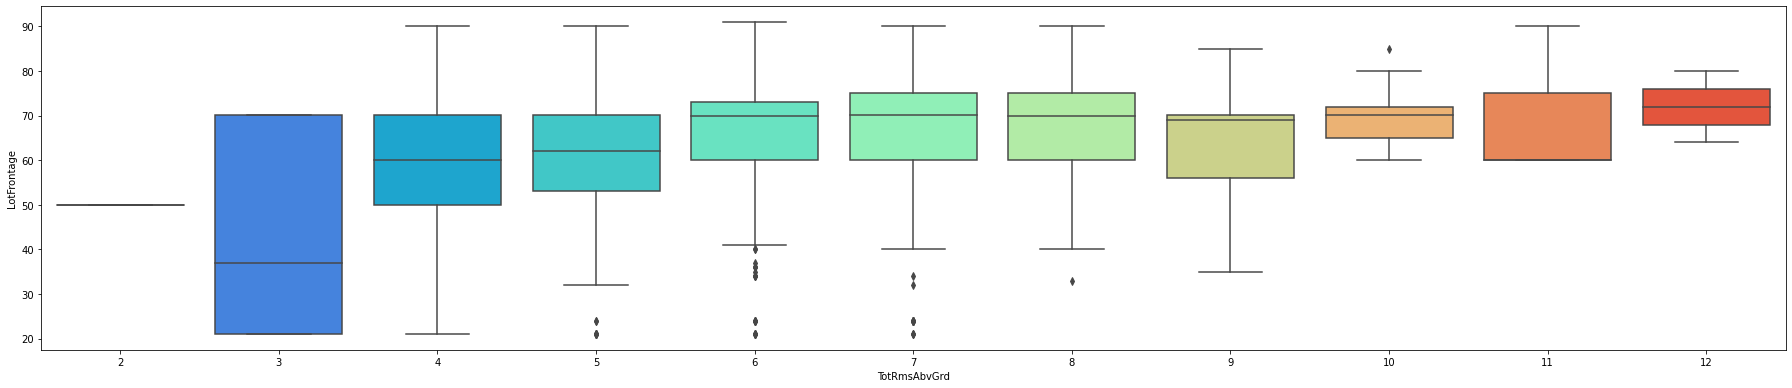

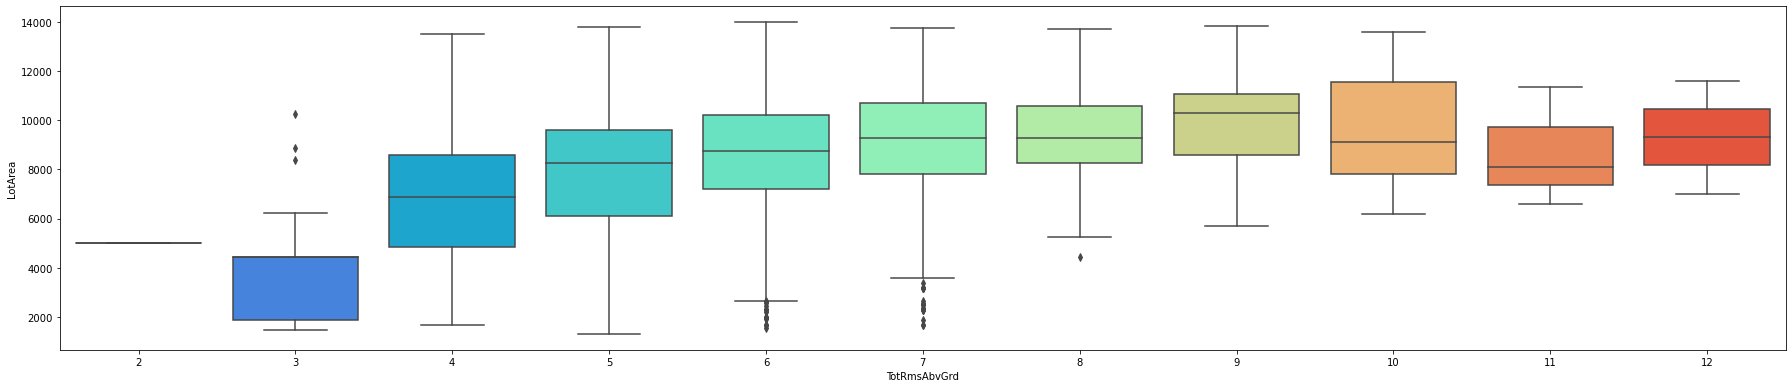

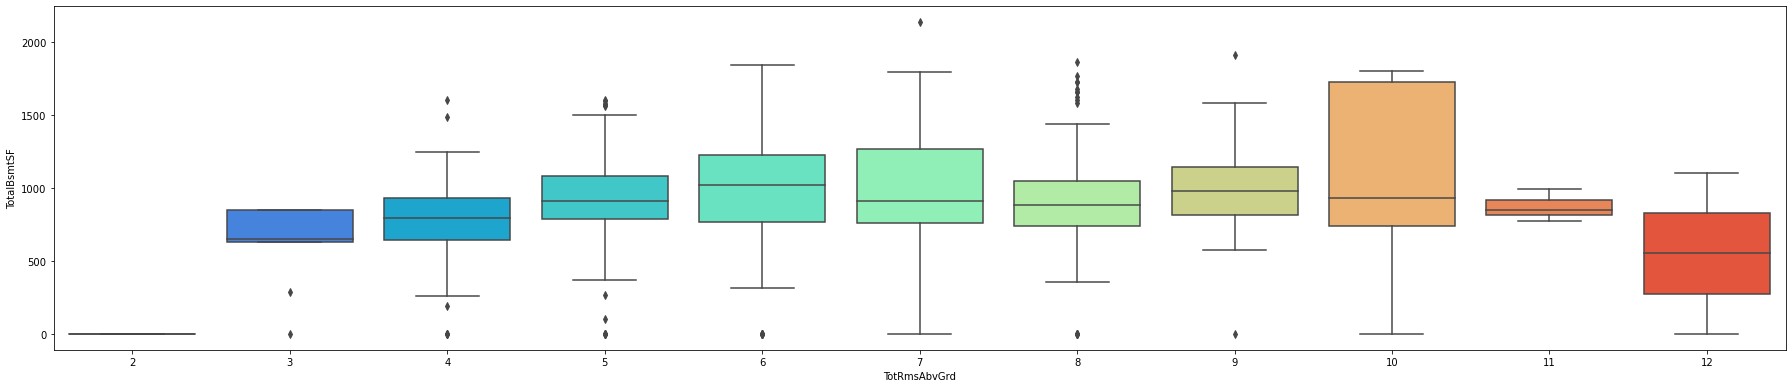

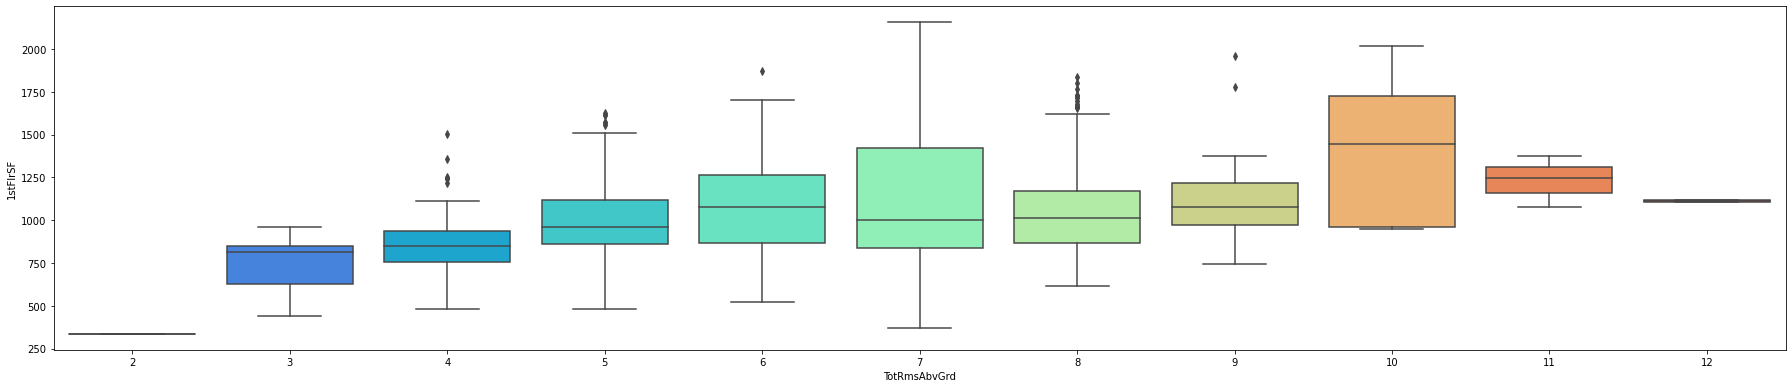

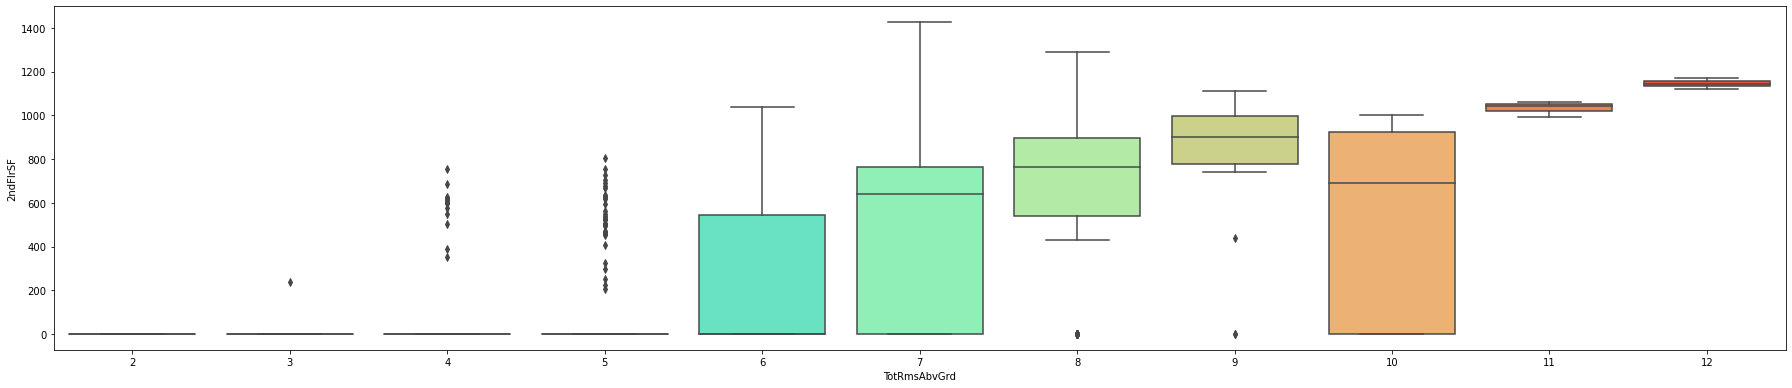

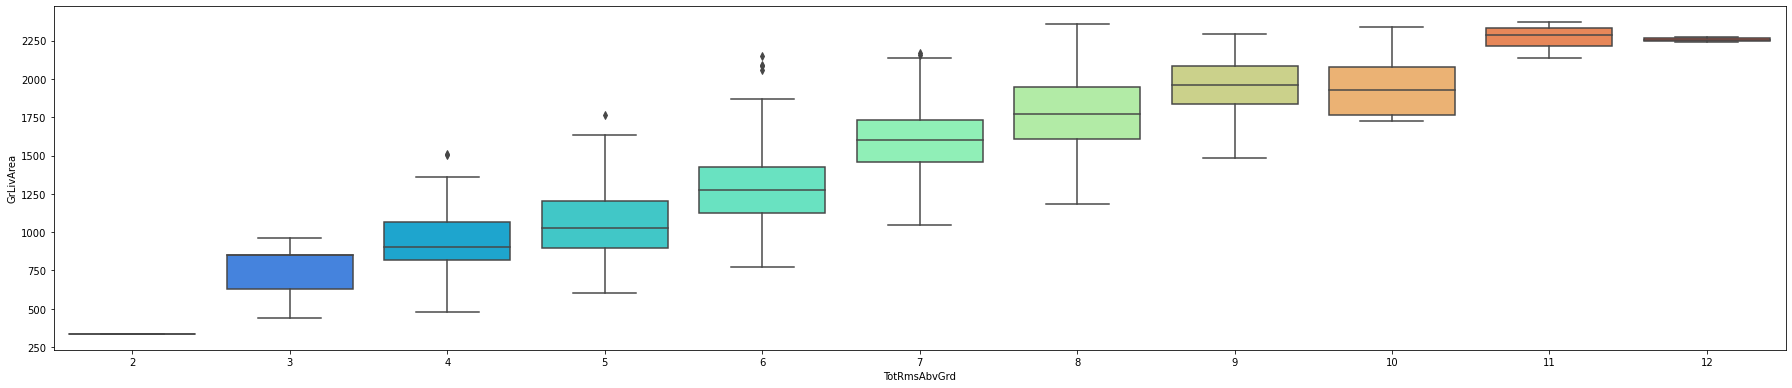

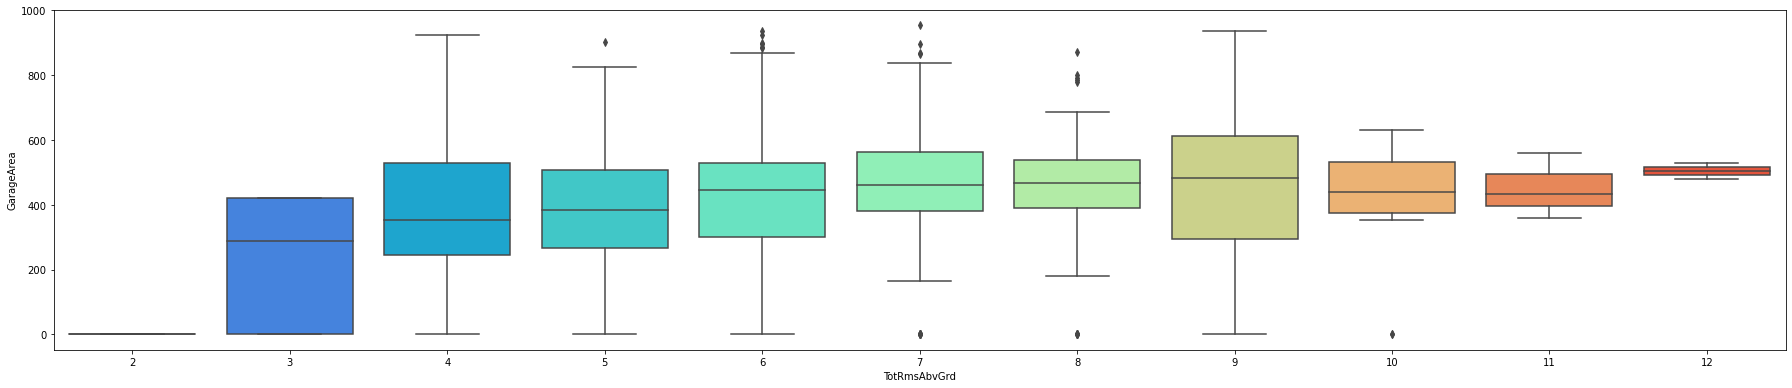

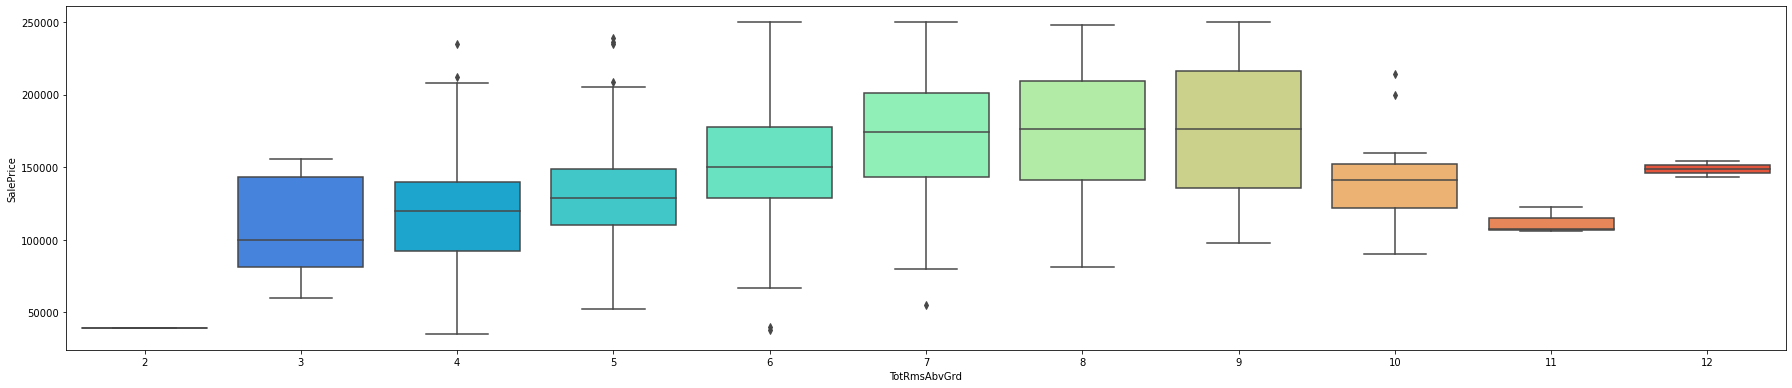

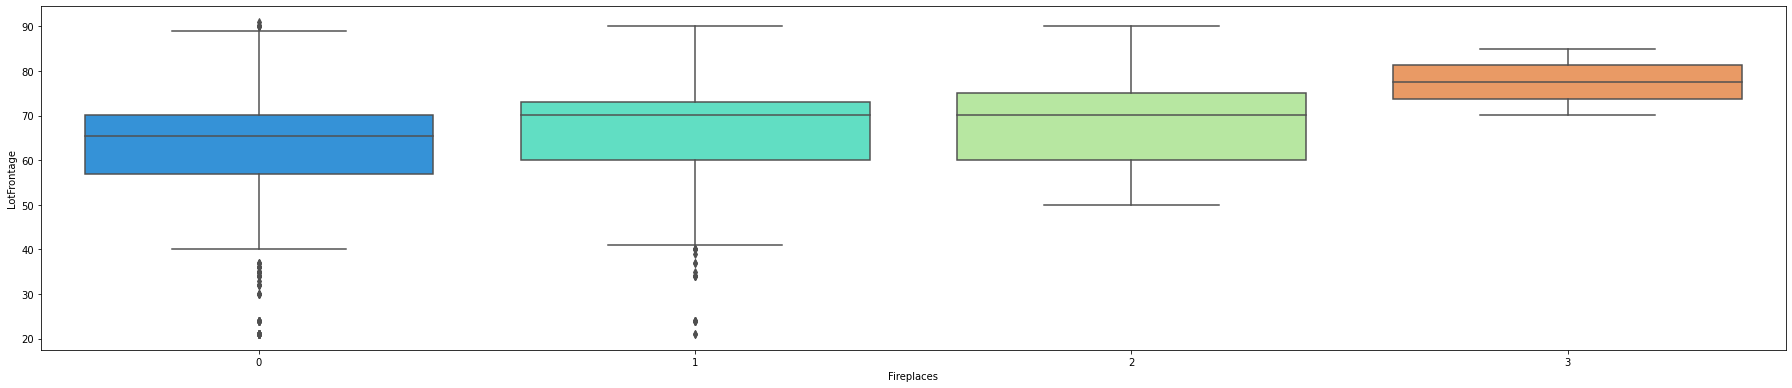

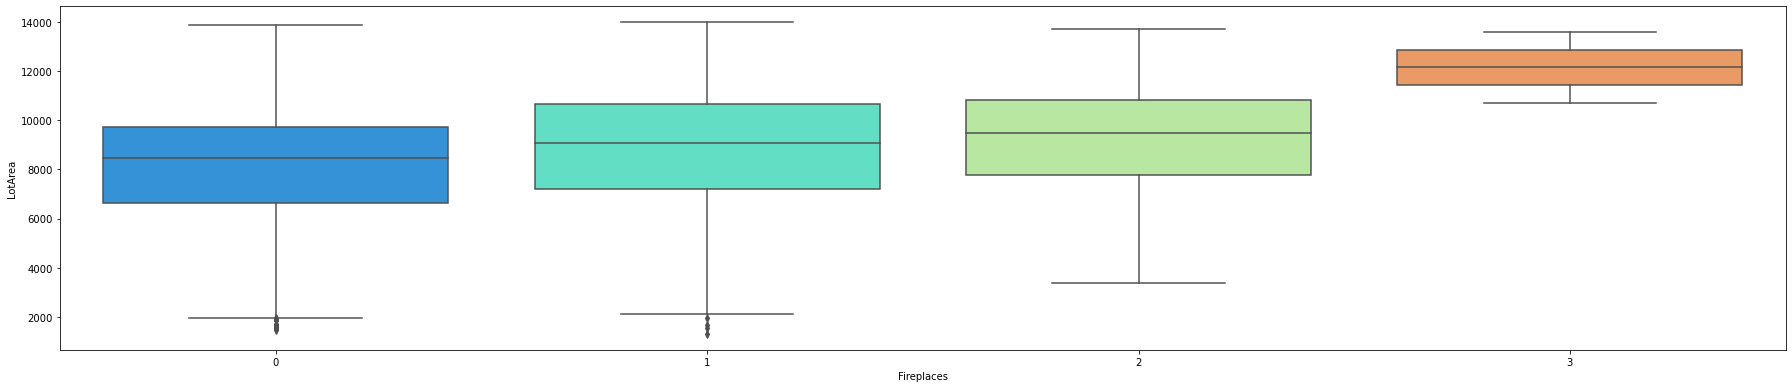

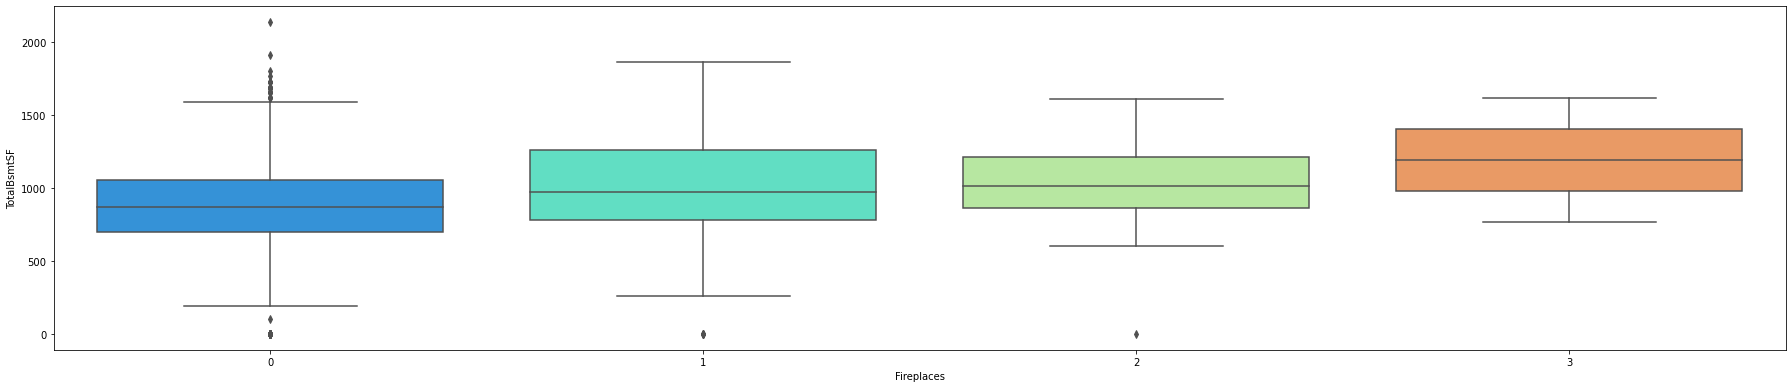

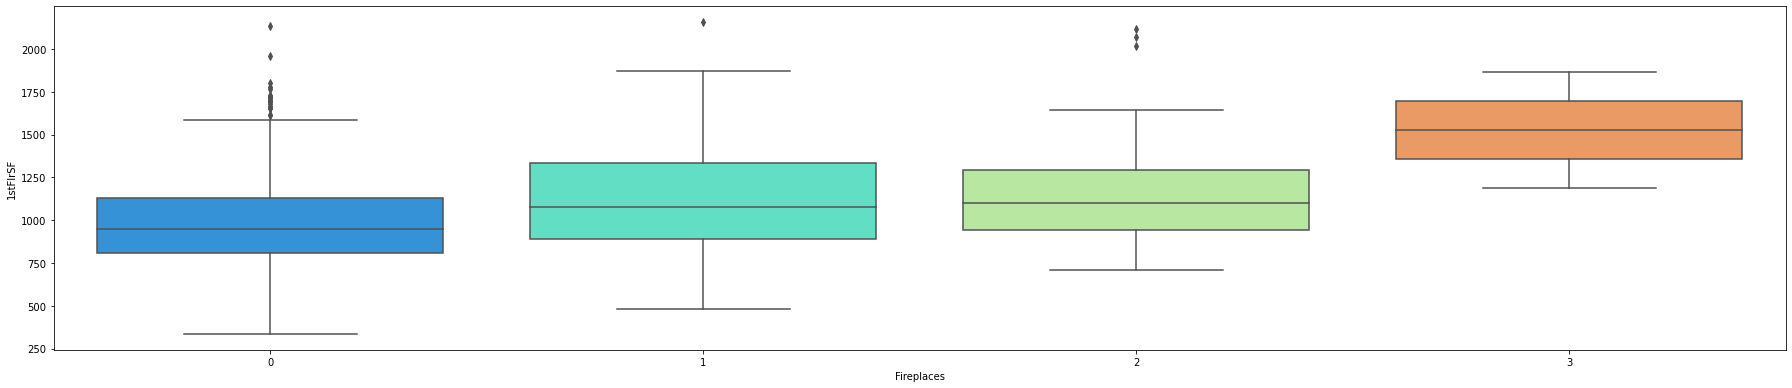

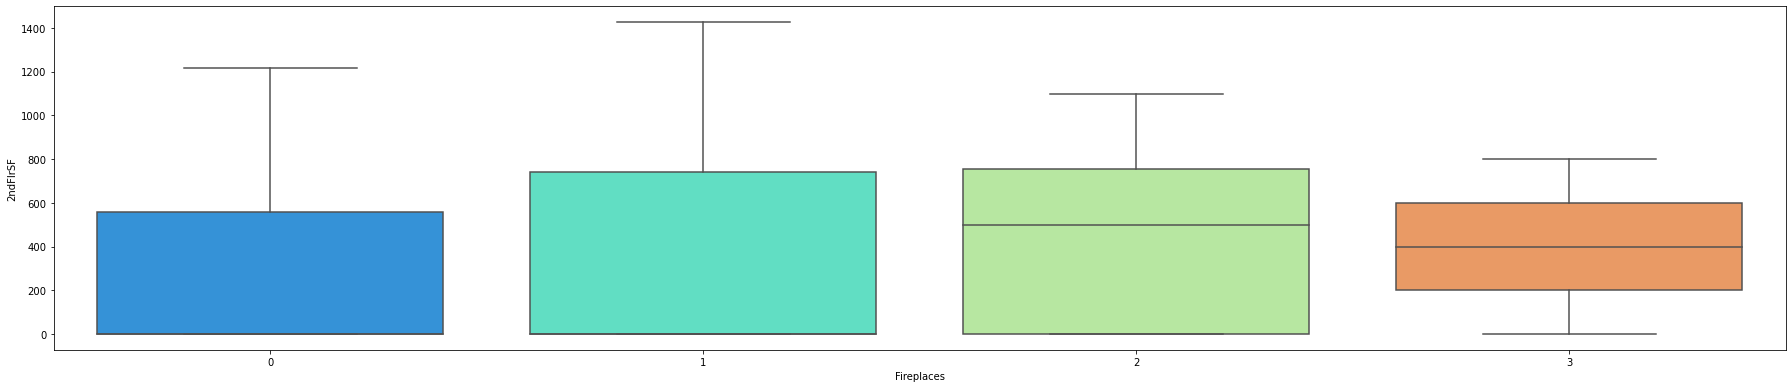

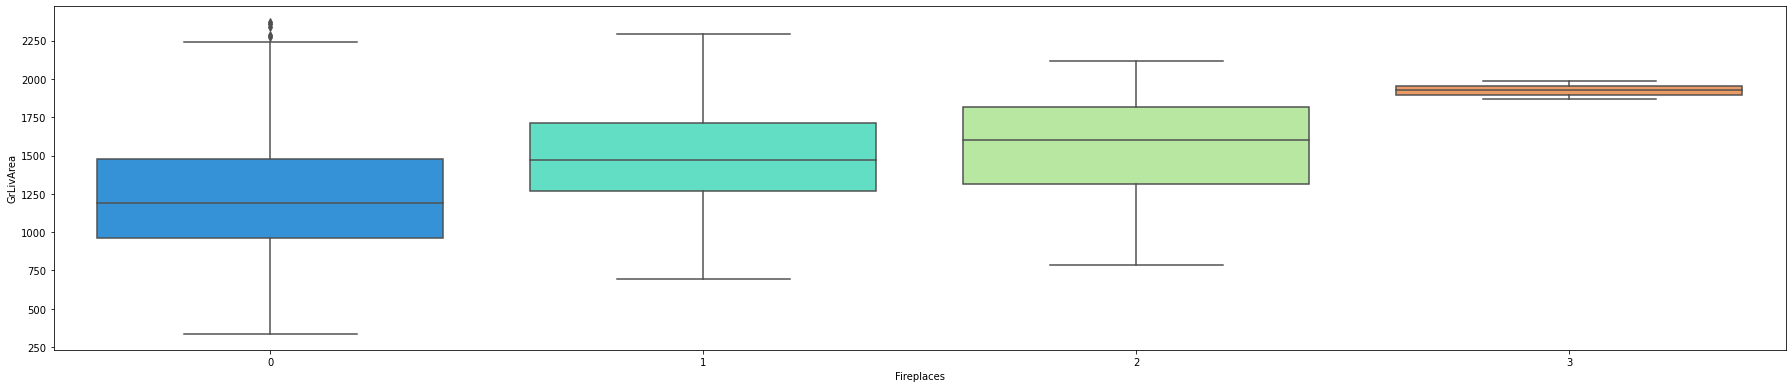

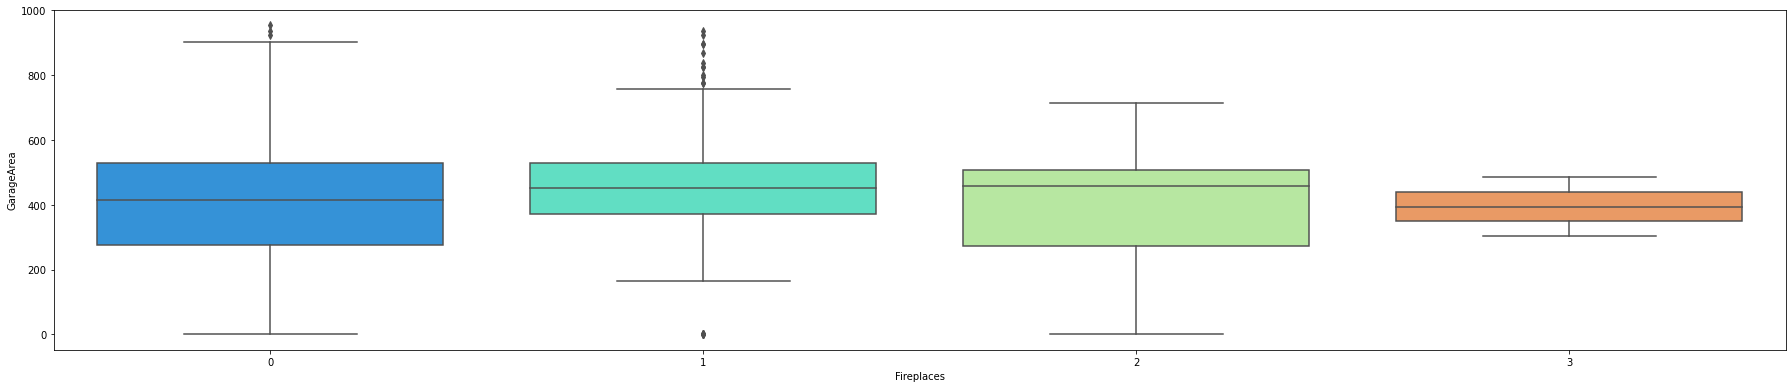

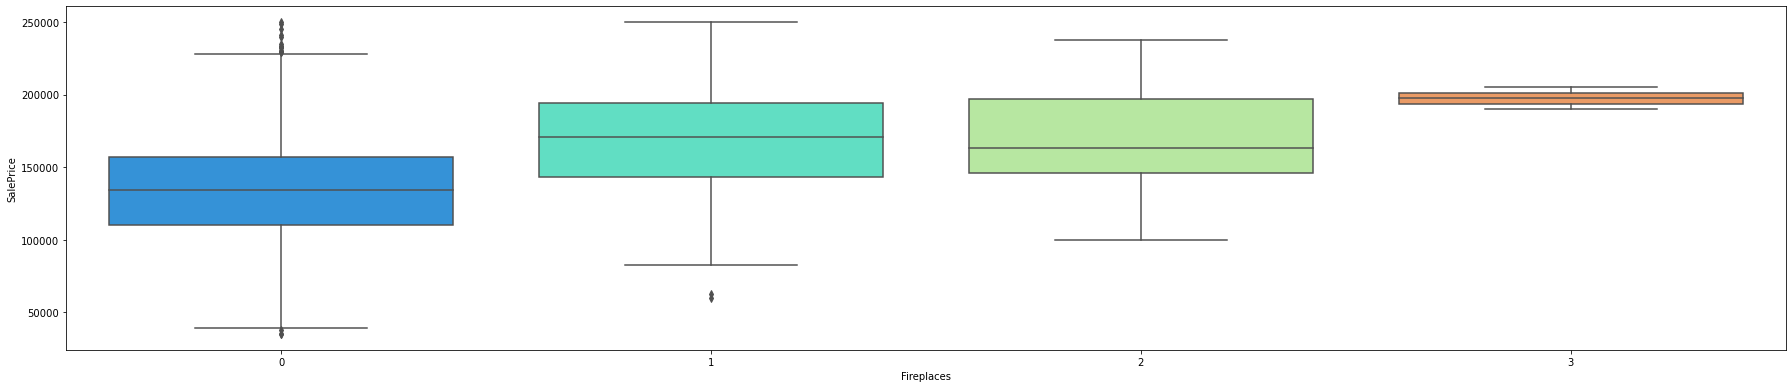

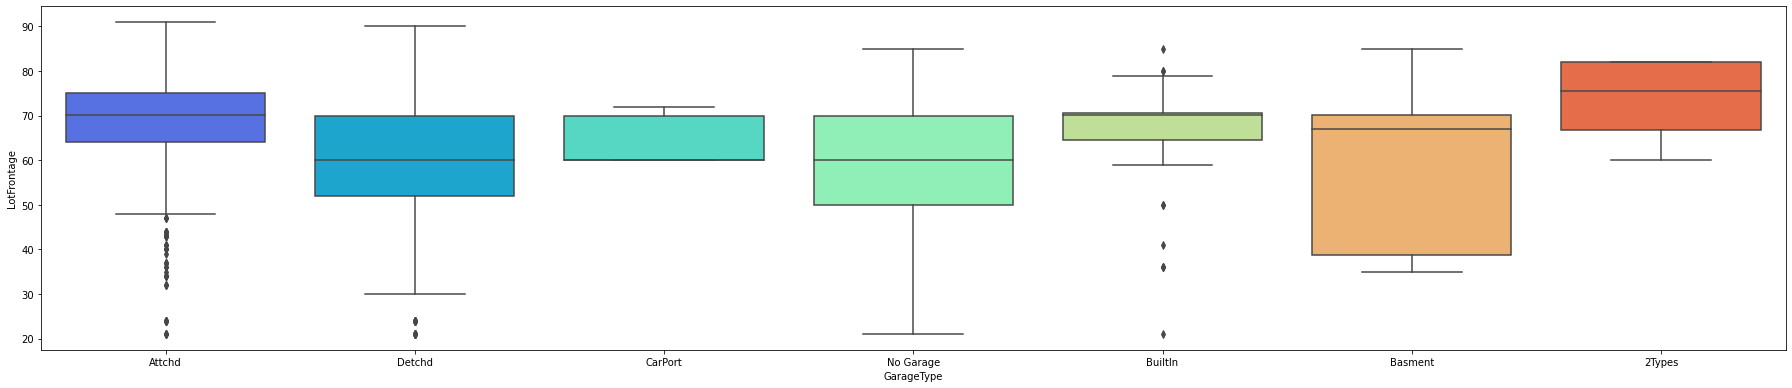

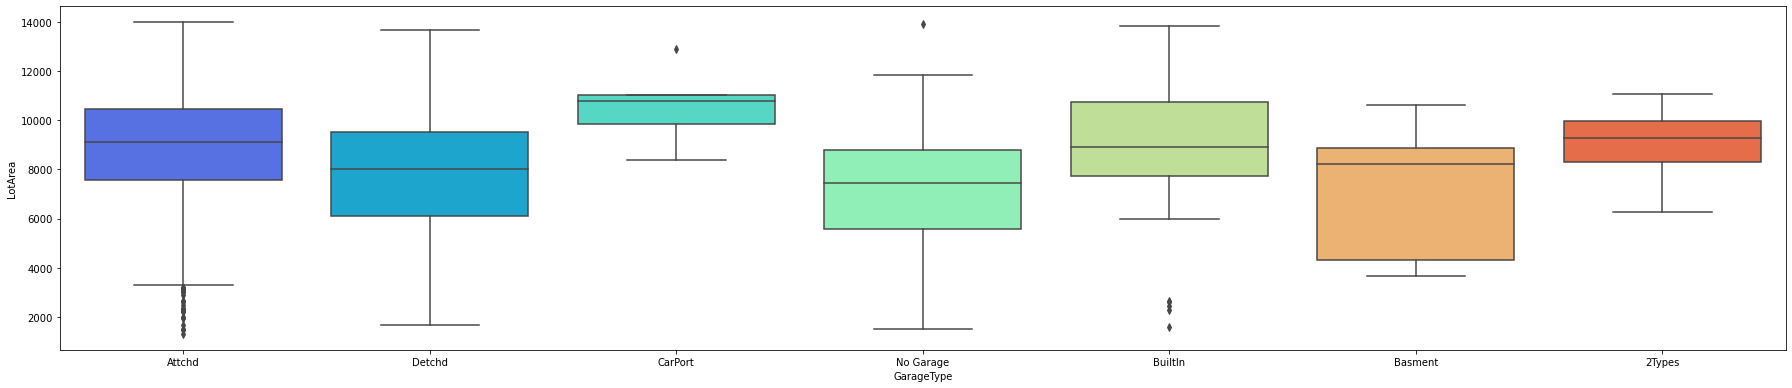

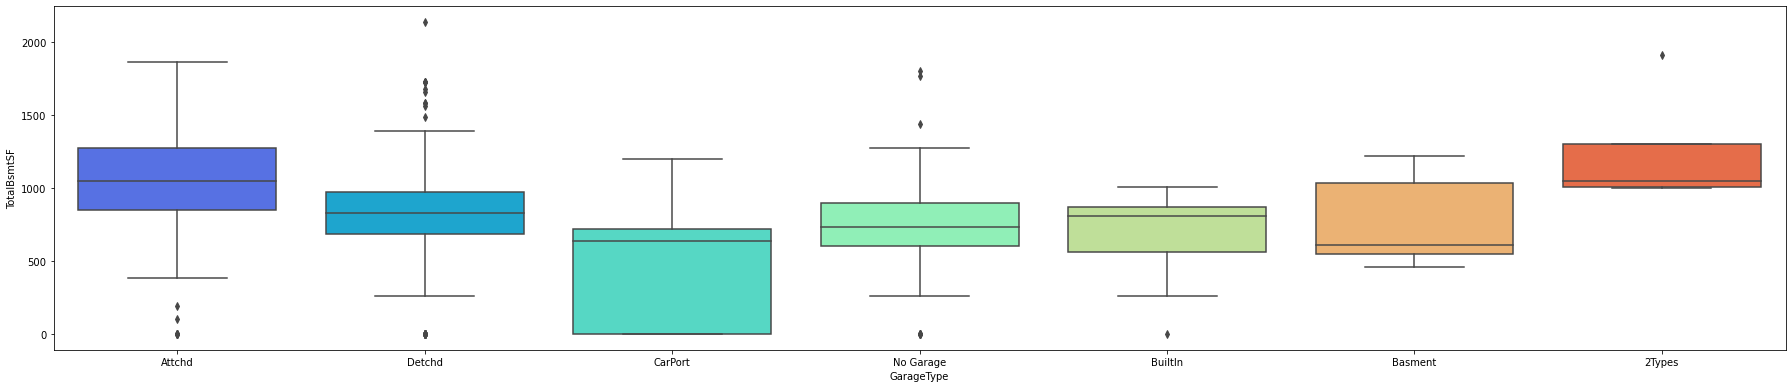

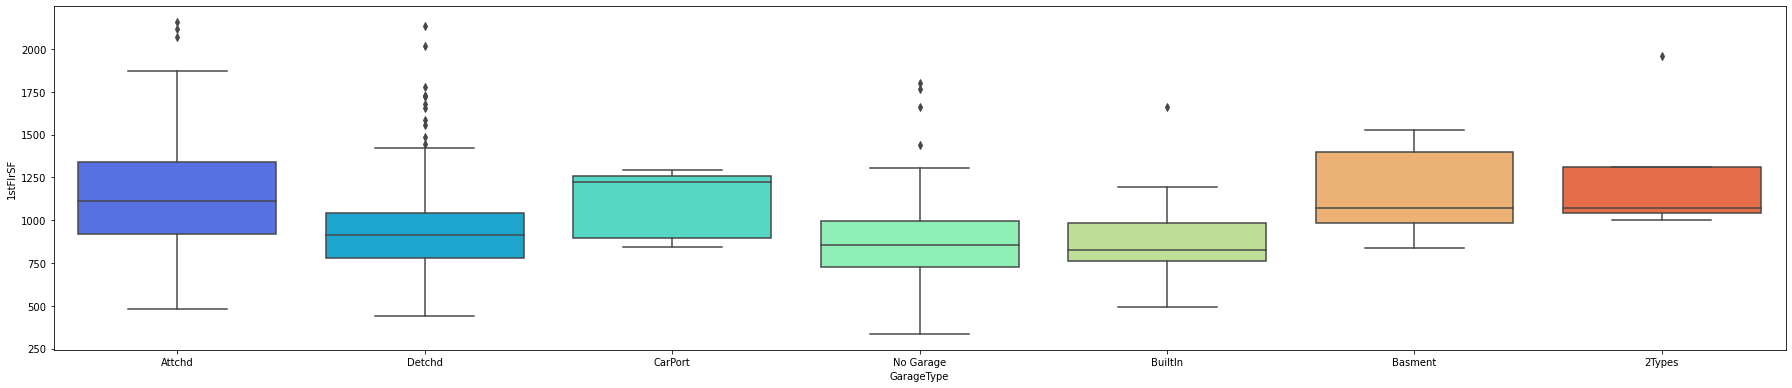

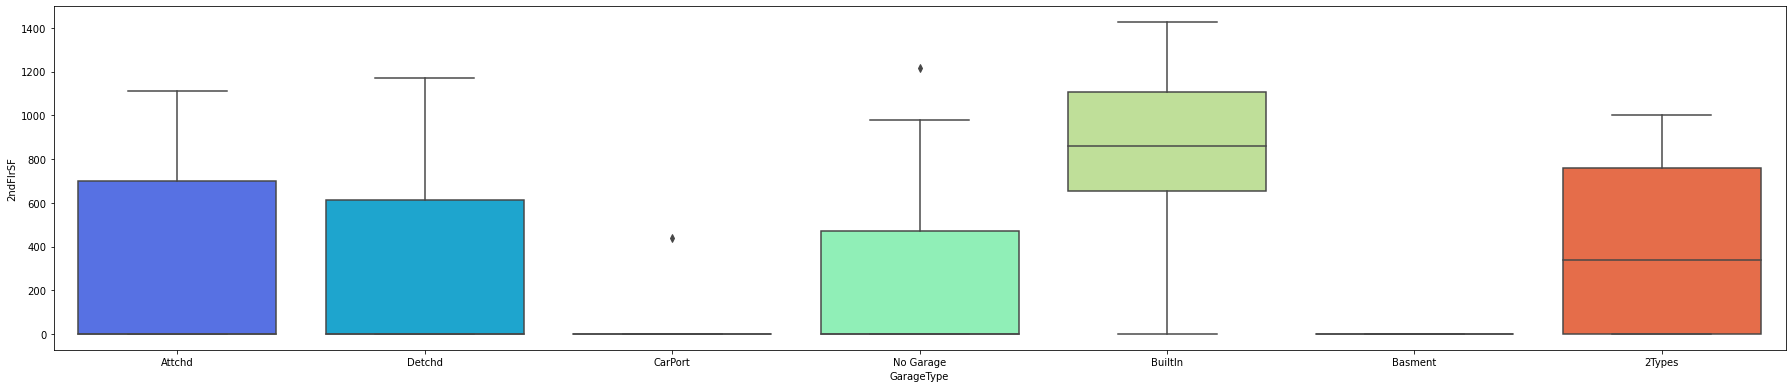

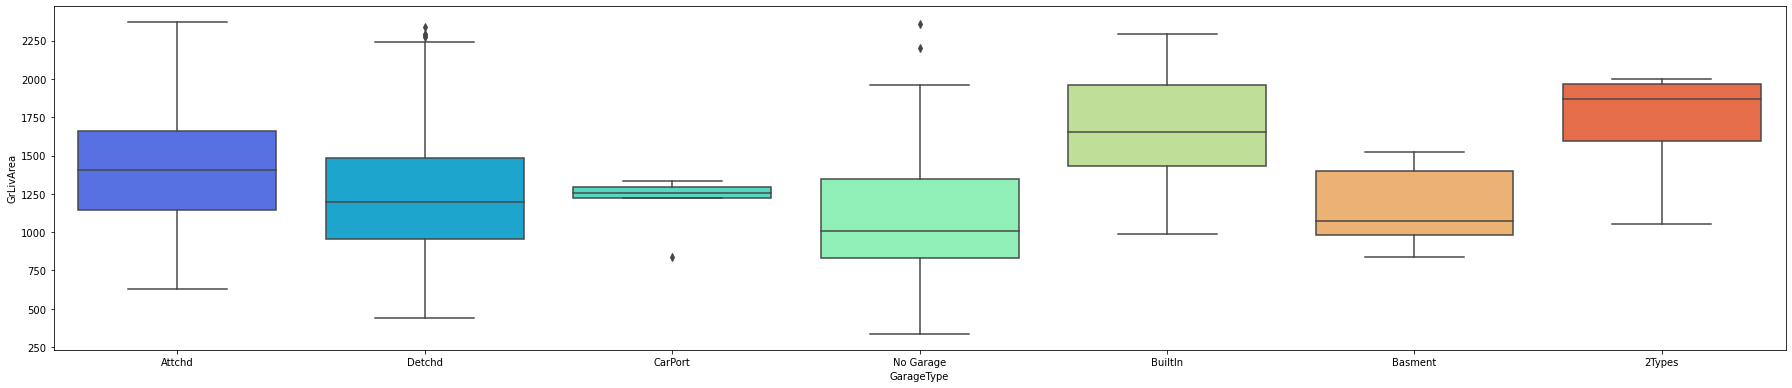

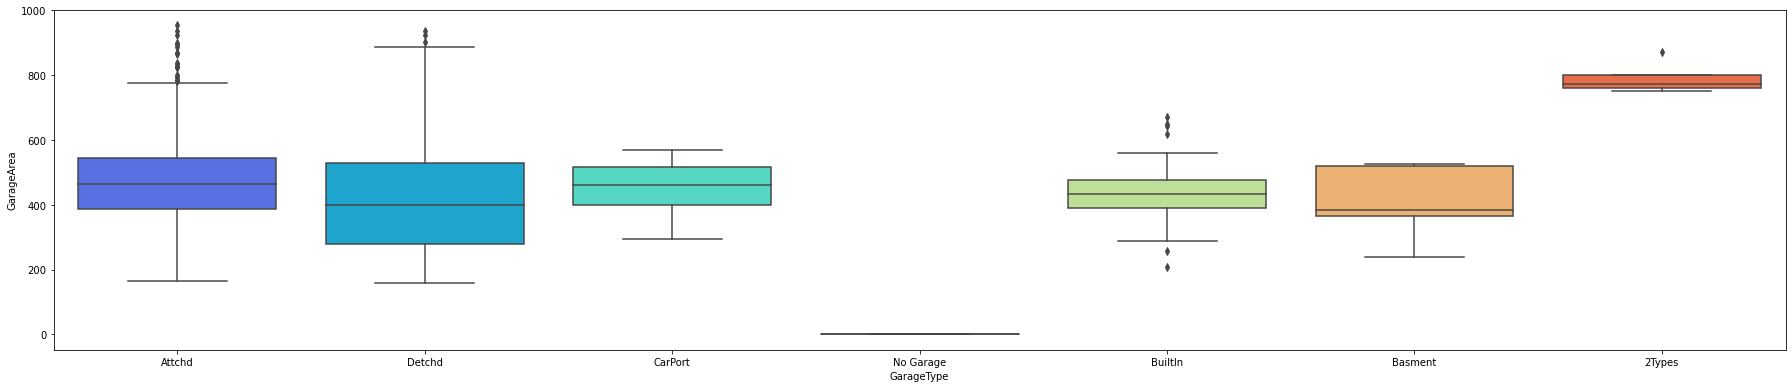

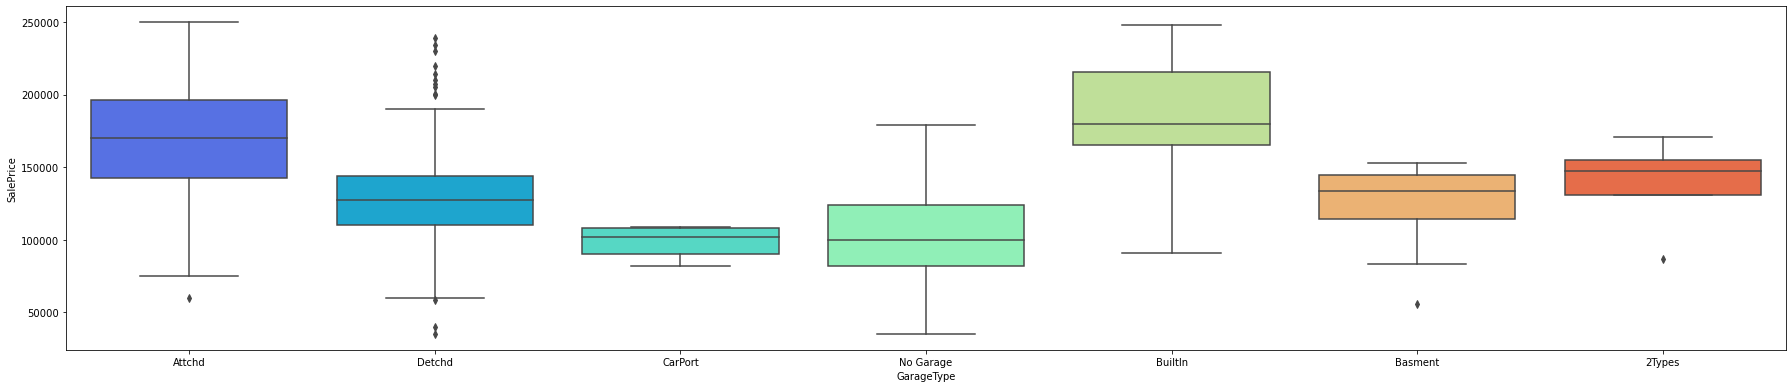

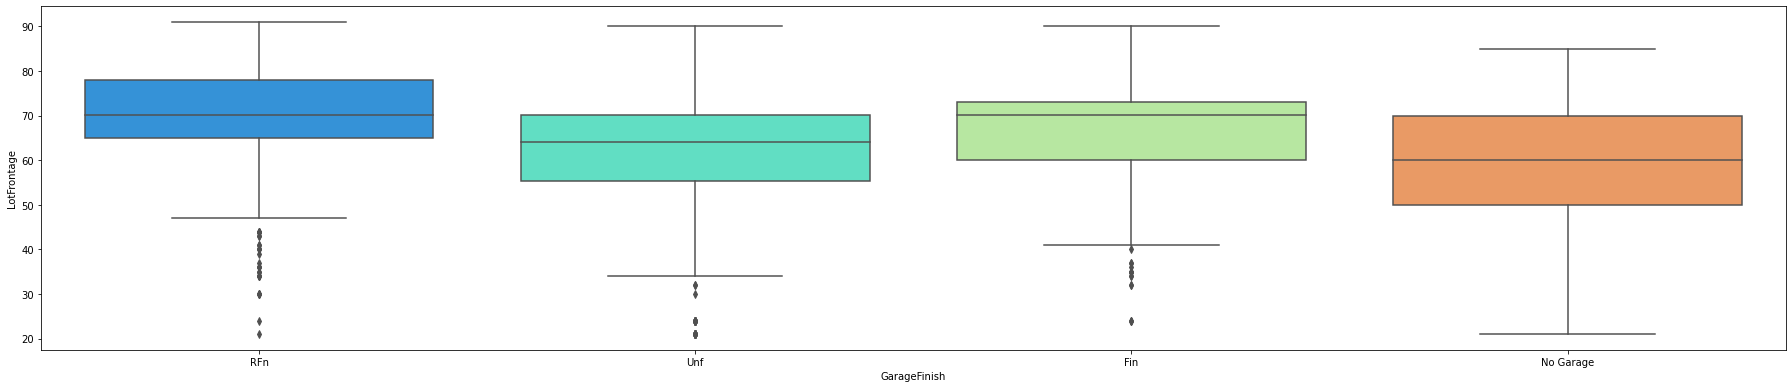

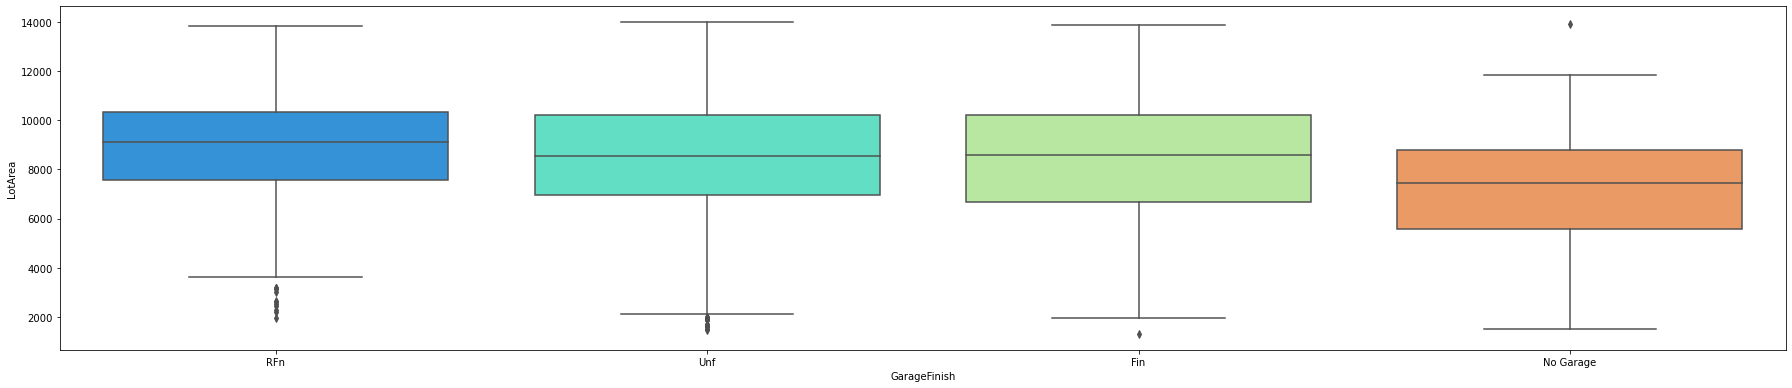

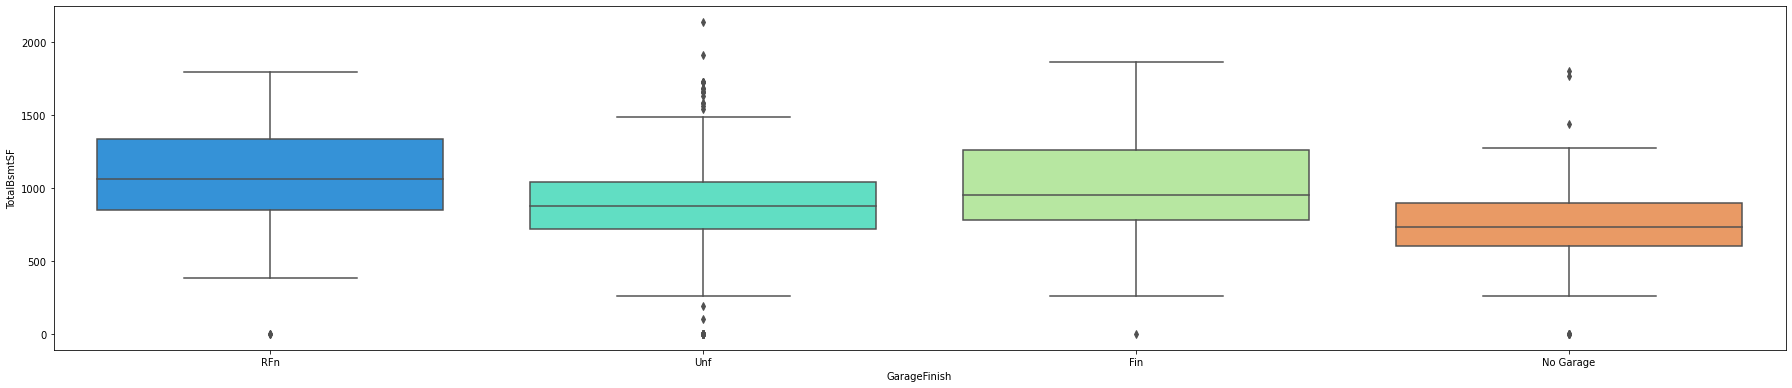

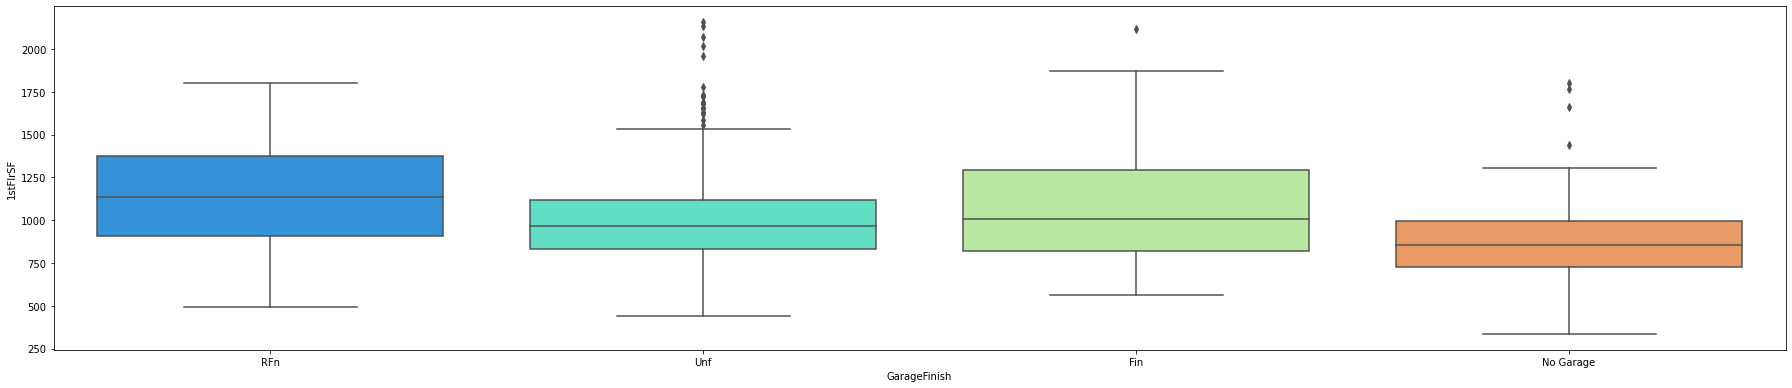

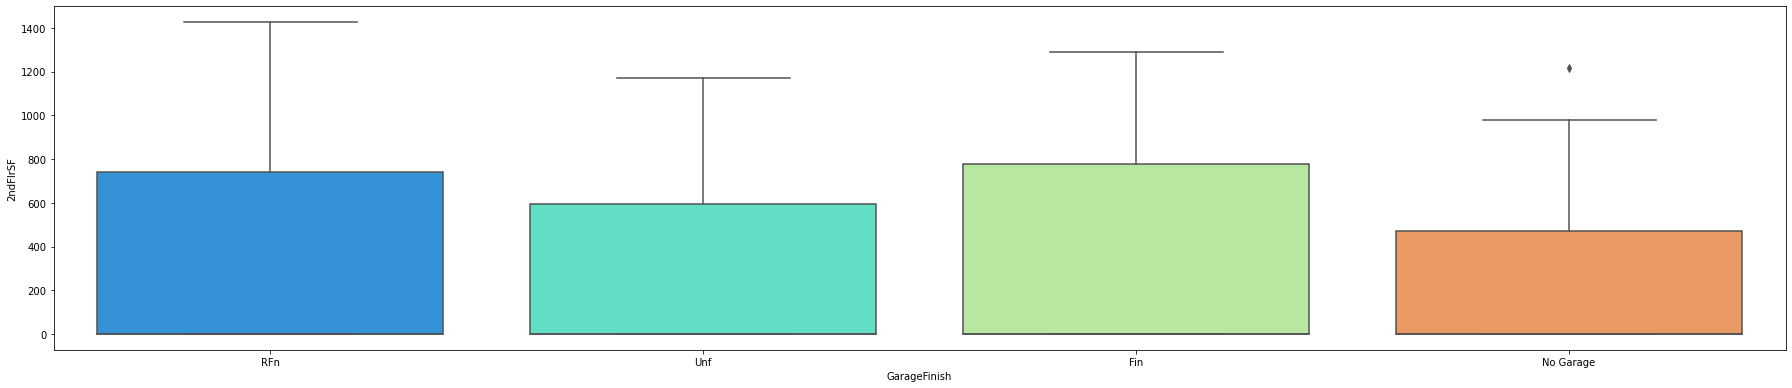

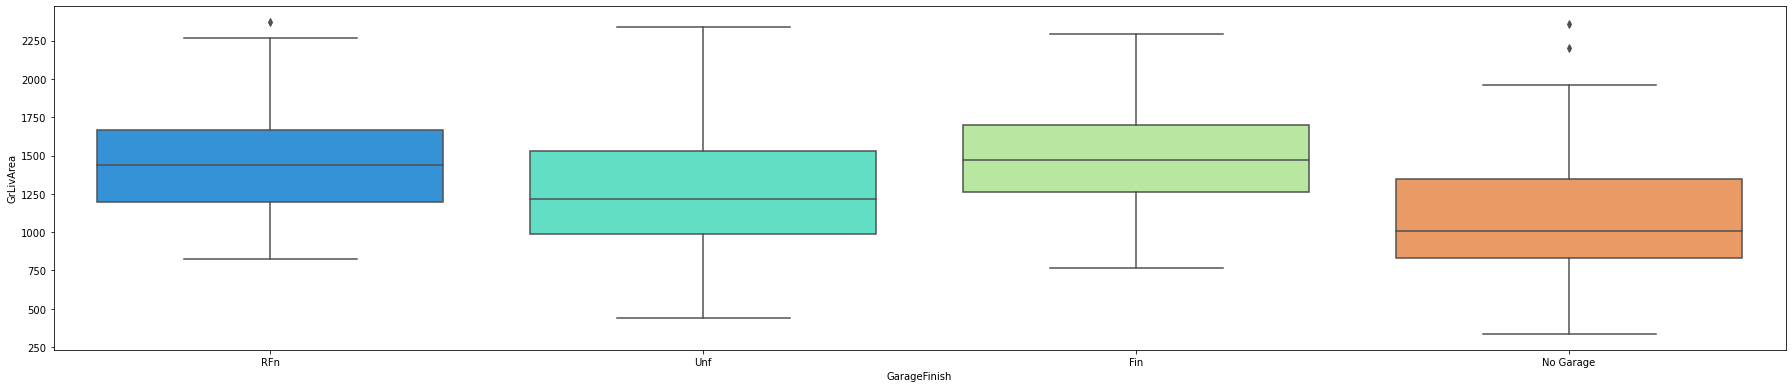

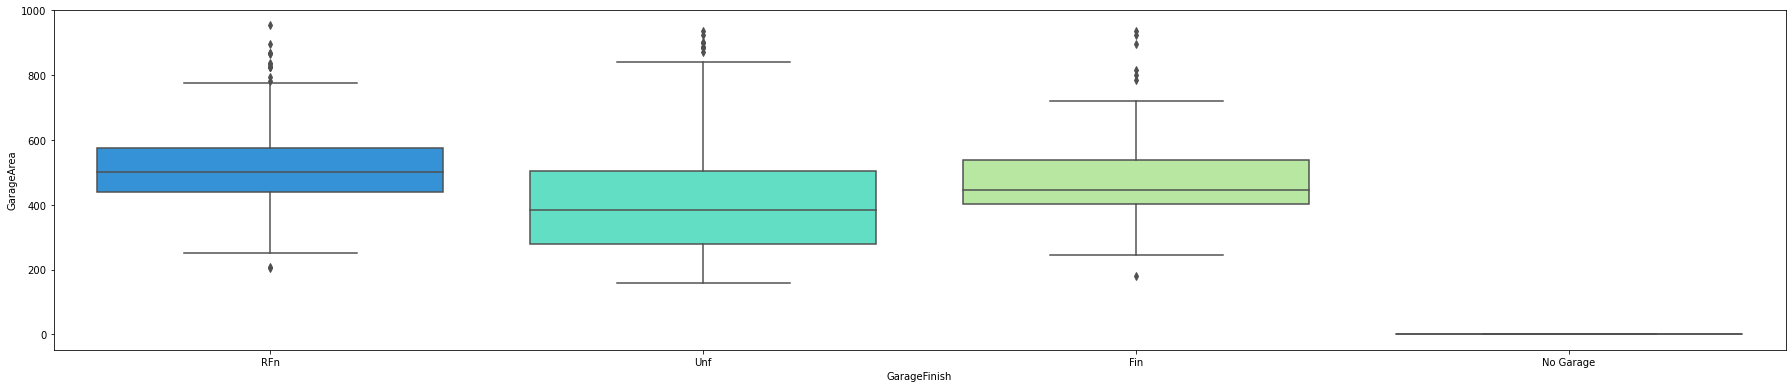

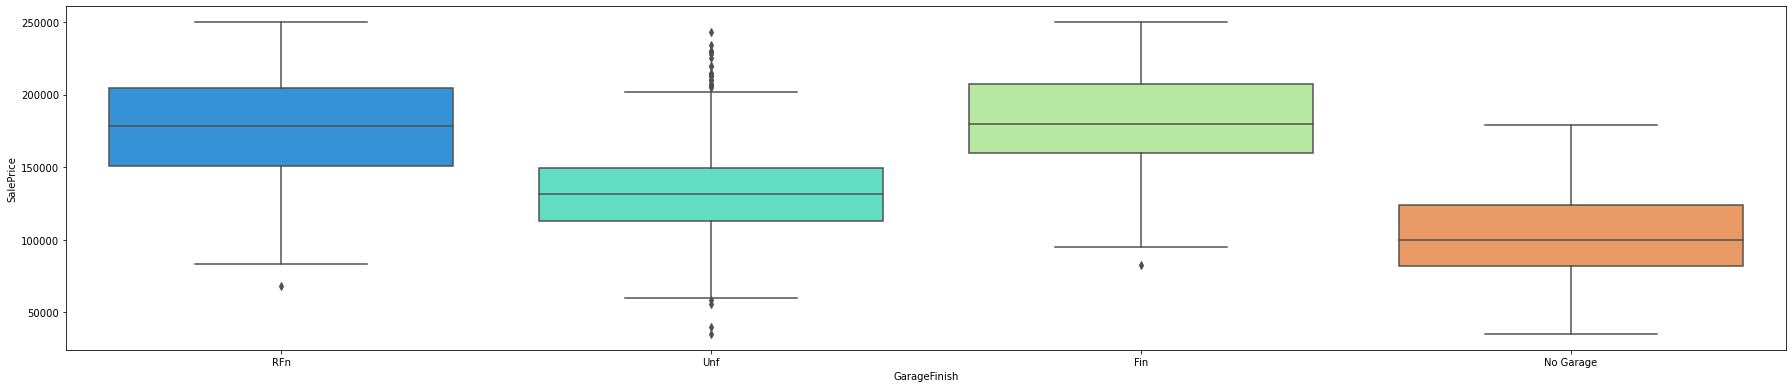

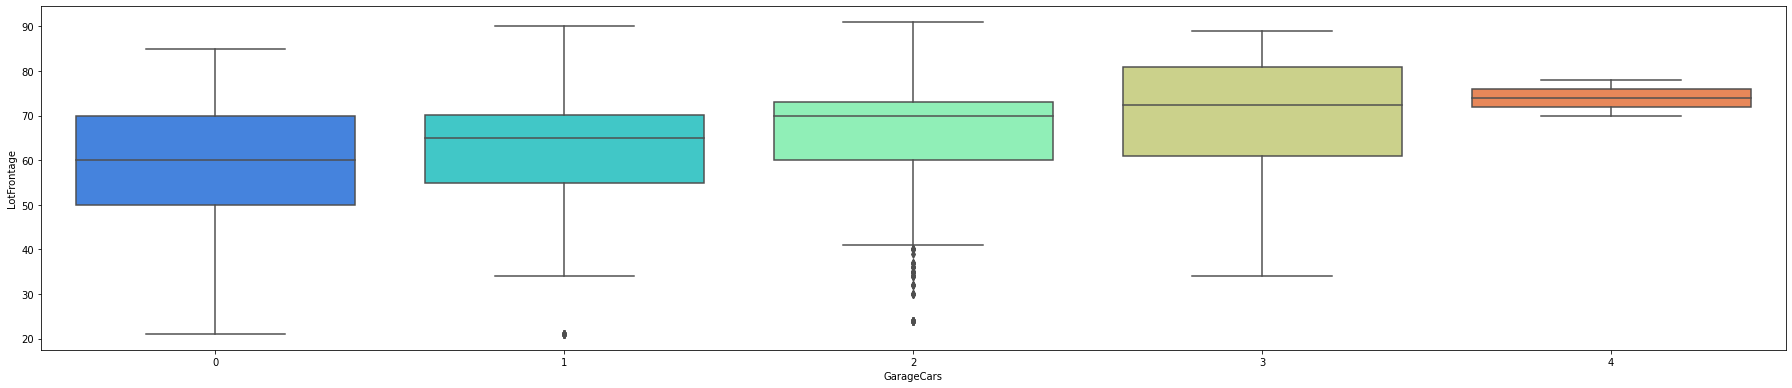

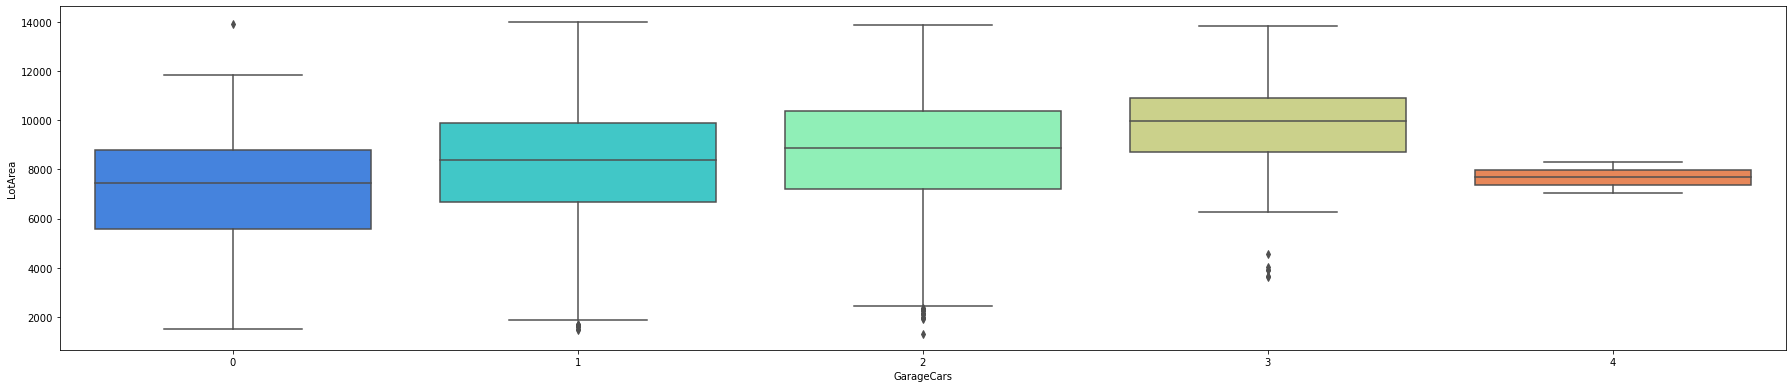

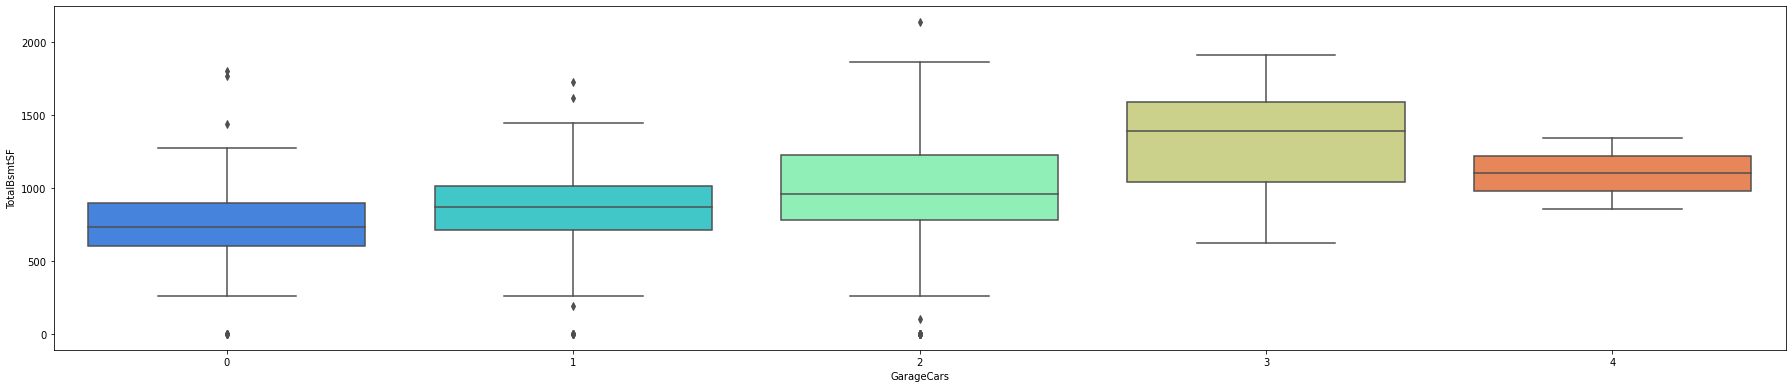

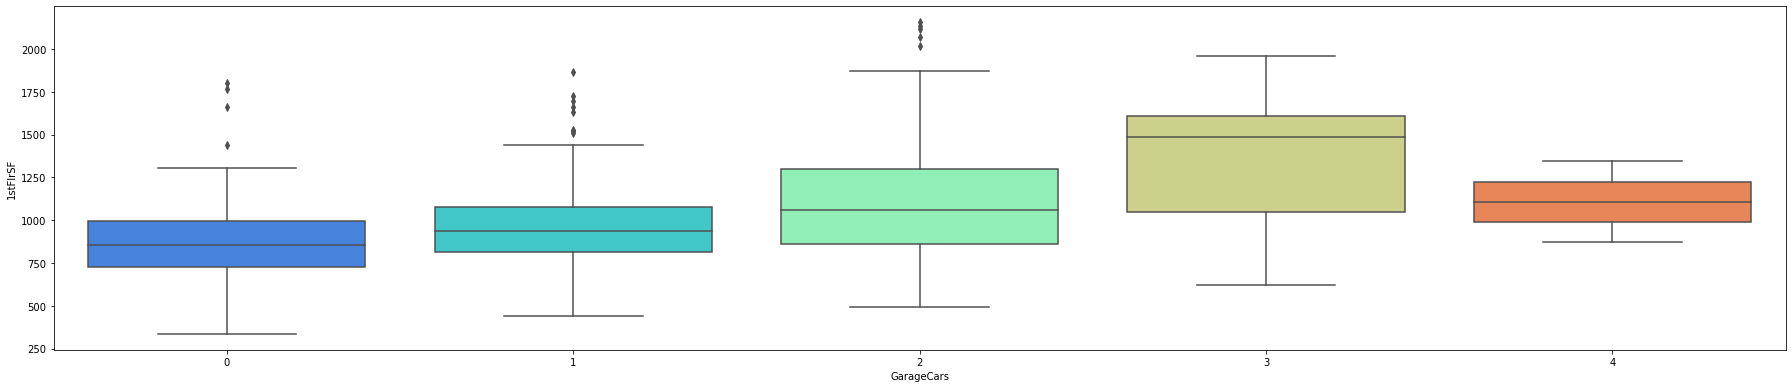

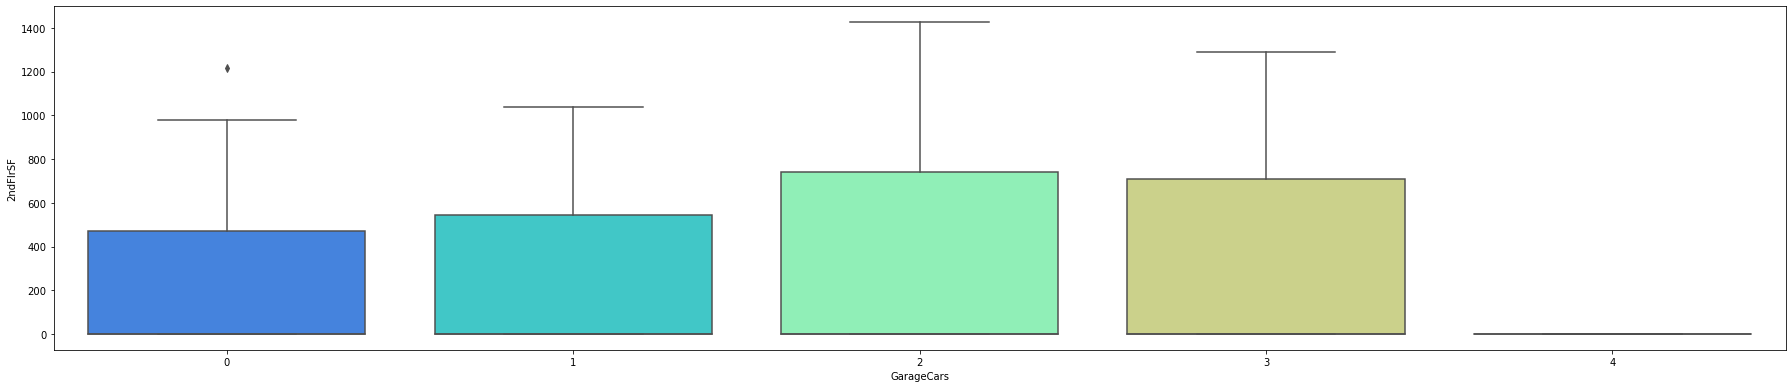

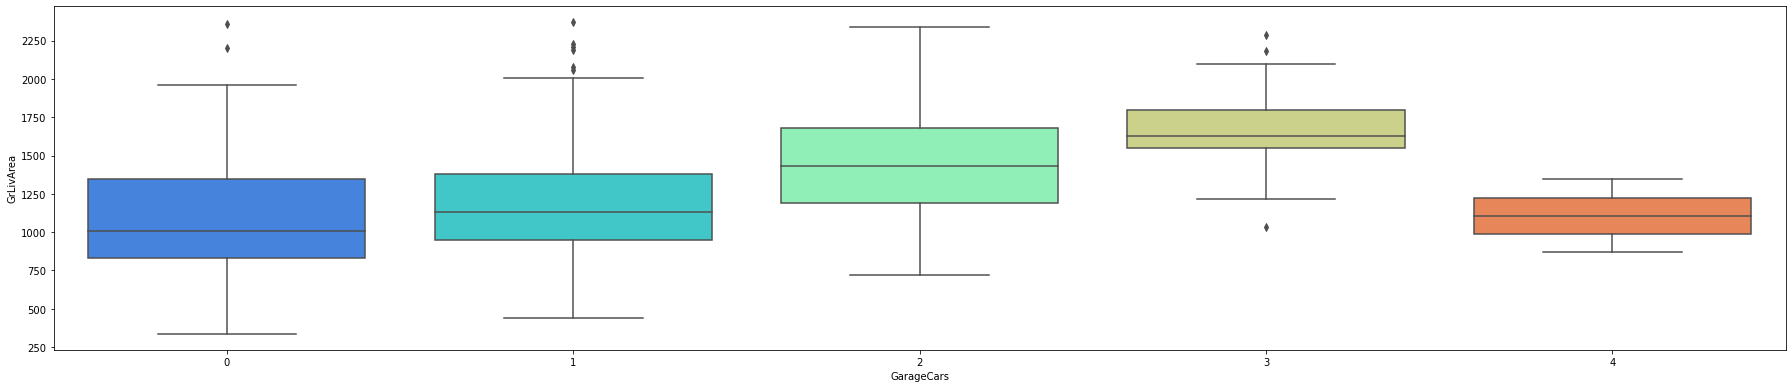

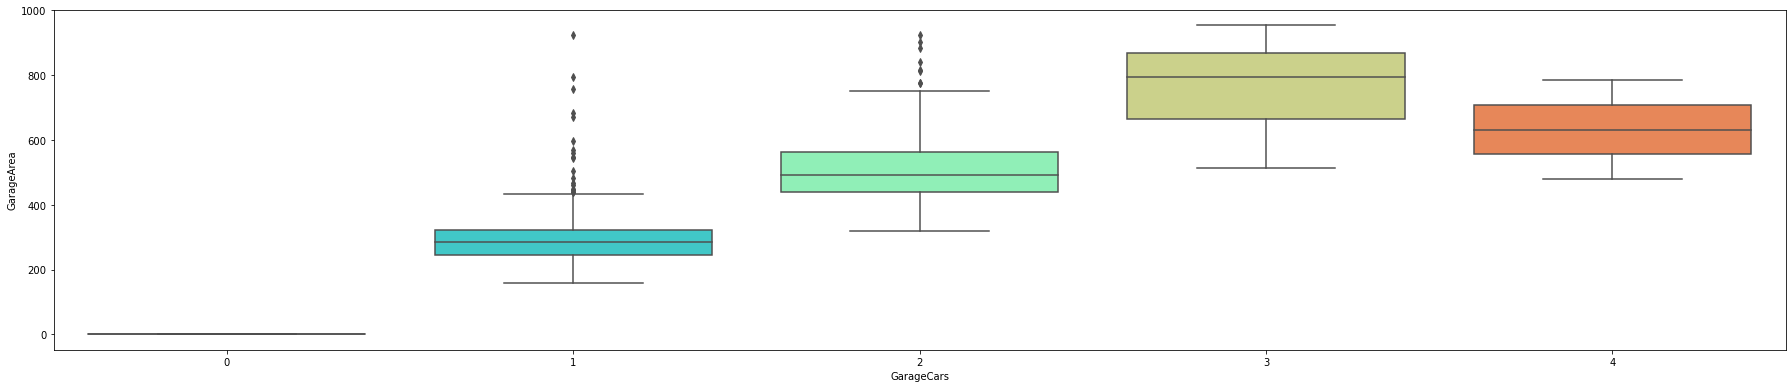

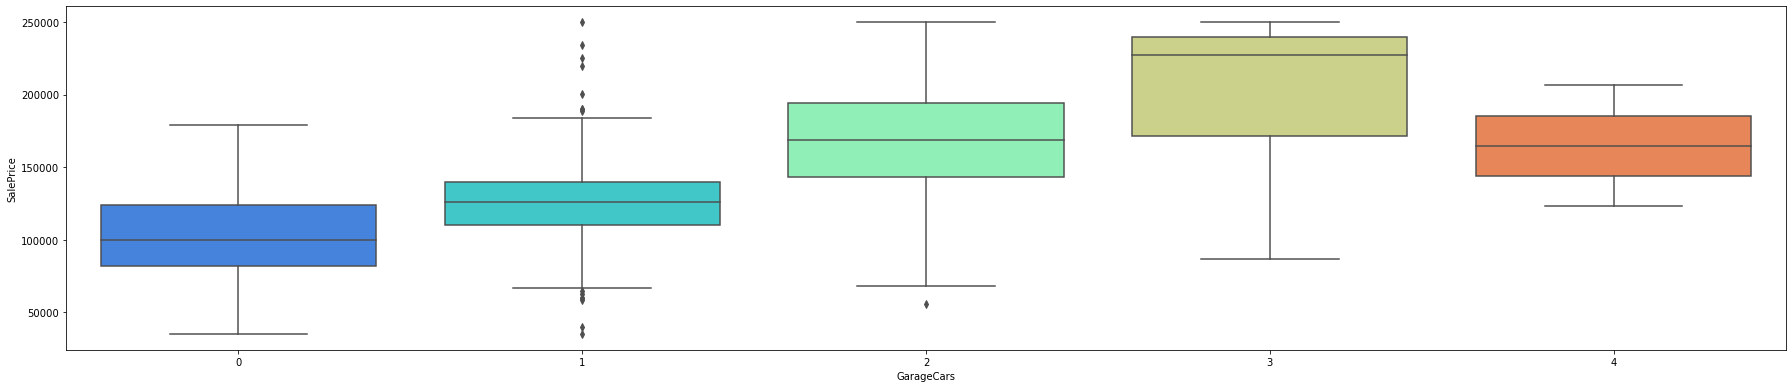

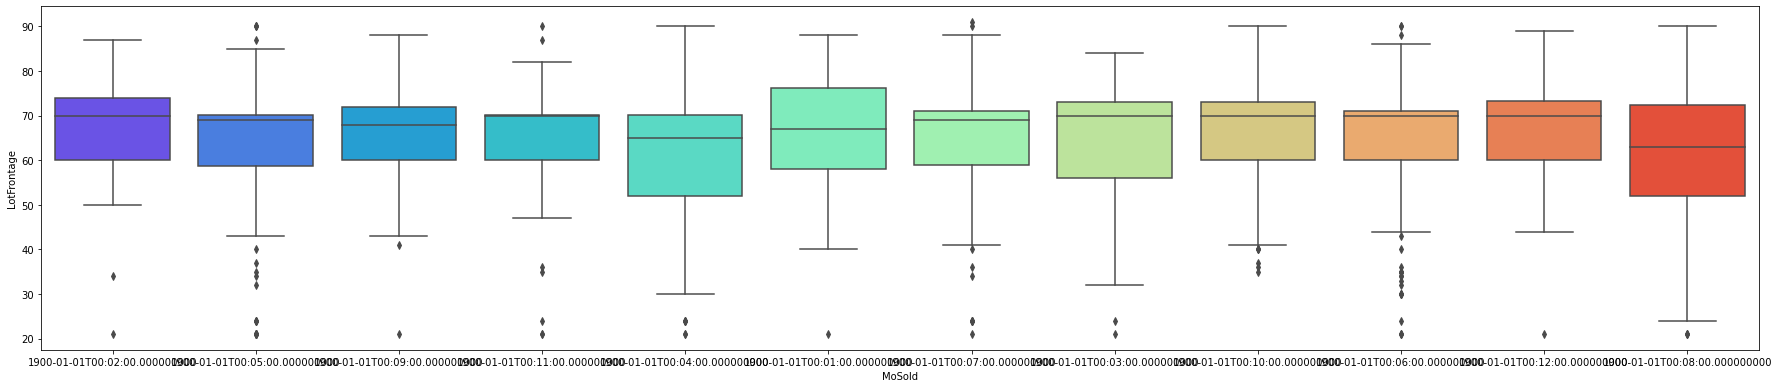

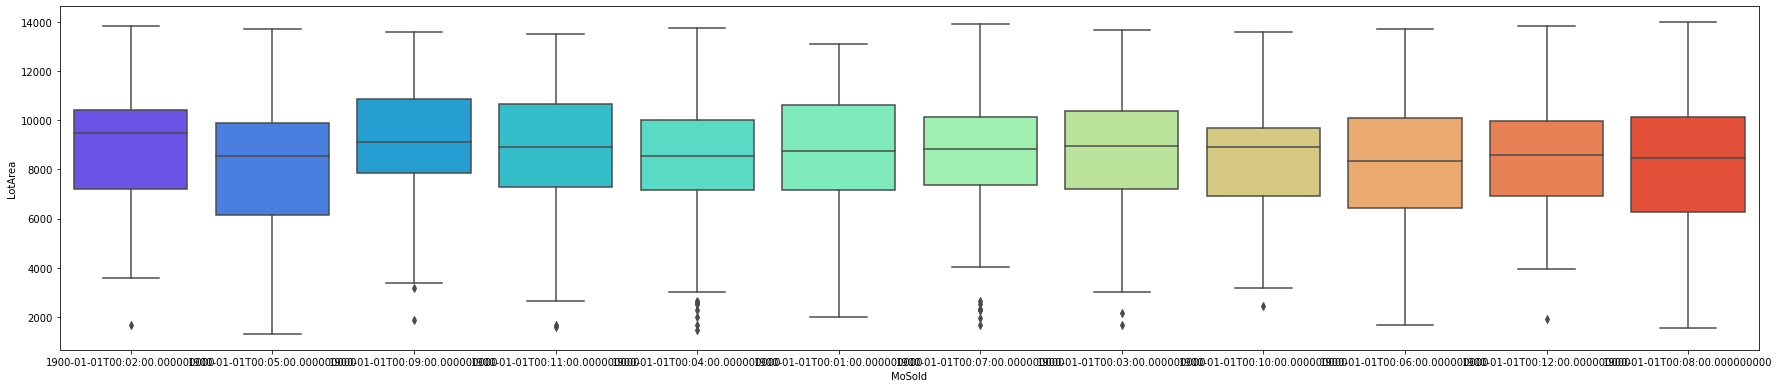

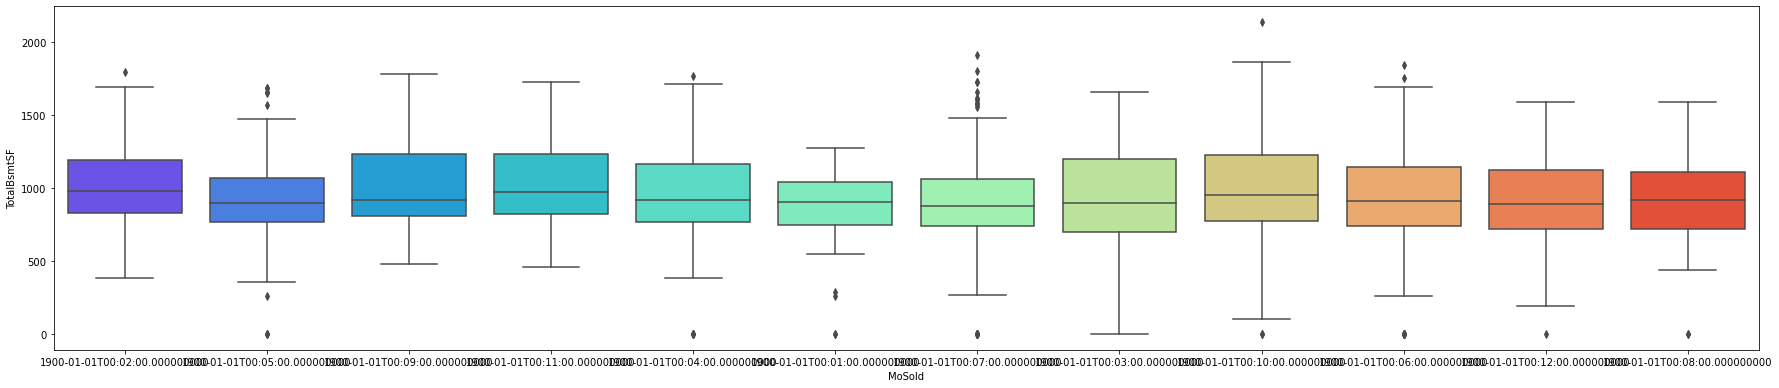

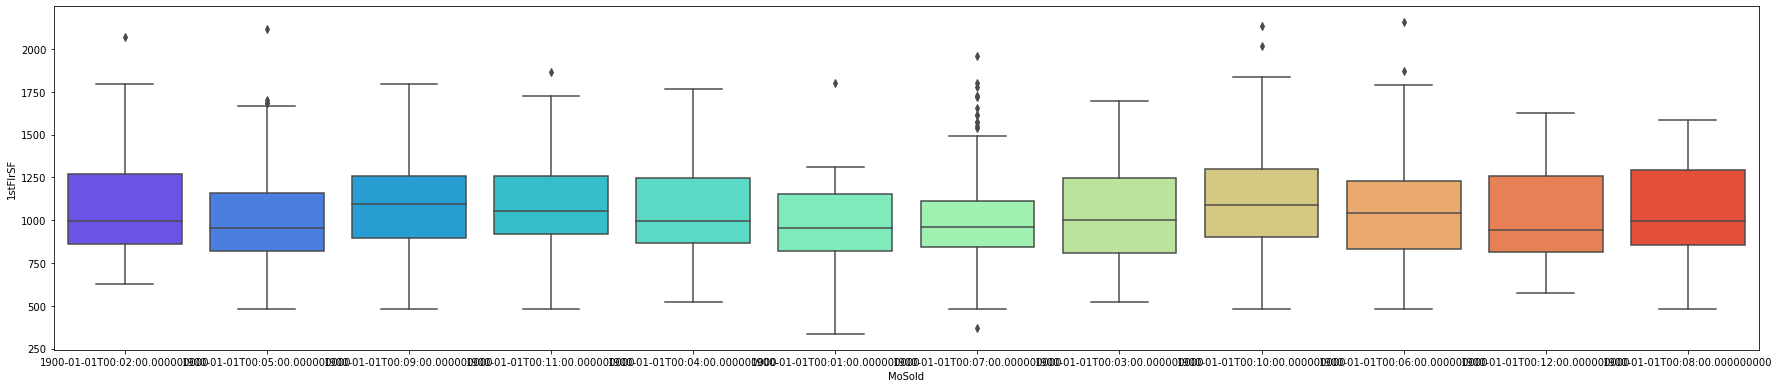

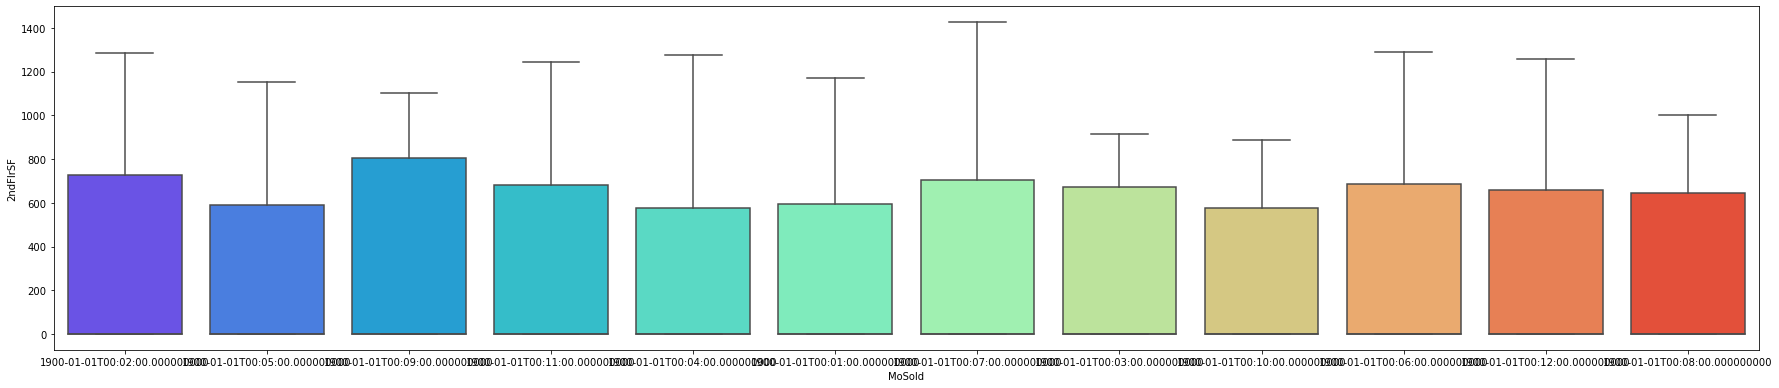

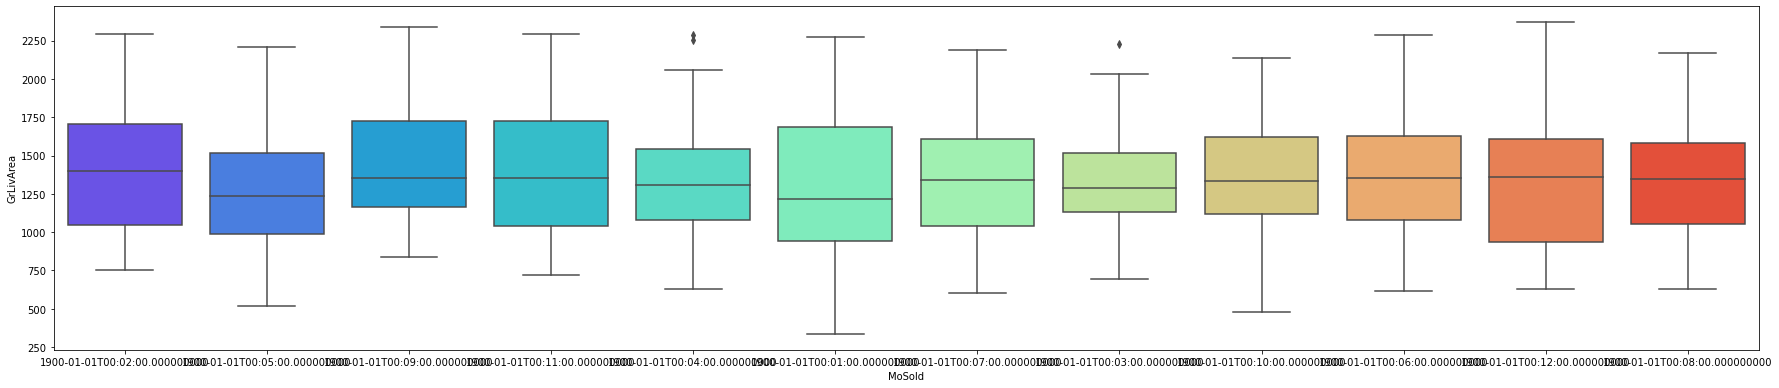

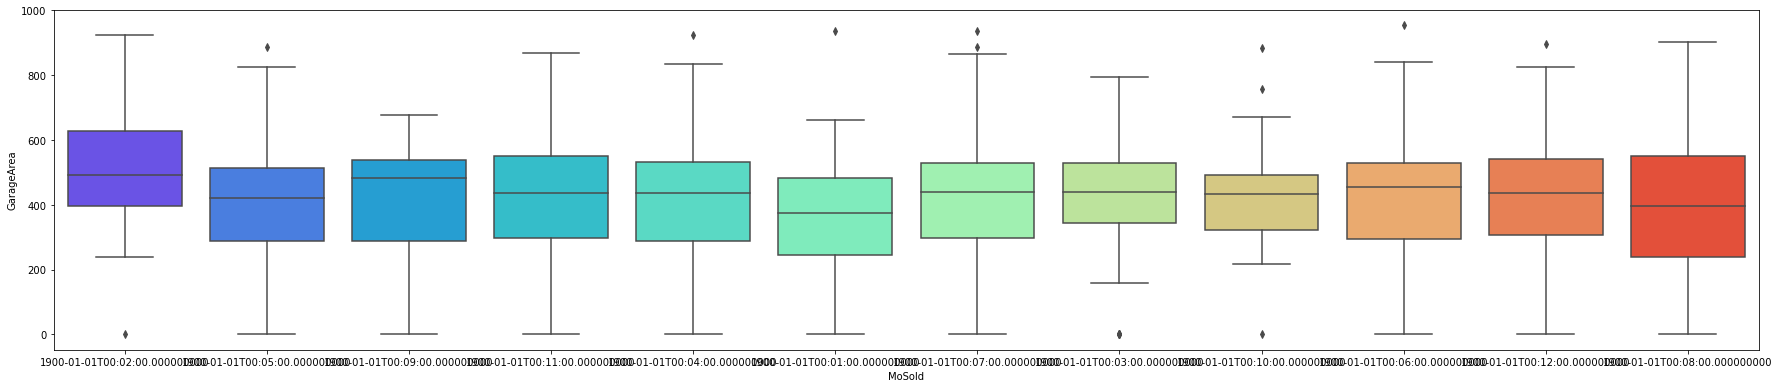

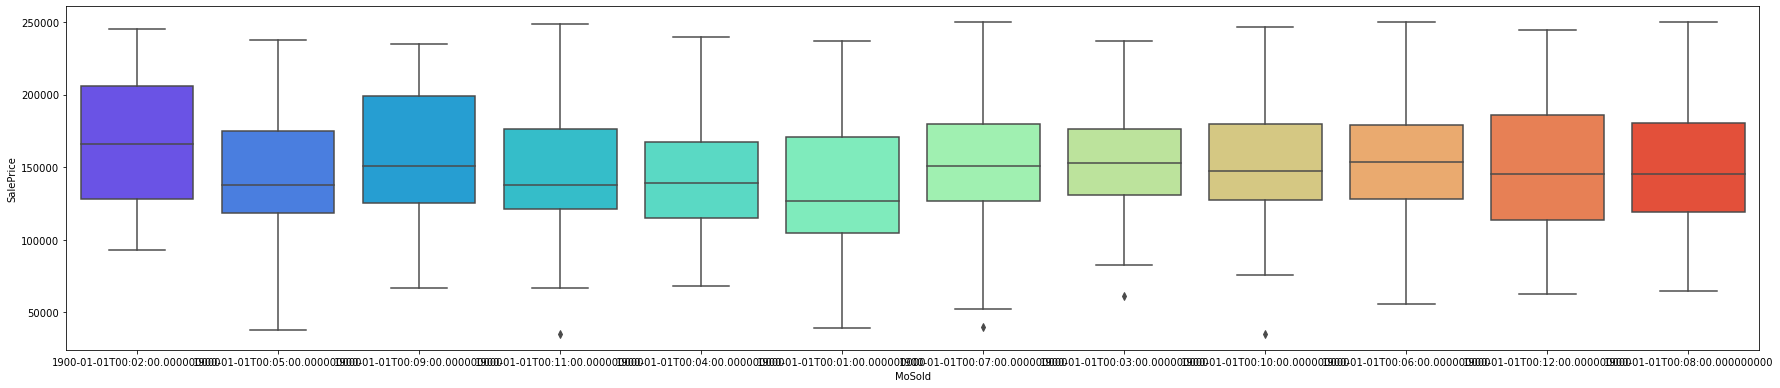

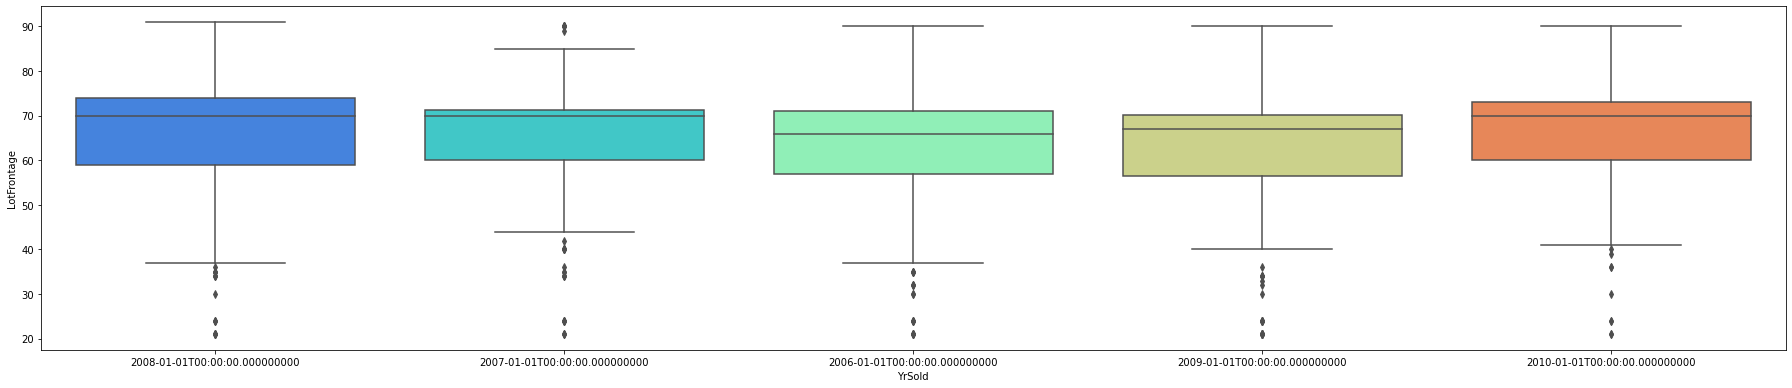

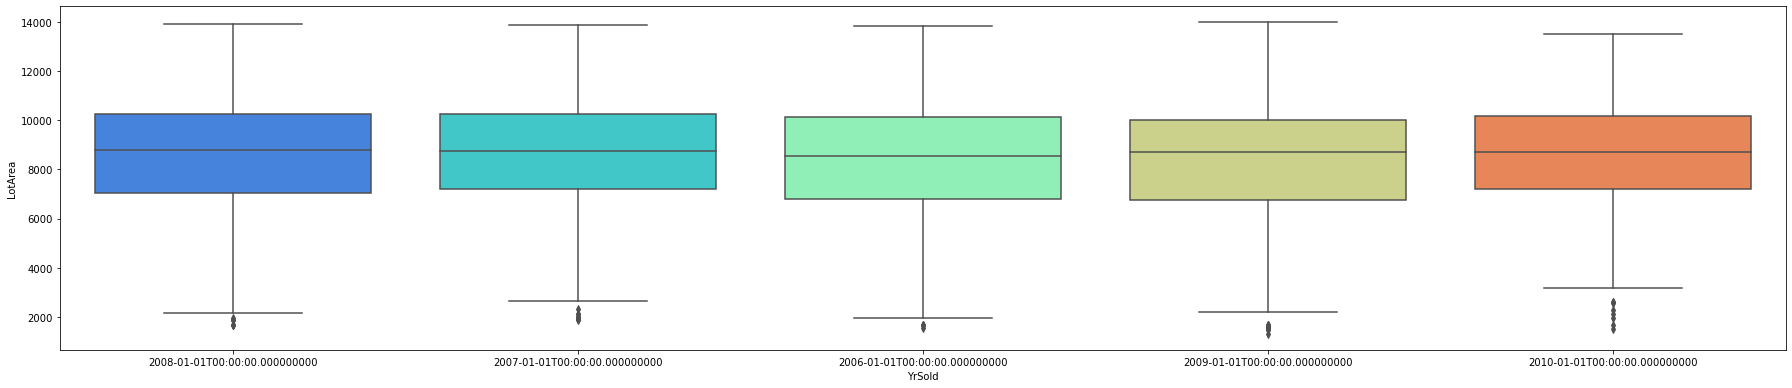

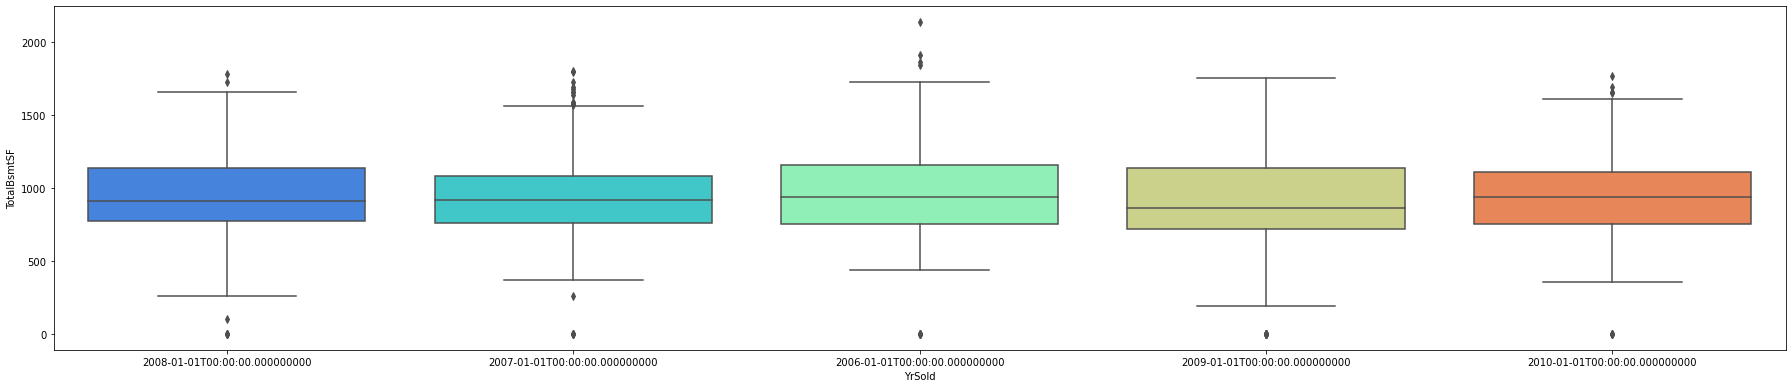

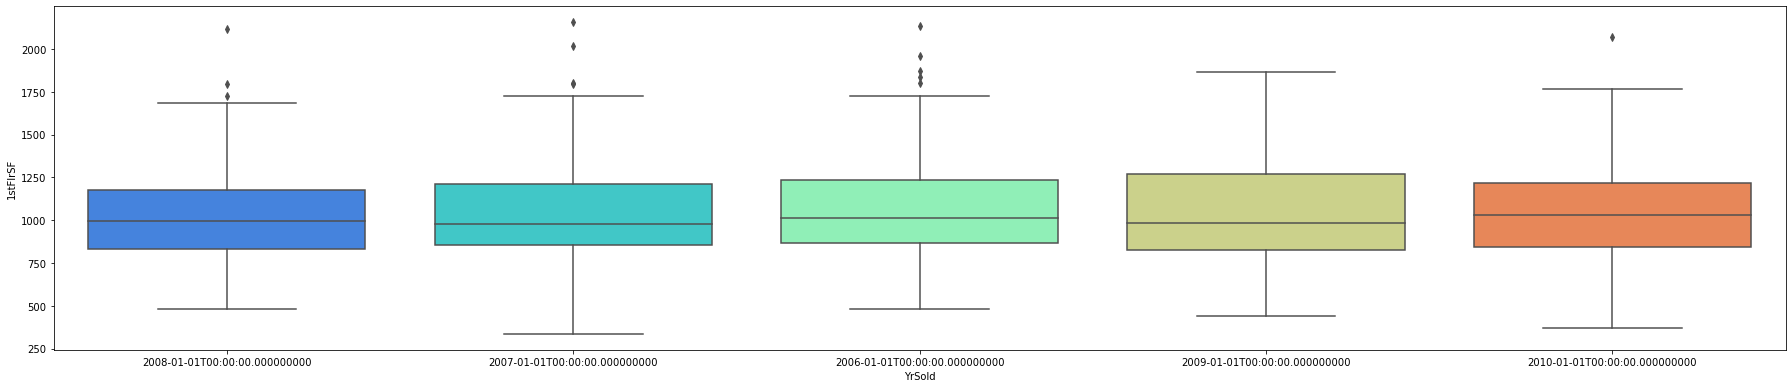

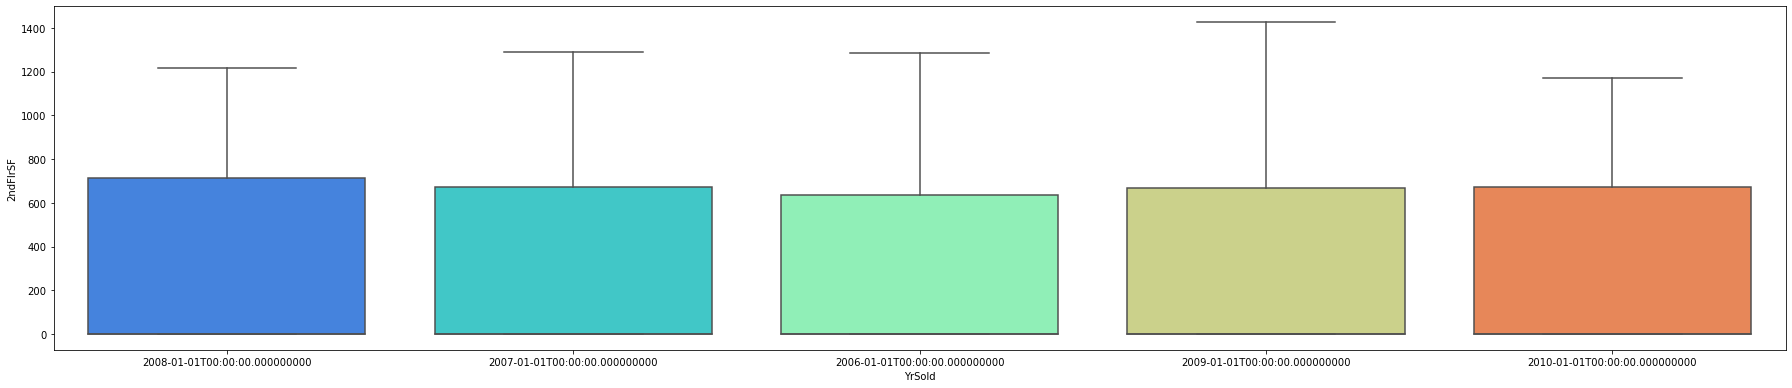

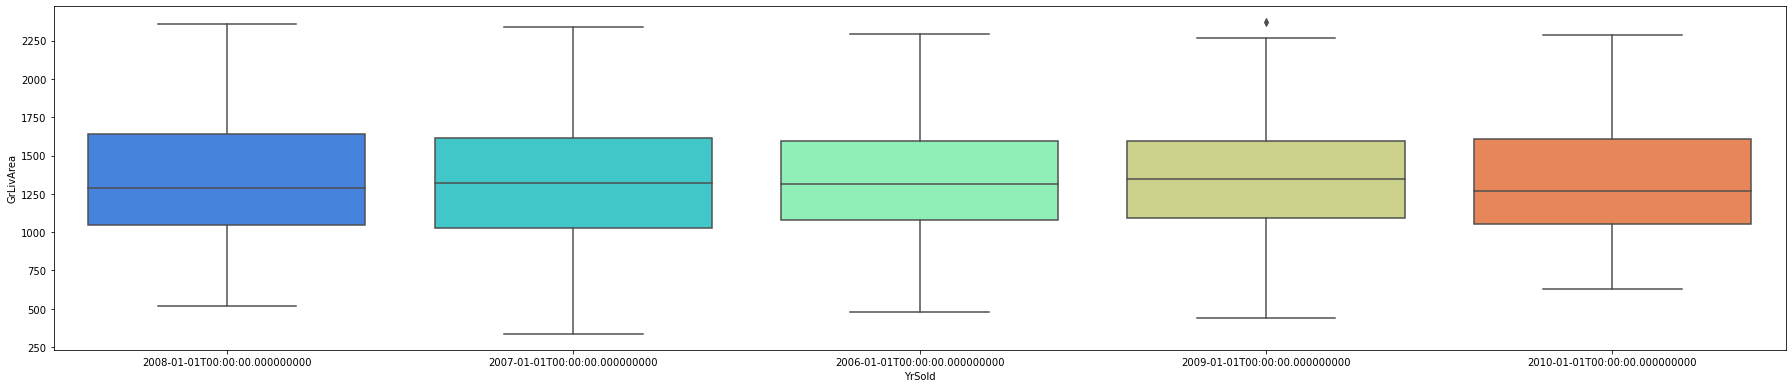

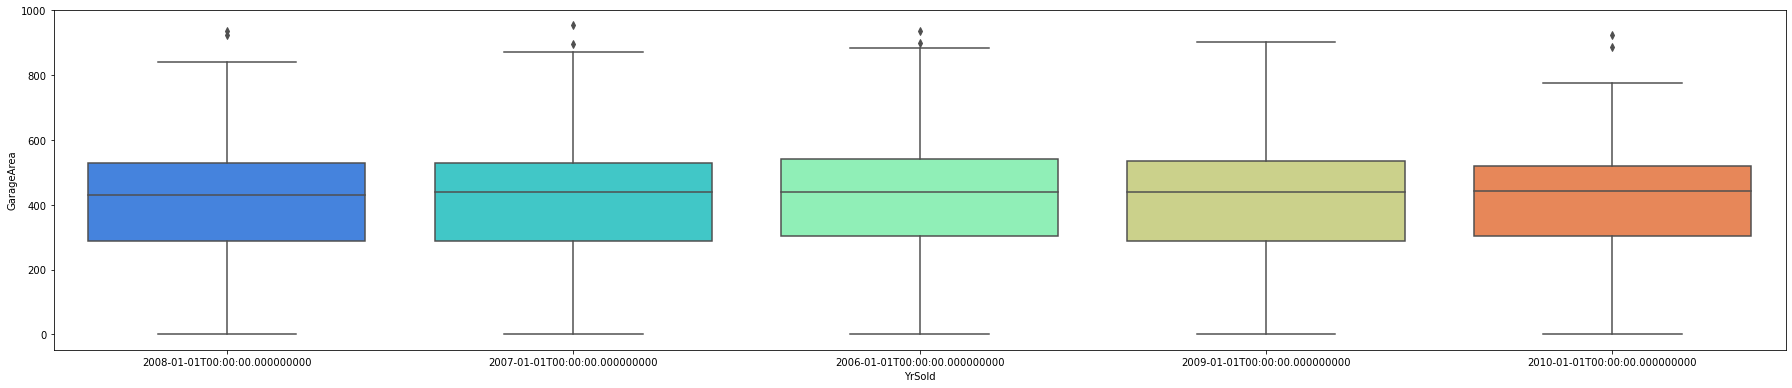

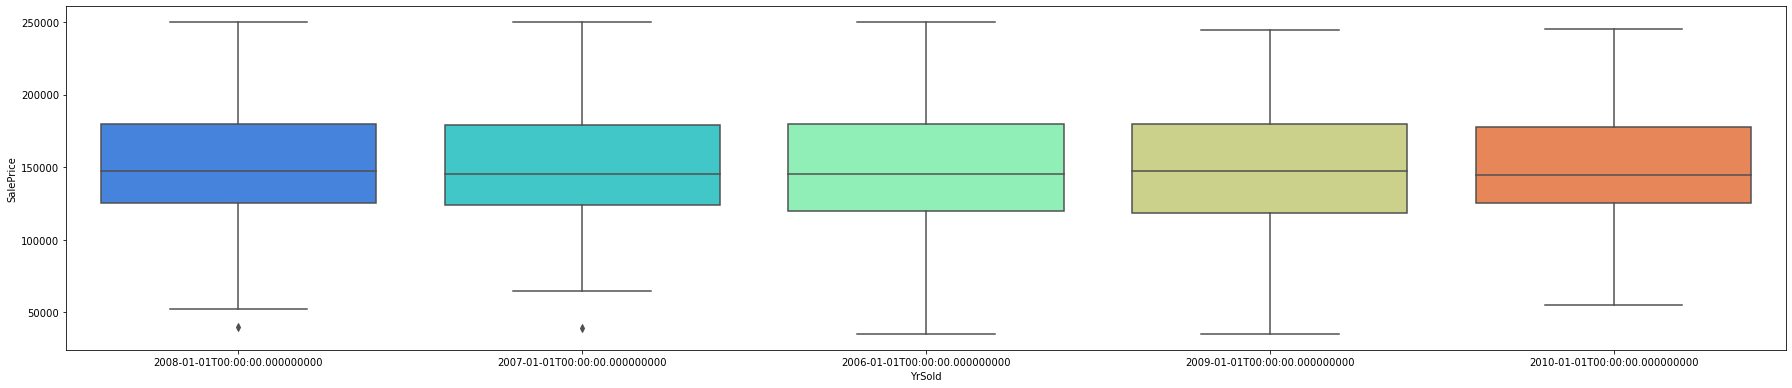

In [54]:
for j in Categorical_columns:
    for i in Numerical_columns:
        sns.boxplot(y = data[i],x = data[j],palette='rainbow')
        plt.show()

### Heatmap

<AxesSubplot:>

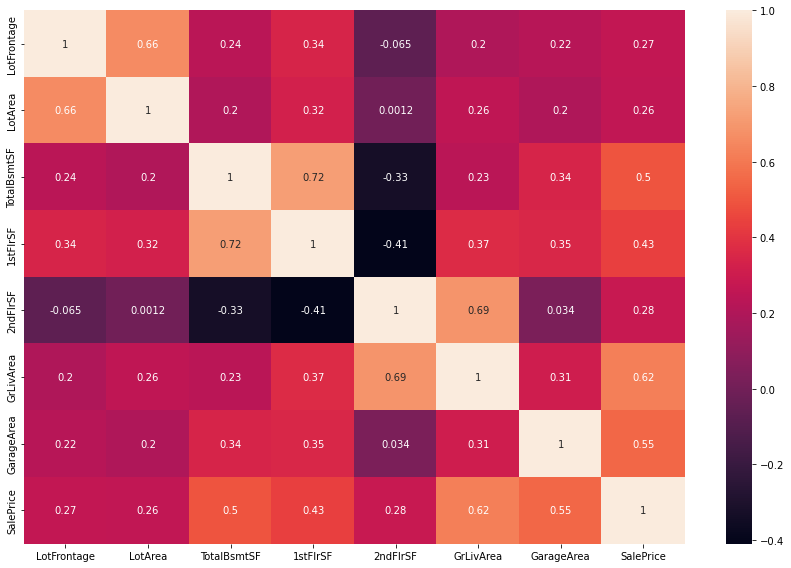

In [55]:
plt.figure(figsize=(12,8))
sns.heatmap(data[Numerical_columns].corr(),annot = True)

## Data pre processing

In [56]:
Numerical_columns = ['LotFrontage', 'LotArea','TotalBsmtSF','1stFlrSF', 
                     '2ndFlrSF','GrLivArea','GarageArea', 'SalePrice']
Categorical_columns= [ 'MSZoning','LotShape',
        'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtFinType1', 'HeatingQC', 
        'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageType', 'GarageFinish', 'GarageCars',
       'MoSold', 'YrSold']

In [57]:
Date_columns = ['YearBuilt', 'YearRemodAdd', 'YrSold','MoSold']
Cat_to_be_changed = ['MSZoning','LotShape','HouseStyle','RoofStyle','ExterQual','Foundation','BsmtQual',
                    'BsmtFinType1','HeatingQC','KitchenQual', 'GarageFinish','GarageType' ]
Cat_not_to_be_changed = ['OverallQual', 'OverallCond','BsmtFullBath','FullBath', 'HalfBath','BedroomAbvGr','TotRmsAbvGrd'
                         ,'Fireplaces','GarageCars']

### Need to change the data type od dates as linear regression takes only integers and float values

In [58]:
convert_dict = {'MoSold': int,
                'YrSold': int,
               'YearBuilt': int,
               'YearRemodAdd': int} 
data = data.astype(convert_dict) 

<AxesSubplot:>

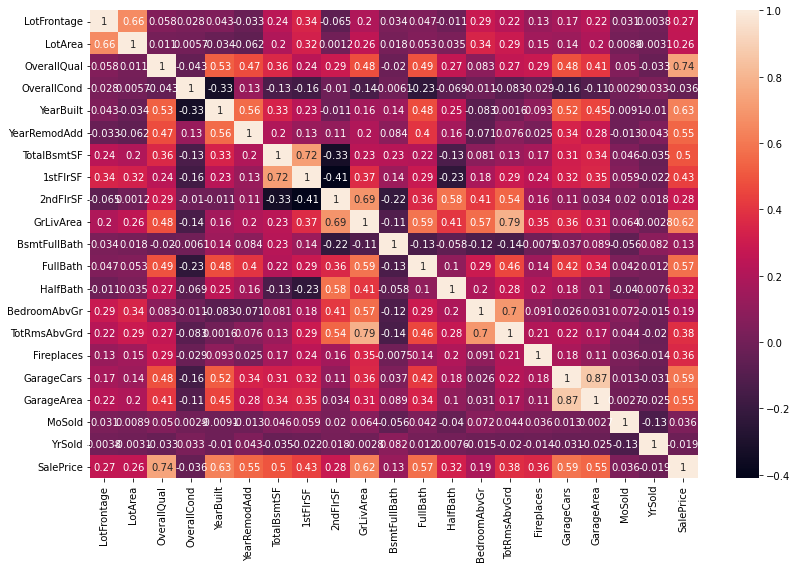

In [59]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot = True)

### Dropping 'LotFrontage' and 'TotalBsmtSF' as they are highly correlated with 'LotArea' and  '1stFlrSF' respectively

In [60]:
data.drop(['LotFrontage','TotalBsmtSF'], axis=1, inplace=True)

### Encoding the categorical data to get the ligitimate modeling result using one hot encoding.

In [61]:
#Create object for one-hot encoding
encoder=ce.OneHotEncoder(cols=Cat_to_be_changed,handle_unknown='return_nan',return_df=True,use_cat_names=True)
#Fit and transform Data
final_data = encoder.fit_transform(data)

# Modeling

### Splitting the data into train test data

In [63]:
from sklearn.model_selection import train_test_split
X = final_data[['MSZoning_RL', 'MSZoning_RM', 'MSZoning_C (all)', 'MSZoning_FV',
       'MSZoning_RH',  'LotArea', 'LotShape_Reg', 'LotShape_IR1',
       'LotShape_IR2', 'LotShape_IR3', 'HouseStyle_2Story',
       'HouseStyle_1Story', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf',
       'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'HouseStyle_2.5Unf',
       'HouseStyle_2.5Fin', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofStyle_Gambrel',
       'RoofStyle_Mansard', 'RoofStyle_Flat', 'ExterQual_Gd', 'ExterQual_TA',
       'ExterQual_Ex', 'ExterQual_Fa', 'Foundation_PConc', 'Foundation_CBlock',
       'Foundation_BrkTil', 'Foundation_Slab', 'Foundation_Stone',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtQual_No Basement', 'BsmtQual_Ex',
       'BsmtQual_Fa', 'BsmtFinType1_GLQ', 'BsmtFinType1_ALQ',
       'BsmtFinType1_Unf', 'BsmtFinType1_Rec', 'BsmtFinType1_BLQ',
       'BsmtFinType1_No Basement', 'BsmtFinType1_LwQ',
       'HeatingQC_Ex', 'HeatingQC_Gd', 'HeatingQC_TA', 'HeatingQC_Fa',
       'HeatingQC_Po', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual_Gd', 'KitchenQual_TA', 'KitchenQual_Fa', 'KitchenQual_Ex',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageType_Attchd', 'GarageType_Detchd',
       'GarageType_CarPort', 'GarageType_No Garage', 'GarageType_BuiltIn',
       'GarageType_Basment', 'GarageType_2Types', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'GarageFinish_Fin', 'GarageFinish_No Garage',
       'GarageCars', 'GarageArea', 'MoSold', 'YrSold']]
y = data.SalePrice
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 100)

### Fitting the model

In [64]:
from sklearn.linear_model import Lasso,Ridge
lasso1 = Lasso()
lasso1.fit(X_train, y_train)

ridge1 = Ridge()
ridge1.fit(X_train, y_train)

Ridge()

### Function created for getting all the required evaluation metrics by one function

In [65]:
def get_error_stats(y,y_pred,name,DoPrint=True):
    MSE = mean_squared_error(y, y_pred)
    MAE = mean_absolute_error(y, y_pred)
    R2 = r2_score(y, y_pred)
    if DoPrint:
        print(F"MSE {name} {MSE}")
        print(F"MAE Score {name} {MAE}")
        print(F"R2 Score {name} {R2} \n")
    return MSE,MAE,R2

### Charts created to shocase how the value of beta changes wrt the change in the alpha values for both lasso and ridge regression

In [67]:
coefs = []
n_alphas = 500
alphas = np.logspace(-10, 5, n_alphas)
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    y_pred_train = ridge.predict(X_train)

    y_pred_test = ridge.predict(X_test)

### We will not see any of the weights at the centre line (0) as ridge regression do not make the coefficient value 0 it makes it near to 0

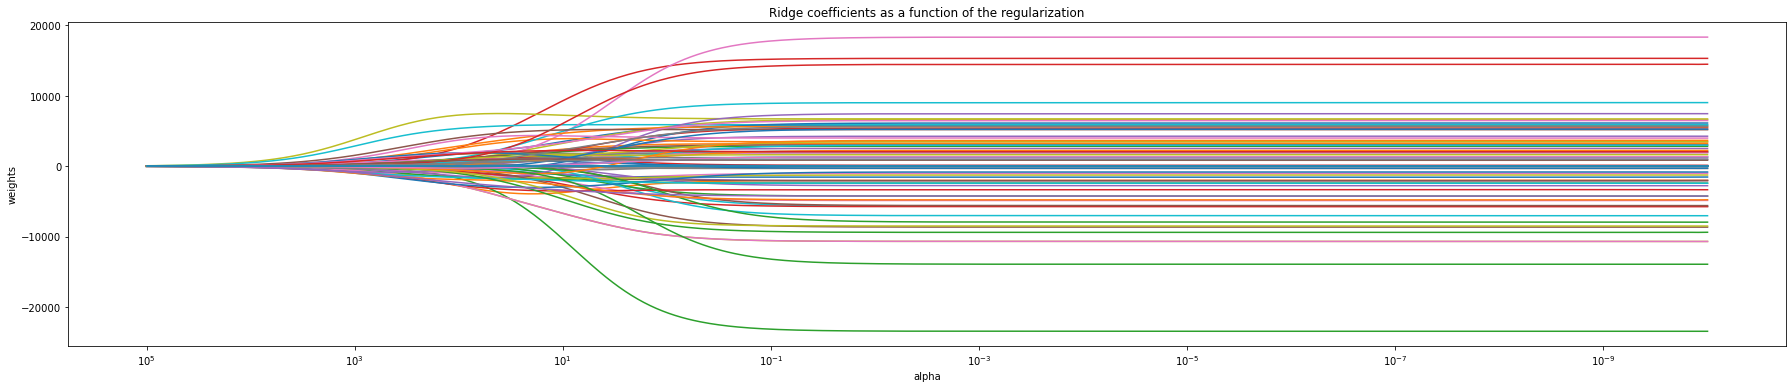

In [68]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [70]:
coefs = []
n_alphas = 500
alphas = np.logspace(-10, 5, n_alphas)
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    y_pred_train = lasso.predict(X_train)

    y_pred_test = lasso.predict(X_test)

### We can see weights of many coffecient at the middle line as lasso regression can assign 0 values to coffecient who are not required for modeling

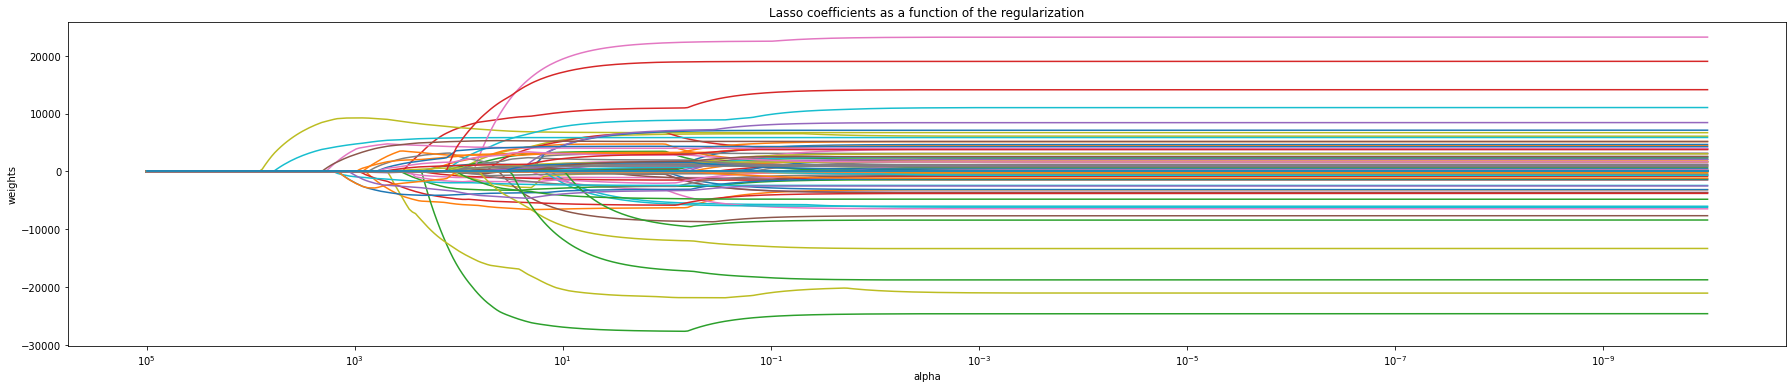

In [71]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

# -----------------------------------------------------------------------------------------

# Lasso Regression

### Finding the best alpha values using grid search for lasso regression

In [ ]:
# list of alphas to tune
n_alphas
params = {'alpha': np.logspace(-2, 0.001, 100)}

# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

In [ ]:
# list of alphas to tune
n_alphas
params = {'alpha':np.linspace(0, 1000, num = 1000, endpoint = True) }

# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

In [ ]:
model_cv.best_params_ 

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

# -----------------------------------------------------------------------------------------

### Setting the alpha value which we get from above to create the lasso model

In [72]:
alpha = 62.06206206206207
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=62.06206206206207)

### Finding Coefficient

In [74]:
betas = pd.DataFrame(index=['MSZoning_RL', 'MSZoning_RM', 'MSZoning_C (all)', 'MSZoning_FV',
       'MSZoning_RH', 'LotArea', 'LotShape_Reg', 'LotShape_IR1',
       'LotShape_IR2', 'LotShape_IR3', 'HouseStyle_2Story',
       'HouseStyle_1Story', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf',
       'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'HouseStyle_2.5Unf',
       'HouseStyle_2.5Fin', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofStyle_Gambrel',
       'RoofStyle_Mansard', 'RoofStyle_Flat', 'ExterQual_Gd', 'ExterQual_TA',
       'ExterQual_Ex', 'ExterQual_Fa', 'Foundation_PConc', 'Foundation_CBlock',
       'Foundation_BrkTil', 'Foundation_Slab', 'Foundation_Stone',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtQual_No Basement', 'BsmtQual_Ex',
       'BsmtQual_Fa', 'BsmtFinType1_GLQ', 'BsmtFinType1_ALQ',
       'BsmtFinType1_Unf', 'BsmtFinType1_Rec', 'BsmtFinType1_BLQ',
       'BsmtFinType1_No Basement', 'BsmtFinType1_LwQ',
       'HeatingQC_Ex', 'HeatingQC_Gd', 'HeatingQC_TA', 'HeatingQC_Fa',
       'HeatingQC_Po', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual_Gd', 'KitchenQual_TA', 'KitchenQual_Fa', 'KitchenQual_Ex',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageType_Attchd', 'GarageType_Detchd',
       'GarageType_CarPort', 'GarageType_No Garage', 'GarageType_BuiltIn',
       'GarageType_Basment', 'GarageType_2Types', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'GarageFinish_Fin', 'GarageFinish_No Garage',
       'GarageCars', 'GarageArea', 'MoSold', 'YrSold'], 
                     columns = ['Coefficient'])
betas['Coefficient'] = lasso.coef_ 
betas
betas.sort_values(by='Coefficient', ascending=False).head(5)

Coefficient
KitchenQual_Ex  9201.972088
MSZoning_FV     8584.960106
OverallQual     7307.893555
OverallCond     5840.849473
Fireplaces      5306.711347

In [75]:
Lasso_Best_Coefficient = betas

### Predicting and finding the residual

In [76]:
y_pred = lasso.predict(X_test)
residual = y_test - y_pred

### Evaluation

In [80]:
print("Number of non-zero Coefficients {}".format(np.sum(lasso.coef_!=0)))
y_pred_train = lasso.predict(X_train)
get_error_stats(y_train,y_pred_train,name = 'Train')

y_pred_test = lasso.predict(X_test)
get_error_stats(y_test,y_pred_test,name = 'Test')

Number of non-zero Coefficients 53
MSE Train 224827241.30981496
MAE Score Train 11317.083564803179
R2 Score Train 0.878554153963718 

MSE Test 254517504.50892
MAE Score Test 11275.79358136486
R2 Score Test 0.8425086303688031 



(254517504.50892, 11275.79358136486, 0.8425086303688031)

### Verifying the assumptions

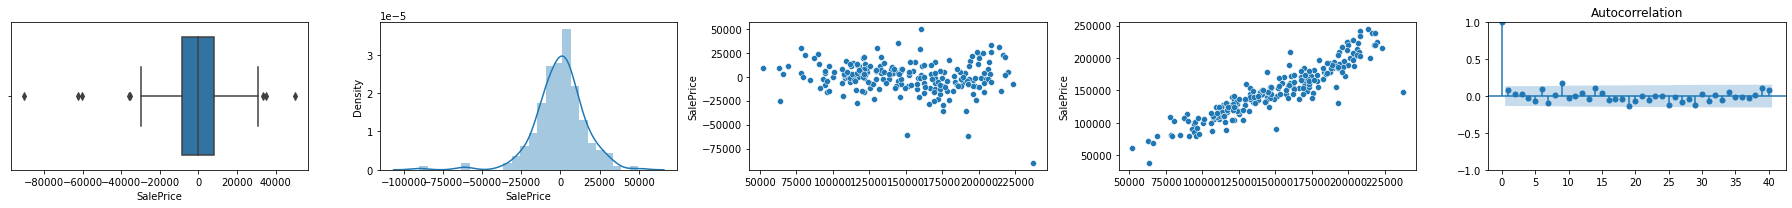

In [81]:
plt.rcParams["figure.figsize"] = [25.00, 3.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 5)
sns.color_palette("viridis", as_cmap=True)

sns.boxplot(x=residual,whis=1.5,ax=axes[0])
sns.distplot(residual,ax=axes[1])
sns.scatterplot( x=y_pred, y=residual,ax=axes[2])
sns.scatterplot(y_pred, y_test,ax=axes[3])
smt.graphics.plot_acf(residual, lags=40 , alpha=0.05,ax=axes[4])

plt.show()

# -----------------------------------------------------------------------------------------

### Doubling the alpha for lasso regression model

In [82]:
alpha = (62.06206206206207 * 2)
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=124.12412412412414)

### Finding the coefficients

In [84]:
betas = pd.DataFrame(index=['MSZoning_RL', 'MSZoning_RM', 'MSZoning_C (all)', 'MSZoning_FV',
       'MSZoning_RH', 'LotArea', 'LotShape_Reg', 'LotShape_IR1',
       'LotShape_IR2', 'LotShape_IR3', 'HouseStyle_2Story',
       'HouseStyle_1Story', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf',
       'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'HouseStyle_2.5Unf',
       'HouseStyle_2.5Fin', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofStyle_Gambrel',
       'RoofStyle_Mansard', 'RoofStyle_Flat', 'ExterQual_Gd', 'ExterQual_TA',
       'ExterQual_Ex', 'ExterQual_Fa', 'Foundation_PConc', 'Foundation_CBlock',
       'Foundation_BrkTil', 'Foundation_Slab', 'Foundation_Stone',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtQual_No Basement', 'BsmtQual_Ex',
       'BsmtQual_Fa', 'BsmtFinType1_GLQ', 'BsmtFinType1_ALQ',
       'BsmtFinType1_Unf', 'BsmtFinType1_Rec', 'BsmtFinType1_BLQ',
       'BsmtFinType1_No Basement', 'BsmtFinType1_LwQ',
       'HeatingQC_Ex', 'HeatingQC_Gd', 'HeatingQC_TA', 'HeatingQC_Fa',
       'HeatingQC_Po', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual_Gd', 'KitchenQual_TA', 'KitchenQual_Fa', 'KitchenQual_Ex',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageType_Attchd', 'GarageType_Detchd',
       'GarageType_CarPort', 'GarageType_No Garage', 'GarageType_BuiltIn',
       'GarageType_Basment', 'GarageType_2Types', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'GarageFinish_Fin', 'GarageFinish_No Garage',
       'GarageCars', 'GarageArea', 'MoSold', 'YrSold'], 
                     columns = ['Coefficient'])
betas['Coefficient'] = lasso.coef_ 
betas
betas.sort_values(by='Coefficient', ascending=False).head(5)

Coefficient
OverallQual   7756.763351
MSZoning_FV   6832.514298
OverallCond   5796.776053
Fireplaces    5158.109310
BsmtFullBath  4320.557257

### Predicting and finding the residual

In [85]:
y_pred = lasso.predict(X_test)
residual = y_test - y_pred

### Evaluation

In [86]:
print("Number of non-zero Coefficients {}".format(np.sum(lasso.coef_!=0)))
y_pred_train = lasso.predict(X_train)
get_error_stats(y_train,y_pred_train,name = 'Train')

y_pred_test = lasso.predict(X_test)
get_error_stats(y_test,y_pred_test,name = 'Test')

Number of non-zero Coefficients 42
MSE Train 232558633.55536556
MAE Score Train 11494.871923955188
R2 Score Train 0.8743778563459158 

MSE Test 253129566.60472208
MAE Score Test 11201.33508638373
R2 Score Test 0.8433674641921071 



(253129566.60472208, 11201.33508638373, 0.8433674641921071)

### Verifying the assumptions

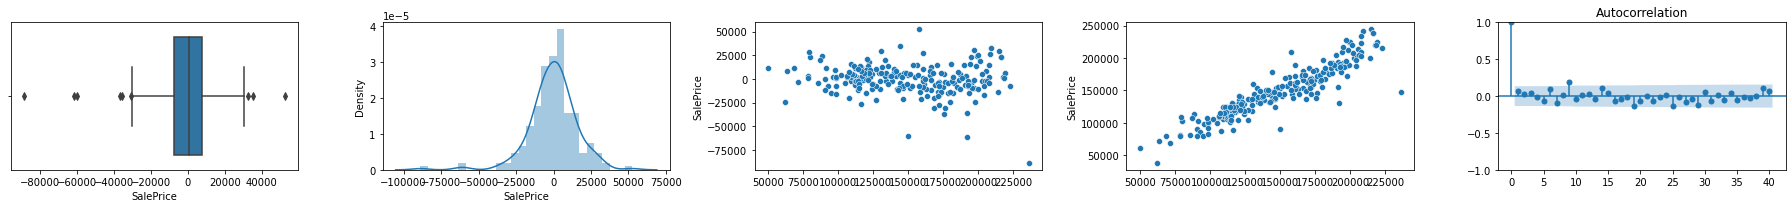

In [87]:
plt.rcParams["figure.figsize"] = [25.00, 3.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 5)
sns.color_palette("viridis", as_cmap=True)

sns.boxplot(x=residual,whis=1.5,ax=axes[0])
sns.distplot(residual,ax=axes[1])
sns.scatterplot( x=y_pred, y=residual,ax=axes[2])
sns.scatterplot(y_pred, y_test,ax=axes[3])
smt.graphics.plot_acf(residual, lags=40 , alpha=0.05,ax=axes[4])

plt.show()

# -----------------------------------------------------------------------------------------

### Dropping the current top 5 predictors

### Removing this columns
1. MSZoning_FV  
2. KitchenQual_Ex 
3. OverallQual
4. OverallCond
5. BsmtFullBath

### Train and Test predictor values excluding the above 5 fields

In [89]:
X_train1 = X_train[['MSZoning_RL', 'MSZoning_RM', 'MSZoning_C (all)',
       'MSZoning_RH', 'LotArea', 'LotShape_Reg', 'LotShape_IR1',
       'LotShape_IR2', 'LotShape_IR3', 'HouseStyle_2Story',
       'HouseStyle_1Story', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf',
       'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'HouseStyle_2.5Unf',
       'HouseStyle_2.5Fin', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofStyle_Gambrel',
       'RoofStyle_Mansard', 'RoofStyle_Flat', 'ExterQual_Gd', 'ExterQual_TA',
       'ExterQual_Ex', 'ExterQual_Fa', 'Foundation_PConc', 'Foundation_CBlock',
       'Foundation_BrkTil', 'Foundation_Slab', 'Foundation_Stone',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtQual_No Basement', 'BsmtQual_Ex',
       'BsmtQual_Fa', 'BsmtFinType1_GLQ', 'BsmtFinType1_ALQ',
       'BsmtFinType1_Unf', 'BsmtFinType1_Rec', 'BsmtFinType1_BLQ',
       'BsmtFinType1_No Basement', 'BsmtFinType1_LwQ', 'HeatingQC_Ex',
       'HeatingQC_Gd', 'HeatingQC_TA', 'HeatingQC_Fa', 'HeatingQC_Po',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual_Gd',
       'KitchenQual_TA', 'KitchenQual_Fa', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType_Attchd', 'GarageType_Detchd',
       'GarageType_CarPort', 'GarageType_No Garage', 'GarageType_BuiltIn',
       'GarageType_Basment', 'GarageType_2Types', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'GarageFinish_Fin', 'GarageFinish_No Garage',
       'GarageCars', 'GarageArea', 'MoSold', 'YrSold']]

In [91]:
X_test1 = X_test[['MSZoning_RL', 'MSZoning_RM', 'MSZoning_C (all)',
       'MSZoning_RH', 'LotArea', 'LotShape_Reg', 'LotShape_IR1',
       'LotShape_IR2', 'LotShape_IR3', 'HouseStyle_2Story',
       'HouseStyle_1Story', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf',
       'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'HouseStyle_2.5Unf',
       'HouseStyle_2.5Fin', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofStyle_Gambrel',
       'RoofStyle_Mansard', 'RoofStyle_Flat', 'ExterQual_Gd', 'ExterQual_TA',
       'ExterQual_Ex', 'ExterQual_Fa', 'Foundation_PConc', 'Foundation_CBlock',
       'Foundation_BrkTil', 'Foundation_Slab', 'Foundation_Stone',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtQual_No Basement', 'BsmtQual_Ex',
       'BsmtQual_Fa', 'BsmtFinType1_GLQ', 'BsmtFinType1_ALQ',
       'BsmtFinType1_Unf', 'BsmtFinType1_Rec', 'BsmtFinType1_BLQ',
       'BsmtFinType1_No Basement', 'BsmtFinType1_LwQ', 'HeatingQC_Ex',
       'HeatingQC_Gd', 'HeatingQC_TA', 'HeatingQC_Fa', 'HeatingQC_Po',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual_Gd',
       'KitchenQual_TA', 'KitchenQual_Fa', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType_Attchd', 'GarageType_Detchd',
       'GarageType_CarPort', 'GarageType_No Garage', 'GarageType_BuiltIn',
       'GarageType_Basment', 'GarageType_2Types', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'GarageFinish_Fin', 'GarageFinish_No Garage',
       'GarageCars', 'GarageArea', 'MoSold', 'YrSold']]

### Setting the alpha value which we get from above to create the lasso model

In [92]:
alpha = 62.06206206206207
lasso = Lasso(alpha=alpha)
lasso.fit(X_train1, y_train)

Lasso(alpha=62.06206206206207)

### Finding Coefficient

In [94]:
betas = pd.DataFrame(index=['MSZoning_RL', 'MSZoning_RM', 'MSZoning_C (all)',
       'MSZoning_RH', 'LotArea', 'LotShape_Reg', 'LotShape_IR1',
       'LotShape_IR2', 'LotShape_IR3', 'HouseStyle_2Story',
       'HouseStyle_1Story', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf',
       'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'HouseStyle_2.5Unf',
       'HouseStyle_2.5Fin', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofStyle_Gambrel',
       'RoofStyle_Mansard', 'RoofStyle_Flat', 'ExterQual_Gd', 'ExterQual_TA',
       'ExterQual_Ex', 'ExterQual_Fa', 'Foundation_PConc', 'Foundation_CBlock',
       'Foundation_BrkTil', 'Foundation_Slab', 'Foundation_Stone',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtQual_No Basement', 'BsmtQual_Ex',
       'BsmtQual_Fa', 'BsmtFinType1_GLQ', 'BsmtFinType1_ALQ',
       'BsmtFinType1_Unf', 'BsmtFinType1_Rec', 'BsmtFinType1_BLQ',
       'BsmtFinType1_No Basement', 'BsmtFinType1_LwQ', 'HeatingQC_Ex',
       'HeatingQC_Gd', 'HeatingQC_TA', 'HeatingQC_Fa', 'HeatingQC_Po',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual_Gd',
       'KitchenQual_TA', 'KitchenQual_Fa', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType_Attchd', 'GarageType_Detchd',
       'GarageType_CarPort', 'GarageType_No Garage', 'GarageType_BuiltIn',
       'GarageType_Basment', 'GarageType_2Types', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'GarageFinish_Fin', 'GarageFinish_No Garage',
       'GarageCars', 'GarageArea', 'MoSold', 'YrSold'], 
                     columns = ['Coefficient'])
betas['Coefficient'] = lasso.coef_ 
betas
betas.sort_values(by='Coefficient', ascending=False).head(5)

Coefficient
RoofStyle_Flat     10504.779737
BsmtQual_Ex         7489.527629
Fireplaces          7131.070238
BsmtFinType1_GLQ    5997.347214
GarageType_Attchd   5374.416560

### Predicting and finding the residual

In [95]:
y_pred = lasso.predict(X_test1)
residual = y_test - y_pred

### Evaluation

In [96]:
print("Number of non-zero Coefficients {}".format(np.sum(lasso.coef_!=0)))
y_pred_train = lasso.predict(X_train1)
get_error_stats(y_train,y_pred_train,name = 'Train')

y_pred_test = lasso.predict(X_test1)
get_error_stats(y_test,y_pred_test,name = 'Test')

Number of non-zero Coefficients 49
MSE Train 281780000.6926931
MAE Score Train 12663.720800522075
R2 Score Train 0.8477897501171968 

MSE Test 365334977.5941886
MAE Score Test 14339.159334285718
R2 Score Test 0.7739365466964379 



(365334977.5941886, 14339.159334285718, 0.7739365466964379)

### Verifying the assumptions

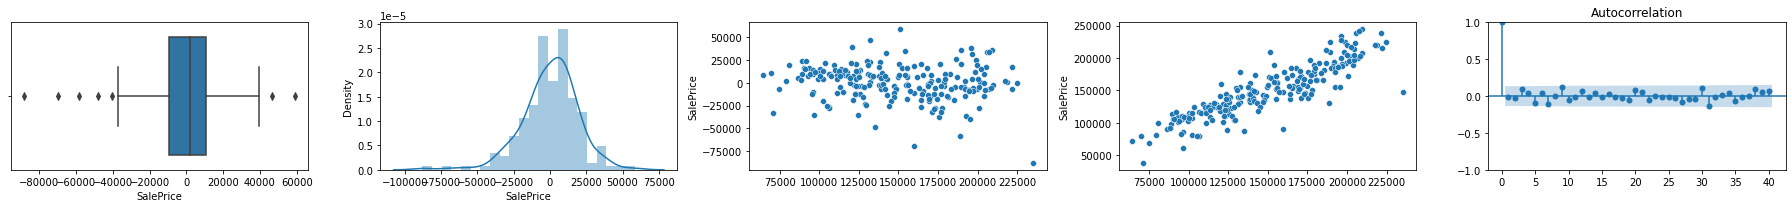

In [97]:
plt.rcParams["figure.figsize"] = [25.00, 3.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 5)
sns.color_palette("viridis", as_cmap=True)

sns.boxplot(x=residual,whis=1.5,ax=axes[0])
sns.distplot(residual,ax=axes[1])
sns.scatterplot( x=y_pred, y=residual,ax=axes[2])
sns.scatterplot(y_pred, y_test,ax=axes[3])
smt.graphics.plot_acf(residual, lags=40 , alpha=0.05,ax=axes[4])

plt.show()

# -----------------------------------------------------------------------------------------

# Ridge Regression

### Find the best alpha value using grid search

In [ ]:
# list of alphas to tune
n_alphas
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Applying Ridge
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

In [ ]:
model_cv.best_params_ 

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

### Setting the alpha value which we get from above to create the lasso model

In [98]:
alpha = 8.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train) 

Ridge(alpha=8.0)

### Finding the coefficients

In [100]:
betas = pd.DataFrame(index=['MSZoning_RL', 'MSZoning_RM', 'MSZoning_C (all)', 'MSZoning_FV',
       'MSZoning_RH', 'LotArea', 'LotShape_Reg', 'LotShape_IR1',
       'LotShape_IR2', 'LotShape_IR3', 'HouseStyle_2Story',
       'HouseStyle_1Story', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf',
       'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'HouseStyle_2.5Unf',
       'HouseStyle_2.5Fin', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofStyle_Gambrel',
       'RoofStyle_Mansard', 'RoofStyle_Flat', 'ExterQual_Gd', 'ExterQual_TA',
       'ExterQual_Ex', 'ExterQual_Fa', 'Foundation_PConc', 'Foundation_CBlock',
       'Foundation_BrkTil', 'Foundation_Slab', 'Foundation_Stone',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtQual_No Basement', 'BsmtQual_Ex',
       'BsmtQual_Fa', 'BsmtFinType1_GLQ', 'BsmtFinType1_ALQ',
       'BsmtFinType1_Unf', 'BsmtFinType1_Rec', 'BsmtFinType1_BLQ',
       'BsmtFinType1_No Basement', 'BsmtFinType1_LwQ',
       'HeatingQC_Ex', 'HeatingQC_Gd', 'HeatingQC_TA', 'HeatingQC_Fa',
       'HeatingQC_Po', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual_Gd', 'KitchenQual_TA', 'KitchenQual_Fa', 'KitchenQual_Ex',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageType_Attchd', 'GarageType_Detchd',
       'GarageType_CarPort', 'GarageType_No Garage', 'GarageType_BuiltIn',
       'GarageType_Basment', 'GarageType_2Types', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'GarageFinish_Fin', 'GarageFinish_No Garage',
       'GarageCars', 'GarageArea', 'MoSold', 'YrSold'], 
                     columns = ['Coefficient'])
betas['Coefficient'] = ridge.coef_ 
betas
betas.sort_values(by='Coefficient', ascending=False).head(5)

Coefficient
MSZoning_FV     9992.482611
OverallQual     7195.507212
KitchenQual_Ex  6813.282449
OverallCond     5898.366095
RoofStyle_Flat  5457.314574

In [101]:
Ridge_Best_Coefficient = betas

### Evaluation

In [102]:
y_pred_train = ridge.predict(X_train)
get_error_stats(y_train,y_pred_train,name = 'Train')

y_pred_test = ridge.predict(X_test)
get_error_stats(y_test,y_pred_test,name = 'Test')

MSE Train 223303707.30553895
MAE Score Train 11271.996506124384
R2 Score Train 0.8793771275279374 

MSE Test 254033997.41259903
MAE Score Test 11275.28691737081
R2 Score Test 0.8428078168431201 



(254033997.41259903, 11275.28691737081, 0.8428078168431201)

### Predicting and finding the residual

In [103]:
y_pred = ridge.predict(X_test)
residual = y_test - y_pred

### Verifying the assumptions

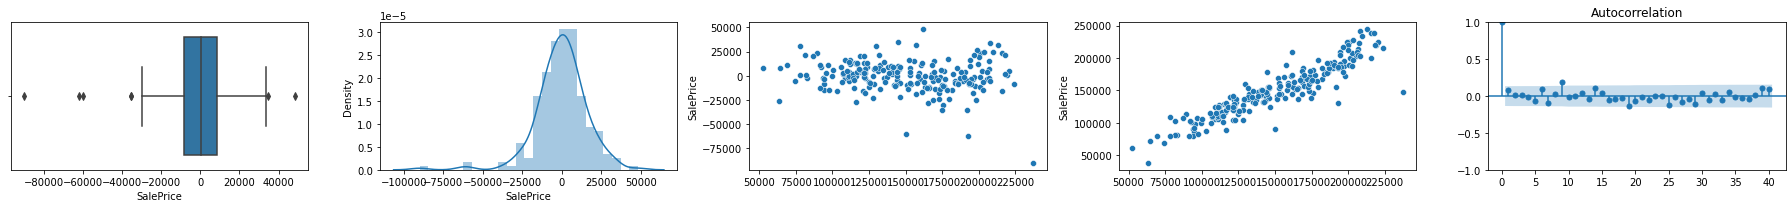

In [104]:
plt.rcParams["figure.figsize"] = [25.00, 3.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 5)
sns.color_palette("viridis", as_cmap=True)

sns.boxplot(x=residual,whis=1.5,ax=axes[0])
sns.distplot(residual,ax=axes[1])
sns.scatterplot( x=y_pred, y=residual,ax=axes[2])
sns.scatterplot(y_pred, y_test,ax=axes[3])
smt.graphics.plot_acf(residual, lags=40 , alpha=0.05,ax=axes[4])

plt.show()

### Doubling the alpha for ridge regression model

In [105]:
alpha = (8.0 * 2)
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train) 

Ridge(alpha=16.0)

### Finding the coefficients

In [106]:
betas = pd.DataFrame(index=['MSZoning_RL', 'MSZoning_RM', 'MSZoning_C (all)', 'MSZoning_FV',
       'MSZoning_RH', 'LotArea', 'LotShape_Reg', 'LotShape_IR1',
       'LotShape_IR2', 'LotShape_IR3', 'HouseStyle_2Story',
       'HouseStyle_1Story', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf',
       'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'HouseStyle_2.5Unf',
       'HouseStyle_2.5Fin', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofStyle_Gambrel',
       'RoofStyle_Mansard', 'RoofStyle_Flat', 'ExterQual_Gd', 'ExterQual_TA',
       'ExterQual_Ex', 'ExterQual_Fa', 'Foundation_PConc', 'Foundation_CBlock',
       'Foundation_BrkTil', 'Foundation_Slab', 'Foundation_Stone',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtQual_No Basement', 'BsmtQual_Ex',
       'BsmtQual_Fa', 'BsmtFinType1_GLQ', 'BsmtFinType1_ALQ',
       'BsmtFinType1_Unf', 'BsmtFinType1_Rec', 'BsmtFinType1_BLQ',
       'BsmtFinType1_No Basement', 'BsmtFinType1_LwQ',
       'HeatingQC_Ex', 'HeatingQC_Gd', 'HeatingQC_TA', 'HeatingQC_Fa',
       'HeatingQC_Po', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual_Gd', 'KitchenQual_TA', 'KitchenQual_Fa', 'KitchenQual_Ex',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageType_Attchd', 'GarageType_Detchd',
       'GarageType_CarPort', 'GarageType_No Garage', 'GarageType_BuiltIn',
       'GarageType_Basment', 'GarageType_2Types', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'GarageFinish_Fin', 'GarageFinish_No Garage',
       'GarageCars', 'GarageArea', 'MoSold', 'YrSold'], 
                     columns = ['Coefficient'])
betas['Coefficient'] = ridge.coef_ # Ridge Regression
betas
betas.sort_values(by='Coefficient', ascending=False).head(5)

Coefficient
MSZoning_FV     7766.246287
OverallQual     7359.361962
OverallCond     5863.237973
Fireplaces      5057.515062
KitchenQual_Ex  4537.702550

### Predicting and find the residuals

In [107]:
y_pred = ridge.predict(X_test)
residual = y_test - y_pred

### Evaluating

In [108]:
y_pred_train = ridge.predict(X_train)
get_error_stats(y_train,y_pred_train,name = 'Train')

y_pred_test = ridge.predict(X_test)
get_error_stats(y_test,y_pred_test,name = 'Test')

MSE Train 227086774.5574964
MAE Score Train 11359.204433899205
R2 Score Train 0.8773336126925042 

MSE Test 252750507.2387115
MAE Score Test 11263.865085001842
R2 Score Test 0.8436020200779182 



(252750507.2387115, 11263.865085001842, 0.8436020200779182)

### Verifying the assumptions

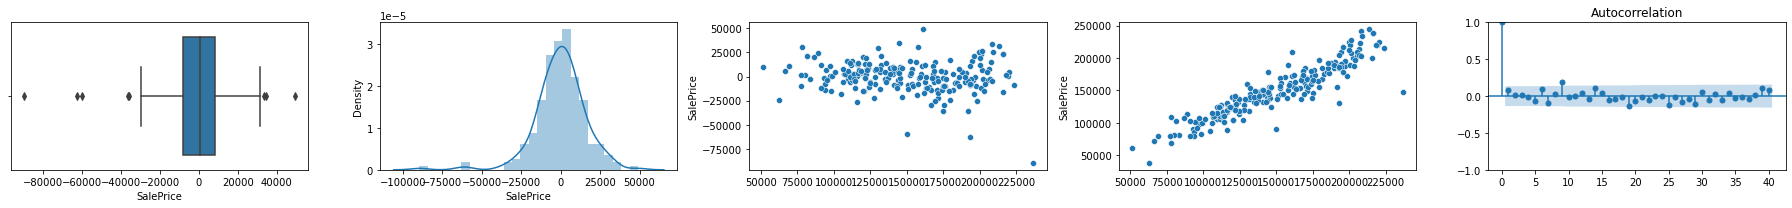

In [109]:
plt.rcParams["figure.figsize"] = [25.00, 3.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 5)
sns.color_palette("viridis", as_cmap=True)

sns.boxplot(x=residual,whis=1.5,ax=axes[0])
sns.distplot(residual,ax=axes[1])
sns.scatterplot( x=y_pred, y=residual,ax=axes[2])
sns.scatterplot(y_pred, y_test,ax=axes[3])
smt.graphics.plot_acf(residual, lags=40 , alpha=0.05,ax=axes[4])

plt.show()

# Conclusion

## Optimum value for lasso regression: {'alpha': 62.06206206206207}
## Optimum value for ridge regression: {'alpha': 8.0}
## The r2_score of lasso is slightly higher than ridge for the test dataset so we will choose lasso regression to solve this problem.

In [110]:
## Variables are significant in predicting the price of a house are mentioned below with there weights

In [118]:
#Lasso_Best_Coefficient
Lasso_Best_Coefficient.sort_values(by='Coefficient', ascending=False)

Coefficient
KitchenQual_Ex            9.201972e+03
MSZoning_FV               8.584960e+03
OverallQual               7.307894e+03
OverallCond               5.840849e+03
Fireplaces                5.306711e+03
BsmtFullBath              4.185417e+03
KitchenQual_Gd            3.906757e+03
BsmtQual_Ex               3.658185e+03
RoofStyle_Flat            3.109589e+03
BsmtFinType1_GLQ          2.978944e+03
Foundation_PConc          2.828339e+03
GarageType_Attchd         2.534704e+03
HouseStyle_1Story         2.499194e+03
LotShape_IR2              2.102925e+03
ExterQual_Gd              1.831846e+03
HouseStyle_1.5Fin         1.570325e+03
GarageType_Detchd         1.344023e+03
MSZoning_RL               1.325150e+03
GarageFinish_RFn          1.101746e+03
GarageCars                6.864876e+02
HeatingQC_Ex              6.766394e+02
HalfBath                  6.615300e+02
FullBath                  5.734504e+02
BsmtFinType1_BLQ          3.251262e+02
BsmtFinType1_ALQ          2.589462e+02
TotRmsAbvGrd              9.521602e+01
1stFlrSF                  3.829491e+01
2ndFlrSF                  3.085309e+01
GarageArea                2.350235e+01
GrLivArea                 1.106256e+01
LotArea                   1.905536e+00
MoSold                    1.123490e-09
YearBuilt                 1.034710e-14
YearRemodAdd              1.585535e-15
GarageFinish_No Garage   -0.000000e+00
BsmtFinType1_Rec         -0.000000e+00
GarageType_BuiltIn        0.000000e+00
GarageType_2Types        -0.000000e+00
GarageFinish_Fin          0.000000e+00
HeatingQC_Po             -0.000000e+00
HeatingQC_Fa              0.000000e+00
HeatingQC_Gd             -0.000000e+00
GarageType_Basment       -0.000000e+00
GarageType_No Garage     -0.000000e+00
BsmtQual_Fa               0.000000e+00
RoofStyle_Mansard        -0.000000e+00
Foundation_Slab          -0.000000e+00
HouseStyle_2.5Fin         0.000000e+00
HouseStyle_2.5Unf        -0.000000e+00
ExterQual_Ex             -0.000000e+00
ExterQual_Fa              0.000000e+00
HouseStyle_SFoyer        -0.000000e+00
Foundation_BrkTil         0.000000e+00
Foundation_Stone         -0.000000e+00
RoofStyle_Gambrel         0.000000e+00
BsmtQual_Gd               0.000000e+00
HouseStyle_1.5Unf         0.000000e+00
HouseStyle_2Story        -0.000000e+00
LotShape_IR3             -0.000000e+00
LotShape_IR1              0.000000e+00
MSZoning_RH               0.000000e+00
RoofStyle_Gable          -0.000000e+00
YrSold                   -2.287637e-14
KitchenQual_TA           -1.151217e+02
GarageType_CarPort       -2.187831e+02
HouseStyle_SLvl          -3.513901e+02
BsmtFinType1_LwQ         -4.863426e+02
BsmtQual_TA              -5.594753e+02
RoofStyle_Hip            -9.484233e+02
LotShape_Reg             -1.059807e+03
ExterQual_TA             -1.568922e+03
BsmtFinType1_No Basement -1.707566e+03
KitchenQual_Fa           -1.876435e+03
BedroomAbvGr             -1.985788e+03
Foundation_CBlock        -3.167234e+03
HeatingQC_TA             -3.841556e+03
GarageFinish_Unf         -4.154339e+03
BsmtFinType1_Unf         -4.969849e+03
MSZoning_RM              -5.912649e+03
BsmtQual_No Basement     -1.567185e+04
MSZoning_C (all)         -2.155046e+04

In [116]:
#Ridge_Best_Coefficient
Ridge_Best_Coefficient.sort_values(by='Coefficient', ascending=False)

Coefficient
MSZoning_FV               9.992483e+03
OverallQual               7.195507e+03
KitchenQual_Ex            6.813282e+03
OverallCond               5.898366e+03
RoofStyle_Flat            5.457315e+03
BsmtQual_Ex               5.385714e+03
Fireplaces                5.178035e+03
BsmtFinType1_GLQ          4.806228e+03
BsmtFullBath              4.305283e+03
Foundation_PConc          3.916761e+03
MSZoning_RL               3.730995e+03
GarageType_Attchd         3.533698e+03
LotShape_IR2              3.519066e+03
GarageType_Detchd         2.535588e+03
HouseStyle_1Story         2.523741e+03
HouseStyle_1.5Unf         2.401628e+03
BsmtFinType1_BLQ          2.337360e+03
GarageFinish_RFn          2.242615e+03
BsmtFinType1_ALQ          2.157483e+03
ExterQual_Gd              1.820582e+03
HeatingQC_Ex              1.703326e+03
HouseStyle_1.5Fin         1.558242e+03
MSZoning_RH               1.518205e+03
HalfBath                  1.498695e+03
BsmtFinType1_Rec          1.414896e+03
GarageType_BuiltIn        1.322281e+03
FullBath                  1.251262e+03
KitchenQual_Gd            1.191483e+03
BsmtQual_Gd               1.162208e+03
Foundation_BrkTil         1.053383e+03
GarageFinish_Fin          1.023721e+03
HeatingQC_Fa              9.576120e+02
HeatingQC_Gd              9.142892e+02
ExterQual_Fa              9.005243e+02
GarageCars                8.129932e+02
BsmtQual_Fa               6.485366e+02
Foundation_Slab           3.860115e+02
TotRmsAbvGrd              3.584591e+02
GarageType_No Garage      2.021265e+02
GarageFinish_No Garage    2.021265e+02
1stFlrSF                  3.710773e+01
2ndFlrSF                  3.002095e+01
GarageArea                2.230007e+01
GrLivArea                 1.143723e+01
LotArea                   1.838169e+00
MoSold                    1.237793e-09
YearBuilt                 9.900251e-15
YearRemodAdd              1.416188e-15
HouseStyle_2.5Fin         0.000000e+00
YrSold                   -2.392028e-14
BsmtQual_TA              -1.200114e+02
BsmtFinType1_LwQ         -1.222676e+02
RoofStyle_Gambrel        -4.646622e+02
LotShape_IR1             -4.810902e+02
RoofStyle_Mansard        -6.296833e+02
HeatingQC_Po             -6.837150e+02
GarageType_Basment       -7.706482e+02
ExterQual_Ex             -9.985218e+02
HouseStyle_SFoyer        -1.169890e+03
HouseStyle_2Story        -1.260648e+03
LotShape_IR3             -1.331926e+03
RoofStyle_Gable          -1.563867e+03
HouseStyle_SLvl          -1.699582e+03
LotShape_Reg             -1.706050e+03
ExterQual_TA             -1.722584e+03
Foundation_CBlock        -1.942644e+03
BedroomAbvGr             -2.052444e+03
GarageType_2Types        -2.341677e+03
HouseStyle_2.5Unf        -2.353492e+03
RoofStyle_Hip            -2.799102e+03
HeatingQC_TA             -2.891512e+03
KitchenQual_TA           -2.896852e+03
Foundation_Stone         -3.413513e+03
GarageFinish_Unf         -3.468462e+03
BsmtFinType1_Unf         -3.517252e+03
MSZoning_RM              -3.609253e+03
GarageType_CarPort       -4.481368e+03
KitchenQual_Fa           -5.107913e+03
BsmtQual_No Basement     -7.076447e+03
BsmtFinType1_No Basement -7.076447e+03
MSZoning_C (all)         -1.163243e+04